In [1]:
# Deliverable 3 - Optimize the Model

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
# application_df = pd.read_csv("../Resources/charity_data.csv")
application_df = pd.read_csv("charity_data.csv")
application_df.head()

EIN                                      NAME APPLICATION_TYPE  \
0  10520599              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1  10531628    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2  10547893        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3  10553066            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  10556103  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     5000              1  
1         1-9999                      N   108590              1  
2              0                      N     5000              0  
3    10000-24999                      N     6692              1  
4  100000-499999                      N   142590              1

In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.

# application_df.drop(columns=["EIN", "NAME"], inplace=True)

application_df.drop(columns=["EIN"], inplace=True)
application_df.head(10)

NAME APPLICATION_TYPE  \
0                       BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1             AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2                 ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3                     SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4           GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   
5  MINORITY ORGAN & TISSUE TRANSPLANT & EDUCATION...               T3   
6  FRIENDS OF ARTS COUNCIL OF GREATER DENHAM SPRI...               T3   
7                          ISRAEL EMERGENCY ALLIANCE               T3   
8                                   ARAMCO BRATS INC               T7   
9         INTERNATIONAL ASSOCIATION OF FIRE FIGHTERS               T5   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   
5       Independent          C1200  Preservation         Trust       1   
6       Independent          C1000  Preservation         Trust       1   
7       Independent          C2000  Preservation         Trust       1   
8       Independent          C1000    ProductDev         Trust       1   
9  CompanySponsored          C3000    ProductDev   Association       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     5000              1  
1         1-9999                      N   108590              1  
2              0                      N     5000              0  
3    10000-24999                      N     6692              1  
4  100000-499999                      N   142590              1  
5              0                      N     5000              1  
6  100000-499999                      N    31452              1  
7        10M-50M                      N  7508025              1  
8         1-9999                      N    94389              1  
9              0                      N     5000              0

In [4]:
# Determine the number of unique values in each column.

application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning

app_counts = application_df["APPLICATION_TYPE"].value_counts()
app_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

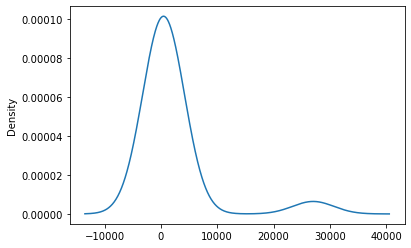

In [6]:
# Visualize the value counts of APPLICATION_TYPE

app_counts.plot.density()

In [7]:
# Determine which values to replace if counts are less than ...?
replace_application = list(app_counts[app_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning

class_counts = application_df["CLASSIFICATION"].value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1820        1
C1248        1
C1570        1
C1900        1
C1728        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

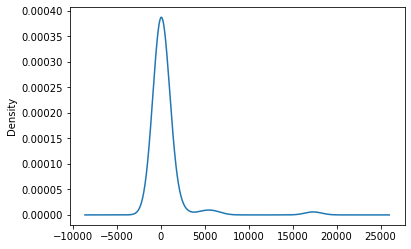

In [9]:
# Visualize the value counts of CLASSIFICATION

class_counts.plot.density()

In [10]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_counts[class_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [11]:
# Generate our categorical variable lists
app_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
app_cat

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [12]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[app_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(app_cat)
encode_df.head()

NAME_1 DAY RANCH RESCUE AND RURAL OKLAHOMA ANIMAL RESOURCE INC  \
0                                                0.0                
1                                                0.0                
2                                                0.0                
3                                                0.0                
4                                                0.0                

   NAME_100 BLACK MEN OF AMERICA  NAME_100 BLACK MEN OF MEMPHIS INC  \
0                            0.0                                0.0   
1                            0.0                                0.0   
2                            0.0                                0.0   
3                            0.0                                0.0   
4                            0.0                                0.0   

   NAME_100 BLACK MEN OF WEST GEORGIA INC  NAME_1150 WEBSTER STREET INC  \
0                                     0.0                           0.0   
1                                     0.0                           0.0   
2                                     0.0                           0.0   
3                                     0.0                           0.0   
4                                     0.0                           0.0   

   NAME_116TH CAVALRY REGIMENT CHAPTER OF THE US CAVALRY & ARMOR ASSOCIATION  \
0                                                0.0                           
1                                                0.0                           
2                                                0.0                           
3                                                0.0                           
4                                                0.0                           

   NAME_13TH BOMB SQUADRON ASSOCIATION  NAME_146TH ALUMNI ASSOCIATION  \
0                                  0.0                            0.0   
1                                  0.0                            0.0   
2                                  0.0                            0.0   
3                                  0.0                            0.0   
4                                  0.0                            0.0   

   NAME_14TH ARMORED DIVISION  \
0                         0.0   
1                         0.0   
2                         0.0   
3                         0.0   
4                         0.0   

   NAME_150TH INTELLIGENCE SQUADRON ENLISTED ADVISORY COUNCIL  ...  \
0                                                0.0           ...   
1                                                0.0           ...   
2                                                0.0           ...   
3                                                0.0           ...   
4                                                0.0           ...   

   INCOME_AMT_1-9999  INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  \
0                0.0                     0.0                       0.0   
1                1.0                     0.0                       0.0   
2                0.0                     0.0                       0.0   
3                0.0                     1.0                       0.0   
4                0.0                     0.0                       1.0   

   INCOME_AMT_10M-50M  INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  \
0                 0.0               0.0                     0.0   
1                 0.0               0.0                     0.0   
2                 0.0               0.0                     0.0   
3                 0.0               0.0                     0.0   
4                 0.0               0.0                     0.0   

   INCOME_AMT_50M+  INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  \
0              0.0                0.0                       1.0   
1              0.0                0.0                       1.0   
2              0.0                0.0                       1.0   
3              0.0                0.0                 

In [13]:
# Merge one-hot encoded features and drop the originals

application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(app_cat,1)
application_df.head(10)

STATUS  ASK_AMT  IS_SUCCESSFUL  \
0       1     5000              1   
1       1   108590              1   
2       1     5000              0   
3       1     6692              1   
4       1   142590              1   
5       1     5000              1   
6       1    31452              1   
7       1  7508025              1   
8       1    94389              1   
9       1     5000              0   

   NAME_1 DAY RANCH RESCUE AND RURAL OKLAHOMA ANIMAL RESOURCE INC  \
0                                                0.0                
1                                                0.0                
2                                                0.0                
3                                                0.0                
4                                                0.0                
5                                                0.0                
6                                                0.0                
7                                                0.0                
8                                                0.0                
9                                                0.0                

   NAME_100 BLACK MEN OF AMERICA  NAME_100 BLACK MEN OF MEMPHIS INC  \
0                            0.0                                0.0   
1                            0.0                                0.0   
2                            0.0                                0.0   
3                            0.0                                0.0   
4                            0.0                                0.0   
5                            0.0                                0.0   
6                            0.0                                0.0   
7                            0.0                                0.0   
8                            0.0                                0.0   
9                            0.0                                0.0   

   NAME_100 BLACK MEN OF WEST GEORGIA INC  NAME_1150 WEBSTER STREET INC  \
0                                     0.0                           0.0   
1                                     0.0                           0.0   
2                                     0.0                           0.0   
3                                     0.0                           0.0   
4                                     0.0                           0.0   
5                                     0.0                           0.0   
6                                     0.0                           0.0   
7                                     0.0                           0.0   
8                                     0.0                           0.0   
9                                     0.0                           0.0   

   NAME_116TH CAVALRY REGIMENT CHAPTER OF THE US CAVALRY & ARMOR ASSOCIATION  \
0                                                0.0                           
1                                                0.0                           
2                                                0.0                           
3                                                0.0                           
4                                                0.0                           
5                                                0.0                           
6                                                0.0                           
7                                                0.0                           
8                                                0.0                           
9                                                0.0                           

   NAME_13TH BOMB SQUADRON ASSOCIATION  ...  INCOME_AMT_1-9999  \
0                                  0.0  ...                0.0   
1                                  0.0  ...                1.0   
2                                  0.0  ...                0.0   
3                                  0.0  ...                0.0   
4               

In [14]:
# # Drop status to improve model 
# y=application_df.STATUS
# X=application_df.drop(columns="STATUS")

In [15]:
# Split our preprocessed data into our features and target arrays
y=application_df.IS_SUCCESSFUL
X=application_df.drop(columns="IS_SUCCESSFUL")

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
## chg random state from 78 to 1

In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [17]:
##

In [18]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                1568960   
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,571,421
Trainable params: 1,571,421
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [21]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 7:46 - loss: 0.7771 - accuracy: 0.3750
Epoch 00001: saving model to checkpoints\weights.01.hdf5
  6/804 [..............................] - ETA: 24s - loss: 0.6874 - accuracy: 0.5521 
Epoch 00001: saving model to checkpoints\weights.01.hdf5
 15/804 [..............................] - ETA: 14s - loss: 0.6338 - accuracy: 0.6521
Epoch 00001: saving model to checkpoints\weights.01.hdf5
 19/804 [..............................] - ETA: 13s - loss: 0.6304 - accuracy: 0.6595
Epoch 00001: saving model to checkpoints\weights.01.hdf5
 24/804 [..............................] - ETA: 12s - loss: 0.6283 - accuracy: 0.6628
Epoch 00001: saving model to checkpoints\weights.01.hdf5
 28/804 [>.............................] - ETA: 12s - loss: 0.6211 - accuracy: 0.6674
Epoch 00001: saving model to checkpoints\weights.01.hdf5
 33/804 [>.............................] - ETA: 11s - loss: 0.6126 - accuracy: 0.6761
Epoch 00001: saving model to checkpoints\w

286/804 [=========>....................] - ETA: 7s - loss: 0.5126 - accuracy: 0.7559
Epoch 00001: saving model to checkpoints\weights.01.hdf5
291/804 [=========>....................] - ETA: 6s - loss: 0.5129 - accuracy: 0.7556
Epoch 00001: saving model to checkpoints\weights.01.hdf5
296/804 [==========>...................] - ETA: 6s - loss: 0.5113 - accuracy: 0.7569
Epoch 00001: saving model to checkpoints\weights.01.hdf5
301/804 [==========>...................] - ETA: 6s - loss: 0.5108 - accuracy: 0.7575
Epoch 00001: saving model to checkpoints\weights.01.hdf5
306/804 [==========>...................] - ETA: 6s - loss: 0.5106 - accuracy: 0.7575
Epoch 00001: saving model to checkpoints\weights.01.hdf5
311/804 [==========>...................] - ETA: 6s - loss: 0.5097 - accuracy: 0.7581
Epoch 00001: saving model to checkpoints\weights.01.hdf5
316/804 [==========>...................] - ETA: 6s - loss: 0.5094 - accuracy: 0.7588
Epoch 00001: saving model to checkpoints\weights.01.hdf5
321/80

581/804 [====================>.........] - ETA: 2s - loss: 0.4847 - accuracy: 0.7729
Epoch 00001: saving model to checkpoints\weights.01.hdf5
586/804 [====================>.........] - ETA: 2s - loss: 0.4847 - accuracy: 0.7726
Epoch 00001: saving model to checkpoints\weights.01.hdf5
591/804 [=====================>........] - ETA: 2s - loss: 0.4847 - accuracy: 0.7726
Epoch 00001: saving model to checkpoints\weights.01.hdf5
596/804 [=====================>........] - ETA: 2s - loss: 0.4846 - accuracy: 0.7727
Epoch 00001: saving model to checkpoints\weights.01.hdf5
601/804 [=====================>........] - ETA: 2s - loss: 0.4846 - accuracy: 0.7728
Epoch 00001: saving model to checkpoints\weights.01.hdf5
606/804 [=====================>........] - ETA: 2s - loss: 0.4847 - accuracy: 0.7728
Epoch 00001: saving model to checkpoints\weights.01.hdf5
611/804 [=====================>........] - ETA: 2s - loss: 0.4840 - accuracy: 0.7733
Epoch 00001: saving model to checkpoints\weights.01.hdf5
616/80

 67/804 [=>............................] - ETA: 8s - loss: 0.1733 - accuracy: 0.9426
Epoch 00002: saving model to checkpoints\weights.02.hdf5
 73/804 [=>............................] - ETA: 8s - loss: 0.1711 - accuracy: 0.9422
Epoch 00002: saving model to checkpoints\weights.02.hdf5
 79/804 [=>............................] - ETA: 7s - loss: 0.1733 - accuracy: 0.9422
Epoch 00002: saving model to checkpoints\weights.02.hdf5
 85/804 [==>...........................] - ETA: 7s - loss: 0.1713 - accuracy: 0.9430
Epoch 00002: saving model to checkpoints\weights.02.hdf5
 91/804 [==>...........................] - ETA: 7s - loss: 0.1687 - accuracy: 0.9437
Epoch 00002: saving model to checkpoints\weights.02.hdf5
 96/804 [==>...........................] - ETA: 7s - loss: 0.1680 - accuracy: 0.9447
Epoch 00002: saving model to checkpoints\weights.02.hdf5
101/804 [==>...........................] - ETA: 7s - loss: 0.1672 - accuracy: 0.9443
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch

367/804 [============>.................] - ETA: 4s - loss: 0.1459 - accuracy: 0.9515
Epoch 00002: saving model to checkpoints\weights.02.hdf5
372/804 [============>.................] - ETA: 4s - loss: 0.1454 - accuracy: 0.9518
Epoch 00002: saving model to checkpoints\weights.02.hdf5
378/804 [=============>................] - ETA: 4s - loss: 0.1448 - accuracy: 0.9521
Epoch 00002: saving model to checkpoints\weights.02.hdf5
384/804 [=============>................] - ETA: 4s - loss: 0.1454 - accuracy: 0.9517
Epoch 00002: saving model to checkpoints\weights.02.hdf5
390/804 [=============>................] - ETA: 4s - loss: 0.1453 - accuracy: 0.9517
Epoch 00002: saving model to checkpoints\weights.02.hdf5
394/804 [=============>................] - ETA: 4s - loss: 0.1458 - accuracy: 0.9515
Epoch 00002: saving model to checkpoints\weights.02.hdf5
400/804 [=============>................] - ETA: 4s - loss: 0.1452 - accuracy: 0.9518
Epoch 00002: saving model to checkpoints\weights.02.hdf5
406/80

662/804 [=======================>......] - ETA: 1s - loss: 0.1357 - accuracy: 0.9551
Epoch 00002: saving model to checkpoints\weights.02.hdf5
667/804 [=======================>......] - ETA: 1s - loss: 0.1357 - accuracy: 0.9550
Epoch 00002: saving model to checkpoints\weights.02.hdf5
673/804 [========================>.....] - ETA: 1s - loss: 0.1355 - accuracy: 0.9551
Epoch 00002: saving model to checkpoints\weights.02.hdf5
677/804 [========================>.....] - ETA: 1s - loss: 0.1355 - accuracy: 0.9550
Epoch 00002: saving model to checkpoints\weights.02.hdf5
682/804 [========================>.....] - ETA: 1s - loss: 0.1356 - accuracy: 0.9550
Epoch 00002: saving model to checkpoints\weights.02.hdf5
688/804 [========================>.....] - ETA: 1s - loss: 0.1355 - accuracy: 0.9550
Epoch 00002: saving model to checkpoints\weights.02.hdf5
694/804 [========================>.....] - ETA: 1s - loss: 0.1354 - accuracy: 0.9549
Epoch 00002: saving model to checkpoints\weights.02.hdf5
699/80

144/804 [====>.........................] - ETA: 7s - loss: 0.0930 - accuracy: 0.9653
Epoch 00003: saving model to checkpoints\weights.03.hdf5
148/804 [====>.........................] - ETA: 7s - loss: 0.0924 - accuracy: 0.9658
Epoch 00003: saving model to checkpoints\weights.03.hdf5
153/804 [====>.........................] - ETA: 7s - loss: 0.0933 - accuracy: 0.9659
Epoch 00003: saving model to checkpoints\weights.03.hdf5
159/804 [====>.........................] - ETA: 7s - loss: 0.0932 - accuracy: 0.9662
Epoch 00003: saving model to checkpoints\weights.03.hdf5
163/804 [=====>........................] - ETA: 7s - loss: 0.0924 - accuracy: 0.9663
Epoch 00003: saving model to checkpoints\weights.03.hdf5
169/804 [=====>........................] - ETA: 7s - loss: 0.0941 - accuracy: 0.9654
Epoch 00003: saving model to checkpoints\weights.03.hdf5
174/804 [=====>........................] - ETA: 6s - loss: 0.0932 - accuracy: 0.9655
Epoch 00003: saving model to checkpoints\weights.03.hdf5
178/80

433/804 [===============>..............] - ETA: 4s - loss: 0.0986 - accuracy: 0.9626
Epoch 00003: saving model to checkpoints\weights.03.hdf5
438/804 [===============>..............] - ETA: 4s - loss: 0.0994 - accuracy: 0.9623
Epoch 00003: saving model to checkpoints\weights.03.hdf5
443/804 [===============>..............] - ETA: 4s - loss: 0.0999 - accuracy: 0.9620
Epoch 00003: saving model to checkpoints\weights.03.hdf5
448/804 [===============>..............] - ETA: 3s - loss: 0.0996 - accuracy: 0.9623
Epoch 00003: saving model to checkpoints\weights.03.hdf5
454/804 [===============>..............] - ETA: 3s - loss: 0.0997 - accuracy: 0.9621
Epoch 00003: saving model to checkpoints\weights.03.hdf5
458/804 [================>.............] - ETA: 3s - loss: 0.0996 - accuracy: 0.9621
Epoch 00003: saving model to checkpoints\weights.03.hdf5
464/804 [================>.............] - ETA: 3s - loss: 0.0995 - accuracy: 0.9621
Epoch 00003: saving model to checkpoints\weights.03.hdf5
470/80

728/804 [==========================>...] - ETA: 0s - loss: 0.1028 - accuracy: 0.9608
Epoch 00003: saving model to checkpoints\weights.03.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.1031 - accuracy: 0.9607
Epoch 00003: saving model to checkpoints\weights.03.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.1033 - accuracy: 0.9606
Epoch 00003: saving model to checkpoints\weights.03.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.1034 - accuracy: 0.9607
Epoch 00003: saving model to checkpoints\weights.03.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.1036 - accuracy: 0.9606
Epoch 00003: saving model to checkpoints\weights.03.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.1037 - accuracy: 0.9605
Epoch 00003: saving model to checkpoints\weights.03.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.1035 - accuracy: 0.9606
Epoch 00003: saving model to checkpoints\weights.03.hdf5
763/80

214/804 [======>.......................] - ETA: 6s - loss: 0.0915 - accuracy: 0.9639
Epoch 00004: saving model to checkpoints\weights.04.hdf5
220/804 [=======>......................] - ETA: 6s - loss: 0.0913 - accuracy: 0.9643
Epoch 00004: saving model to checkpoints\weights.04.hdf5
226/804 [=======>......................] - ETA: 6s - loss: 0.0910 - accuracy: 0.9642
Epoch 00004: saving model to checkpoints\weights.04.hdf5
232/804 [=======>......................] - ETA: 6s - loss: 0.0917 - accuracy: 0.9640
Epoch 00004: saving model to checkpoints\weights.04.hdf5
238/804 [=======>......................] - ETA: 6s - loss: 0.0922 - accuracy: 0.9638
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
244/804 [========>.....................] - ETA: 5s - loss: 0.0916 - accuracy: 0.9640
Epoch 00004: saving model to checkpoints\weights.04.hdf5
249/804 [========>.....................] - ETA: 5s - loss: 0.0917 - accuracy: 0.9637
Epoch

506/804 [=================>............] - ETA: 3s - loss: 0.0932 - accuracy: 0.9632
Epoch 00004: saving model to checkpoints\weights.04.hdf5
510/804 [==================>...........] - ETA: 3s - loss: 0.0930 - accuracy: 0.9632
Epoch 00004: saving model to checkpoints\weights.04.hdf5
514/804 [==================>...........] - ETA: 3s - loss: 0.0930 - accuracy: 0.9631
Epoch 00004: saving model to checkpoints\weights.04.hdf5
520/804 [==================>...........] - ETA: 3s - loss: 0.0929 - accuracy: 0.9632
Epoch 00004: saving model to checkpoints\weights.04.hdf5
524/804 [==================>...........] - ETA: 3s - loss: 0.0934 - accuracy: 0.9630
Epoch 00004: saving model to checkpoints\weights.04.hdf5
529/804 [==================>...........] - ETA: 3s - loss: 0.0933 - accuracy: 0.9630
Epoch 00004: saving model to checkpoints\weights.04.hdf5
534/804 [==================>...........] - ETA: 2s - loss: 0.0936 - accuracy: 0.9628
Epoch 00004: saving model to checkpoints\weights.04.hdf5
540/80

802/804 [============================>.] - ETA: 0s - loss: 0.0969 - accuracy: 0.9613
Epoch 00004: saving model to checkpoints\weights.04.hdf5
804/804 [==============================] - 9s 11ms/step - loss: 0.0967 - accuracy: 0.9614
Epoch 5/100
  1/804 [..............................] - ETA: 4s - loss: 0.3272 - accuracy: 0.8438
Epoch 00005: saving model to checkpoints\weights.05.hdf5
  5/804 [..............................] - ETA: 11s - loss: 0.1078 - accuracy: 0.9563
Epoch 00005: saving model to checkpoints\weights.05.hdf5
 10/804 [..............................] - ETA: 10s - loss: 0.0822 - accuracy: 0.9656
Epoch 00005: saving model to checkpoints\weights.05.hdf5
 16/804 [..............................] - ETA: 8s - loss: 0.0909 - accuracy: 0.9629 
Epoch 00005: saving model to checkpoints\weights.05.hdf5
 20/804 [..............................] - ETA: 9s - loss: 0.0796 - accuracy: 0.9703
Epoch 00005: saving model to checkpoints\weights.05.hdf5
 25/804 [..............................] - 

285/804 [=========>....................] - ETA: 5s - loss: 0.0885 - accuracy: 0.9640
Epoch 00005: saving model to checkpoints\weights.05.hdf5
290/804 [=========>....................] - ETA: 5s - loss: 0.0887 - accuracy: 0.9640
Epoch 00005: saving model to checkpoints\weights.05.hdf5
295/804 [==========>...................] - ETA: 5s - loss: 0.0889 - accuracy: 0.9640
Epoch 00005: saving model to checkpoints\weights.05.hdf5
300/804 [==========>...................] - ETA: 5s - loss: 0.0895 - accuracy: 0.9638
Epoch 00005: saving model to checkpoints\weights.05.hdf5
305/804 [==========>...................] - ETA: 5s - loss: 0.0888 - accuracy: 0.9642
Epoch 00005: saving model to checkpoints\weights.05.hdf5
310/804 [==========>...................] - ETA: 5s - loss: 0.0885 - accuracy: 0.9644
Epoch 00005: saving model to checkpoints\weights.05.hdf5
315/804 [==========>...................] - ETA: 5s - loss: 0.0883 - accuracy: 0.9645
Epoch 00005: saving model to checkpoints\weights.05.hdf5
320/80

580/804 [====================>.........] - ETA: 2s - loss: 0.0913 - accuracy: 0.9624
Epoch 00005: saving model to checkpoints\weights.05.hdf5
585/804 [====================>.........] - ETA: 2s - loss: 0.0915 - accuracy: 0.9623
Epoch 00005: saving model to checkpoints\weights.05.hdf5
591/804 [=====================>........] - ETA: 2s - loss: 0.0916 - accuracy: 0.9622
Epoch 00005: saving model to checkpoints\weights.05.hdf5
596/804 [=====================>........] - ETA: 2s - loss: 0.0919 - accuracy: 0.9622
Epoch 00005: saving model to checkpoints\weights.05.hdf5
601/804 [=====================>........] - ETA: 2s - loss: 0.0920 - accuracy: 0.9621
Epoch 00005: saving model to checkpoints\weights.05.hdf5
605/804 [=====================>........] - ETA: 2s - loss: 0.0919 - accuracy: 0.9622
Epoch 00005: saving model to checkpoints\weights.05.hdf5
611/804 [=====================>........] - ETA: 2s - loss: 0.0926 - accuracy: 0.9619
Epoch 00005: saving model to checkpoints\weights.05.hdf5
615/80

 61/804 [=>............................] - ETA: 8s - loss: 0.0933 - accuracy: 0.9631
Epoch 00006: saving model to checkpoints\weights.06.hdf5
 67/804 [=>............................] - ETA: 8s - loss: 0.0929 - accuracy: 0.9627
Epoch 00006: saving model to checkpoints\weights.06.hdf5
 72/804 [=>............................] - ETA: 8s - loss: 0.0948 - accuracy: 0.9609
Epoch 00006: saving model to checkpoints\weights.06.hdf5
 76/804 [=>............................] - ETA: 8s - loss: 0.0939 - accuracy: 0.9618
Epoch 00006: saving model to checkpoints\weights.06.hdf5
 82/804 [==>...........................] - ETA: 7s - loss: 0.0953 - accuracy: 0.9619
Epoch 00006: saving model to checkpoints\weights.06.hdf5
 86/804 [==>...........................] - ETA: 7s - loss: 0.0939 - accuracy: 0.9622
Epoch 00006: saving model to checkpoints\weights.06.hdf5
 92/804 [==>...........................] - ETA: 7s - loss: 0.0977 - accuracy: 0.9606
Epoch 00006: saving model to checkpoints\weights.06.hdf5
 98/80

360/804 [============>.................] - ETA: 4s - loss: 0.0914 - accuracy: 0.9623
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
366/804 [============>.................] - ETA: 4s - loss: 0.0906 - accuracy: 0.9627
Epoch 00006: saving model to checkpoints\weights.06.hdf5
371/804 [============>.................] - ETA: 4s - loss: 0.0914 - accuracy: 0.9623
Epoch 00006: saving model to checkpoints\weights.06.hdf5
376/804 [=============>................] - ETA: 4s - loss: 0.0914 - accuracy: 0.9624
Epoch 00006: saving model to checkpoints\weights.06.hdf5
381/804 [=============>................] - ETA: 4s - loss: 0.0912 - accuracy: 0.9624
Epoch 00006: saving model to checkpoints\weights.06.hdf5
386/804 [=============>................] - ETA: 4s - loss: 0.0914 - accuracy: 0.9624
Epoch 00006: saving model to checkpoints\weights.06.hdf5
391/804 [=============>................] - ETA: 4s - loss: 0.0912 - accuracy: 0.9625
Epoch

664/804 [=======================>......] - ETA: 1s - loss: 0.0911 - accuracy: 0.9627
Epoch 00006: saving model to checkpoints\weights.06.hdf5
669/804 [=======================>......] - ETA: 1s - loss: 0.0915 - accuracy: 0.9625
Epoch 00006: saving model to checkpoints\weights.06.hdf5
674/804 [========================>.....] - ETA: 1s - loss: 0.0913 - accuracy: 0.9626
Epoch 00006: saving model to checkpoints\weights.06.hdf5
678/804 [========================>.....] - ETA: 1s - loss: 0.0912 - accuracy: 0.9626
Epoch 00006: saving model to checkpoints\weights.06.hdf5
682/804 [========================>.....] - ETA: 1s - loss: 0.0910 - accuracy: 0.9627
Epoch 00006: saving model to checkpoints\weights.06.hdf5
687/804 [========================>.....] - ETA: 1s - loss: 0.0912 - accuracy: 0.9626
Epoch 00006: saving model to checkpoints\weights.06.hdf5
692/804 [========================>.....] - ETA: 1s - loss: 0.0912 - accuracy: 0.9625
Epoch 00006: saving model to checkpoints\weights.06.hdf5
696/80

143/804 [====>.........................] - ETA: 7s - loss: 0.0832 - accuracy: 0.9674
Epoch 00007: saving model to checkpoints\weights.07.hdf5
147/804 [====>.........................] - ETA: 7s - loss: 0.0843 - accuracy: 0.9670
Epoch 00007: saving model to checkpoints\weights.07.hdf5
152/804 [====>.........................] - ETA: 7s - loss: 0.0841 - accuracy: 0.9671
Epoch 00007: saving model to checkpoints\weights.07.hdf5
158/804 [====>.........................] - ETA: 6s - loss: 0.0861 - accuracy: 0.9660
Epoch 00007: saving model to checkpoints\weights.07.hdf5
163/804 [=====>........................] - ETA: 6s - loss: 0.0858 - accuracy: 0.9661
Epoch 00007: saving model to checkpoints\weights.07.hdf5
168/804 [=====>........................] - ETA: 6s - loss: 0.0852 - accuracy: 0.9663
Epoch 00007: saving model to checkpoints\weights.07.hdf5
172/804 [=====>........................] - ETA: 6s - loss: 0.0848 - accuracy: 0.9664
Epoch 00007: saving model to checkpoints\weights.07.hdf5
178/80

433/804 [===============>..............] - ETA: 4s - loss: 0.0895 - accuracy: 0.9640
Epoch 00007: saving model to checkpoints\weights.07.hdf5
438/804 [===============>..............] - ETA: 4s - loss: 0.0894 - accuracy: 0.9640
Epoch 00007: saving model to checkpoints\weights.07.hdf5
442/804 [===============>..............] - ETA: 4s - loss: 0.0890 - accuracy: 0.9641
Epoch 00007: saving model to checkpoints\weights.07.hdf5
448/804 [===============>..............] - ETA: 3s - loss: 0.0897 - accuracy: 0.9639
Epoch 00007: saving model to checkpoints\weights.07.hdf5
453/804 [===============>..............] - ETA: 3s - loss: 0.0898 - accuracy: 0.9639
Epoch 00007: saving model to checkpoints\weights.07.hdf5
457/804 [================>.............] - ETA: 3s - loss: 0.0900 - accuracy: 0.9637
Epoch 00007: saving model to checkpoints\weights.07.hdf5
463/804 [================>.............] - ETA: 3s - loss: 0.0901 - accuracy: 0.9636
Epoch 00007: saving model to checkpoints\weights.07.hdf5
469/80

727/804 [==========================>...] - ETA: 0s - loss: 0.0900 - accuracy: 0.9629
Epoch 00007: saving model to checkpoints\weights.07.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.0900 - accuracy: 0.9630
Epoch 00007: saving model to checkpoints\weights.07.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.0901 - accuracy: 0.9629
Epoch 00007: saving model to checkpoints\weights.07.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.0902 - accuracy: 0.9629
Epoch 00007: saving model to checkpoints\weights.07.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.0903 - accuracy: 0.9629
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.0902 - accuracy: 0.9629
Epoch 00007: saving model to checkpoints\weights.07.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.0902 - accuracy: 0.9629
Epoch

210/804 [======>.......................] - ETA: 6s - loss: 0.0804 - accuracy: 0.9677
Epoch 00008: saving model to checkpoints\weights.08.hdf5
216/804 [=======>......................] - ETA: 6s - loss: 0.0827 - accuracy: 0.9670
Epoch 00008: saving model to checkpoints\weights.08.hdf5
221/804 [=======>......................] - ETA: 6s - loss: 0.0836 - accuracy: 0.9665
Epoch 00008: saving model to checkpoints\weights.08.hdf5
226/804 [=======>......................] - ETA: 6s - loss: 0.0846 - accuracy: 0.9658
Epoch 00008: saving model to checkpoints\weights.08.hdf5
232/804 [=======>......................] - ETA: 6s - loss: 0.0841 - accuracy: 0.9661
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
238/804 [=======>......................] - ETA: 6s - loss: 0.0844 - accuracy: 0.9657
Epoch 00008: saving model to checkpoints\weights.08.hdf5
243/804 [========>.....................] - ETA: 6s - loss: 0.0850 - accuracy: 0.9655
Epoch

503/804 [=================>............] - ETA: 3s - loss: 0.0860 - accuracy: 0.9640
Epoch 00008: saving model to checkpoints\weights.08.hdf5
508/804 [=================>............] - ETA: 3s - loss: 0.0859 - accuracy: 0.9641
Epoch 00008: saving model to checkpoints\weights.08.hdf5
513/804 [==================>...........] - ETA: 3s - loss: 0.0859 - accuracy: 0.9642
Epoch 00008: saving model to checkpoints\weights.08.hdf5
518/804 [==================>...........] - ETA: 3s - loss: 0.0858 - accuracy: 0.9643
Epoch 00008: saving model to checkpoints\weights.08.hdf5
523/804 [==================>...........] - ETA: 3s - loss: 0.0860 - accuracy: 0.9643
Epoch 00008: saving model to checkpoints\weights.08.hdf5
528/804 [==================>...........] - ETA: 3s - loss: 0.0858 - accuracy: 0.9644
Epoch 00008: saving model to checkpoints\weights.08.hdf5
534/804 [==================>...........] - ETA: 3s - loss: 0.0861 - accuracy: 0.9640
Epoch 00008: saving model to checkpoints\weights.08.hdf5
538/80

800/804 [============================>.] - ETA: 0s - loss: 0.0896 - accuracy: 0.9625
Epoch 00008: saving model to checkpoints\weights.08.hdf5
804/804 [==============================] - 9s 11ms/step - loss: 0.0894 - accuracy: 0.9627
Epoch 9/100
  1/804 [..............................] - ETA: 4s - loss: 0.2456 - accuracy: 0.8750
Epoch 00009: saving model to checkpoints\weights.09.hdf5
  5/804 [..............................] - ETA: 10s - loss: 0.1385 - accuracy: 0.9250
Epoch 00009: saving model to checkpoints\weights.09.hdf5
 11/804 [..............................] - ETA: 9s - loss: 0.1203 - accuracy: 0.9375 
Epoch 00009: saving model to checkpoints\weights.09.hdf5
 15/804 [..............................] - ETA: 9s - loss: 0.1197 - accuracy: 0.9375
Epoch 00009: saving model to checkpoints\weights.09.hdf5
 19/804 [..............................] - ETA: 9s - loss: 0.1154 - accuracy: 0.9408
Epoch 00009: saving model to checkpoints\weights.09.hdf5
 24/804 [..............................] - E

289/804 [=========>....................] - ETA: 5s - loss: 0.0899 - accuracy: 0.9625
Epoch 00009: saving model to checkpoints\weights.09.hdf5
295/804 [==========>...................] - ETA: 5s - loss: 0.0910 - accuracy: 0.9620
Epoch 00009: saving model to checkpoints\weights.09.hdf5
299/804 [==========>...................] - ETA: 5s - loss: 0.0908 - accuracy: 0.9620
Epoch 00009: saving model to checkpoints\weights.09.hdf5
305/804 [==========>...................] - ETA: 5s - loss: 0.0909 - accuracy: 0.9620
Epoch 00009: saving model to checkpoints\weights.09.hdf5
309/804 [==========>...................] - ETA: 5s - loss: 0.0908 - accuracy: 0.9621
Epoch 00009: saving model to checkpoints\weights.09.hdf5
315/804 [==========>...................] - ETA: 5s - loss: 0.0904 - accuracy: 0.9622
Epoch 00009: saving model to checkpoints\weights.09.hdf5
319/804 [==========>...................] - ETA: 5s - loss: 0.0910 - accuracy: 0.9617
Epoch 00009: saving model to checkpoints\weights.09.hdf5
324/80

579/804 [====================>.........] - ETA: 2s - loss: 0.0882 - accuracy: 0.9635
Epoch 00009: saving model to checkpoints\weights.09.hdf5
584/804 [====================>.........] - ETA: 2s - loss: 0.0881 - accuracy: 0.9635
Epoch 00009: saving model to checkpoints\weights.09.hdf5
589/804 [====================>.........] - ETA: 2s - loss: 0.0878 - accuracy: 0.9637
Epoch 00009: saving model to checkpoints\weights.09.hdf5
594/804 [=====================>........] - ETA: 2s - loss: 0.0880 - accuracy: 0.9636
Epoch 00009: saving model to checkpoints\weights.09.hdf5
600/804 [=====================>........] - ETA: 2s - loss: 0.0879 - accuracy: 0.9637
Epoch 00009: saving model to checkpoints\weights.09.hdf5
605/804 [=====================>........] - ETA: 2s - loss: 0.0876 - accuracy: 0.9638
Epoch 00009: saving model to checkpoints\weights.09.hdf5
610/804 [=====================>........] - ETA: 2s - loss: 0.0874 - accuracy: 0.9639
Epoch 00009: saving model to checkpoints\weights.09.hdf5
614/80

 63/804 [=>............................] - ETA: 8s - loss: 0.1064 - accuracy: 0.9598
Epoch 00010: saving model to checkpoints\weights.10.hdf5
 68/804 [=>............................] - ETA: 7s - loss: 0.1059 - accuracy: 0.9586
Epoch 00010: saving model to checkpoints\weights.10.hdf5
 73/804 [=>............................] - ETA: 7s - loss: 0.1057 - accuracy: 0.9589
Epoch 00010: saving model to checkpoints\weights.10.hdf5
 76/804 [=>............................] - ETA: 8s - loss: 0.1058 - accuracy: 0.9589
Epoch 00010: saving model to checkpoints\weights.10.hdf5
 81/804 [==>...........................] - ETA: 8s - loss: 0.1057 - accuracy: 0.9591
Epoch 00010: saving model to checkpoints\weights.10.hdf5
 85/804 [==>...........................] - ETA: 8s - loss: 0.1063 - accuracy: 0.9585
Epoch 00010: saving model to checkpoints\weights.10.hdf5
 91/804 [==>...........................] - ETA: 8s - loss: 0.1049 - accuracy: 0.9591
Epoch 00010: saving model to checkpoints\weights.10.hdf5
 96/80

354/804 [============>.................] - ETA: 4s - loss: 0.0879 - accuracy: 0.9646
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
360/804 [============>.................] - ETA: 4s - loss: 0.0882 - accuracy: 0.9646
Epoch 00010: saving model to checkpoints\weights.10.hdf5
365/804 [============>.................] - ETA: 4s - loss: 0.0883 - accuracy: 0.9643
Epoch 00010: saving model to checkpoints\weights.10.hdf5
370/804 [============>.................] - ETA: 4s - loss: 0.0880 - accuracy: 0.9645
Epoch 00010: saving model to checkpoints\weights.10.hdf5
376/804 [=============>................] - ETA: 4s - loss: 0.0881 - accuracy: 0.9644
Epoch 00010: saving model to checkpoints\weights.10.hdf5
381/804 [=============>................] - ETA: 4s - loss: 0.0884 - accuracy: 0.9644
Epoch 00010: saving model to checkpoints\weights.10.hdf5
387/804 [=============>................] - ETA: 4s - loss: 0.0879 - accuracy: 0.9646
Epoch

646/804 [=======================>......] - ETA: 1s - loss: 0.0896 - accuracy: 0.9631
Epoch 00010: saving model to checkpoints\weights.10.hdf5
651/804 [=======================>......] - ETA: 1s - loss: 0.0894 - accuracy: 0.9632
Epoch 00010: saving model to checkpoints\weights.10.hdf5
656/804 [=======================>......] - ETA: 1s - loss: 0.0892 - accuracy: 0.9633
Epoch 00010: saving model to checkpoints\weights.10.hdf5
660/804 [=======================>......] - ETA: 1s - loss: 0.0891 - accuracy: 0.9632
Epoch 00010: saving model to checkpoints\weights.10.hdf5
666/804 [=======================>......] - ETA: 1s - loss: 0.0891 - accuracy: 0.9632
Epoch 00010: saving model to checkpoints\weights.10.hdf5
670/804 [========================>.....] - ETA: 1s - loss: 0.0888 - accuracy: 0.9633
Epoch 00010: saving model to checkpoints\weights.10.hdf5
676/804 [========================>.....] - ETA: 1s - loss: 0.0888 - accuracy: 0.9632
Epoch 00010: saving model to checkpoints\weights.10.hdf5
681/80

127/804 [===>..........................] - ETA: 7s - loss: 0.0806 - accuracy: 0.9673
Epoch 00011: saving model to checkpoints\weights.11.hdf5
132/804 [===>..........................] - ETA: 7s - loss: 0.0820 - accuracy: 0.9664
Epoch 00011: saving model to checkpoints\weights.11.hdf5
136/804 [====>.........................] - ETA: 7s - loss: 0.0819 - accuracy: 0.9665
Epoch 00011: saving model to checkpoints\weights.11.hdf5
142/804 [====>.........................] - ETA: 7s - loss: 0.0808 - accuracy: 0.9668
Epoch 00011: saving model to checkpoints\weights.11.hdf5
147/804 [====>.........................] - ETA: 7s - loss: 0.0805 - accuracy: 0.9668
Epoch 00011: saving model to checkpoints\weights.11.hdf5
151/804 [====>.........................] - ETA: 7s - loss: 0.0810 - accuracy: 0.9667
Epoch 00011: saving model to checkpoints\weights.11.hdf5
156/804 [====>.........................] - ETA: 7s - loss: 0.0803 - accuracy: 0.9669
Epoch 00011: saving model to checkpoints\weights.11.hdf5
161/80

427/804 [==============>...............] - ETA: 4s - loss: 0.0856 - accuracy: 0.9638
Epoch 00011: saving model to checkpoints\weights.11.hdf5
433/804 [===============>..............] - ETA: 4s - loss: 0.0860 - accuracy: 0.9637
Epoch 00011: saving model to checkpoints\weights.11.hdf5
439/804 [===============>..............] - ETA: 3s - loss: 0.0858 - accuracy: 0.9638
Epoch 00011: saving model to checkpoints\weights.11.hdf5
445/804 [===============>..............] - ETA: 3s - loss: 0.0856 - accuracy: 0.9639
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
451/804 [===============>..............] - ETA: 3s - loss: 0.0862 - accuracy: 0.9637
Epoch 00011: saving model to checkpoints\weights.11.hdf5
457/804 [================>.............] - ETA: 3s - loss: 0.0865 - accuracy: 0.9636
Epoch 00011: saving model to checkpoints\weights.11.hdf5
461/804 [================>.............] - ETA: 3s - loss: 0.0869 - accuracy: 0.9635
Epoch

725/804 [==========================>...] - ETA: 0s - loss: 0.0872 - accuracy: 0.9636
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.0872 - accuracy: 0.9636
Epoch 00011: saving model to checkpoints\weights.11.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.0872 - accuracy: 0.9637
Epoch 00011: saving model to checkpoints\weights.11.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.0871 - accuracy: 0.9637
Epoch 00011: saving model to checkpoints\weights.11.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.0871 - accuracy: 0.9638
Epoch 00011: saving model to checkpoints\weights.11.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.0871 - accuracy: 0.9637
Epoch 00011: saving model to checkpoints\weights.11.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.0871 - accuracy: 0.9637
Epoch

213/804 [======>.......................] - ETA: 6s - loss: 0.0895 - accuracy: 0.9601
Epoch 00012: saving model to checkpoints\weights.12.hdf5
217/804 [=======>......................] - ETA: 6s - loss: 0.0895 - accuracy: 0.9601
Epoch 00012: saving model to checkpoints\weights.12.hdf5
222/804 [=======>......................] - ETA: 6s - loss: 0.0894 - accuracy: 0.9602
Epoch 00012: saving model to checkpoints\weights.12.hdf5
228/804 [=======>......................] - ETA: 6s - loss: 0.0903 - accuracy: 0.9600
Epoch 00012: saving model to checkpoints\weights.12.hdf5
233/804 [=======>......................] - ETA: 6s - loss: 0.0905 - accuracy: 0.9599
Epoch 00012: saving model to checkpoints\weights.12.hdf5
238/804 [=======>......................] - ETA: 6s - loss: 0.0898 - accuracy: 0.9603
Epoch 00012: saving model to checkpoints\weights.12.hdf5
242/804 [========>.....................] - ETA: 6s - loss: 0.0900 - accuracy: 0.9602
Epoch 00012: saving model to checkpoints\weights.12.hdf5
248/80

506/804 [=================>............] - ETA: 3s - loss: 0.0908 - accuracy: 0.9615
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
512/804 [==================>...........] - ETA: 3s - loss: 0.0904 - accuracy: 0.9616
Epoch 00012: saving model to checkpoints\weights.12.hdf5
517/804 [==================>...........] - ETA: 3s - loss: 0.0903 - accuracy: 0.9616
Epoch 00012: saving model to checkpoints\weights.12.hdf5
523/804 [==================>...........] - ETA: 3s - loss: 0.0905 - accuracy: 0.9616
Epoch 00012: saving model to checkpoints\weights.12.hdf5
527/804 [==================>...........] - ETA: 3s - loss: 0.0901 - accuracy: 0.9618
Epoch 00012: saving model to checkpoints\weights.12.hdf5
532/804 [==================>...........] - ETA: 2s - loss: 0.0901 - accuracy: 0.9618
Epoch 00012: saving model to checkpoints\weights.12.hdf5
537/804 [===================>..........] - ETA: 2s - loss: 0.0898 - accuracy: 0.9617
Epoch

797/804 [============================>.] - ETA: 0s - loss: 0.0876 - accuracy: 0.9634
Epoch 00012: saving model to checkpoints\weights.12.hdf5
804/804 [==============================] - 9s 11ms/step - loss: 0.0874 - accuracy: 0.9635
Epoch 13/100
  1/804 [..............................] - ETA: 5s - loss: 0.0082 - accuracy: 1.0000
Epoch 00013: saving model to checkpoints\weights.13.hdf5
  5/804 [..............................] - ETA: 10s - loss: 0.0661 - accuracy: 0.9625
Epoch 00013: saving model to checkpoints\weights.13.hdf5
 10/804 [..............................] - ETA: 9s - loss: 0.0704 - accuracy: 0.9625 
Epoch 00013: saving model to checkpoints\weights.13.hdf5
 16/804 [..............................] - ETA: 8s - loss: 0.0831 - accuracy: 0.9590
Epoch 00013: saving model to checkpoints\weights.13.hdf5
 22/804 [..............................] - ETA: 7s - loss: 0.1011 - accuracy: 0.9545
Epoch 00013: saving model to checkpoints\weights.13.hdf5
 27/804 [>.............................] - 

283/804 [=========>....................] - ETA: 5s - loss: 0.0857 - accuracy: 0.9642
Epoch 00013: saving model to checkpoints\weights.13.hdf5
288/804 [=========>....................] - ETA: 5s - loss: 0.0853 - accuracy: 0.9645
Epoch 00013: saving model to checkpoints\weights.13.hdf5
293/804 [=========>....................] - ETA: 5s - loss: 0.0853 - accuracy: 0.9646
Epoch 00013: saving model to checkpoints\weights.13.hdf5
298/804 [==========>...................] - ETA: 5s - loss: 0.0850 - accuracy: 0.9647
Epoch 00013: saving model to checkpoints\weights.13.hdf5
304/804 [==========>...................] - ETA: 5s - loss: 0.0853 - accuracy: 0.9644
Epoch 00013: saving model to checkpoints\weights.13.hdf5
310/804 [==========>...................] - ETA: 5s - loss: 0.0841 - accuracy: 0.9651
Epoch 00013: saving model to checkpoints\weights.13.hdf5
314/804 [==========>...................] - ETA: 5s - loss: 0.0838 - accuracy: 0.9653
Epoch 00013: saving model to checkpoints\weights.13.hdf5
320/80

579/804 [====================>.........] - ETA: 2s - loss: 0.0863 - accuracy: 0.9640
Epoch 00013: saving model to checkpoints\weights.13.hdf5
584/804 [====================>.........] - ETA: 2s - loss: 0.0866 - accuracy: 0.9639
Epoch 00013: saving model to checkpoints\weights.13.hdf5
588/804 [====================>.........] - ETA: 2s - loss: 0.0869 - accuracy: 0.9639
Epoch 00013: saving model to checkpoints\weights.13.hdf5
593/804 [=====================>........] - ETA: 2s - loss: 0.0868 - accuracy: 0.9640
Epoch 00013: saving model to checkpoints\weights.13.hdf5
598/804 [=====================>........] - ETA: 2s - loss: 0.0872 - accuracy: 0.9638
Epoch 00013: saving model to checkpoints\weights.13.hdf5
603/804 [=====================>........] - ETA: 2s - loss: 0.0875 - accuracy: 0.9637
Epoch 00013: saving model to checkpoints\weights.13.hdf5
608/804 [=====================>........] - ETA: 2s - loss: 0.0873 - accuracy: 0.9638
Epoch 00013: saving model to checkpoints\weights.13.hdf5
613/80

 65/804 [=>............................] - ETA: 7s - loss: 0.0767 - accuracy: 0.9663
Epoch 00014: saving model to checkpoints\weights.14.hdf5
 70/804 [=>............................] - ETA: 7s - loss: 0.0760 - accuracy: 0.9670
Epoch 00014: saving model to checkpoints\weights.14.hdf5
 74/804 [=>............................] - ETA: 7s - loss: 0.0807 - accuracy: 0.9645
Epoch 00014: saving model to checkpoints\weights.14.hdf5
 79/804 [=>............................] - ETA: 7s - loss: 0.0814 - accuracy: 0.9648
Epoch 00014: saving model to checkpoints\weights.14.hdf5
 84/804 [==>...........................] - ETA: 7s - loss: 0.0822 - accuracy: 0.9643
Epoch 00014: saving model to checkpoints\weights.14.hdf5
 89/804 [==>...........................] - ETA: 7s - loss: 0.0828 - accuracy: 0.9645
Epoch 00014: saving model to checkpoints\weights.14.hdf5
 94/804 [==>...........................] - ETA: 7s - loss: 0.0824 - accuracy: 0.9651
Epoch 00014: saving model to checkpoints\weights.14.hdf5
 99/80

360/804 [============>.................] - ETA: 4s - loss: 0.0848 - accuracy: 0.9647
Epoch 00014: saving model to checkpoints\weights.14.hdf5
365/804 [============>.................] - ETA: 4s - loss: 0.0843 - accuracy: 0.9650
Epoch 00014: saving model to checkpoints\weights.14.hdf5
369/804 [============>.................] - ETA: 4s - loss: 0.0842 - accuracy: 0.9649
Epoch 00014: saving model to checkpoints\weights.14.hdf5
374/804 [============>.................] - ETA: 4s - loss: 0.0846 - accuracy: 0.9647
Epoch 00014: saving model to checkpoints\weights.14.hdf5
379/804 [=============>................] - ETA: 4s - loss: 0.0842 - accuracy: 0.9651
Epoch 00014: saving model to checkpoints\weights.14.hdf5
385/804 [=============>................] - ETA: 4s - loss: 0.0847 - accuracy: 0.9649
Epoch 00014: saving model to checkpoints\weights.14.hdf5
391/804 [=============>................] - ETA: 4s - loss: 0.0848 - accuracy: 0.9651
Epoch 00014: saving model to checkpoints\weights.14.hdf5
396/80

649/804 [=======================>......] - ETA: 1s - loss: 0.0872 - accuracy: 0.9639
Epoch 00014: saving model to checkpoints\weights.14.hdf5
654/804 [=======================>......] - ETA: 1s - loss: 0.0874 - accuracy: 0.9637
Epoch 00014: saving model to checkpoints\weights.14.hdf5
659/804 [=======================>......] - ETA: 1s - loss: 0.0874 - accuracy: 0.9637
Epoch 00014: saving model to checkpoints\weights.14.hdf5
665/804 [=======================>......] - ETA: 1s - loss: 0.0873 - accuracy: 0.9638
Epoch 00014: saving model to checkpoints\weights.14.hdf5
669/804 [=======================>......] - ETA: 1s - loss: 0.0871 - accuracy: 0.9639
Epoch 00014: saving model to checkpoints\weights.14.hdf5
674/804 [========================>.....] - ETA: 1s - loss: 0.0871 - accuracy: 0.9639
Epoch 00014: saving model to checkpoints\weights.14.hdf5
679/804 [========================>.....] - ETA: 1s - loss: 0.0868 - accuracy: 0.9641
Epoch 00014: saving model to checkpoints\weights.14.hdf5
684/80

140/804 [====>.........................] - ETA: 7s - loss: 0.0771 - accuracy: 0.9685
Epoch 00015: saving model to checkpoints\weights.15.hdf5
146/804 [====>.........................] - ETA: 7s - loss: 0.0781 - accuracy: 0.9677
Epoch 00015: saving model to checkpoints\weights.15.hdf5
152/804 [====>.........................] - ETA: 7s - loss: 0.0777 - accuracy: 0.9675
Epoch 00015: saving model to checkpoints\weights.15.hdf5
157/804 [====>.........................] - ETA: 7s - loss: 0.0765 - accuracy: 0.9682
Epoch 00015: saving model to checkpoints\weights.15.hdf5
162/804 [=====>........................] - ETA: 7s - loss: 0.0776 - accuracy: 0.9674
Epoch 00015: saving model to checkpoints\weights.15.hdf5
167/804 [=====>........................] - ETA: 7s - loss: 0.0776 - accuracy: 0.9674
Epoch 00015: saving model to checkpoints\weights.15.hdf5
173/804 [=====>........................] - ETA: 6s - loss: 0.0781 - accuracy: 0.9675
Epoch 00015: saving model to checkpoints\weights.15.hdf5
178/80

Epoch 00015: saving model to checkpoints\weights.15.hdf5
438/804 [===============>..............] - ETA: 4s - loss: 0.0829 - accuracy: 0.9655
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
445/804 [===============>..............] - ETA: 3s - loss: 0.0830 - accuracy: 0.9654
Epoch 00015: saving model to checkpoints\weights.15.hdf5
450/804 [===============>..............] - ETA: 3s - loss: 0.0827 - accuracy: 0.9657
Epoch 00015: saving model to checkpoints\weights.15.hdf5
455/804 [===============>..............] - ETA: 3s - loss: 0.0833 - accuracy: 0.9653
Epoch 00015: saving model to checkpoints\weights.15.hdf5
460/804 [================>.............] - ETA: 3s - loss: 0.0830 - accuracy: 0.9656
Epoch 00015: saving model to checkpoints\weights.15.hdf5
465/804 [================>.............] - ETA: 3s - loss: 0.0827 - accuracy: 0.9657
Epoch 00015: saving model to checkpoints\weights.15.hdf5
470/804 [================>.......

740/804 [==========================>...] - ETA: 0s - loss: 0.0843 - accuracy: 0.9652
Epoch 00015: saving model to checkpoints\weights.15.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.0843 - accuracy: 0.9653
Epoch 00015: saving model to checkpoints\weights.15.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.0841 - accuracy: 0.9653
Epoch 00015: saving model to checkpoints\weights.15.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.0844 - accuracy: 0.9651
Epoch 00015: saving model to checkpoints\weights.15.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.0848 - accuracy: 0.9649
Epoch 00015: saving model to checkpoints\weights.15.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.0848 - accuracy: 0.9650
Epoch 00015: saving model to checkpoints\weights.15.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.0850 - accuracy: 0.9648
Epoch 00015: saving model to checkpoints\weights.15.hdf5
775/80

221/804 [=======>......................] - ETA: 6s - loss: 0.0892 - accuracy: 0.9617
Epoch 00016: saving model to checkpoints\weights.16.hdf5
227/804 [=======>......................] - ETA: 6s - loss: 0.0896 - accuracy: 0.9619
Epoch 00016: saving model to checkpoints\weights.16.hdf5
231/804 [=======>......................] - ETA: 6s - loss: 0.0896 - accuracy: 0.9620
Epoch 00016: saving model to checkpoints\weights.16.hdf5
236/804 [=======>......................] - ETA: 6s - loss: 0.0898 - accuracy: 0.9616
Epoch 00016: saving model to checkpoints\weights.16.hdf5
241/804 [=======>......................] - ETA: 6s - loss: 0.0896 - accuracy: 0.9615
Epoch 00016: saving model to checkpoints\weights.16.hdf5
246/804 [========>.....................] - ETA: 6s - loss: 0.0896 - accuracy: 0.9618
Epoch 00016: saving model to checkpoints\weights.16.hdf5
251/804 [========>.....................] - ETA: 6s - loss: 0.0895 - accuracy: 0.9618
Epoch 00016: saving model to checkpoints\weights.16.hdf5
256/80

519/804 [==================>...........] - ETA: 3s - loss: 0.0874 - accuracy: 0.9627
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
526/804 [==================>...........] - ETA: 3s - loss: 0.0876 - accuracy: 0.9626
Epoch 00016: saving model to checkpoints\weights.16.hdf5
531/804 [==================>...........] - ETA: 2s - loss: 0.0872 - accuracy: 0.9628
Epoch 00016: saving model to checkpoints\weights.16.hdf5
536/804 [===================>..........] - ETA: 2s - loss: 0.0870 - accuracy: 0.9629
Epoch 00016: saving model to checkpoints\weights.16.hdf5
542/804 [===================>..........] - ETA: 2s - loss: 0.0869 - accuracy: 0.9630
Epoch 00016: saving model to checkpoints\weights.16.hdf5
546/804 [===================>..........] - ETA: 2s - loss: 0.0869 - accuracy: 0.9630
Epoch 00016: saving model to checkpoints\weights.16.hdf5
551/804 [===================>..........] - ETA: 2s - loss: 0.0866 - accuracy: 0.9631
Epoch

 12/804 [..............................] - ETA: 8s - loss: 0.0874 - accuracy: 0.9688
Epoch 00017: saving model to checkpoints\weights.17.hdf5
 17/804 [..............................] - ETA: 8s - loss: 0.0733 - accuracy: 0.9724
Epoch 00017: saving model to checkpoints\weights.17.hdf5
 23/804 [..............................] - ETA: 8s - loss: 0.0764 - accuracy: 0.9715
Epoch 00017: saving model to checkpoints\weights.17.hdf5
 27/804 [>.............................] - ETA: 8s - loss: 0.0765 - accuracy: 0.9711
Epoch 00017: saving model to checkpoints\weights.17.hdf5
 33/804 [>.............................] - ETA: 8s - loss: 0.0778 - accuracy: 0.9735
Epoch 00017: saving model to checkpoints\weights.17.hdf5
 39/804 [>.............................] - ETA: 8s - loss: 0.0856 - accuracy: 0.9696
Epoch 00017: saving model to checkpoints\weights.17.hdf5
 43/804 [>.............................] - ETA: 8s - loss: 0.0839 - accuracy: 0.9702
Epoch 00017: saving model to checkpoints\weights.17.hdf5
 47/80

312/804 [==========>...................] - ETA: 5s - loss: 0.0826 - accuracy: 0.9663
Epoch 00017: saving model to checkpoints\weights.17.hdf5
317/804 [==========>...................] - ETA: 5s - loss: 0.0829 - accuracy: 0.9662
Epoch 00017: saving model to checkpoints\weights.17.hdf5
323/804 [===========>..................] - ETA: 5s - loss: 0.0831 - accuracy: 0.9660
Epoch 00017: saving model to checkpoints\weights.17.hdf5
327/804 [===========>..................] - ETA: 5s - loss: 0.0838 - accuracy: 0.9656
Epoch 00017: saving model to checkpoints\weights.17.hdf5
332/804 [===========>..................] - ETA: 5s - loss: 0.0840 - accuracy: 0.9655
Epoch 00017: saving model to checkpoints\weights.17.hdf5
338/804 [===========>..................] - ETA: 4s - loss: 0.0837 - accuracy: 0.9655
Epoch 00017: saving model to checkpoints\weights.17.hdf5
342/804 [===========>..................] - ETA: 4s - loss: 0.0833 - accuracy: 0.9656
Epoch 00017: saving model to checkpoints\weights.17.hdf5
347/80

602/804 [=====================>........] - ETA: 2s - loss: 0.0835 - accuracy: 0.9655
Epoch 00017: saving model to checkpoints\weights.17.hdf5
607/804 [=====================>........] - ETA: 2s - loss: 0.0834 - accuracy: 0.9655
Epoch 00017: saving model to checkpoints\weights.17.hdf5
612/804 [=====================>........] - ETA: 2s - loss: 0.0834 - accuracy: 0.9654
Epoch 00017: saving model to checkpoints\weights.17.hdf5
617/804 [======================>.......] - ETA: 2s - loss: 0.0835 - accuracy: 0.9654
Epoch 00017: saving model to checkpoints\weights.17.hdf5
622/804 [======================>.......] - ETA: 2s - loss: 0.0837 - accuracy: 0.9653
Epoch 00017: saving model to checkpoints\weights.17.hdf5
627/804 [======================>.......] - ETA: 1s - loss: 0.0840 - accuracy: 0.9652
Epoch 00017: saving model to checkpoints\weights.17.hdf5
632/804 [======================>.......] - ETA: 1s - loss: 0.0837 - accuracy: 0.9654
Epoch 00017: saving model to checkpoints\weights.17.hdf5
637/80

 89/804 [==>...........................] - ETA: 7s - loss: 0.0900 - accuracy: 0.9642
Epoch 00018: saving model to checkpoints\weights.18.hdf5
 93/804 [==>...........................] - ETA: 7s - loss: 0.0920 - accuracy: 0.9627
Epoch 00018: saving model to checkpoints\weights.18.hdf5
 98/804 [==>...........................] - ETA: 7s - loss: 0.0910 - accuracy: 0.9621
Epoch 00018: saving model to checkpoints\weights.18.hdf5
103/804 [==>...........................] - ETA: 7s - loss: 0.0892 - accuracy: 0.9624
Epoch 00018: saving model to checkpoints\weights.18.hdf5
108/804 [===>..........................] - ETA: 7s - loss: 0.0889 - accuracy: 0.9627
Epoch 00018: saving model to checkpoints\weights.18.hdf5
114/804 [===>..........................] - ETA: 7s - loss: 0.0900 - accuracy: 0.9619
Epoch 00018: saving model to checkpoints\weights.18.hdf5
119/804 [===>..........................] - ETA: 7s - loss: 0.0879 - accuracy: 0.9630
Epoch 00018: saving model to checkpoints\weights.18.hdf5
123/80

379/804 [=============>................] - ETA: 4s - loss: 0.0832 - accuracy: 0.9654
Epoch 00018: saving model to checkpoints\weights.18.hdf5
385/804 [=============>................] - ETA: 4s - loss: 0.0834 - accuracy: 0.9653
Epoch 00018: saving model to checkpoints\weights.18.hdf5
390/804 [=============>................] - ETA: 4s - loss: 0.0833 - accuracy: 0.9652
Epoch 00018: saving model to checkpoints\weights.18.hdf5
396/804 [=============>................] - ETA: 4s - loss: 0.0835 - accuracy: 0.9652
Epoch 00018: saving model to checkpoints\weights.18.hdf5
402/804 [==============>...............] - ETA: 4s - loss: 0.0833 - accuracy: 0.9653
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
408/804 [==============>...............] - ETA: 4s - loss: 0.0835 - accuracy: 0.9653
Epoch 00018: saving model to checkpoints\weights.18.hdf5
413/804 [==============>...............] - ETA: 4s - loss: 0.0829 - accuracy: 0.9656
Epoch

668/804 [=======================>......] - ETA: 1s - loss: 0.0829 - accuracy: 0.9651
Epoch 00018: saving model to checkpoints\weights.18.hdf5
673/804 [========================>.....] - ETA: 1s - loss: 0.0828 - accuracy: 0.9651
Epoch 00018: saving model to checkpoints\weights.18.hdf5
678/804 [========================>.....] - ETA: 1s - loss: 0.0831 - accuracy: 0.9650
Epoch 00018: saving model to checkpoints\weights.18.hdf5
683/804 [========================>.....] - ETA: 1s - loss: 0.0837 - accuracy: 0.9647
Epoch 00018: saving model to checkpoints\weights.18.hdf5
688/804 [========================>.....] - ETA: 1s - loss: 0.0841 - accuracy: 0.9646
Epoch 00018: saving model to checkpoints\weights.18.hdf5
693/804 [========================>.....] - ETA: 1s - loss: 0.0842 - accuracy: 0.9646
Epoch 00018: saving model to checkpoints\weights.18.hdf5
698/804 [=========================>....] - ETA: 1s - loss: 0.0841 - accuracy: 0.9647
Epoch 00018: saving model to checkpoints\weights.18.hdf5
703/80

149/804 [====>.........................] - ETA: 7s - loss: 0.0857 - accuracy: 0.9652
Epoch 00019: saving model to checkpoints\weights.19.hdf5
154/804 [====>.........................] - ETA: 7s - loss: 0.0849 - accuracy: 0.9655
Epoch 00019: saving model to checkpoints\weights.19.hdf5
159/804 [====>.........................] - ETA: 7s - loss: 0.0848 - accuracy: 0.9654
Epoch 00019: saving model to checkpoints\weights.19.hdf5
164/804 [=====>........................] - ETA: 7s - loss: 0.0851 - accuracy: 0.9649
Epoch 00019: saving model to checkpoints\weights.19.hdf5
169/804 [=====>........................] - ETA: 7s - loss: 0.0844 - accuracy: 0.9654
Epoch 00019: saving model to checkpoints\weights.19.hdf5
175/804 [=====>........................] - ETA: 7s - loss: 0.0842 - accuracy: 0.9657
Epoch 00019: saving model to checkpoints\weights.19.hdf5
180/804 [=====>........................] - ETA: 7s - loss: 0.0841 - accuracy: 0.9658
Epoch 00019: saving model to checkpoints\weights.19.hdf5
184/80

440/804 [===============>..............] - ETA: 4s - loss: 0.0826 - accuracy: 0.9661
Epoch 00019: saving model to checkpoints\weights.19.hdf5
446/804 [===============>..............] - ETA: 4s - loss: 0.0826 - accuracy: 0.9660
Epoch 00019: saving model to checkpoints\weights.19.hdf5
452/804 [===============>..............] - ETA: 4s - loss: 0.0825 - accuracy: 0.9660
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
459/804 [================>.............] - ETA: 4s - loss: 0.0828 - accuracy: 0.9659
Epoch 00019: saving model to checkpoints\weights.19.hdf5
464/804 [================>.............] - ETA: 3s - loss: 0.0828 - accuracy: 0.9659
Epoch 00019: saving model to checkpoints\weights.19.hdf5
470/804 [================>.............] - ETA: 3s - loss: 0.0830 - accuracy: 0.9658
Epoch 00019: saving model to checkpoints\weights.19.hdf5
475/804 [================>.............] - ETA: 3s - loss: 0.0831 - accuracy: 0.9658
Epoch

735/804 [==========================>...] - ETA: 0s - loss: 0.0846 - accuracy: 0.9645
Epoch 00019: saving model to checkpoints\weights.19.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.0847 - accuracy: 0.9644
Epoch 00019: saving model to checkpoints\weights.19.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.0848 - accuracy: 0.9643
Epoch 00019: saving model to checkpoints\weights.19.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.0848 - accuracy: 0.9644
Epoch 00019: saving model to checkpoints\weights.19.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.0847 - accuracy: 0.9645
Epoch 00019: saving model to checkpoints\weights.19.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.0849 - accuracy: 0.9644
Epoch 00019: saving model to checkpoints\weights.19.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.0848 - accuracy: 0.9644
Epoch 00019: saving model to checkpoints\weights.19.hdf5
772/80

231/804 [=======>......................] - ETA: 5s - loss: 0.0767 - accuracy: 0.9693
Epoch 00020: saving model to checkpoints\weights.20.hdf5
236/804 [=======>......................] - ETA: 5s - loss: 0.0775 - accuracy: 0.9686
Epoch 00020: saving model to checkpoints\weights.20.hdf5
242/804 [========>.....................] - ETA: 5s - loss: 0.0769 - accuracy: 0.9688
Epoch 00020: saving model to checkpoints\weights.20.hdf5
248/804 [========>.....................] - ETA: 5s - loss: 0.0781 - accuracy: 0.9686
Epoch 00020: saving model to checkpoints\weights.20.hdf5
254/804 [========>.....................] - ETA: 5s - loss: 0.0781 - accuracy: 0.9685
Epoch 00020: saving model to checkpoints\weights.20.hdf5
259/804 [========>.....................] - ETA: 5s - loss: 0.0782 - accuracy: 0.9685
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
265/804 [========>.....................] - ETA: 5s - loss: 0.0784 - accuracy: 0.9683
Epoch

534/804 [==================>...........] - ETA: 2s - loss: 0.0818 - accuracy: 0.9665
Epoch 00020: saving model to checkpoints\weights.20.hdf5
539/804 [===================>..........] - ETA: 2s - loss: 0.0817 - accuracy: 0.9666
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
545/804 [===================>..........] - ETA: 2s - loss: 0.0816 - accuracy: 0.9666
Epoch 00020: saving model to checkpoints\weights.20.hdf5
550/804 [===================>..........] - ETA: 2s - loss: 0.0815 - accuracy: 0.9665
Epoch 00020: saving model to checkpoints\weights.20.hdf5
555/804 [===================>..........] - ETA: 2s - loss: 0.0819 - accuracy: 0.9664
Epoch 00020: saving model to checkpoints\weights.20.hdf5
560/804 [===================>..........] - ETA: 2s - loss: 0.0822 - accuracy: 0.9663
Epoch 00020: saving model to checkpoints\weights.20.hdf5
566/804 [====================>.........] - ETA: 2s - loss: 0.0824 - accuracy: 0.9662
Epoch

 31/804 [>.............................] - ETA: 7s - loss: 0.0875 - accuracy: 0.9647
Epoch 00021: saving model to checkpoints\weights.21.hdf5
 38/804 [>.............................] - ETA: 6s - loss: 0.0831 - accuracy: 0.9679
Epoch 00021: saving model to checkpoints\weights.21.hdf5
 43/804 [>.............................] - ETA: 6s - loss: 0.0818 - accuracy: 0.9680
Epoch 00021: saving model to checkpoints\weights.21.hdf5
 50/804 [>.............................] - ETA: 6s - loss: 0.0794 - accuracy: 0.9694
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
 56/804 [=>............................] - ETA: 6s - loss: 0.0788 - accuracy: 0.9704
Epoch 00021: saving model to checkpoints\weights.21.hdf5
 63/804 [=>............................] - ETA: 6s - loss: 0.0778 - accuracy: 0.9702
Epoch 00021: saving model to checkpoints\weights.21.hdf5
 70/804 [=>............................] - ETA: 6s - loss: 0.0750 - accuracy: 0.9714
Epoch

347/804 [===========>..................] - ETA: 4s - loss: 0.0782 - accuracy: 0.9688
Epoch 00021: saving model to checkpoints\weights.21.hdf5
353/804 [============>.................] - ETA: 4s - loss: 0.0788 - accuracy: 0.9685
Epoch 00021: saving model to checkpoints\weights.21.hdf5
358/804 [============>.................] - ETA: 4s - loss: 0.0783 - accuracy: 0.9687
Epoch 00021: saving model to checkpoints\weights.21.hdf5
365/804 [============>.................] - ETA: 4s - loss: 0.0787 - accuracy: 0.9684
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
371/804 [============>.................] - ETA: 4s - loss: 0.0786 - accuracy: 0.9685
Epoch 00021: saving model to checkpoints\weights.21.hdf5
376/804 [=============>................] - ETA: 4s - loss: 0.0792 - accuracy: 0.9683
Epoch 00021: saving model to checkpoints\weights.21.hdf5
381/804 [=============>................] - ETA: 4s - loss: 0.0790 - accuracy: 0.9684
Epoch

651/804 [=======================>......] - ETA: 1s - loss: 0.0831 - accuracy: 0.9661
Epoch 00021: saving model to checkpoints\weights.21.hdf5
656/804 [=======================>......] - ETA: 1s - loss: 0.0833 - accuracy: 0.9660
Epoch 00021: saving model to checkpoints\weights.21.hdf5
661/804 [=======================>......] - ETA: 1s - loss: 0.0830 - accuracy: 0.9661
Epoch 00021: saving model to checkpoints\weights.21.hdf5
666/804 [=======================>......] - ETA: 1s - loss: 0.0832 - accuracy: 0.9660
Epoch 00021: saving model to checkpoints\weights.21.hdf5
671/804 [========================>.....] - ETA: 1s - loss: 0.0833 - accuracy: 0.9660
Epoch 00021: saving model to checkpoints\weights.21.hdf5
677/804 [========================>.....] - ETA: 1s - loss: 0.0836 - accuracy: 0.9658
Epoch 00021: saving model to checkpoints\weights.21.hdf5
682/804 [========================>.....] - ETA: 1s - loss: 0.0834 - accuracy: 0.9660
Epoch 00021: saving model to checkpoints\weights.21.hdf5
688/80

Epoch 00022: saving model to checkpoints\weights.22.hdf5
157/804 [====>.........................] - ETA: 6s - loss: 0.0798 - accuracy: 0.9662
Epoch 00022: saving model to checkpoints\weights.22.hdf5
162/804 [=====>........................] - ETA: 6s - loss: 0.0805 - accuracy: 0.9664
Epoch 00022: saving model to checkpoints\weights.22.hdf5
167/804 [=====>........................] - ETA: 6s - loss: 0.0814 - accuracy: 0.9663
Epoch 00022: saving model to checkpoints\weights.22.hdf5
173/804 [=====>........................] - ETA: 6s - loss: 0.0809 - accuracy: 0.9666
Epoch 00022: saving model to checkpoints\weights.22.hdf5
179/804 [=====>........................] - ETA: 6s - loss: 0.0815 - accuracy: 0.9665
Epoch 00022: saving model to checkpoints\weights.22.hdf5
184/804 [=====>........................] - ETA: 6s - loss: 0.0815 - accuracy: 0.9665
Epoch 00022: saving model to checkpoints\weights.22.hdf5
191/804 [======>.......................] - ETA: 6s - loss: 0.0817 - accuracy: 0.9665
Epoch 

466/804 [================>.............] - ETA: 3s - loss: 0.0844 - accuracy: 0.9651
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
472/804 [================>.............] - ETA: 3s - loss: 0.0846 - accuracy: 0.9650
Epoch 00022: saving model to checkpoints\weights.22.hdf5
477/804 [================>.............] - ETA: 3s - loss: 0.0844 - accuracy: 0.9651
Epoch 00022: saving model to checkpoints\weights.22.hdf5
483/804 [=================>............] - ETA: 3s - loss: 0.0841 - accuracy: 0.9654
Epoch 00022: saving model to checkpoints\weights.22.hdf5
487/804 [=================>............] - ETA: 3s - loss: 0.0844 - accuracy: 0.9654
Epoch 00022: saving model to checkpoints\weights.22.hdf5
492/804 [=================>............] - ETA: 3s - loss: 0.0840 - accuracy: 0.9656
Epoch 00022: saving model to checkpoints\weights.22.hdf5
497/804 [=================>............] - ETA: 3s - loss: 0.0843 - accuracy: 0.9654
Epoch

Epoch 00022: saving model to checkpoints\weights.22.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.0833 - accuracy: 0.9658
Epoch 00022: saving model to checkpoints\weights.22.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.0832 - accuracy: 0.9658
Epoch 00022: saving model to checkpoints\weights.22.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.0836 - accuracy: 0.9656
Epoch 00022: saving model to checkpoints\weights.22.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.0838 - accuracy: 0.9654
Epoch 00022: saving model to checkpoints\weights.22.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.0838 - accuracy: 0.9654
Epoch 00022: saving model to checkpoints\weights.22.hdf5
801/804 [============================>.] - ETA: 0s - loss: 0.0836 - accuracy: 0.9656
Epoch 00022: saving model to checkpoints\weights.22.hdf5
804/804 [==============================] - 8s 10ms/step - loss: 0.0836 - accuracy: 0.9655
E

270/804 [=========>....................] - ETA: 5s - loss: 0.0824 - accuracy: 0.9656
Epoch 00023: saving model to checkpoints\weights.23.hdf5
274/804 [=========>....................] - ETA: 5s - loss: 0.0828 - accuracy: 0.9657
Epoch 00023: saving model to checkpoints\weights.23.hdf5
280/804 [=========>....................] - ETA: 5s - loss: 0.0830 - accuracy: 0.9656
Epoch 00023: saving model to checkpoints\weights.23.hdf5
286/804 [=========>....................] - ETA: 5s - loss: 0.0829 - accuracy: 0.9655
Epoch 00023: saving model to checkpoints\weights.23.hdf5
291/804 [=========>....................] - ETA: 5s - loss: 0.0827 - accuracy: 0.9655
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
298/804 [==========>...................] - ETA: 5s - loss: 0.0833 - accuracy: 0.9656
Epoch 00023: saving model to checkpoints\weights.23.hdf5
303/804 [==========>...................] - ETA: 5s - loss: 0.0841 - accuracy: 0.9653
Epoch

573/804 [====================>.........] - ETA: 2s - loss: 0.0836 - accuracy: 0.9658
Epoch 00023: saving model to checkpoints\weights.23.hdf5
578/804 [====================>.........] - ETA: 2s - loss: 0.0838 - accuracy: 0.9657
Epoch 00023: saving model to checkpoints\weights.23.hdf5
584/804 [====================>.........] - ETA: 2s - loss: 0.0837 - accuracy: 0.9657
Epoch 00023: saving model to checkpoints\weights.23.hdf5
589/804 [====================>.........] - ETA: 2s - loss: 0.0837 - accuracy: 0.9657
Epoch 00023: saving model to checkpoints\weights.23.hdf5
596/804 [=====================>........] - ETA: 2s - loss: 0.0838 - accuracy: 0.9655
Epoch 00023: saving model to checkpoints\weights.23.hdf5
602/804 [=====================>........] - ETA: 2s - loss: 0.0841 - accuracy: 0.9654
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
608/804 [=====================>........] - ETA: 1s - loss: 0.0841 - accuracy: 0.9653
Epoch

 74/804 [=>............................] - ETA: 7s - loss: 0.0668 - accuracy: 0.9747
Epoch 00024: saving model to checkpoints\weights.24.hdf5
 79/804 [=>............................] - ETA: 7s - loss: 0.0665 - accuracy: 0.9743
Epoch 00024: saving model to checkpoints\weights.24.hdf5
 86/804 [==>...........................] - ETA: 7s - loss: 0.0687 - accuracy: 0.9731
Epoch 00024: saving model to checkpoints\weights.24.hdf5
 92/804 [==>...........................] - ETA: 7s - loss: 0.0694 - accuracy: 0.9728
Epoch 00024: saving model to checkpoints\weights.24.hdf5
 96/804 [==>...........................] - ETA: 7s - loss: 0.0700 - accuracy: 0.9730
Epoch 00024: saving model to checkpoints\weights.24.hdf5
102/804 [==>...........................] - ETA: 7s - loss: 0.0702 - accuracy: 0.9721
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
109/804 [===>..........................] - ETA: 7s - loss: 0.0747 - accuracy: 0.9708
Epoch

387/804 [=============>................] - ETA: 4s - loss: 0.0794 - accuracy: 0.9667
Epoch 00024: saving model to checkpoints\weights.24.hdf5
392/804 [=============>................] - ETA: 4s - loss: 0.0795 - accuracy: 0.9667
Epoch 00024: saving model to checkpoints\weights.24.hdf5
397/804 [=============>................] - ETA: 4s - loss: 0.0803 - accuracy: 0.9664
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
404/804 [==============>...............] - ETA: 3s - loss: 0.0804 - accuracy: 0.9662
Epoch 00024: saving model to checkpoints\weights.24.hdf5
410/804 [==============>...............] - ETA: 3s - loss: 0.0802 - accuracy: 0.9665
Epoch 00024: saving model to checkpoints\weights.24.hdf5
414/804 [==============>...............] - ETA: 3s - loss: 0.0802 - accuracy: 0.9665
Epoch 00024: saving model to checkpoints\weights.24.hdf5
419/804 [==============>...............] - ETA: 3s - loss: 0.0802 - accuracy: 0.9664
Epoch

693/804 [========================>.....] - ETA: 1s - loss: 0.0828 - accuracy: 0.9653
Epoch 00024: saving model to checkpoints\weights.24.hdf5
698/804 [=========================>....] - ETA: 1s - loss: 0.0829 - accuracy: 0.9653
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.0826 - accuracy: 0.9656
Epoch 00024: saving model to checkpoints\weights.24.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.0825 - accuracy: 0.9656
Epoch 00024: saving model to checkpoints\weights.24.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.0826 - accuracy: 0.9656
Epoch 00024: saving model to checkpoints\weights.24.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.0827 - accuracy: 0.9655
Epoch 00024: saving model to checkpoints\weights.24.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.0827 - accuracy: 0.9655
Epoch

185/804 [=====>........................] - ETA: 6s - loss: 0.0778 - accuracy: 0.9694
Epoch 00025: saving model to checkpoints\weights.25.hdf5
190/804 [======>.......................] - ETA: 6s - loss: 0.0786 - accuracy: 0.9691
Epoch 00025: saving model to checkpoints\weights.25.hdf5
195/804 [======>.......................] - ETA: 6s - loss: 0.0780 - accuracy: 0.9692
Epoch 00025: saving model to checkpoints\weights.25.hdf5
200/804 [======>.......................] - ETA: 6s - loss: 0.0781 - accuracy: 0.9689
Epoch 00025: saving model to checkpoints\weights.25.hdf5
206/804 [======>.......................] - ETA: 6s - loss: 0.0774 - accuracy: 0.9694
Epoch 00025: saving model to checkpoints\weights.25.hdf5
211/804 [======>.......................] - ETA: 5s - loss: 0.0793 - accuracy: 0.9686
Epoch 00025: saving model to checkpoints\weights.25.hdf5
216/804 [=======>......................] - ETA: 5s - loss: 0.0804 - accuracy: 0.9680
Epoch 00025: saving model to checkpoints\weights.25.hdf5
223/80

494/804 [=================>............] - ETA: 3s - loss: 0.0836 - accuracy: 0.9651
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
500/804 [=================>............] - ETA: 3s - loss: 0.0840 - accuracy: 0.9651
Epoch 00025: saving model to checkpoints\weights.25.hdf5
506/804 [=================>............] - ETA: 2s - loss: 0.0840 - accuracy: 0.9651
Epoch 00025: saving model to checkpoints\weights.25.hdf5
510/804 [==================>...........] - ETA: 2s - loss: 0.0844 - accuracy: 0.9650
Epoch 00025: saving model to checkpoints\weights.25.hdf5
516/804 [==================>...........] - ETA: 2s - loss: 0.0841 - accuracy: 0.9651
Epoch 00025: saving model to checkpoints\weights.25.hdf5
520/804 [==================>...........] - ETA: 2s - loss: 0.0839 - accuracy: 0.9653
Epoch 00025: saving model to checkpoints\weights.25.hdf5
525/804 [==================>...........] - ETA: 2s - loss: 0.0839 - accuracy: 0.9652
Epoch

802/804 [============================>.] - ETA: 0s - loss: 0.0826 - accuracy: 0.9661
Epoch 00025: saving model to checkpoints\weights.25.hdf5
804/804 [==============================] - 8s 10ms/step - loss: 0.0825 - accuracy: 0.9662
Epoch 26/100
  1/804 [..............................] - ETA: 4s - loss: 0.0657 - accuracy: 0.9688
Epoch 00026: saving model to checkpoints\weights.26.hdf5
  6/804 [..............................] - ETA: 8s - loss: 0.1251 - accuracy: 0.9531
Epoch 00026: saving model to checkpoints\weights.26.hdf5
 12/804 [..............................] - ETA: 8s - loss: 0.1195 - accuracy: 0.9557
Epoch 00026: saving model to checkpoints\weights.26.hdf5
 17/804 [..............................] - ETA: 8s - loss: 0.1020 - accuracy: 0.9596
Epoch 00026: saving model to checkpoints\weights.26.hdf5
 23/804 [..............................] - ETA: 8s - loss: 0.1073 - accuracy: 0.9538
Epoch 00026: saving model to checkpoints\weights.26.hdf5
 29/804 [>.............................] - ET

298/804 [==========>...................] - ETA: 5s - loss: 0.0856 - accuracy: 0.9636
Epoch 00026: saving model to checkpoints\weights.26.hdf5
303/804 [==========>...................] - ETA: 4s - loss: 0.0856 - accuracy: 0.9637
Epoch 00026: saving model to checkpoints\weights.26.hdf5
310/804 [==========>...................] - ETA: 4s - loss: 0.0846 - accuracy: 0.9643
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
316/804 [==========>...................] - ETA: 4s - loss: 0.0838 - accuracy: 0.9647
Epoch 00026: saving model to checkpoints\weights.26.hdf5
321/804 [==========>...................] - ETA: 4s - loss: 0.0846 - accuracy: 0.9641
Epoch 00026: saving model to checkpoints\weights.26.hdf5
327/804 [===========>..................] - ETA: 4s - loss: 0.0842 - accuracy: 0.9642
Epoch 00026: saving model to checkpoints\weights.26.hdf5
331/804 [===========>..................] - ETA: 4s - loss: 0.0837 - accuracy: 0.9643
Epoch

601/804 [=====================>........] - ETA: 2s - loss: 0.0810 - accuracy: 0.9664
Epoch 00026: saving model to checkpoints\weights.26.hdf5
606/804 [=====================>........] - ETA: 1s - loss: 0.0808 - accuracy: 0.9665
Epoch 00026: saving model to checkpoints\weights.26.hdf5
611/804 [=====================>........] - ETA: 1s - loss: 0.0806 - accuracy: 0.9666
Epoch 00026: saving model to checkpoints\weights.26.hdf5
617/804 [======================>.......] - ETA: 1s - loss: 0.0804 - accuracy: 0.9666
Epoch 00026: saving model to checkpoints\weights.26.hdf5
622/804 [======================>.......] - ETA: 1s - loss: 0.0803 - accuracy: 0.9666
Epoch 00026: saving model to checkpoints\weights.26.hdf5
627/804 [======================>.......] - ETA: 1s - loss: 0.0803 - accuracy: 0.9667
Epoch 00026: saving model to checkpoints\weights.26.hdf5
634/804 [======================>.......] - ETA: 1s - loss: 0.0806 - accuracy: 0.9665
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch

103/804 [==>...........................] - ETA: 6s - loss: 0.0692 - accuracy: 0.9709
Epoch 00027: saving model to checkpoints\weights.27.hdf5
109/804 [===>..........................] - ETA: 6s - loss: 0.0706 - accuracy: 0.9699
Epoch 00027: saving model to checkpoints\weights.27.hdf5
116/804 [===>..........................] - ETA: 6s - loss: 0.0703 - accuracy: 0.9706
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
122/804 [===>..........................] - ETA: 6s - loss: 0.0696 - accuracy: 0.9716
Epoch 00027: saving model to checkpoints\weights.27.hdf5
127/804 [===>..........................] - ETA: 6s - loss: 0.0708 - accuracy: 0.9712
Epoch 00027: saving model to checkpoints\weights.27.hdf5
132/804 [===>..........................] - ETA: 6s - loss: 0.0716 - accuracy: 0.9702
Epoch 00027: saving model to checkpoints\weights.27.hdf5
137/804 [====>.........................] - ETA: 6s - loss: 0.0712 - accuracy: 0.9701
Epoch

410/804 [==============>...............] - ETA: 3s - loss: 0.0809 - accuracy: 0.9664
Epoch 00027: saving model to checkpoints\weights.27.hdf5
416/804 [==============>...............] - ETA: 3s - loss: 0.0812 - accuracy: 0.9663
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
422/804 [==============>...............] - ETA: 3s - loss: 0.0817 - accuracy: 0.9662
Epoch 00027: saving model to checkpoints\weights.27.hdf5
427/804 [==============>...............] - ETA: 3s - loss: 0.0817 - accuracy: 0.9662
Epoch 00027: saving model to checkpoints\weights.27.hdf5
434/804 [===============>..............] - ETA: 3s - loss: 0.0815 - accuracy: 0.9662
Epoch 00027: saving model to checkpoints\weights.27.hdf5
439/804 [===============>..............] - ETA: 3s - loss: 0.0818 - accuracy: 0.9660
Epoch 00027: saving model to checkpoints\weights.27.hdf5
446/804 [===============>..............] - ETA: 3s - loss: 0.0826 - accuracy: 0.9655
Epoch

720/804 [=========================>....] - ETA: 0s - loss: 0.0821 - accuracy: 0.9661
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.0823 - accuracy: 0.9662
Epoch 00027: saving model to checkpoints\weights.27.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.0824 - accuracy: 0.9661
Epoch 00027: saving model to checkpoints\weights.27.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.0823 - accuracy: 0.9661
Epoch 00027: saving model to checkpoints\weights.27.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.0824 - accuracy: 0.9661
Epoch 00027: saving model to checkpoints\weights.27.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.0823 - accuracy: 0.9662
Epoch 00027: saving model to checkpoints\weights.27.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.0823 - accuracy: 0.9662
Epoch

Epoch 00028: saving model to checkpoints\weights.28.hdf5
224/804 [=======>......................] - ETA: 5s - loss: 0.0846 - accuracy: 0.9648
Epoch 00028: saving model to checkpoints\weights.28.hdf5
229/804 [=======>......................] - ETA: 5s - loss: 0.0847 - accuracy: 0.9647
Epoch 00028: saving model to checkpoints\weights.28.hdf5
234/804 [=======>......................] - ETA: 5s - loss: 0.0848 - accuracy: 0.9647
Epoch 00028: saving model to checkpoints\weights.28.hdf5
241/804 [=======>......................] - ETA: 5s - loss: 0.0850 - accuracy: 0.9643
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
248/804 [========>.....................] - ETA: 5s - loss: 0.0845 - accuracy: 0.9645
Epoch 00028: saving model to checkpoints\weights.28.hdf5
254/804 [========>.....................] - ETA: 5s - loss: 0.0839 - accuracy: 0.9648
Epoch 00028: saving model to checkpoints\weights.28.hdf5
258/804 [========>...............

528/804 [==================>...........] - ETA: 2s - loss: 0.0819 - accuracy: 0.9657
Epoch 00028: saving model to checkpoints\weights.28.hdf5
533/804 [==================>...........] - ETA: 2s - loss: 0.0822 - accuracy: 0.9656
Epoch 00028: saving model to checkpoints\weights.28.hdf5
538/804 [===================>..........] - ETA: 2s - loss: 0.0821 - accuracy: 0.9657
Epoch 00028: saving model to checkpoints\weights.28.hdf5
543/804 [===================>..........] - ETA: 2s - loss: 0.0821 - accuracy: 0.9658
Epoch 00028: saving model to checkpoints\weights.28.hdf5
548/804 [===================>..........] - ETA: 2s - loss: 0.0820 - accuracy: 0.9657
Epoch 00028: saving model to checkpoints\weights.28.hdf5
554/804 [===================>..........] - ETA: 2s - loss: 0.0821 - accuracy: 0.9656
Epoch 00028: saving model to checkpoints\weights.28.hdf5
558/804 [===================>..........] - ETA: 2s - loss: 0.0824 - accuracy: 0.9655
Epoch 00028: saving model to checkpoints\weights.28.hdf5
563/80

 28/804 [>.............................] - ETA: 7s - loss: 0.0953 - accuracy: 0.9621
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
 34/804 [>.............................] - ETA: 7s - loss: 0.0918 - accuracy: 0.9632
Epoch 00029: saving model to checkpoints\weights.29.hdf5
 39/804 [>.............................] - ETA: 7s - loss: 0.0922 - accuracy: 0.9631
Epoch 00029: saving model to checkpoints\weights.29.hdf5
 44/804 [>.............................] - ETA: 7s - loss: 0.0918 - accuracy: 0.9624
Epoch 00029: saving model to checkpoints\weights.29.hdf5
 49/804 [>.............................] - ETA: 7s - loss: 0.0897 - accuracy: 0.9636
Epoch 00029: saving model to checkpoints\weights.29.hdf5
 55/804 [=>............................] - ETA: 7s - loss: 0.0880 - accuracy: 0.9653
Epoch 00029: saving model to checkpoints\weights.29.hdf5
 60/804 [=>............................] - ETA: 7s - loss: 0.0926 - accuracy: 0.9630
Epoch

331/804 [===========>..................] - ETA: 4s - loss: 0.0829 - accuracy: 0.9658
Epoch 00029: saving model to checkpoints\weights.29.hdf5
338/804 [===========>..................] - ETA: 4s - loss: 0.0830 - accuracy: 0.9658
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
344/804 [===========>..................] - ETA: 4s - loss: 0.0830 - accuracy: 0.9658
Epoch 00029: saving model to checkpoints\weights.29.hdf5
349/804 [============>.................] - ETA: 4s - loss: 0.0825 - accuracy: 0.9659
Epoch 00029: saving model to checkpoints\weights.29.hdf5
355/804 [============>.................] - ETA: 4s - loss: 0.0820 - accuracy: 0.9662
Epoch 00029: saving model to checkpoints\weights.29.hdf5
360/804 [============>.................] - ETA: 4s - loss: 0.0816 - accuracy: 0.9663
Epoch 00029: saving model to checkpoints\weights.29.hdf5
365/804 [============>.................] - ETA: 4s - loss: 0.0812 - accuracy: 0.9665
Epoch

645/804 [=======================>......] - ETA: 1s - loss: 0.0820 - accuracy: 0.9667
Epoch 00029: saving model to checkpoints\weights.29.hdf5
650/804 [=======================>......] - ETA: 1s - loss: 0.0821 - accuracy: 0.9666
Epoch 00029: saving model to checkpoints\weights.29.hdf5
654/804 [=======================>......] - ETA: 1s - loss: 0.0824 - accuracy: 0.9665
Epoch 00029: saving model to checkpoints\weights.29.hdf5
659/804 [=======================>......] - ETA: 1s - loss: 0.0825 - accuracy: 0.9664
Epoch 00029: saving model to checkpoints\weights.29.hdf5
665/804 [=======================>......] - ETA: 1s - loss: 0.0825 - accuracy: 0.9664
Epoch 00029: saving model to checkpoints\weights.29.hdf5
669/804 [=======================>......] - ETA: 1s - loss: 0.0824 - accuracy: 0.9664
Epoch 00029: saving model to checkpoints\weights.29.hdf5
674/804 [========================>.....] - ETA: 1s - loss: 0.0824 - accuracy: 0.9663
Epoch 00029: saving model to checkpoints\weights.29.hdf5
679/80

Epoch 00030: saving model to checkpoints\weights.30.hdf5
142/804 [====>.........................] - ETA: 6s - loss: 0.0763 - accuracy: 0.9694
Epoch 00030: saving model to checkpoints\weights.30.hdf5
147/804 [====>.........................] - ETA: 6s - loss: 0.0766 - accuracy: 0.9694
Epoch 00030: saving model to checkpoints\weights.30.hdf5
153/804 [====>.........................] - ETA: 6s - loss: 0.0777 - accuracy: 0.9690
Epoch 00030: saving model to checkpoints\weights.30.hdf5
158/804 [====>.........................] - ETA: 6s - loss: 0.0780 - accuracy: 0.9689
Epoch 00030: saving model to checkpoints\weights.30.hdf5
164/804 [=====>........................] - ETA: 6s - loss: 0.0793 - accuracy: 0.9688
Epoch 00030: saving model to checkpoints\weights.30.hdf5
169/804 [=====>........................] - ETA: 6s - loss: 0.0800 - accuracy: 0.9686
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
175/804 [=====>..................

440/804 [===============>..............] - ETA: 3s - loss: 0.0839 - accuracy: 0.9656
Epoch 00030: saving model to checkpoints\weights.30.hdf5
445/804 [===============>..............] - ETA: 3s - loss: 0.0841 - accuracy: 0.9654
Epoch 00030: saving model to checkpoints\weights.30.hdf5
450/804 [===============>..............] - ETA: 3s - loss: 0.0841 - accuracy: 0.9656
Epoch 00030: saving model to checkpoints\weights.30.hdf5
455/804 [===============>..............] - ETA: 3s - loss: 0.0838 - accuracy: 0.9656
Epoch 00030: saving model to checkpoints\weights.30.hdf5
461/804 [================>.............] - ETA: 3s - loss: 0.0834 - accuracy: 0.9658
Epoch 00030: saving model to checkpoints\weights.30.hdf5
466/804 [================>.............] - ETA: 3s - loss: 0.0835 - accuracy: 0.9657
Epoch 00030: saving model to checkpoints\weights.30.hdf5
471/804 [================>.............] - ETA: 3s - loss: 0.0834 - accuracy: 0.9657
Epoch 00030: saving model to checkpoints\weights.30.hdf5
476/80

745/804 [==========================>...] - ETA: 0s - loss: 0.0821 - accuracy: 0.9664
Epoch 00030: saving model to checkpoints\weights.30.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.0821 - accuracy: 0.9664
Epoch 00030: saving model to checkpoints\weights.30.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.0820 - accuracy: 0.9664
Epoch 00030: saving model to checkpoints\weights.30.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.0822 - accuracy: 0.9664
Epoch 00030: saving model to checkpoints\weights.30.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.0819 - accuracy: 0.9666
Epoch 00030: saving model to checkpoints\weights.30.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.0817 - accuracy: 0.9666
Epoch 00030: saving model to checkpoints\weights.30.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.0816 - accuracy: 0.9667
Epoch 00030: saving model to checkpoints\weights.30.hdf5
781/80

233/804 [=======>......................] - ETA: 6s - loss: 0.0848 - accuracy: 0.9638
Epoch 00031: saving model to checkpoints\weights.31.hdf5
238/804 [=======>......................] - ETA: 6s - loss: 0.0861 - accuracy: 0.9632
Epoch 00031: saving model to checkpoints\weights.31.hdf5
243/804 [========>.....................] - ETA: 6s - loss: 0.0860 - accuracy: 0.9633
Epoch 00031: saving model to checkpoints\weights.31.hdf5
247/804 [========>.....................] - ETA: 6s - loss: 0.0854 - accuracy: 0.9638
Epoch 00031: saving model to checkpoints\weights.31.hdf5
253/804 [========>.....................] - ETA: 5s - loss: 0.0849 - accuracy: 0.9641
Epoch 00031: saving model to checkpoints\weights.31.hdf5
259/804 [========>.....................] - ETA: 5s - loss: 0.0851 - accuracy: 0.9639
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
266/804 [========>.....................] - ETA: 5s - loss: 0.0846 - accuracy: 0.9643
Epoch

541/804 [===================>..........] - ETA: 2s - loss: 0.0819 - accuracy: 0.9652
Epoch 00031: saving model to checkpoints\weights.31.hdf5
547/804 [===================>..........] - ETA: 2s - loss: 0.0816 - accuracy: 0.9654
Epoch 00031: saving model to checkpoints\weights.31.hdf5
552/804 [===================>..........] - ETA: 2s - loss: 0.0815 - accuracy: 0.9655
Epoch 00031: saving model to checkpoints\weights.31.hdf5
558/804 [===================>..........] - ETA: 2s - loss: 0.0812 - accuracy: 0.9657
Epoch 00031: saving model to checkpoints\weights.31.hdf5
562/804 [===================>..........] - ETA: 2s - loss: 0.0812 - accuracy: 0.9656
Epoch 00031: saving model to checkpoints\weights.31.hdf5
566/804 [====================>.........] - ETA: 2s - loss: 0.0812 - accuracy: 0.9657
Epoch 00031: saving model to checkpoints\weights.31.hdf5
571/804 [====================>.........] - ETA: 2s - loss: 0.0812 - accuracy: 0.9656
Epoch 00031: saving model to checkpoints\weights.31.hdf5
576/80

 45/804 [>.............................] - ETA: 7s - loss: 0.0840 - accuracy: 0.9674
Epoch 00032: saving model to checkpoints\weights.32.hdf5
 51/804 [>.............................] - ETA: 7s - loss: 0.0814 - accuracy: 0.9681
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
 57/804 [=>............................] - ETA: 7s - loss: 0.0798 - accuracy: 0.9688
Epoch 00032: saving model to checkpoints\weights.32.hdf5
 64/804 [=>............................] - ETA: 7s - loss: 0.0783 - accuracy: 0.9688
Epoch 00032: saving model to checkpoints\weights.32.hdf5
 70/804 [=>............................] - ETA: 7s - loss: 0.0770 - accuracy: 0.9696
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
 77/804 [=>............................] - ETA: 6s - loss: 0.0772 - accuracy: 0.9692
Epoch 00032: saving model to checkpoints\weights.32.hdf5
 82/804 [==>....................

352/804 [============>.................] - ETA: 4s - loss: 0.0805 - accuracy: 0.9680
Epoch 00032: saving model to checkpoints\weights.32.hdf5
357/804 [============>.................] - ETA: 4s - loss: 0.0804 - accuracy: 0.9680
Epoch 00032: saving model to checkpoints\weights.32.hdf5
363/804 [============>.................] - ETA: 4s - loss: 0.0804 - accuracy: 0.9680
Epoch 00032: saving model to checkpoints\weights.32.hdf5
369/804 [============>.................] - ETA: 4s - loss: 0.0809 - accuracy: 0.9677
Epoch 00032: saving model to checkpoints\weights.32.hdf5
375/804 [============>.................] - ETA: 4s - loss: 0.0806 - accuracy: 0.9676
Epoch 00032: saving model to checkpoints\weights.32.hdf5
379/804 [=============>................] - ETA: 4s - loss: 0.0803 - accuracy: 0.9678
Epoch 00032: saving model to checkpoints\weights.32.hdf5
384/804 [=============>................] - ETA: 4s - loss: 0.0808 - accuracy: 0.9676
Epoch 00032: saving model to checkpoints\weights.32.hdf5
391/80

663/804 [=======================>......] - ETA: 1s - loss: 0.0809 - accuracy: 0.9667
Epoch 00032: saving model to checkpoints\weights.32.hdf5
668/804 [=======================>......] - ETA: 1s - loss: 0.0810 - accuracy: 0.9666
Epoch 00032: saving model to checkpoints\weights.32.hdf5
673/804 [========================>.....] - ETA: 1s - loss: 0.0809 - accuracy: 0.9667
Epoch 00032: saving model to checkpoints\weights.32.hdf5
678/804 [========================>.....] - ETA: 1s - loss: 0.0812 - accuracy: 0.9666
Epoch 00032: saving model to checkpoints\weights.32.hdf5
683/804 [========================>.....] - ETA: 1s - loss: 0.0812 - accuracy: 0.9666
Epoch 00032: saving model to checkpoints\weights.32.hdf5
689/804 [========================>.....] - ETA: 1s - loss: 0.0812 - accuracy: 0.9665
Epoch 00032: saving model to checkpoints\weights.32.hdf5
694/804 [========================>.....] - ETA: 1s - loss: 0.0811 - accuracy: 0.9665
Epoch 00032: saving model to checkpoints\weights.32.hdf5
699/80

150/804 [====>.........................] - ETA: 7s - loss: 0.0739 - accuracy: 0.9727
Epoch 00033: saving model to checkpoints\weights.33.hdf5
156/804 [====>.........................] - ETA: 7s - loss: 0.0740 - accuracy: 0.9726
Epoch 00033: saving model to checkpoints\weights.33.hdf5
162/804 [=====>........................] - ETA: 6s - loss: 0.0762 - accuracy: 0.9715
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
168/804 [=====>........................] - ETA: 6s - loss: 0.0773 - accuracy: 0.9712
Epoch 00033: saving model to checkpoints\weights.33.hdf5
173/804 [=====>........................] - ETA: 6s - loss: 0.0767 - accuracy: 0.9716
Epoch 00033: saving model to checkpoints\weights.33.hdf5
178/804 [=====>........................] - ETA: 6s - loss: 0.0773 - accuracy: 0.9710
Epoch 00033: saving model to checkpoints\weights.33.hdf5
183/804 [=====>........................] - ETA: 6s - loss: 0.0782 - accuracy: 0.9703
Epoch

443/804 [===============>..............] - ETA: 3s - loss: 0.0816 - accuracy: 0.9675
Epoch 00033: saving model to checkpoints\weights.33.hdf5
448/804 [===============>..............] - ETA: 3s - loss: 0.0811 - accuracy: 0.9677
Epoch 00033: saving model to checkpoints\weights.33.hdf5
453/804 [===============>..............] - ETA: 3s - loss: 0.0813 - accuracy: 0.9674
Epoch 00033: saving model to checkpoints\weights.33.hdf5
458/804 [================>.............] - ETA: 3s - loss: 0.0812 - accuracy: 0.9675
Epoch 00033: saving model to checkpoints\weights.33.hdf5
463/804 [================>.............] - ETA: 3s - loss: 0.0816 - accuracy: 0.9673
Epoch 00033: saving model to checkpoints\weights.33.hdf5
468/804 [================>.............] - ETA: 3s - loss: 0.0817 - accuracy: 0.9671
Epoch 00033: saving model to checkpoints\weights.33.hdf5
474/804 [================>.............] - ETA: 3s - loss: 0.0814 - accuracy: 0.9674
Epoch 00033: saving model to checkpoints\weights.33.hdf5
480/80

735/804 [==========================>...] - ETA: 0s - loss: 0.0818 - accuracy: 0.9671
Epoch 00033: saving model to checkpoints\weights.33.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.0817 - accuracy: 0.9671
Epoch 00033: saving model to checkpoints\weights.33.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.0821 - accuracy: 0.9670
Epoch 00033: saving model to checkpoints\weights.33.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.0824 - accuracy: 0.9668
Epoch 00033: saving model to checkpoints\weights.33.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.0823 - accuracy: 0.9669
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.0823 - accuracy: 0.9667
Epoch 00033: saving model to checkpoints\weights.33.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.0821 - accuracy: 0.9668
Epoch

219/804 [=======>......................] - ETA: 7s - loss: 0.0784 - accuracy: 0.9668
Epoch 00034: saving model to checkpoints\weights.34.hdf5
224/804 [=======>......................] - ETA: 7s - loss: 0.0785 - accuracy: 0.9669
Epoch 00034: saving model to checkpoints\weights.34.hdf5
229/804 [=======>......................] - ETA: 7s - loss: 0.0784 - accuracy: 0.9668
Epoch 00034: saving model to checkpoints\weights.34.hdf5
234/804 [=======>......................] - ETA: 7s - loss: 0.0780 - accuracy: 0.9674
Epoch 00034: saving model to checkpoints\weights.34.hdf5
239/804 [=======>......................] - ETA: 7s - loss: 0.0781 - accuracy: 0.9672
Epoch 00034: saving model to checkpoints\weights.34.hdf5
244/804 [========>.....................] - ETA: 7s - loss: 0.0782 - accuracy: 0.9672
Epoch 00034: saving model to checkpoints\weights.34.hdf5
249/804 [========>.....................] - ETA: 7s - loss: 0.0786 - accuracy: 0.9671
Epoch 00034: saving model to checkpoints\weights.34.hdf5
254/80

509/804 [=================>............] - ETA: 3s - loss: 0.0806 - accuracy: 0.9670
Epoch 00034: saving model to checkpoints\weights.34.hdf5
514/804 [==================>...........] - ETA: 3s - loss: 0.0807 - accuracy: 0.9669
Epoch 00034: saving model to checkpoints\weights.34.hdf5
519/804 [==================>...........] - ETA: 3s - loss: 0.0803 - accuracy: 0.9671
Epoch 00034: saving model to checkpoints\weights.34.hdf5
524/804 [==================>...........] - ETA: 3s - loss: 0.0804 - accuracy: 0.9670
Epoch 00034: saving model to checkpoints\weights.34.hdf5
529/804 [==================>...........] - ETA: 3s - loss: 0.0807 - accuracy: 0.9669
Epoch 00034: saving model to checkpoints\weights.34.hdf5
534/804 [==================>...........] - ETA: 3s - loss: 0.0807 - accuracy: 0.9668
Epoch 00034: saving model to checkpoints\weights.34.hdf5
539/804 [===================>..........] - ETA: 3s - loss: 0.0804 - accuracy: 0.9668
Epoch 00034: saving model to checkpoints\weights.34.hdf5
544/80

799/804 [============================>.] - ETA: 0s - loss: 0.0812 - accuracy: 0.9662
Epoch 00034: saving model to checkpoints\weights.34.hdf5
804/804 [==============================] - 10s 12ms/step - loss: 0.0810 - accuracy: 0.9663
Epoch 35/100
  1/804 [..............................] - ETA: 5s - loss: 0.0683 - accuracy: 0.9688
Epoch 00035: saving model to checkpoints\weights.35.hdf5
  5/804 [..............................] - ETA: 10s - loss: 0.0722 - accuracy: 0.9688
Epoch 00035: saving model to checkpoints\weights.35.hdf5
 10/804 [..............................] - ETA: 10s - loss: 0.0798 - accuracy: 0.9625
Epoch 00035: saving model to checkpoints\weights.35.hdf5
 16/804 [..............................] - ETA: 8s - loss: 0.0779 - accuracy: 0.9648 
Epoch 00035: saving model to checkpoints\weights.35.hdf5
 24/804 [..............................] - ETA: 9s - loss: 0.0906 - accuracy: 0.9583
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints

280/804 [=========>....................] - ETA: 6s - loss: 0.0830 - accuracy: 0.9656
Epoch 00035: saving model to checkpoints\weights.35.hdf5
285/804 [=========>....................] - ETA: 6s - loss: 0.0825 - accuracy: 0.9658
Epoch 00035: saving model to checkpoints\weights.35.hdf5
290/804 [=========>....................] - ETA: 6s - loss: 0.0826 - accuracy: 0.9658
Epoch 00035: saving model to checkpoints\weights.35.hdf5
295/804 [==========>...................] - ETA: 6s - loss: 0.0823 - accuracy: 0.9660
Epoch 00035: saving model to checkpoints\weights.35.hdf5
300/804 [==========>...................] - ETA: 5s - loss: 0.0831 - accuracy: 0.9654
Epoch 00035: saving model to checkpoints\weights.35.hdf5
305/804 [==========>...................] - ETA: 5s - loss: 0.0829 - accuracy: 0.9655
Epoch 00035: saving model to checkpoints\weights.35.hdf5
310/804 [==========>...................] - ETA: 5s - loss: 0.0823 - accuracy: 0.9658
Epoch 00035: saving model to checkpoints\weights.35.hdf5
315/80

572/804 [====================>.........] - ETA: 2s - loss: 0.0807 - accuracy: 0.9674
Epoch 00035: saving model to checkpoints\weights.35.hdf5
578/804 [====================>.........] - ETA: 2s - loss: 0.0804 - accuracy: 0.9675
Epoch 00035: saving model to checkpoints\weights.35.hdf5
584/804 [====================>.........] - ETA: 2s - loss: 0.0802 - accuracy: 0.9676
Epoch 00035: saving model to checkpoints\weights.35.hdf5
588/804 [====================>.........] - ETA: 2s - loss: 0.0806 - accuracy: 0.9673
Epoch 00035: saving model to checkpoints\weights.35.hdf5
593/804 [=====================>........] - ETA: 2s - loss: 0.0808 - accuracy: 0.9673
Epoch 00035: saving model to checkpoints\weights.35.hdf5
596/804 [=====================>........] - ETA: 2s - loss: 0.0808 - accuracy: 0.9673
Epoch 00035: saving model to checkpoints\weights.35.hdf5
601/804 [=====================>........] - ETA: 2s - loss: 0.0810 - accuracy: 0.9672
Epoch 00035: saving model to checkpoints\weights.35.hdf5
607/80

 51/804 [>.............................] - ETA: 8s - loss: 0.0735 - accuracy: 0.9669
Epoch 00036: saving model to checkpoints\weights.36.hdf5
 56/804 [=>............................] - ETA: 8s - loss: 0.0742 - accuracy: 0.9671
Epoch 00036: saving model to checkpoints\weights.36.hdf5
 61/804 [=>............................] - ETA: 8s - loss: 0.0734 - accuracy: 0.9677
Epoch 00036: saving model to checkpoints\weights.36.hdf5
 66/804 [=>............................] - ETA: 9s - loss: 0.0727 - accuracy: 0.9688
Epoch 00036: saving model to checkpoints\weights.36.hdf5
 71/804 [=>............................] - ETA: 9s - loss: 0.0730 - accuracy: 0.9692
Epoch 00036: saving model to checkpoints\weights.36.hdf5
 76/804 [=>............................] - ETA: 8s - loss: 0.0758 - accuracy: 0.9688
Epoch 00036: saving model to checkpoints\weights.36.hdf5
 81/804 [==>...........................] - ETA: 8s - loss: 0.0804 - accuracy: 0.9668
Epoch 00036: saving model to checkpoints\weights.36.hdf5
 86/80

341/804 [===========>..................] - ETA: 5s - loss: 0.0781 - accuracy: 0.9677
Epoch 00036: saving model to checkpoints\weights.36.hdf5
346/804 [===========>..................] - ETA: 5s - loss: 0.0777 - accuracy: 0.9678
Epoch 00036: saving model to checkpoints\weights.36.hdf5
351/804 [============>.................] - ETA: 5s - loss: 0.0776 - accuracy: 0.9679
Epoch 00036: saving model to checkpoints\weights.36.hdf5
356/804 [============>.................] - ETA: 5s - loss: 0.0777 - accuracy: 0.9679
Epoch 00036: saving model to checkpoints\weights.36.hdf5
361/804 [============>.................] - ETA: 5s - loss: 0.0777 - accuracy: 0.9677
Epoch 00036: saving model to checkpoints\weights.36.hdf5
366/804 [============>.................] - ETA: 5s - loss: 0.0780 - accuracy: 0.9676
Epoch 00036: saving model to checkpoints\weights.36.hdf5
371/804 [============>.................] - ETA: 5s - loss: 0.0783 - accuracy: 0.9674
Epoch 00036: saving model to checkpoints\weights.36.hdf5
376/80

631/804 [======================>.......] - ETA: 2s - loss: 0.0801 - accuracy: 0.9668
Epoch 00036: saving model to checkpoints\weights.36.hdf5
636/804 [======================>.......] - ETA: 2s - loss: 0.0802 - accuracy: 0.9668
Epoch 00036: saving model to checkpoints\weights.36.hdf5
641/804 [======================>.......] - ETA: 1s - loss: 0.0801 - accuracy: 0.9668
Epoch 00036: saving model to checkpoints\weights.36.hdf5
647/804 [=======================>......] - ETA: 1s - loss: 0.0798 - accuracy: 0.9669
Epoch 00036: saving model to checkpoints\weights.36.hdf5
651/804 [=======================>......] - ETA: 1s - loss: 0.0798 - accuracy: 0.9669
Epoch 00036: saving model to checkpoints\weights.36.hdf5
656/804 [=======================>......] - ETA: 1s - loss: 0.0799 - accuracy: 0.9669
Epoch 00036: saving model to checkpoints\weights.36.hdf5
661/804 [=======================>......] - ETA: 1s - loss: 0.0798 - accuracy: 0.9670
Epoch 00036: saving model to checkpoints\weights.36.hdf5
666/80

112/804 [===>..........................] - ETA: 8s - loss: 0.0829 - accuracy: 0.9665
Epoch 00037: saving model to checkpoints\weights.37.hdf5
118/804 [===>..........................] - ETA: 8s - loss: 0.0805 - accuracy: 0.9677
Epoch 00037: saving model to checkpoints\weights.37.hdf5
123/804 [===>..........................] - ETA: 8s - loss: 0.0805 - accuracy: 0.9670
Epoch 00037: saving model to checkpoints\weights.37.hdf5
127/804 [===>..........................] - ETA: 8s - loss: 0.0807 - accuracy: 0.9668
Epoch 00037: saving model to checkpoints\weights.37.hdf5
132/804 [===>..........................] - ETA: 8s - loss: 0.0803 - accuracy: 0.9671
Epoch 00037: saving model to checkpoints\weights.37.hdf5
137/804 [====>.........................] - ETA: 8s - loss: 0.0796 - accuracy: 0.9669
Epoch 00037: saving model to checkpoints\weights.37.hdf5
142/804 [====>.........................] - ETA: 8s - loss: 0.0790 - accuracy: 0.9670
Epoch 00037: saving model to checkpoints\weights.37.hdf5
147/80

402/804 [==============>...............] - ETA: 4s - loss: 0.0800 - accuracy: 0.9674
Epoch 00037: saving model to checkpoints\weights.37.hdf5
407/804 [==============>...............] - ETA: 4s - loss: 0.0800 - accuracy: 0.9671
Epoch 00037: saving model to checkpoints\weights.37.hdf5
412/804 [==============>...............] - ETA: 4s - loss: 0.0803 - accuracy: 0.9670
Epoch 00037: saving model to checkpoints\weights.37.hdf5
418/804 [==============>...............] - ETA: 4s - loss: 0.0801 - accuracy: 0.9672
Epoch 00037: saving model to checkpoints\weights.37.hdf5
423/804 [==============>...............] - ETA: 4s - loss: 0.0799 - accuracy: 0.9671
Epoch 00037: saving model to checkpoints\weights.37.hdf5
428/804 [==============>...............] - ETA: 4s - loss: 0.0800 - accuracy: 0.9671
Epoch 00037: saving model to checkpoints\weights.37.hdf5
433/804 [===============>..............] - ETA: 4s - loss: 0.0795 - accuracy: 0.9674
Epoch 00037: saving model to checkpoints\weights.37.hdf5
438/80

Epoch 00037: saving model to checkpoints\weights.37.hdf5
692/804 [========================>.....] - ETA: 1s - loss: 0.0808 - accuracy: 0.9669
Epoch 00037: saving model to checkpoints\weights.37.hdf5
697/804 [=========================>....] - ETA: 1s - loss: 0.0806 - accuracy: 0.9669
Epoch 00037: saving model to checkpoints\weights.37.hdf5
702/804 [=========================>....] - ETA: 1s - loss: 0.0805 - accuracy: 0.9668
Epoch 00037: saving model to checkpoints\weights.37.hdf5
707/804 [=========================>....] - ETA: 1s - loss: 0.0801 - accuracy: 0.9671
Epoch 00037: saving model to checkpoints\weights.37.hdf5
712/804 [=========================>....] - ETA: 1s - loss: 0.0803 - accuracy: 0.9669
Epoch 00037: saving model to checkpoints\weights.37.hdf5
717/804 [=========================>....] - ETA: 1s - loss: 0.0804 - accuracy: 0.9669
Epoch 00037: saving model to checkpoints\weights.37.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.0803 - accuracy: 0.9669
Epoch 

168/804 [=====>........................] - ETA: 7s - loss: 0.0762 - accuracy: 0.9697
Epoch 00038: saving model to checkpoints\weights.38.hdf5
173/804 [=====>........................] - ETA: 7s - loss: 0.0757 - accuracy: 0.9700
Epoch 00038: saving model to checkpoints\weights.38.hdf5
178/804 [=====>........................] - ETA: 7s - loss: 0.0756 - accuracy: 0.9702
Epoch 00038: saving model to checkpoints\weights.38.hdf5
183/804 [=====>........................] - ETA: 7s - loss: 0.0761 - accuracy: 0.9701
Epoch 00038: saving model to checkpoints\weights.38.hdf5
188/804 [======>.......................] - ETA: 7s - loss: 0.0750 - accuracy: 0.9706
Epoch 00038: saving model to checkpoints\weights.38.hdf5
193/804 [======>.......................] - ETA: 7s - loss: 0.0755 - accuracy: 0.9702
Epoch 00038: saving model to checkpoints\weights.38.hdf5
198/804 [======>.......................] - ETA: 7s - loss: 0.0748 - accuracy: 0.9705
Epoch 00038: saving model to checkpoints\weights.38.hdf5
203/80

458/804 [================>.............] - ETA: 4s - loss: 0.0776 - accuracy: 0.9680
Epoch 00038: saving model to checkpoints\weights.38.hdf5
463/804 [================>.............] - ETA: 4s - loss: 0.0777 - accuracy: 0.9680
Epoch 00038: saving model to checkpoints\weights.38.hdf5
468/804 [================>.............] - ETA: 3s - loss: 0.0779 - accuracy: 0.9681
Epoch 00038: saving model to checkpoints\weights.38.hdf5
473/804 [================>.............] - ETA: 3s - loss: 0.0780 - accuracy: 0.9680
Epoch 00038: saving model to checkpoints\weights.38.hdf5
478/804 [================>.............] - ETA: 3s - loss: 0.0778 - accuracy: 0.9681
Epoch 00038: saving model to checkpoints\weights.38.hdf5
483/804 [=================>............] - ETA: 3s - loss: 0.0783 - accuracy: 0.9679
Epoch 00038: saving model to checkpoints\weights.38.hdf5
488/804 [=================>............] - ETA: 3s - loss: 0.0785 - accuracy: 0.9679
Epoch 00038: saving model to checkpoints\weights.38.hdf5
493/80

748/804 [==========================>...] - ETA: 0s - loss: 0.0800 - accuracy: 0.9672
Epoch 00038: saving model to checkpoints\weights.38.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.0799 - accuracy: 0.9673
Epoch 00038: saving model to checkpoints\weights.38.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.0800 - accuracy: 0.9673
Epoch 00038: saving model to checkpoints\weights.38.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.0798 - accuracy: 0.9673
Epoch 00038: saving model to checkpoints\weights.38.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.0796 - accuracy: 0.9674
Epoch 00038: saving model to checkpoints\weights.38.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.0795 - accuracy: 0.9675
Epoch 00038: saving model to checkpoints\weights.38.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.0797 - accuracy: 0.9674
Epoch 00038: saving model to checkpoints\weights.38.hdf5
784/80

231/804 [=======>......................] - ETA: 6s - loss: 0.0830 - accuracy: 0.9665
Epoch 00039: saving model to checkpoints\weights.39.hdf5
235/804 [=======>......................] - ETA: 6s - loss: 0.0828 - accuracy: 0.9665
Epoch 00039: saving model to checkpoints\weights.39.hdf5
239/804 [=======>......................] - ETA: 6s - loss: 0.0827 - accuracy: 0.9665
Epoch 00039: saving model to checkpoints\weights.39.hdf5
244/804 [========>.....................] - ETA: 6s - loss: 0.0820 - accuracy: 0.9667
Epoch 00039: saving model to checkpoints\weights.39.hdf5
249/804 [========>.....................] - ETA: 6s - loss: 0.0820 - accuracy: 0.9666
Epoch 00039: saving model to checkpoints\weights.39.hdf5
254/804 [========>.....................] - ETA: 6s - loss: 0.0809 - accuracy: 0.9672
Epoch 00039: saving model to checkpoints\weights.39.hdf5
259/804 [========>.....................] - ETA: 6s - loss: 0.0810 - accuracy: 0.9672
Epoch 00039: saving model to checkpoints\weights.39.hdf5
264/80

524/804 [==================>...........] - ETA: 3s - loss: 0.0792 - accuracy: 0.9674
Epoch 00039: saving model to checkpoints\weights.39.hdf5
530/804 [==================>...........] - ETA: 3s - loss: 0.0795 - accuracy: 0.9672
Epoch 00039: saving model to checkpoints\weights.39.hdf5
536/804 [===================>..........] - ETA: 3s - loss: 0.0796 - accuracy: 0.9672
Epoch 00039: saving model to checkpoints\weights.39.hdf5
540/804 [===================>..........] - ETA: 3s - loss: 0.0798 - accuracy: 0.9670
Epoch 00039: saving model to checkpoints\weights.39.hdf5
544/804 [===================>..........] - ETA: 2s - loss: 0.0799 - accuracy: 0.9669
Epoch 00039: saving model to checkpoints\weights.39.hdf5
549/804 [===================>..........] - ETA: 2s - loss: 0.0795 - accuracy: 0.9672
Epoch 00039: saving model to checkpoints\weights.39.hdf5
554/804 [===================>..........] - ETA: 2s - loss: 0.0796 - accuracy: 0.9672
Epoch 00039: saving model to checkpoints\weights.39.hdf5
559/80

  9/804 [..............................] - ETA: 13s - loss: 0.1086 - accuracy: 0.9583
Epoch 00040: saving model to checkpoints\weights.40.hdf5
 12/804 [..............................] - ETA: 13s - loss: 0.0994 - accuracy: 0.9609
Epoch 00040: saving model to checkpoints\weights.40.hdf5
 15/804 [..............................] - ETA: 13s - loss: 0.0939 - accuracy: 0.9625
Epoch 00040: saving model to checkpoints\weights.40.hdf5
 20/804 [..............................] - ETA: 12s - loss: 0.0865 - accuracy: 0.9672
Epoch 00040: saving model to checkpoints\weights.40.hdf5
 25/804 [..............................] - ETA: 11s - loss: 0.0878 - accuracy: 0.9688
Epoch 00040: saving model to checkpoints\weights.40.hdf5
 30/804 [>.............................] - ETA: 10s - loss: 0.0896 - accuracy: 0.9656
Epoch 00040: saving model to checkpoints\weights.40.hdf5
 35/804 [>.............................] - ETA: 10s - loss: 0.0828 - accuracy: 0.9679
Epoch 00040: saving model to checkpoints\weights.40.hdf5

295/804 [==========>...................] - ETA: 6s - loss: 0.0790 - accuracy: 0.9681
Epoch 00040: saving model to checkpoints\weights.40.hdf5
300/804 [==========>...................] - ETA: 6s - loss: 0.0788 - accuracy: 0.9683
Epoch 00040: saving model to checkpoints\weights.40.hdf5
305/804 [==========>...................] - ETA: 5s - loss: 0.0784 - accuracy: 0.9684
Epoch 00040: saving model to checkpoints\weights.40.hdf5
310/804 [==========>...................] - ETA: 5s - loss: 0.0784 - accuracy: 0.9683
Epoch 00040: saving model to checkpoints\weights.40.hdf5
315/804 [==========>...................] - ETA: 5s - loss: 0.0785 - accuracy: 0.9683
Epoch 00040: saving model to checkpoints\weights.40.hdf5
320/804 [==========>...................] - ETA: 5s - loss: 0.0784 - accuracy: 0.9683
Epoch 00040: saving model to checkpoints\weights.40.hdf5
325/804 [===========>..................] - ETA: 5s - loss: 0.0779 - accuracy: 0.9685
Epoch 00040: saving model to checkpoints\weights.40.hdf5
330/80

585/804 [====================>.........] - ETA: 2s - loss: 0.0796 - accuracy: 0.9674
Epoch 00040: saving model to checkpoints\weights.40.hdf5
590/804 [=====================>........] - ETA: 2s - loss: 0.0797 - accuracy: 0.9672
Epoch 00040: saving model to checkpoints\weights.40.hdf5
595/804 [=====================>........] - ETA: 2s - loss: 0.0799 - accuracy: 0.9672
Epoch 00040: saving model to checkpoints\weights.40.hdf5
601/804 [=====================>........] - ETA: 2s - loss: 0.0797 - accuracy: 0.9673
Epoch 00040: saving model to checkpoints\weights.40.hdf5
605/804 [=====================>........] - ETA: 2s - loss: 0.0799 - accuracy: 0.9674
Epoch 00040: saving model to checkpoints\weights.40.hdf5
611/804 [=====================>........] - ETA: 2s - loss: 0.0796 - accuracy: 0.9675
Epoch 00040: saving model to checkpoints\weights.40.hdf5
617/804 [======================>.......] - ETA: 2s - loss: 0.0796 - accuracy: 0.9675
Epoch 00040: saving model to checkpoints\weights.40.hdf5
623/80

 66/804 [=>............................] - ETA: 9s - loss: 0.0783 - accuracy: 0.9650
Epoch 00041: saving model to checkpoints\weights.41.hdf5
 71/804 [=>............................] - ETA: 8s - loss: 0.0781 - accuracy: 0.9661
Epoch 00041: saving model to checkpoints\weights.41.hdf5
 76/804 [=>............................] - ETA: 8s - loss: 0.0771 - accuracy: 0.9675
Epoch 00041: saving model to checkpoints\weights.41.hdf5
 81/804 [==>...........................] - ETA: 8s - loss: 0.0789 - accuracy: 0.9668
Epoch 00041: saving model to checkpoints\weights.41.hdf5
 86/804 [==>...........................] - ETA: 8s - loss: 0.0795 - accuracy: 0.9666
Epoch 00041: saving model to checkpoints\weights.41.hdf5
 91/804 [==>...........................] - ETA: 8s - loss: 0.0790 - accuracy: 0.9674
Epoch 00041: saving model to checkpoints\weights.41.hdf5
 97/804 [==>...........................] - ETA: 8s - loss: 0.0776 - accuracy: 0.9675
Epoch 00041: saving model to checkpoints\weights.41.hdf5
103/80

356/804 [============>.................] - ETA: 5s - loss: 0.0769 - accuracy: 0.9677
Epoch 00041: saving model to checkpoints\weights.41.hdf5
361/804 [============>.................] - ETA: 5s - loss: 0.0778 - accuracy: 0.9672
Epoch 00041: saving model to checkpoints\weights.41.hdf5
366/804 [============>.................] - ETA: 5s - loss: 0.0786 - accuracy: 0.9669
Epoch 00041: saving model to checkpoints\weights.41.hdf5
371/804 [============>.................] - ETA: 5s - loss: 0.0785 - accuracy: 0.9668
Epoch 00041: saving model to checkpoints\weights.41.hdf5
376/804 [=============>................] - ETA: 5s - loss: 0.0790 - accuracy: 0.9665
Epoch 00041: saving model to checkpoints\weights.41.hdf5
381/804 [=============>................] - ETA: 5s - loss: 0.0787 - accuracy: 0.9665
Epoch 00041: saving model to checkpoints\weights.41.hdf5
390/804 [=============>................] - ETA: 5s - loss: 0.0786 - accuracy: 0.9667
Epoch 00041: saving model to checkpoints\weights.41.hdf5
394/80

648/804 [=======================>......] - ETA: 1s - loss: 0.0824 - accuracy: 0.9658
Epoch 00041: saving model to checkpoints\weights.41.hdf5
652/804 [=======================>......] - ETA: 1s - loss: 0.0823 - accuracy: 0.9658
Epoch 00041: saving model to checkpoints\weights.41.hdf5
656/804 [=======================>......] - ETA: 1s - loss: 0.0827 - accuracy: 0.9657
Epoch 00041: saving model to checkpoints\weights.41.hdf5
661/804 [=======================>......] - ETA: 1s - loss: 0.0829 - accuracy: 0.9656
Epoch 00041: saving model to checkpoints\weights.41.hdf5
666/804 [=======================>......] - ETA: 1s - loss: 0.0830 - accuracy: 0.9656
Epoch 00041: saving model to checkpoints\weights.41.hdf5
671/804 [========================>.....] - ETA: 1s - loss: 0.0828 - accuracy: 0.9657
Epoch 00041: saving model to checkpoints\weights.41.hdf5
676/804 [========================>.....] - ETA: 1s - loss: 0.0827 - accuracy: 0.9657
Epoch 00041: saving model to checkpoints\weights.41.hdf5
681/80

127/804 [===>..........................] - ETA: 8s - loss: 0.0810 - accuracy: 0.9660
Epoch 00042: saving model to checkpoints\weights.42.hdf5
132/804 [===>..........................] - ETA: 8s - loss: 0.0815 - accuracy: 0.9657
Epoch 00042: saving model to checkpoints\weights.42.hdf5
137/804 [====>.........................] - ETA: 8s - loss: 0.0819 - accuracy: 0.9653
Epoch 00042: saving model to checkpoints\weights.42.hdf5
142/804 [====>.........................] - ETA: 8s - loss: 0.0815 - accuracy: 0.9657
Epoch 00042: saving model to checkpoints\weights.42.hdf5
147/804 [====>.........................] - ETA: 7s - loss: 0.0825 - accuracy: 0.9651
Epoch 00042: saving model to checkpoints\weights.42.hdf5
152/804 [====>.........................] - ETA: 7s - loss: 0.0820 - accuracy: 0.9653
Epoch 00042: saving model to checkpoints\weights.42.hdf5
157/804 [====>.........................] - ETA: 7s - loss: 0.0814 - accuracy: 0.9654
Epoch 00042: saving model to checkpoints\weights.42.hdf5
162/80

417/804 [==============>...............] - ETA: 4s - loss: 0.0808 - accuracy: 0.9663
Epoch 00042: saving model to checkpoints\weights.42.hdf5
422/804 [==============>...............] - ETA: 4s - loss: 0.0809 - accuracy: 0.9662
Epoch 00042: saving model to checkpoints\weights.42.hdf5
427/804 [==============>...............] - ETA: 4s - loss: 0.0813 - accuracy: 0.9661
Epoch 00042: saving model to checkpoints\weights.42.hdf5
432/804 [===============>..............] - ETA: 4s - loss: 0.0816 - accuracy: 0.9661
Epoch 00042: saving model to checkpoints\weights.42.hdf5
437/804 [===============>..............] - ETA: 4s - loss: 0.0813 - accuracy: 0.9661
Epoch 00042: saving model to checkpoints\weights.42.hdf5
442/804 [===============>..............] - ETA: 4s - loss: 0.0814 - accuracy: 0.9660
Epoch 00042: saving model to checkpoints\weights.42.hdf5
447/804 [===============>..............] - ETA: 4s - loss: 0.0814 - accuracy: 0.9660
Epoch 00042: saving model to checkpoints\weights.42.hdf5
452/80

711/804 [=========================>....] - ETA: 1s - loss: 0.0788 - accuracy: 0.9675
Epoch 00042: saving model to checkpoints\weights.42.hdf5
716/804 [=========================>....] - ETA: 1s - loss: 0.0788 - accuracy: 0.9675
Epoch 00042: saving model to checkpoints\weights.42.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.0785 - accuracy: 0.9676
Epoch 00042: saving model to checkpoints\weights.42.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.0789 - accuracy: 0.9675
Epoch 00042: saving model to checkpoints\weights.42.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.0792 - accuracy: 0.9675
Epoch 00042: saving model to checkpoints\weights.42.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.0792 - accuracy: 0.9675
Epoch 00042: saving model to checkpoints\weights.42.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.0794 - accuracy: 0.9674
Epoch 00042: saving model to checkpoints\weights.42.hdf5
743/80

188/804 [======>.......................] - ETA: 7s - loss: 0.0772 - accuracy: 0.9679
Epoch 00043: saving model to checkpoints\weights.43.hdf5
193/804 [======>.......................] - ETA: 7s - loss: 0.0781 - accuracy: 0.9676
Epoch 00043: saving model to checkpoints\weights.43.hdf5
198/804 [======>.......................] - ETA: 7s - loss: 0.0780 - accuracy: 0.9678
Epoch 00043: saving model to checkpoints\weights.43.hdf5
203/804 [======>.......................] - ETA: 7s - loss: 0.0769 - accuracy: 0.9684
Epoch 00043: saving model to checkpoints\weights.43.hdf5
208/804 [======>.......................] - ETA: 7s - loss: 0.0769 - accuracy: 0.9688
Epoch 00043: saving model to checkpoints\weights.43.hdf5
213/804 [======>.......................] - ETA: 7s - loss: 0.0763 - accuracy: 0.9690
Epoch 00043: saving model to checkpoints\weights.43.hdf5
218/804 [=======>......................] - ETA: 7s - loss: 0.0771 - accuracy: 0.9689
Epoch 00043: saving model to checkpoints\weights.43.hdf5
223/80

478/804 [================>.............] - ETA: 3s - loss: 0.0795 - accuracy: 0.9676
Epoch 00043: saving model to checkpoints\weights.43.hdf5
483/804 [=================>............] - ETA: 3s - loss: 0.0796 - accuracy: 0.9676
Epoch 00043: saving model to checkpoints\weights.43.hdf5
488/804 [=================>............] - ETA: 3s - loss: 0.0797 - accuracy: 0.9675
Epoch 00043: saving model to checkpoints\weights.43.hdf5
493/804 [=================>............] - ETA: 3s - loss: 0.0801 - accuracy: 0.9674
Epoch 00043: saving model to checkpoints\weights.43.hdf5
499/804 [=================>............] - ETA: 3s - loss: 0.0805 - accuracy: 0.9674
Epoch 00043: saving model to checkpoints\weights.43.hdf5
505/804 [=================>............] - ETA: 3s - loss: 0.0807 - accuracy: 0.9672
Epoch 00043: saving model to checkpoints\weights.43.hdf5
509/804 [=================>............] - ETA: 3s - loss: 0.0808 - accuracy: 0.9672
Epoch 00043: saving model to checkpoints\weights.43.hdf5
513/80

768/804 [===========================>..] - ETA: 0s - loss: 0.0811 - accuracy: 0.9668
Epoch 00043: saving model to checkpoints\weights.43.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.0810 - accuracy: 0.9668
Epoch 00043: saving model to checkpoints\weights.43.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.0810 - accuracy: 0.9669
Epoch 00043: saving model to checkpoints\weights.43.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.0810 - accuracy: 0.9668
Epoch 00043: saving model to checkpoints\weights.43.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.0810 - accuracy: 0.9668
Epoch 00043: saving model to checkpoints\weights.43.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.0809 - accuracy: 0.9669
Epoch 00043: saving model to checkpoints\weights.43.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.0809 - accuracy: 0.9669
Epoch 00043: saving model to checkpoints\weights.43.hdf5
804/80

Epoch 00044: saving model to checkpoints\weights.44.hdf5
249/804 [========>.....................] - ETA: 6s - loss: 0.0839 - accuracy: 0.9641
Epoch 00044: saving model to checkpoints\weights.44.hdf5
254/804 [========>.....................] - ETA: 6s - loss: 0.0837 - accuracy: 0.9643
Epoch 00044: saving model to checkpoints\weights.44.hdf5
259/804 [========>.....................] - ETA: 6s - loss: 0.0846 - accuracy: 0.9639
Epoch 00044: saving model to checkpoints\weights.44.hdf5
264/804 [========>.....................] - ETA: 6s - loss: 0.0837 - accuracy: 0.9641
Epoch 00044: saving model to checkpoints\weights.44.hdf5
269/804 [=========>....................] - ETA: 6s - loss: 0.0838 - accuracy: 0.9642
Epoch 00044: saving model to checkpoints\weights.44.hdf5
274/804 [=========>....................] - ETA: 6s - loss: 0.0841 - accuracy: 0.9641
Epoch 00044: saving model to checkpoints\weights.44.hdf5
279/804 [=========>....................] - ETA: 6s - loss: 0.0839 - accuracy: 0.9643
Epoch 

534/804 [==================>...........] - ETA: 3s - loss: 0.0803 - accuracy: 0.9661
Epoch 00044: saving model to checkpoints\weights.44.hdf5
539/804 [===================>..........] - ETA: 3s - loss: 0.0800 - accuracy: 0.9662
Epoch 00044: saving model to checkpoints\weights.44.hdf5
544/804 [===================>..........] - ETA: 3s - loss: 0.0803 - accuracy: 0.9661
Epoch 00044: saving model to checkpoints\weights.44.hdf5
549/804 [===================>..........] - ETA: 3s - loss: 0.0799 - accuracy: 0.9662
Epoch 00044: saving model to checkpoints\weights.44.hdf5
555/804 [===================>..........] - ETA: 2s - loss: 0.0799 - accuracy: 0.9664
Epoch 00044: saving model to checkpoints\weights.44.hdf5
560/804 [===================>..........] - ETA: 2s - loss: 0.0802 - accuracy: 0.9663
Epoch 00044: saving model to checkpoints\weights.44.hdf5
568/804 [====================>.........] - ETA: 2s - loss: 0.0801 - accuracy: 0.9662
Epoch 00044: saving model to checkpoints\weights.44.hdf5
570/80

 15/804 [..............................] - ETA: 10s - loss: 0.0947 - accuracy: 0.9563
Epoch 00045: saving model to checkpoints\weights.45.hdf5
 20/804 [..............................] - ETA: 10s - loss: 0.0934 - accuracy: 0.9563
Epoch 00045: saving model to checkpoints\weights.45.hdf5
 26/804 [..............................] - ETA: 9s - loss: 0.0894 - accuracy: 0.9615 
Epoch 00045: saving model to checkpoints\weights.45.hdf5
 31/804 [>.............................] - ETA: 9s - loss: 0.0885 - accuracy: 0.9607
Epoch 00045: saving model to checkpoints\weights.45.hdf5
 38/804 [>.............................] - ETA: 8s - loss: 0.0840 - accuracy: 0.9630
Epoch 00045: saving model to checkpoints\weights.45.hdf5
 44/804 [>.............................] - ETA: 8s - loss: 0.0781 - accuracy: 0.9666
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
 50/804 [>.............................] - ETA: 8s - loss: 0.0781 - accuracy: 0.9669
Ep

344/804 [===========>..................] - ETA: 4s - loss: 0.0810 - accuracy: 0.9665
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
350/804 [============>.................] - ETA: 4s - loss: 0.0807 - accuracy: 0.9667
Epoch 00045: saving model to checkpoints\weights.45.hdf5
357/804 [============>.................] - ETA: 4s - loss: 0.0805 - accuracy: 0.9670
Epoch 00045: saving model to checkpoints\weights.45.hdf5
363/804 [============>.................] - ETA: 4s - loss: 0.0806 - accuracy: 0.9669
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
370/804 [============>.................] - ETA: 3s - loss: 0.0805 - accuracy: 0.9671
Epoch 00045: saving model to checkpoints\weights.45.hdf5
378/804 [=============>................] - ETA: 3s - loss: 0.0801 - accuracy: 0.9673
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to ch

685/804 [========================>.....] - ETA: 1s - loss: 0.0807 - accuracy: 0.9669
Epoch 00045: saving model to checkpoints\weights.45.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.0805 - accuracy: 0.9670
Epoch 00045: saving model to checkpoints\weights.45.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.0806 - accuracy: 0.9669
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.0802 - accuracy: 0.9671
Epoch 00045: saving model to checkpoints\weights.45.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.0803 - accuracy: 0.9670
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.0803 - accuracy: 0.9670
Epoch 00045: saving model to checkpoints\weights.45.hdf5
728/804 [=======================

226/804 [=======>......................] - ETA: 4s - loss: 0.0799 - accuracy: 0.9668
Epoch 00046: saving model to checkpoints\weights.46.hdf5
234/804 [=======>......................] - ETA: 4s - loss: 0.0793 - accuracy: 0.9671
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
241/804 [=======>......................] - ETA: 4s - loss: 0.0793 - accuracy: 0.9672
Epoch 00046: saving model to checkpoints\weights.46.hdf5
249/804 [========>.....................] - ETA: 4s - loss: 0.0793 - accuracy: 0.9675
Epoch 00046: saving model to checkpoints\weights.46.hdf5
255/804 [========>.....................] - ETA: 4s - loss: 0.0808 - accuracy: 0.9667
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
261/804 [========>.....................] - ETA: 4s - loss: 0.0809 - accuracy: 0.9668
Epoch 00046: saving model to checkpoints\weights.46.hdf5
267/804 [========>..............

565/804 [====================>.........] - ETA: 1s - loss: 0.0811 - accuracy: 0.9668
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
571/804 [====================>.........] - ETA: 1s - loss: 0.0808 - accuracy: 0.9669
Epoch 00046: saving model to checkpoints\weights.46.hdf5
577/804 [====================>.........] - ETA: 1s - loss: 0.0808 - accuracy: 0.9669
Epoch 00046: saving model to checkpoints\weights.46.hdf5
585/804 [====================>.........] - ETA: 1s - loss: 0.0808 - accuracy: 0.9669
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
591/804 [=====================>........] - ETA: 1s - loss: 0.0805 - accuracy: 0.9668
Epoch 00046: saving model to checkpoints\weights.46.hdf5
596/804 [=====================>........] - ETA: 1s - loss: 0.0805 - accuracy: 0.9669
Epoch 00046: saving model to checkpoints\weights.46.hdf5
601/804 [=====================>.

 87/804 [==>...........................] - ETA: 6s - loss: 0.0788 - accuracy: 0.9688
Epoch 00047: saving model to checkpoints\weights.47.hdf5
 94/804 [==>...........................] - ETA: 6s - loss: 0.0783 - accuracy: 0.9691
Epoch 00047: saving model to checkpoints\weights.47.hdf5
101/804 [==>...........................] - ETA: 5s - loss: 0.0782 - accuracy: 0.9691
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
107/804 [==>...........................] - ETA: 5s - loss: 0.0777 - accuracy: 0.9696
Epoch 00047: saving model to checkpoints\weights.47.hdf5
115/804 [===>..........................] - ETA: 5s - loss: 0.0758 - accuracy: 0.9707
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
122/804 [===>..........................] - ETA: 5s - loss: 0.0765 - accuracy: 0.9698
Epoch 00047: saving model to checkpoints\weights.47.hdf5
130/804 [===>...................

432/804 [===============>..............] - ETA: 3s - loss: 0.0816 - accuracy: 0.9664
Epoch 00047: saving model to checkpoints\weights.47.hdf5
437/804 [===============>..............] - ETA: 2s - loss: 0.0816 - accuracy: 0.9665
Epoch 00047: saving model to checkpoints\weights.47.hdf5
445/804 [===============>..............] - ETA: 2s - loss: 0.0819 - accuracy: 0.9662
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
452/804 [===============>..............] - ETA: 2s - loss: 0.0822 - accuracy: 0.9661
Epoch 00047: saving model to checkpoints\weights.47.hdf5
459/804 [================>.............] - ETA: 2s - loss: 0.0825 - accuracy: 0.9658
Epoch 00047: saving model to checkpoints\weights.47.hdf5
466/804 [================>.............] - ETA: 2s - loss: 0.0821 - accuracy: 0.9659
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
472/804 [================>......

776/804 [===========================>..] - ETA: 0s - loss: 0.0789 - accuracy: 0.9680
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.0787 - accuracy: 0.9682
Epoch 00047: saving model to checkpoints\weights.47.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.0788 - accuracy: 0.9680
Epoch 00047: saving model to checkpoints\weights.47.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.0788 - accuracy: 0.9679
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
804/804 [==============================] - 7s 8ms/step - loss: 0.0790 - accuracy: 0.9678
Epoch 48/100
  1/804 [..............................] - ETA: 5s - loss: 0.1430 - accuracy: 0.9375
Epoch 00048: saving model to checkpoints\weights.48.hdf5
  6/804 [..............................] - ETA: 8s - loss: 0.0804 - accu

308/804 [==========>...................] - ETA: 4s - loss: 0.0801 - accuracy: 0.9682
Epoch 00048: saving model to checkpoints\weights.48.hdf5
313/804 [==========>...................] - ETA: 4s - loss: 0.0796 - accuracy: 0.9684
Epoch 00048: saving model to checkpoints\weights.48.hdf5
321/804 [==========>...................] - ETA: 4s - loss: 0.0796 - accuracy: 0.9685
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
328/804 [===========>..................] - ETA: 3s - loss: 0.0799 - accuracy: 0.9682
Epoch 00048: saving model to checkpoints\weights.48.hdf5
334/804 [===========>..................] - ETA: 3s - loss: 0.0798 - accuracy: 0.9682
Epoch 00048: saving model to checkpoints\weights.48.hdf5
341/804 [===========>..................] - ETA: 3s - loss: 0.0793 - accuracy: 0.9684
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
348/804 [===========>...........

631/804 [======================>.......] - ETA: 1s - loss: 0.0780 - accuracy: 0.9676
Epoch 00048: saving model to checkpoints\weights.48.hdf5
637/804 [======================>.......] - ETA: 1s - loss: 0.0783 - accuracy: 0.9675
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
643/804 [======================>.......] - ETA: 1s - loss: 0.0781 - accuracy: 0.9676
Epoch 00048: saving model to checkpoints\weights.48.hdf5
648/804 [=======================>......] - ETA: 1s - loss: 0.0784 - accuracy: 0.9676
Epoch 00048: saving model to checkpoints\weights.48.hdf5
654/804 [=======================>......] - ETA: 1s - loss: 0.0784 - accuracy: 0.9674
Epoch 00048: saving model to checkpoints\weights.48.hdf5
660/804 [=======================>......] - ETA: 1s - loss: 0.0782 - accuracy: 0.9677
Epoch 00048: saving model to checkpoints\weights.48.hdf5
667/804 [=======================>......] - ETA: 1s - loss: 0.0778 - accuracy: 0.9679
Epoch

129/804 [===>..........................] - ETA: 7s - loss: 0.0762 - accuracy: 0.9697
Epoch 00049: saving model to checkpoints\weights.49.hdf5
137/804 [====>.........................] - ETA: 6s - loss: 0.0763 - accuracy: 0.9697
Epoch 00049: saving model to checkpoints\weights.49.hdf5
143/804 [====>.........................] - ETA: 6s - loss: 0.0759 - accuracy: 0.9701
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
149/804 [====>.........................] - ETA: 6s - loss: 0.0755 - accuracy: 0.9702
Epoch 00049: saving model to checkpoints\weights.49.hdf5
156/804 [====>.........................] - ETA: 6s - loss: 0.0775 - accuracy: 0.9700
Epoch 00049: saving model to checkpoints\weights.49.hdf5
163/804 [=====>........................] - ETA: 6s - loss: 0.0777 - accuracy: 0.9699
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
169/804 [=====>.................

448/804 [===============>..............] - ETA: 3s - loss: 0.0796 - accuracy: 0.9677
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
454/804 [===============>..............] - ETA: 3s - loss: 0.0796 - accuracy: 0.9676
Epoch 00049: saving model to checkpoints\weights.49.hdf5
459/804 [================>.............] - ETA: 3s - loss: 0.0795 - accuracy: 0.9679
Epoch 00049: saving model to checkpoints\weights.49.hdf5
465/804 [================>.............] - ETA: 3s - loss: 0.0802 - accuracy: 0.9675
Epoch 00049: saving model to checkpoints\weights.49.hdf5
470/804 [================>.............] - ETA: 3s - loss: 0.0803 - accuracy: 0.9674
Epoch 00049: saving model to checkpoints\weights.49.hdf5
475/804 [================>.............] - ETA: 3s - loss: 0.0802 - accuracy: 0.9675
Epoch 00049: saving model to checkpoints\weights.49.hdf5
481/804 [================>.............] - ETA: 3s - loss: 0.0800 - accuracy: 0.9676
Epoch

742/804 [==========================>...] - ETA: 0s - loss: 0.0791 - accuracy: 0.9677
Epoch 00049: saving model to checkpoints\weights.49.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.0792 - accuracy: 0.9677
Epoch 00049: saving model to checkpoints\weights.49.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.0792 - accuracy: 0.9676
Epoch 00049: saving model to checkpoints\weights.49.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.0793 - accuracy: 0.9676
Epoch 00049: saving model to checkpoints\weights.49.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.0794 - accuracy: 0.9675
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.0792 - accuracy: 0.9676
Epoch 00049: saving model to checkpoints\weights.49.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.0794 - accuracy: 0.9675
Epoch

265/804 [========>.....................] - ETA: 4s - loss: 0.0777 - accuracy: 0.9684
Epoch 00050: saving model to checkpoints\weights.50.hdf5
273/804 [=========>....................] - ETA: 4s - loss: 0.0776 - accuracy: 0.9683
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
280/804 [=========>....................] - ETA: 4s - loss: 0.0774 - accuracy: 0.9686
Epoch 00050: saving model to checkpoints\weights.50.hdf5
287/804 [=========>....................] - ETA: 4s - loss: 0.0772 - accuracy: 0.9686
Epoch 00050: saving model to checkpoints\weights.50.hdf5
293/804 [=========>....................] - ETA: 4s - loss: 0.0771 - accuracy: 0.9688
Epoch 00050: saving model to checkpoints\weights.50.hdf5
299/804 [==========>...................] - ETA: 4s - loss: 0.0764 - accuracy: 0.9691
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
305/804 [==========>............

574/804 [====================>.........] - ETA: 2s - loss: 0.0769 - accuracy: 0.9684
Epoch 00050: saving model to checkpoints\weights.50.hdf5
579/804 [====================>.........] - ETA: 2s - loss: 0.0767 - accuracy: 0.9685
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
585/804 [====================>.........] - ETA: 2s - loss: 0.0767 - accuracy: 0.9686
Epoch 00050: saving model to checkpoints\weights.50.hdf5
592/804 [=====================>........] - ETA: 1s - loss: 0.0765 - accuracy: 0.9688
Epoch 00050: saving model to checkpoints\weights.50.hdf5
598/804 [=====================>........] - ETA: 1s - loss: 0.0765 - accuracy: 0.9686
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
605/804 [=====================>........] - ETA: 1s - loss: 0.0764 - accuracy: 0.9687
Epoch 00050: saving model to checkpoints\weights.50.hdf5
613/804 [=====================>.

 71/804 [=>............................] - ETA: 8s - loss: 0.0756 - accuracy: 0.9705
Epoch 00051: saving model to checkpoints\weights.51.hdf5
 76/804 [=>............................] - ETA: 8s - loss: 0.0724 - accuracy: 0.9720
Epoch 00051: saving model to checkpoints\weights.51.hdf5
 81/804 [==>...........................] - ETA: 8s - loss: 0.0751 - accuracy: 0.9703
Epoch 00051: saving model to checkpoints\weights.51.hdf5
 86/804 [==>...........................] - ETA: 8s - loss: 0.0767 - accuracy: 0.9695
Epoch 00051: saving model to checkpoints\weights.51.hdf5
 91/804 [==>...........................] - ETA: 8s - loss: 0.0757 - accuracy: 0.9694
Epoch 00051: saving model to checkpoints\weights.51.hdf5
 96/804 [==>...........................] - ETA: 8s - loss: 0.0756 - accuracy: 0.9694
Epoch 00051: saving model to checkpoints\weights.51.hdf5
101/804 [==>...........................] - ETA: 8s - loss: 0.0758 - accuracy: 0.9694
Epoch 00051: saving model to checkpoints\weights.51.hdf5
108/80

376/804 [=============>................] - ETA: 4s - loss: 0.0781 - accuracy: 0.9690
Epoch 00051: saving model to checkpoints\weights.51.hdf5
381/804 [=============>................] - ETA: 4s - loss: 0.0780 - accuracy: 0.9690
Epoch 00051: saving model to checkpoints\weights.51.hdf5
386/804 [=============>................] - ETA: 4s - loss: 0.0785 - accuracy: 0.9687
Epoch 00051: saving model to checkpoints\weights.51.hdf5
391/804 [=============>................] - ETA: 4s - loss: 0.0784 - accuracy: 0.9687
Epoch 00051: saving model to checkpoints\weights.51.hdf5
397/804 [=============>................] - ETA: 4s - loss: 0.0780 - accuracy: 0.9688
Epoch 00051: saving model to checkpoints\weights.51.hdf5
402/804 [==============>...............] - ETA: 4s - loss: 0.0782 - accuracy: 0.9689
Epoch 00051: saving model to checkpoints\weights.51.hdf5
408/804 [==============>...............] - ETA: 4s - loss: 0.0784 - accuracy: 0.9688
Epoch 00051: saving model to checkpoints\weights.51.hdf5
413/80

671/804 [========================>.....] - ETA: 1s - loss: 0.0786 - accuracy: 0.9685
Epoch 00051: saving model to checkpoints\weights.51.hdf5
677/804 [========================>.....] - ETA: 1s - loss: 0.0787 - accuracy: 0.9684
Epoch 00051: saving model to checkpoints\weights.51.hdf5
682/804 [========================>.....] - ETA: 1s - loss: 0.0786 - accuracy: 0.9684
Epoch 00051: saving model to checkpoints\weights.51.hdf5
687/804 [========================>.....] - ETA: 1s - loss: 0.0787 - accuracy: 0.9683
Epoch 00051: saving model to checkpoints\weights.51.hdf5
692/804 [========================>.....] - ETA: 1s - loss: 0.0786 - accuracy: 0.9683
Epoch 00051: saving model to checkpoints\weights.51.hdf5
697/804 [=========================>....] - ETA: 1s - loss: 0.0784 - accuracy: 0.9684
Epoch 00051: saving model to checkpoints\weights.51.hdf5
703/804 [=========================>....] - ETA: 1s - loss: 0.0787 - accuracy: 0.9683
Epoch 00051: saving model to checkpoints\weights.51.hdf5
709/80

152/804 [====>.........................] - ETA: 8s - loss: 0.0797 - accuracy: 0.9677
Epoch 00052: saving model to checkpoints\weights.52.hdf5
157/804 [====>.........................] - ETA: 7s - loss: 0.0795 - accuracy: 0.9678
Epoch 00052: saving model to checkpoints\weights.52.hdf5
162/804 [=====>........................] - ETA: 7s - loss: 0.0793 - accuracy: 0.9676
Epoch 00052: saving model to checkpoints\weights.52.hdf5
167/804 [=====>........................] - ETA: 7s - loss: 0.0787 - accuracy: 0.9674
Epoch 00052: saving model to checkpoints\weights.52.hdf5
172/804 [=====>........................] - ETA: 7s - loss: 0.0792 - accuracy: 0.9673
Epoch 00052: saving model to checkpoints\weights.52.hdf5
177/804 [=====>........................] - ETA: 7s - loss: 0.0799 - accuracy: 0.9675
Epoch 00052: saving model to checkpoints\weights.52.hdf5
182/804 [=====>........................] - ETA: 7s - loss: 0.0795 - accuracy: 0.9674
Epoch 00052: saving model to checkpoints\weights.52.hdf5
187/80

442/804 [===============>..............] - ETA: 4s - loss: 0.0796 - accuracy: 0.9674
Epoch 00052: saving model to checkpoints\weights.52.hdf5
447/804 [===============>..............] - ETA: 4s - loss: 0.0791 - accuracy: 0.9676
Epoch 00052: saving model to checkpoints\weights.52.hdf5
452/804 [===============>..............] - ETA: 4s - loss: 0.0790 - accuracy: 0.9676
Epoch 00052: saving model to checkpoints\weights.52.hdf5
457/804 [================>.............] - ETA: 4s - loss: 0.0791 - accuracy: 0.9675
Epoch 00052: saving model to checkpoints\weights.52.hdf5
462/804 [================>.............] - ETA: 3s - loss: 0.0791 - accuracy: 0.9673
Epoch 00052: saving model to checkpoints\weights.52.hdf5
467/804 [================>.............] - ETA: 3s - loss: 0.0790 - accuracy: 0.9673
Epoch 00052: saving model to checkpoints\weights.52.hdf5
472/804 [================>.............] - ETA: 3s - loss: 0.0789 - accuracy: 0.9676
Epoch 00052: saving model to checkpoints\weights.52.hdf5
478/80

735/804 [==========================>...] - ETA: 0s - loss: 0.0796 - accuracy: 0.9673
Epoch 00052: saving model to checkpoints\weights.52.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.0796 - accuracy: 0.9673
Epoch 00052: saving model to checkpoints\weights.52.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.0796 - accuracy: 0.9673
Epoch 00052: saving model to checkpoints\weights.52.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.0794 - accuracy: 0.9675
Epoch 00052: saving model to checkpoints\weights.52.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.0793 - accuracy: 0.9673
Epoch 00052: saving model to checkpoints\weights.52.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.0793 - accuracy: 0.9673
Epoch 00052: saving model to checkpoints\weights.52.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.0795 - accuracy: 0.9673
Epoch 00052: saving model to checkpoints\weights.52.hdf5
771/80

242/804 [========>.....................] - ETA: 5s - loss: 0.0796 - accuracy: 0.9688
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
248/804 [========>.....................] - ETA: 5s - loss: 0.0795 - accuracy: 0.9689
Epoch 00053: saving model to checkpoints\weights.53.hdf5
253/804 [========>.....................] - ETA: 5s - loss: 0.0791 - accuracy: 0.9690
Epoch 00053: saving model to checkpoints\weights.53.hdf5
258/804 [========>.....................] - ETA: 5s - loss: 0.0786 - accuracy: 0.9691
Epoch 00053: saving model to checkpoints\weights.53.hdf5
263/804 [========>.....................] - ETA: 5s - loss: 0.0786 - accuracy: 0.9688
Epoch 00053: saving model to checkpoints\weights.53.hdf5
270/804 [=========>....................] - ETA: 5s - loss: 0.0791 - accuracy: 0.9685
Epoch 00053: saving model to checkpoints\weights.53.hdf5
275/804 [=========>....................] - ETA: 5s - loss: 0.0789 - accuracy: 0.9684
Epoch

553/804 [===================>..........] - ETA: 2s - loss: 0.0771 - accuracy: 0.9681
Epoch 00053: saving model to checkpoints\weights.53.hdf5
558/804 [===================>..........] - ETA: 2s - loss: 0.0771 - accuracy: 0.9680
Epoch 00053: saving model to checkpoints\weights.53.hdf5
564/804 [====================>.........] - ETA: 2s - loss: 0.0775 - accuracy: 0.9680
Epoch 00053: saving model to checkpoints\weights.53.hdf5
569/804 [====================>.........] - ETA: 2s - loss: 0.0775 - accuracy: 0.9681
Epoch 00053: saving model to checkpoints\weights.53.hdf5
574/804 [====================>.........] - ETA: 2s - loss: 0.0774 - accuracy: 0.9682
Epoch 00053: saving model to checkpoints\weights.53.hdf5
579/804 [====================>.........] - ETA: 2s - loss: 0.0776 - accuracy: 0.9682
Epoch 00053: saving model to checkpoints\weights.53.hdf5
585/804 [====================>.........] - ETA: 2s - loss: 0.0775 - accuracy: 0.9682
Epoch 00053: saving model to checkpoints\weights.53.hdf5
591/80

 52/804 [>.............................] - ETA: 7s - loss: 0.0676 - accuracy: 0.9742
Epoch 00054: saving model to checkpoints\weights.54.hdf5
 57/804 [=>............................] - ETA: 7s - loss: 0.0715 - accuracy: 0.9720
Epoch 00054: saving model to checkpoints\weights.54.hdf5
 61/804 [=>............................] - ETA: 7s - loss: 0.0757 - accuracy: 0.9703
Epoch 00054: saving model to checkpoints\weights.54.hdf5
 66/804 [=>............................] - ETA: 7s - loss: 0.0751 - accuracy: 0.9697
Epoch 00054: saving model to checkpoints\weights.54.hdf5
 71/804 [=>............................] - ETA: 7s - loss: 0.0747 - accuracy: 0.9701
Epoch 00054: saving model to checkpoints\weights.54.hdf5
 77/804 [=>............................] - ETA: 7s - loss: 0.0744 - accuracy: 0.9704
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
 84/804 [==>...........................] - ETA: 7s - loss: 0.0732 - accuracy: 0.9710
Epoch


Epoch 00054: saving model to checkpoints\weights.54.hdf5
374/804 [============>.................] - ETA: 4s - loss: 0.0770 - accuracy: 0.9679
Epoch 00054: saving model to checkpoints\weights.54.hdf5
381/804 [=============>................] - ETA: 4s - loss: 0.0778 - accuracy: 0.9676
Epoch 00054: saving model to checkpoints\weights.54.hdf5
388/804 [=============>................] - ETA: 3s - loss: 0.0778 - accuracy: 0.9675
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
394/804 [=============>................] - ETA: 3s - loss: 0.0778 - accuracy: 0.9676
Epoch 00054: saving model to checkpoints\weights.54.hdf5
401/804 [=============>................] - ETA: 3s - loss: 0.0774 - accuracy: 0.9679
Epoch 00054: saving model to checkpoints\weights.54.hdf5
404/804 [==============>...............] - ETA: 3s - loss: 0.0773 - accuracy: 0.9679
Epoch 00054: saving model to checkpoints\weights.54.hdf5
409/804 [==============>........

674/804 [========================>.....] - ETA: 1s - loss: 0.0783 - accuracy: 0.9677
Epoch 00054: saving model to checkpoints\weights.54.hdf5
680/804 [========================>.....] - ETA: 1s - loss: 0.0781 - accuracy: 0.9678
Epoch 00054: saving model to checkpoints\weights.54.hdf5
684/804 [========================>.....] - ETA: 1s - loss: 0.0780 - accuracy: 0.9680
Epoch 00054: saving model to checkpoints\weights.54.hdf5
689/804 [========================>.....] - ETA: 1s - loss: 0.0783 - accuracy: 0.9678
Epoch 00054: saving model to checkpoints\weights.54.hdf5
694/804 [========================>.....] - ETA: 1s - loss: 0.0784 - accuracy: 0.9678
Epoch 00054: saving model to checkpoints\weights.54.hdf5
699/804 [=========================>....] - ETA: 1s - loss: 0.0785 - accuracy: 0.9678
Epoch 00054: saving model to checkpoints\weights.54.hdf5
704/804 [=========================>....] - ETA: 1s - loss: 0.0785 - accuracy: 0.9677
Epoch 00054: saving model to checkpoints\weights.54.hdf5
709/80

194/804 [======>.......................] - ETA: 5s - loss: 0.0772 - accuracy: 0.9694
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
200/804 [======>.......................] - ETA: 5s - loss: 0.0766 - accuracy: 0.9695
Epoch 00055: saving model to checkpoints\weights.55.hdf5
206/804 [======>.......................] - ETA: 5s - loss: 0.0774 - accuracy: 0.9689
Epoch 00055: saving model to checkpoints\weights.55.hdf5
210/804 [======>.......................] - ETA: 5s - loss: 0.0769 - accuracy: 0.9692
Epoch 00055: saving model to checkpoints\weights.55.hdf5
215/804 [=======>......................] - ETA: 5s - loss: 0.0762 - accuracy: 0.9695
Epoch 00055: saving model to checkpoints\weights.55.hdf5
220/804 [=======>......................] - ETA: 5s - loss: 0.0766 - accuracy: 0.9693
Epoch 00055: saving model to checkpoints\weights.55.hdf5
225/804 [=======>......................] - ETA: 5s - loss: 0.0775 - accuracy: 0.9688
Epoch


Epoch 00055: saving model to checkpoints\weights.55.hdf5
515/804 [==================>...........] - ETA: 2s - loss: 0.0792 - accuracy: 0.9675
Epoch 00055: saving model to checkpoints\weights.55.hdf5
522/804 [==================>...........] - ETA: 2s - loss: 0.0792 - accuracy: 0.9676
Epoch 00055: saving model to checkpoints\weights.55.hdf5
529/804 [==================>...........] - ETA: 2s - loss: 0.0787 - accuracy: 0.9678
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
535/804 [==================>...........] - ETA: 2s - loss: 0.0787 - accuracy: 0.9678
Epoch 00055: saving model to checkpoints\weights.55.hdf5
542/804 [===================>..........] - ETA: 2s - loss: 0.0783 - accuracy: 0.9679
Epoch 00055: saving model to checkpoints\weights.55.hdf5
549/804 [===================>..........] - ETA: 2s - loss: 0.0782 - accuracy: 0.9680
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to ch

 43/804 [>.............................] - ETA: 6s - loss: 0.0770 - accuracy: 0.9651
Epoch 00056: saving model to checkpoints\weights.56.hdf5
 50/804 [>.............................] - ETA: 5s - loss: 0.0771 - accuracy: 0.9644
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
 56/804 [=>............................] - ETA: 6s - loss: 0.0736 - accuracy: 0.9665
Epoch 00056: saving model to checkpoints\weights.56.hdf5
 63/804 [=>............................] - ETA: 5s - loss: 0.0769 - accuracy: 0.9643
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
 71/804 [=>............................] - ETA: 5s - loss: 0.0755 - accuracy: 0.9639
Epoch 00056: saving model to checkpoints\weights.56.hdf5
 78/804 [=>............................] - ETA: 5s - loss: 0.0744 - accuracy: 0.9639
Epoch 00056: saving model to checkpoints\weights.56.hdf5
 83/804 [==>....................

361/804 [============>.................] - ETA: 4s - loss: 0.0843 - accuracy: 0.9640
Epoch 00056: saving model to checkpoints\weights.56.hdf5
368/804 [============>.................] - ETA: 3s - loss: 0.0844 - accuracy: 0.9638
Epoch 00056: saving model to checkpoints\weights.56.hdf5
375/804 [============>.................] - ETA: 3s - loss: 0.0847 - accuracy: 0.9636
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
381/804 [=============>................] - ETA: 3s - loss: 0.0846 - accuracy: 0.9637
Epoch 00056: saving model to checkpoints\weights.56.hdf5
387/804 [=============>................] - ETA: 3s - loss: 0.0846 - accuracy: 0.9638
Epoch 00056: saving model to checkpoints\weights.56.hdf5
393/804 [=============>................] - ETA: 3s - loss: 0.0849 - accuracy: 0.9637
Epoch 00056: saving model to checkpoints\weights.56.hdf5
399/804 [=============>................] - ETA: 3s - loss: 0.0842 - accuracy: 0.9641
Epoch

704/804 [=========================>....] - ETA: 0s - loss: 0.0788 - accuracy: 0.9671
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.0788 - accuracy: 0.9671
Epoch 00056: saving model to checkpoints\weights.56.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.0786 - accuracy: 0.9672
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.0785 - accuracy: 0.9672
Epoch 00056: saving model to checkpoints\weights.56.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.0784 - accuracy: 0.9674
Epoch 00056: saving model to checkpoints\weights.56.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.0789 - accuracy: 0.9673
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to ch

237/804 [=======>......................] - ETA: 4s - loss: 0.0800 - accuracy: 0.9678
Epoch 00057: saving model to checkpoints\weights.57.hdf5
242/804 [========>.....................] - ETA: 4s - loss: 0.0802 - accuracy: 0.9677
Epoch 00057: saving model to checkpoints\weights.57.hdf5
247/804 [========>.....................] - ETA: 4s - loss: 0.0798 - accuracy: 0.9679
Epoch 00057: saving model to checkpoints\weights.57.hdf5
252/804 [========>.....................] - ETA: 4s - loss: 0.0791 - accuracy: 0.9683
Epoch 00057: saving model to checkpoints\weights.57.hdf5
257/804 [========>.....................] - ETA: 4s - loss: 0.0797 - accuracy: 0.9681
Epoch 00057: saving model to checkpoints\weights.57.hdf5
262/804 [========>.....................] - ETA: 4s - loss: 0.0800 - accuracy: 0.9677
Epoch 00057: saving model to checkpoints\weights.57.hdf5
267/804 [========>.....................] - ETA: 4s - loss: 0.0799 - accuracy: 0.9677
Epoch 00057: saving model to checkpoints\weights.57.hdf5
272/80

560/804 [===================>..........] - ETA: 2s - loss: 0.0801 - accuracy: 0.9674
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
567/804 [====================>.........] - ETA: 2s - loss: 0.0800 - accuracy: 0.9674
Epoch 00057: saving model to checkpoints\weights.57.hdf5
573/804 [====================>.........] - ETA: 2s - loss: 0.0804 - accuracy: 0.9673
Epoch 00057: saving model to checkpoints\weights.57.hdf5
580/804 [====================>.........] - ETA: 2s - loss: 0.0801 - accuracy: 0.9673
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
587/804 [====================>.........] - ETA: 1s - loss: 0.0798 - accuracy: 0.9675
Epoch 00057: saving model to checkpoints\weights.57.hdf5
594/804 [=====================>........] - ETA: 1s - loss: 0.0797 - accuracy: 0.9677
Epoch 00057: saving model to checkpoints\weights.57.hdf5
601/804 [=====================>.

101/804 [==>...........................] - ETA: 5s - loss: 0.0848 - accuracy: 0.9641
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
108/804 [===>..........................] - ETA: 5s - loss: 0.0846 - accuracy: 0.9644
Epoch 00058: saving model to checkpoints\weights.58.hdf5
116/804 [===>..........................] - ETA: 5s - loss: 0.0857 - accuracy: 0.9639
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
123/804 [===>..........................] - ETA: 5s - loss: 0.0845 - accuracy: 0.9647
Epoch 00058: saving model to checkpoints\weights.58.hdf5
131/804 [===>..........................] - ETA: 5s - loss: 0.0858 - accuracy: 0.9645
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
138/804 [====>.........................] - ETA: 5s - loss: 0.0851 - accuracy: 0.9649
Epoch 00058: saving model to ch

428/804 [==============>...............] - ETA: 3s - loss: 0.0799 - accuracy: 0.9675
Epoch 00058: saving model to checkpoints\weights.58.hdf5
433/804 [===============>..............] - ETA: 3s - loss: 0.0796 - accuracy: 0.9676
Epoch 00058: saving model to checkpoints\weights.58.hdf5
438/804 [===============>..............] - ETA: 3s - loss: 0.0796 - accuracy: 0.9675
Epoch 00058: saving model to checkpoints\weights.58.hdf5
443/804 [===============>..............] - ETA: 3s - loss: 0.0798 - accuracy: 0.9675
Epoch 00058: saving model to checkpoints\weights.58.hdf5
448/804 [===============>..............] - ETA: 3s - loss: 0.0798 - accuracy: 0.9674
Epoch 00058: saving model to checkpoints\weights.58.hdf5
453/804 [===============>..............] - ETA: 3s - loss: 0.0797 - accuracy: 0.9675
Epoch 00058: saving model to checkpoints\weights.58.hdf5
458/804 [================>.............] - ETA: 3s - loss: 0.0794 - accuracy: 0.9676
Epoch 00058: saving model to checkpoints\weights.58.hdf5
463/80

753/804 [===========================>..] - ETA: 0s - loss: 0.0785 - accuracy: 0.9678
Epoch 00058: saving model to checkpoints\weights.58.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.0784 - accuracy: 0.9679
Epoch 00058: saving model to checkpoints\weights.58.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.0783 - accuracy: 0.9679
Epoch 00058: saving model to checkpoints\weights.58.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.0782 - accuracy: 0.9680
Epoch 00058: saving model to checkpoints\weights.58.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.0781 - accuracy: 0.9681
Epoch 00058: saving model to checkpoints\weights.58.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.0783 - accuracy: 0.9679
Epoch 00058: saving model to checkpoints\weights.58.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.0786 - accuracy: 0.9678
Epoch 00058: saving model to checkpoints\weights.58.hdf5
790/80

248/804 [========>.....................] - ETA: 5s - loss: 0.0796 - accuracy: 0.9674
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
254/804 [========>.....................] - ETA: 5s - loss: 0.0796 - accuracy: 0.9673
Epoch 00059: saving model to checkpoints\weights.59.hdf5
261/804 [========>.....................] - ETA: 5s - loss: 0.0789 - accuracy: 0.9677
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
269/804 [=========>....................] - ETA: 5s - loss: 0.0807 - accuracy: 0.9665
Epoch 00059: saving model to checkpoints\weights.59.hdf5
275/804 [=========>....................] - ETA: 5s - loss: 0.0805 - accuracy: 0.9668
Epoch 00059: saving model to checkpoints\weights.59.hdf5
279/804 [=========>....................] - ETA: 5s - loss: 0.0813 - accuracy: 0.9665
Epoch 00059: saving model to checkpoints\weights.59.hdf5
284/804 [=========>.............

559/804 [===================>..........] - ETA: 2s - loss: 0.0792 - accuracy: 0.9677
Epoch 00059: saving model to checkpoints\weights.59.hdf5
564/804 [====================>.........] - ETA: 2s - loss: 0.0793 - accuracy: 0.9675
Epoch 00059: saving model to checkpoints\weights.59.hdf5
569/804 [====================>.........] - ETA: 2s - loss: 0.0794 - accuracy: 0.9676
Epoch 00059: saving model to checkpoints\weights.59.hdf5
574/804 [====================>.........] - ETA: 2s - loss: 0.0792 - accuracy: 0.9677
Epoch 00059: saving model to checkpoints\weights.59.hdf5
579/804 [====================>.........] - ETA: 2s - loss: 0.0792 - accuracy: 0.9677
Epoch 00059: saving model to checkpoints\weights.59.hdf5
584/804 [====================>.........] - ETA: 2s - loss: 0.0793 - accuracy: 0.9676
Epoch 00059: saving model to checkpoints\weights.59.hdf5
589/804 [====================>.........] - ETA: 2s - loss: 0.0795 - accuracy: 0.9676
Epoch 00059: saving model to checkpoints\weights.59.hdf5
594/80

 60/804 [=>............................] - ETA: 6s - loss: 0.0706 - accuracy: 0.9760
Epoch 00060: saving model to checkpoints\weights.60.hdf5
 68/804 [=>............................] - ETA: 6s - loss: 0.0783 - accuracy: 0.9729
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
 75/804 [=>............................] - ETA: 6s - loss: 0.0792 - accuracy: 0.9721
Epoch 00060: saving model to checkpoints\weights.60.hdf5
 82/804 [==>...........................] - ETA: 6s - loss: 0.0782 - accuracy: 0.9722
Epoch 00060: saving model to checkpoints\weights.60.hdf5
 88/804 [==>...........................] - ETA: 6s - loss: 0.0773 - accuracy: 0.9719
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
 95/804 [==>...........................] - ETA: 6s - loss: 0.0776 - accuracy: 0.9720
Epoch 00060: saving model to checkpoints\weights.60.hdf5
103/804 [==>....................

394/804 [=============>................] - ETA: 3s - loss: 0.0780 - accuracy: 0.9696
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
401/804 [=============>................] - ETA: 3s - loss: 0.0778 - accuracy: 0.9696
Epoch 00060: saving model to checkpoints\weights.60.hdf5
409/804 [==============>...............] - ETA: 3s - loss: 0.0772 - accuracy: 0.9698
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
415/804 [==============>...............] - ETA: 3s - loss: 0.0771 - accuracy: 0.9699
Epoch 00060: saving model to checkpoints\weights.60.hdf5
421/804 [==============>...............] - ETA: 3s - loss: 0.0770 - accuracy: 0.9700
Epoch 00060: saving model to checkpoints\weights.60.hdf5
428/804 [==============>...............] - ETA: 3s - loss: 0.0775 - accuracy: 0.9698
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to ch

720/804 [=========================>....] - ETA: 0s - loss: 0.0770 - accuracy: 0.9688
Epoch 00060: saving model to checkpoints\weights.60.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.0771 - accuracy: 0.9688
Epoch 00060: saving model to checkpoints\weights.60.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.0772 - accuracy: 0.9687
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.0771 - accuracy: 0.9687
Epoch 00060: saving model to checkpoints\weights.60.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.0772 - accuracy: 0.9687
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.0777 - accuracy: 0.9684
Epoch 00060: saving model to checkpoints\weights.60.hdf5
761/804 [=======================

246/804 [========>.....................] - ETA: 4s - loss: 0.0775 - accuracy: 0.9688
Epoch 00061: saving model to checkpoints\weights.61.hdf5
253/804 [========>.....................] - ETA: 4s - loss: 0.0768 - accuracy: 0.9690
Epoch 00061: saving model to checkpoints\weights.61.hdf5
259/804 [========>.....................] - ETA: 4s - loss: 0.0774 - accuracy: 0.9686
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
266/804 [========>.....................] - ETA: 4s - loss: 0.0777 - accuracy: 0.9686
Epoch 00061: saving model to checkpoints\weights.61.hdf5
273/804 [=========>....................] - ETA: 4s - loss: 0.0772 - accuracy: 0.9685
Epoch 00061: saving model to checkpoints\weights.61.hdf5
280/804 [=========>....................] - ETA: 4s - loss: 0.0774 - accuracy: 0.9682
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
286/804 [=========>.............

578/804 [====================>.........] - ETA: 1s - loss: 0.0769 - accuracy: 0.9688
Epoch 00061: saving model to checkpoints\weights.61.hdf5
584/804 [====================>.........] - ETA: 1s - loss: 0.0772 - accuracy: 0.9686
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
591/804 [=====================>........] - ETA: 1s - loss: 0.0771 - accuracy: 0.9686
Epoch 00061: saving model to checkpoints\weights.61.hdf5
598/804 [=====================>........] - ETA: 1s - loss: 0.0771 - accuracy: 0.9685
Epoch 00061: saving model to checkpoints\weights.61.hdf5
605/804 [=====================>........] - ETA: 1s - loss: 0.0772 - accuracy: 0.9685
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
611/804 [=====================>........] - ETA: 1s - loss: 0.0774 - accuracy: 0.9684
Epoch 00061: saving model to checkpoints\weights.61.hdf5
618/804 [======================>

107/804 [==>...........................] - ETA: 6s - loss: 0.0807 - accuracy: 0.9658
Epoch 00062: saving model to checkpoints\weights.62.hdf5
113/804 [===>..........................] - ETA: 6s - loss: 0.0803 - accuracy: 0.9654
Epoch 00062: saving model to checkpoints\weights.62.hdf5
117/804 [===>..........................] - ETA: 6s - loss: 0.0800 - accuracy: 0.9655
Epoch 00062: saving model to checkpoints\weights.62.hdf5
123/804 [===>..........................] - ETA: 6s - loss: 0.0794 - accuracy: 0.9662
Epoch 00062: saving model to checkpoints\weights.62.hdf5
130/804 [===>..........................] - ETA: 6s - loss: 0.0799 - accuracy: 0.9659
Epoch 00062: saving model to checkpoints\weights.62.hdf5
135/804 [====>.........................] - ETA: 6s - loss: 0.0788 - accuracy: 0.9667
Epoch 00062: saving model to checkpoints\weights.62.hdf5
140/804 [====>.........................] - ETA: 6s - loss: 0.0776 - accuracy: 0.9676
Epoch 00062: saving model to checkpoints\weights.62.hdf5
145/80

435/804 [===============>..............] - ETA: 3s - loss: 0.0780 - accuracy: 0.9680
Epoch 00062: saving model to checkpoints\weights.62.hdf5
440/804 [===============>..............] - ETA: 3s - loss: 0.0778 - accuracy: 0.9682
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
447/804 [===============>..............] - ETA: 3s - loss: 0.0776 - accuracy: 0.9683
Epoch 00062: saving model to checkpoints\weights.62.hdf5
454/804 [===============>..............] - ETA: 3s - loss: 0.0780 - accuracy: 0.9681
Epoch 00062: saving model to checkpoints\weights.62.hdf5
461/804 [================>.............] - ETA: 3s - loss: 0.0781 - accuracy: 0.9681
Epoch 00062: saving model to checkpoints\weights.62.hdf5
466/804 [================>.............] - ETA: 2s - loss: 0.0779 - accuracy: 0.9683
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
472/804 [================>......

764/804 [===========================>..] - ETA: 0s - loss: 0.0792 - accuracy: 0.9677
Epoch 00062: saving model to checkpoints\weights.62.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.0791 - accuracy: 0.9677
Epoch 00062: saving model to checkpoints\weights.62.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.0792 - accuracy: 0.9677
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.0797 - accuracy: 0.9674
Epoch 00062: saving model to checkpoints\weights.62.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.0796 - accuracy: 0.9673
Epoch 00062: saving model to checkpoints\weights.62.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.0795 - accuracy: 0.9674
Epoch 00062: saving model to checkpoints\weights.62.hdf5
800/804 [============================>.] - ETA: 0s - loss: 0.0794 - accuracy: 0.9674
Epoch

288/804 [=========>....................] - ETA: 4s - loss: 0.0771 - accuracy: 0.9688
Epoch 00063: saving model to checkpoints\weights.63.hdf5
293/804 [=========>....................] - ETA: 4s - loss: 0.0782 - accuracy: 0.9683
Epoch 00063: saving model to checkpoints\weights.63.hdf5
298/804 [==========>...................] - ETA: 4s - loss: 0.0785 - accuracy: 0.9681
Epoch 00063: saving model to checkpoints\weights.63.hdf5
303/804 [==========>...................] - ETA: 4s - loss: 0.0788 - accuracy: 0.9679
Epoch 00063: saving model to checkpoints\weights.63.hdf5
308/804 [==========>...................] - ETA: 4s - loss: 0.0786 - accuracy: 0.9681
Epoch 00063: saving model to checkpoints\weights.63.hdf5
315/804 [==========>...................] - ETA: 4s - loss: 0.0787 - accuracy: 0.9681
Epoch 00063: saving model to checkpoints\weights.63.hdf5
322/804 [===========>..................] - ETA: 4s - loss: 0.0786 - accuracy: 0.9682
Epoch 00063: saving model to checkpoints\weights.63.hdf5
325/80

595/804 [=====================>........] - ETA: 2s - loss: 0.0793 - accuracy: 0.9679
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
603/804 [=====================>........] - ETA: 1s - loss: 0.0792 - accuracy: 0.9678
Epoch 00063: saving model to checkpoints\weights.63.hdf5
610/804 [=====================>........] - ETA: 1s - loss: 0.0796 - accuracy: 0.9677
Epoch 00063: saving model to checkpoints\weights.63.hdf5
617/804 [======================>.......] - ETA: 1s - loss: 0.0796 - accuracy: 0.9676
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
623/804 [======================>.......] - ETA: 1s - loss: 0.0792 - accuracy: 0.9677
Epoch 00063: saving model to checkpoints\weights.63.hdf5
629/804 [======================>.......] - ETA: 1s - loss: 0.0792 - accuracy: 0.9676
Epoch 00063: saving model to checkpoints\weights.63.hdf5
635/804 [======================>

116/804 [===>..........................] - ETA: 5s - loss: 0.0764 - accuracy: 0.9690
Epoch 00064: saving model to checkpoints\weights.64.hdf5
123/804 [===>..........................] - ETA: 5s - loss: 0.0761 - accuracy: 0.9688
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
129/804 [===>..........................] - ETA: 5s - loss: 0.0758 - accuracy: 0.9688
Epoch 00064: saving model to checkpoints\weights.64.hdf5
136/804 [====>.........................] - ETA: 5s - loss: 0.0757 - accuracy: 0.9685
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
144/804 [====>.........................] - ETA: 5s - loss: 0.0784 - accuracy: 0.9672
Epoch 00064: saving model to checkpoints\weights.64.hdf5
152/804 [====>.........................] - ETA: 5s - loss: 0.0760 - accuracy: 0.9685
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to ch

448/804 [===============>..............] - ETA: 3s - loss: 0.0770 - accuracy: 0.9676
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
454/804 [===============>..............] - ETA: 2s - loss: 0.0770 - accuracy: 0.9676
Epoch 00064: saving model to checkpoints\weights.64.hdf5
461/804 [================>.............] - ETA: 2s - loss: 0.0773 - accuracy: 0.9675
Epoch 00064: saving model to checkpoints\weights.64.hdf5
468/804 [================>.............] - ETA: 2s - loss: 0.0769 - accuracy: 0.9675
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
474/804 [================>.............] - ETA: 2s - loss: 0.0767 - accuracy: 0.9677
Epoch 00064: saving model to checkpoints\weights.64.hdf5
481/804 [================>.............] - ETA: 2s - loss: 0.0769 - accuracy: 0.9675
Epoch 00064: saving model to checkpoints\weights.64.hdf5
488/804 [=================>.....

790/804 [============================>.] - ETA: 0s - loss: 0.0785 - accuracy: 0.9674
Epoch 00064: saving model to checkpoints\weights.64.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.0788 - accuracy: 0.9673
Epoch 00064: saving model to checkpoints\weights.64.hdf5
803/804 [============================>.] - ETA: 0s - loss: 0.0788 - accuracy: 0.9673
Epoch 00064: saving model to checkpoints\weights.64.hdf5
804/804 [==============================] - 7s 9ms/step - loss: 0.0787 - accuracy: 0.9673
Epoch 65/100
  1/804 [..............................] - ETA: 5s - loss: 0.0177 - accuracy: 1.0000
Epoch 00065: saving model to checkpoints\weights.65.hdf5
  7/804 [..............................] - ETA: 6s - loss: 0.0519 - accuracy: 0.9866
Epoch 00065: saving model to checkpoints\weights.65.hdf5
 14/804 [..............................] - ETA: 6s - loss: 0.0530 - accuracy: 0.9821
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weig

325/804 [===========>..................] - ETA: 3s - loss: 0.0742 - accuracy: 0.9696
Epoch 00065: saving model to checkpoints\weights.65.hdf5
331/804 [===========>..................] - ETA: 3s - loss: 0.0743 - accuracy: 0.9694
Epoch 00065: saving model to checkpoints\weights.65.hdf5
337/804 [===========>..................] - ETA: 3s - loss: 0.0738 - accuracy: 0.9696
Epoch 00065: saving model to checkpoints\weights.65.hdf5
343/804 [===========>..................] - ETA: 3s - loss: 0.0746 - accuracy: 0.9691
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5
350/804 [============>.................] - ETA: 3s - loss: 0.0746 - accuracy: 0.9690
Epoch 00065: saving model to checkpoints\weights.65.hdf5
356/804 [============>.................] - ETA: 3s - loss: 0.0749 - accuracy: 0.9690
Epoch 00065: saving model to checkpoints\weights.65.hdf5
360/804 [============>.................] - ETA: 3s - loss: 0.0746 - accuracy: 0.9692
Epoch

635/804 [======================>.......] - ETA: 1s - loss: 0.0790 - accuracy: 0.9676
Epoch 00065: saving model to checkpoints\weights.65.hdf5
640/804 [======================>.......] - ETA: 1s - loss: 0.0791 - accuracy: 0.9675
Epoch 00065: saving model to checkpoints\weights.65.hdf5
645/804 [=======================>......] - ETA: 1s - loss: 0.0792 - accuracy: 0.9676
Epoch 00065: saving model to checkpoints\weights.65.hdf5
650/804 [=======================>......] - ETA: 1s - loss: 0.0788 - accuracy: 0.9677
Epoch 00065: saving model to checkpoints\weights.65.hdf5
655/804 [=======================>......] - ETA: 1s - loss: 0.0789 - accuracy: 0.9678
Epoch 00065: saving model to checkpoints\weights.65.hdf5
660/804 [=======================>......] - ETA: 1s - loss: 0.0790 - accuracy: 0.9678
Epoch 00065: saving model to checkpoints\weights.65.hdf5
665/804 [=======================>......] - ETA: 1s - loss: 0.0789 - accuracy: 0.9678
Epoch 00065: saving model to checkpoints\weights.65.hdf5
670/80

121/804 [===>..........................] - ETA: 7s - loss: 0.0750 - accuracy: 0.9700
Epoch 00066: saving model to checkpoints\weights.66.hdf5
126/804 [===>..........................] - ETA: 7s - loss: 0.0742 - accuracy: 0.9702
Epoch 00066: saving model to checkpoints\weights.66.hdf5
131/804 [===>..........................] - ETA: 7s - loss: 0.0760 - accuracy: 0.9690
Epoch 00066: saving model to checkpoints\weights.66.hdf5
136/804 [====>.........................] - ETA: 7s - loss: 0.0754 - accuracy: 0.9692
Epoch 00066: saving model to checkpoints\weights.66.hdf5
141/804 [====>.........................] - ETA: 7s - loss: 0.0770 - accuracy: 0.9683
Epoch 00066: saving model to checkpoints\weights.66.hdf5
147/804 [====>.........................] - ETA: 7s - loss: 0.0768 - accuracy: 0.9683
Epoch 00066: saving model to checkpoints\weights.66.hdf5
153/804 [====>.........................] - ETA: 7s - loss: 0.0772 - accuracy: 0.9681
Epoch 00066: saving model to checkpoints\weights.66.hdf5
158/80

420/804 [==============>...............] - ETA: 4s - loss: 0.0747 - accuracy: 0.9695
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
426/804 [==============>...............] - ETA: 4s - loss: 0.0750 - accuracy: 0.9696
Epoch 00066: saving model to checkpoints\weights.66.hdf5
434/804 [===============>..............] - ETA: 3s - loss: 0.0757 - accuracy: 0.9694
Epoch 00066: saving model to checkpoints\weights.66.hdf5
440/804 [===============>..............] - ETA: 3s - loss: 0.0760 - accuracy: 0.9692
Epoch 00066: saving model to checkpoints\weights.66.hdf5
445/804 [===============>..............] - ETA: 3s - loss: 0.0759 - accuracy: 0.9694
Epoch 00066: saving model to checkpoints\weights.66.hdf5
450/804 [===============>..............] - ETA: 3s - loss: 0.0756 - accuracy: 0.9694
Epoch 00066: saving model to checkpoints\weights.66.hdf5
455/804 [===============>..............] - ETA: 3s - loss: 0.0755 - accuracy: 0.9694
Epoch

717/804 [=========================>....] - ETA: 0s - loss: 0.0791 - accuracy: 0.9679
Epoch 00066: saving model to checkpoints\weights.66.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.0790 - accuracy: 0.9680
Epoch 00066: saving model to checkpoints\weights.66.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.0789 - accuracy: 0.9679
Epoch 00066: saving model to checkpoints\weights.66.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.0787 - accuracy: 0.9681
Epoch 00066: saving model to checkpoints\weights.66.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.0787 - accuracy: 0.9682
Epoch 00066: saving model to checkpoints\weights.66.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.0787 - accuracy: 0.9682
Epoch 00066: saving model to checkpoints\weights.66.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.0786 - accuracy: 0.9682
Epoch 00066: saving model to checkpoints\weights.66.hdf5
751/80

197/804 [======>.......................] - ETA: 7s - loss: 0.0765 - accuracy: 0.9684
Epoch 00067: saving model to checkpoints\weights.67.hdf5
202/804 [======>.......................] - ETA: 7s - loss: 0.0761 - accuracy: 0.9688
Epoch 00067: saving model to checkpoints\weights.67.hdf5
207/804 [======>.......................] - ETA: 6s - loss: 0.0764 - accuracy: 0.9688
Epoch 00067: saving model to checkpoints\weights.67.hdf5
212/804 [======>.......................] - ETA: 6s - loss: 0.0756 - accuracy: 0.9692
Epoch 00067: saving model to checkpoints\weights.67.hdf5
217/804 [=======>......................] - ETA: 6s - loss: 0.0761 - accuracy: 0.9690
Epoch 00067: saving model to checkpoints\weights.67.hdf5
222/804 [=======>......................] - ETA: 6s - loss: 0.0772 - accuracy: 0.9685
Epoch 00067: saving model to checkpoints\weights.67.hdf5
227/804 [=======>......................] - ETA: 6s - loss: 0.0775 - accuracy: 0.9685
Epoch 00067: saving model to checkpoints\weights.67.hdf5
232/80

495/804 [=================>............] - ETA: 3s - loss: 0.0782 - accuracy: 0.9681
Epoch 00067: saving model to checkpoints\weights.67.hdf5
497/804 [=================>............] - ETA: 3s - loss: 0.0783 - accuracy: 0.9680
Epoch 00067: saving model to checkpoints\weights.67.hdf5
502/804 [=================>............] - ETA: 3s - loss: 0.0783 - accuracy: 0.9681
Epoch 00067: saving model to checkpoints\weights.67.hdf5
507/804 [=================>............] - ETA: 3s - loss: 0.0784 - accuracy: 0.9682
Epoch 00067: saving model to checkpoints\weights.67.hdf5
512/804 [==================>...........] - ETA: 3s - loss: 0.0789 - accuracy: 0.9680
Epoch 00067: saving model to checkpoints\weights.67.hdf5
517/804 [==================>...........] - ETA: 3s - loss: 0.0789 - accuracy: 0.9681
Epoch 00067: saving model to checkpoints\weights.67.hdf5
522/804 [==================>...........] - ETA: 3s - loss: 0.0786 - accuracy: 0.9682
Epoch 00067: saving model to checkpoints\weights.67.hdf5
527/80

782/804 [============================>.] - ETA: 0s - loss: 0.0782 - accuracy: 0.9677
Epoch 00067: saving model to checkpoints\weights.67.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.0781 - accuracy: 0.9678
Epoch 00067: saving model to checkpoints\weights.67.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.0782 - accuracy: 0.9677
Epoch 00067: saving model to checkpoints\weights.67.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.0784 - accuracy: 0.9676
Epoch 00067: saving model to checkpoints\weights.67.hdf5
804/804 [==============================] - 9s 11ms/step - loss: 0.0782 - accuracy: 0.9676
Epoch 68/100
  1/804 [..............................] - ETA: 8s - loss: 0.0205 - accuracy: 1.0000
Epoch 00068: saving model to checkpoints\weights.68.hdf5
  6/804 [..............................] - ETA: 8s - loss: 0.0577 - accuracy: 0.9792
Epoch 00068: saving model to checkpoints\weights.68.hdf5
 10/804 [..............................] - ET

263/804 [========>.....................] - ETA: 6s - loss: 0.0755 - accuracy: 0.9690
Epoch 00068: saving model to checkpoints\weights.68.hdf5
268/804 [=========>....................] - ETA: 6s - loss: 0.0756 - accuracy: 0.9689
Epoch 00068: saving model to checkpoints\weights.68.hdf5
273/804 [=========>....................] - ETA: 6s - loss: 0.0753 - accuracy: 0.9691
Epoch 00068: saving model to checkpoints\weights.68.hdf5
278/804 [=========>....................] - ETA: 5s - loss: 0.0751 - accuracy: 0.9691
Epoch 00068: saving model to checkpoints\weights.68.hdf5
283/804 [=========>....................] - ETA: 5s - loss: 0.0755 - accuracy: 0.9688
Epoch 00068: saving model to checkpoints\weights.68.hdf5
288/804 [=========>....................] - ETA: 5s - loss: 0.0753 - accuracy: 0.9689
Epoch 00068: saving model to checkpoints\weights.68.hdf5
293/804 [=========>....................] - ETA: 5s - loss: 0.0758 - accuracy: 0.9688
Epoch 00068: saving model to checkpoints\weights.68.hdf5
298/80

553/804 [===================>..........] - ETA: 2s - loss: 0.0805 - accuracy: 0.9673
Epoch 00068: saving model to checkpoints\weights.68.hdf5
558/804 [===================>..........] - ETA: 2s - loss: 0.0805 - accuracy: 0.9672
Epoch 00068: saving model to checkpoints\weights.68.hdf5
563/804 [====================>.........] - ETA: 2s - loss: 0.0804 - accuracy: 0.9675
Epoch 00068: saving model to checkpoints\weights.68.hdf5
568/804 [====================>.........] - ETA: 2s - loss: 0.0803 - accuracy: 0.9674
Epoch 00068: saving model to checkpoints\weights.68.hdf5
573/804 [====================>.........] - ETA: 2s - loss: 0.0803 - accuracy: 0.9674
Epoch 00068: saving model to checkpoints\weights.68.hdf5
578/804 [====================>.........] - ETA: 2s - loss: 0.0803 - accuracy: 0.9673
Epoch 00068: saving model to checkpoints\weights.68.hdf5
584/804 [====================>.........] - ETA: 2s - loss: 0.0799 - accuracy: 0.9675
Epoch 00068: saving model to checkpoints\weights.68.hdf5
589/80

 34/804 [>.............................] - ETA: 8s - loss: 0.0801 - accuracy: 0.9715
Epoch 00069: saving model to checkpoints\weights.69.hdf5
 39/804 [>.............................] - ETA: 8s - loss: 0.0758 - accuracy: 0.9728
Epoch 00069: saving model to checkpoints\weights.69.hdf5
 44/804 [>.............................] - ETA: 8s - loss: 0.0771 - accuracy: 0.9709
Epoch 00069: saving model to checkpoints\weights.69.hdf5
 49/804 [>.............................] - ETA: 8s - loss: 0.0786 - accuracy: 0.9681
Epoch 00069: saving model to checkpoints\weights.69.hdf5
 54/804 [=>............................] - ETA: 8s - loss: 0.0798 - accuracy: 0.9676
Epoch 00069: saving model to checkpoints\weights.69.hdf5
 59/804 [=>............................] - ETA: 8s - loss: 0.0801 - accuracy: 0.9672
Epoch 00069: saving model to checkpoints\weights.69.hdf5
 64/804 [=>............................] - ETA: 8s - loss: 0.0816 - accuracy: 0.9663
Epoch 00069: saving model to checkpoints\weights.69.hdf5
 69/80

324/804 [===========>..................] - ETA: 5s - loss: 0.0766 - accuracy: 0.9687
Epoch 00069: saving model to checkpoints\weights.69.hdf5
329/804 [===========>..................] - ETA: 5s - loss: 0.0761 - accuracy: 0.9690
Epoch 00069: saving model to checkpoints\weights.69.hdf5
334/804 [===========>..................] - ETA: 5s - loss: 0.0758 - accuracy: 0.9694
Epoch 00069: saving model to checkpoints\weights.69.hdf5
340/804 [===========>..................] - ETA: 5s - loss: 0.0761 - accuracy: 0.9693
Epoch 00069: saving model to checkpoints\weights.69.hdf5
345/804 [===========>..................] - ETA: 5s - loss: 0.0759 - accuracy: 0.9694
Epoch 00069: saving model to checkpoints\weights.69.hdf5
350/804 [============>.................] - ETA: 5s - loss: 0.0751 - accuracy: 0.9697
Epoch 00069: saving model to checkpoints\weights.69.hdf5
354/804 [============>.................] - ETA: 5s - loss: 0.0750 - accuracy: 0.9696
Epoch 00069: saving model to checkpoints\weights.69.hdf5
359/80

614/804 [=====================>........] - ETA: 2s - loss: 0.0764 - accuracy: 0.9689
Epoch 00069: saving model to checkpoints\weights.69.hdf5
619/804 [======================>.......] - ETA: 2s - loss: 0.0768 - accuracy: 0.9688
Epoch 00069: saving model to checkpoints\weights.69.hdf5
624/804 [======================>.......] - ETA: 2s - loss: 0.0768 - accuracy: 0.9688
Epoch 00069: saving model to checkpoints\weights.69.hdf5
629/804 [======================>.......] - ETA: 1s - loss: 0.0770 - accuracy: 0.9687
Epoch 00069: saving model to checkpoints\weights.69.hdf5
634/804 [======================>.......] - ETA: 1s - loss: 0.0768 - accuracy: 0.9688
Epoch 00069: saving model to checkpoints\weights.69.hdf5
639/804 [======================>.......] - ETA: 1s - loss: 0.0771 - accuracy: 0.9688
Epoch 00069: saving model to checkpoints\weights.69.hdf5
644/804 [=======================>......] - ETA: 1s - loss: 0.0772 - accuracy: 0.9687
Epoch 00069: saving model to checkpoints\weights.69.hdf5
649/80

 95/804 [==>...........................] - ETA: 8s - loss: 0.0656 - accuracy: 0.9720
Epoch 00070: saving model to checkpoints\weights.70.hdf5
100/804 [==>...........................] - ETA: 8s - loss: 0.0652 - accuracy: 0.9719
Epoch 00070: saving model to checkpoints\weights.70.hdf5
105/804 [==>...........................] - ETA: 8s - loss: 0.0639 - accuracy: 0.9726
Epoch 00070: saving model to checkpoints\weights.70.hdf5
110/804 [===>..........................] - ETA: 7s - loss: 0.0632 - accuracy: 0.9733
Epoch 00070: saving model to checkpoints\weights.70.hdf5
115/804 [===>..........................] - ETA: 7s - loss: 0.0659 - accuracy: 0.9723
Epoch 00070: saving model to checkpoints\weights.70.hdf5
120/804 [===>..........................] - ETA: 7s - loss: 0.0661 - accuracy: 0.9719
Epoch 00070: saving model to checkpoints\weights.70.hdf5
125/804 [===>..........................] - ETA: 7s - loss: 0.0668 - accuracy: 0.9712
Epoch 00070: saving model to checkpoints\weights.70.hdf5
130/80

385/804 [=============>................] - ETA: 5s - loss: 0.0735 - accuracy: 0.9691
Epoch 00070: saving model to checkpoints\weights.70.hdf5
390/804 [=============>................] - ETA: 4s - loss: 0.0735 - accuracy: 0.9691
Epoch 00070: saving model to checkpoints\weights.70.hdf5
395/804 [=============>................] - ETA: 4s - loss: 0.0733 - accuracy: 0.9693
Epoch 00070: saving model to checkpoints\weights.70.hdf5
400/804 [=============>................] - ETA: 4s - loss: 0.0734 - accuracy: 0.9693
Epoch 00070: saving model to checkpoints\weights.70.hdf5
405/804 [==============>...............] - ETA: 4s - loss: 0.0730 - accuracy: 0.9694
Epoch 00070: saving model to checkpoints\weights.70.hdf5
411/804 [==============>...............] - ETA: 4s - loss: 0.0730 - accuracy: 0.9695
Epoch 00070: saving model to checkpoints\weights.70.hdf5
417/804 [==============>...............] - ETA: 4s - loss: 0.0727 - accuracy: 0.9696
Epoch 00070: saving model to checkpoints\weights.70.hdf5
424/80

690/804 [========================>.....] - ETA: 1s - loss: 0.0773 - accuracy: 0.9684
Epoch 00070: saving model to checkpoints\weights.70.hdf5
699/804 [=========================>....] - ETA: 1s - loss: 0.0772 - accuracy: 0.9686
Epoch 00070: saving model to checkpoints\weights.70.hdf5
703/804 [=========================>....] - ETA: 1s - loss: 0.0771 - accuracy: 0.9687
Epoch 00070: saving model to checkpoints\weights.70.hdf5
708/804 [=========================>....] - ETA: 1s - loss: 0.0770 - accuracy: 0.9688
Epoch 00070: saving model to checkpoints\weights.70.hdf5
713/804 [=========================>....] - ETA: 1s - loss: 0.0770 - accuracy: 0.9688
Epoch 00070: saving model to checkpoints\weights.70.hdf5
718/804 [=========================>....] - ETA: 1s - loss: 0.0767 - accuracy: 0.9689
Epoch 00070: saving model to checkpoints\weights.70.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.0767 - accuracy: 0.9690
Epoch 00070: saving model to checkpoints\weights.70.hdf5
729/80

187/804 [=====>........................] - ETA: 6s - loss: 0.0768 - accuracy: 0.9682
Epoch 00071: saving model to checkpoints\weights.71.hdf5
192/804 [======>.......................] - ETA: 6s - loss: 0.0764 - accuracy: 0.9683
Epoch 00071: saving model to checkpoints\weights.71.hdf5
197/804 [======>.......................] - ETA: 6s - loss: 0.0763 - accuracy: 0.9683
Epoch 00071: saving model to checkpoints\weights.71.hdf5
203/804 [======>.......................] - ETA: 6s - loss: 0.0757 - accuracy: 0.9686
Epoch 00071: saving model to checkpoints\weights.71.hdf5
208/804 [======>.......................] - ETA: 6s - loss: 0.0761 - accuracy: 0.9684
Epoch 00071: saving model to checkpoints\weights.71.hdf5
213/804 [======>.......................] - ETA: 6s - loss: 0.0756 - accuracy: 0.9685
Epoch 00071: saving model to checkpoints\weights.71.hdf5
217/804 [=======>......................] - ETA: 6s - loss: 0.0757 - accuracy: 0.9686
Epoch 00071: saving model to checkpoints\weights.71.hdf5
223/80

491/804 [=================>............] - ETA: 3s - loss: 0.0789 - accuracy: 0.9672
Epoch 00071: saving model to checkpoints\weights.71.hdf5
498/804 [=================>............] - ETA: 3s - loss: 0.0786 - accuracy: 0.9674
Epoch 00071: saving model to checkpoints\weights.71.hdf5
505/804 [=================>............] - ETA: 3s - loss: 0.0785 - accuracy: 0.9675
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
511/804 [==================>...........] - ETA: 3s - loss: 0.0784 - accuracy: 0.9675
Epoch 00071: saving model to checkpoints\weights.71.hdf5
517/804 [==================>...........] - ETA: 2s - loss: 0.0787 - accuracy: 0.9674
Epoch 00071: saving model to checkpoints\weights.71.hdf5
522/804 [==================>...........] - ETA: 2s - loss: 0.0785 - accuracy: 0.9675
Epoch 00071: saving model to checkpoints\weights.71.hdf5
527/804 [==================>...........] - ETA: 2s - loss: 0.0782 - accuracy: 0.9676
Epoch

796/804 [============================>.] - ETA: 0s - loss: 0.0773 - accuracy: 0.9679
Epoch 00071: saving model to checkpoints\weights.71.hdf5
804/804 [==============================] - 8s 10ms/step - loss: 0.0776 - accuracy: 0.9679
Epoch 72/100
  1/804 [..............................] - ETA: 6s - loss: 0.1505 - accuracy: 0.9375
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
  7/804 [..............................] - ETA: 10s - loss: 0.0848 - accuracy: 0.9643
Epoch 00072: saving model to checkpoints\weights.72.hdf5
 13/804 [..............................] - ETA: 8s - loss: 0.0723 - accuracy: 0.9736 
Epoch 00072: saving model to checkpoints\weights.72.hdf5
 18/804 [..............................] - ETA: 8s - loss: 0.0826 - accuracy: 0.9688
Epoch 00072: saving model to checkpoints\weights.72.hdf5
 23/804 [..............................] - ETA: 8s - loss: 0.0777 - accuracy: 0.9715
Epoch 00072: saving model to checkpoints\w

312/804 [==========>...................] - ETA: 4s - loss: 0.0804 - accuracy: 0.9674
Epoch 00072: saving model to checkpoints\weights.72.hdf5
320/804 [==========>...................] - ETA: 4s - loss: 0.0802 - accuracy: 0.9673
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
327/804 [===========>..................] - ETA: 4s - loss: 0.0804 - accuracy: 0.9671
Epoch 00072: saving model to checkpoints\weights.72.hdf5
334/804 [===========>..................] - ETA: 4s - loss: 0.0798 - accuracy: 0.9674
Epoch 00072: saving model to checkpoints\weights.72.hdf5
339/804 [===========>..................] - ETA: 4s - loss: 0.0804 - accuracy: 0.9672
Epoch 00072: saving model to checkpoints\weights.72.hdf5
342/804 [===========>..................] - ETA: 4s - loss: 0.0802 - accuracy: 0.9672
Epoch 00072: saving model to checkpoints\weights.72.hdf5
347/804 [===========>..................] - ETA: 4s - loss: 0.0807 - accuracy: 0.9670
Epoch

Epoch 00072: saving model to checkpoints\weights.72.hdf5
607/804 [=====================>........] - ETA: 2s - loss: 0.0785 - accuracy: 0.9680
Epoch 00072: saving model to checkpoints\weights.72.hdf5
612/804 [=====================>........] - ETA: 2s - loss: 0.0784 - accuracy: 0.9681
Epoch 00072: saving model to checkpoints\weights.72.hdf5
617/804 [======================>.......] - ETA: 1s - loss: 0.0783 - accuracy: 0.9681
Epoch 00072: saving model to checkpoints\weights.72.hdf5
624/804 [======================>.......] - ETA: 1s - loss: 0.0787 - accuracy: 0.9679
Epoch 00072: saving model to checkpoints\weights.72.hdf5
628/804 [======================>.......] - ETA: 1s - loss: 0.0787 - accuracy: 0.9680
Epoch 00072: saving model to checkpoints\weights.72.hdf5
634/804 [======================>.......] - ETA: 1s - loss: 0.0787 - accuracy: 0.9681
Epoch 00072: saving model to checkpoints\weights.72.hdf5
640/804 [======================>.......] - ETA: 1s - loss: 0.0786 - accuracy: 0.9680
Epoch 

 97/804 [==>...........................] - ETA: 7s - loss: 0.0734 - accuracy: 0.9694
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
103/804 [==>...........................] - ETA: 7s - loss: 0.0771 - accuracy: 0.9688
Epoch 00073: saving model to checkpoints\weights.73.hdf5
110/804 [===>..........................] - ETA: 7s - loss: 0.0775 - accuracy: 0.9690
Epoch 00073: saving model to checkpoints\weights.73.hdf5
116/804 [===>..........................] - ETA: 6s - loss: 0.0784 - accuracy: 0.9679
Epoch 00073: saving model to checkpoints\weights.73.hdf5
121/804 [===>..........................] - ETA: 6s - loss: 0.0790 - accuracy: 0.9672
Epoch 00073: saving model to checkpoints\weights.73.hdf5
126/804 [===>..........................] - ETA: 6s - loss: 0.0795 - accuracy: 0.9673
Epoch 00073: saving model to checkpoints\weights.73.hdf5
132/804 [===>..........................] - ETA: 6s - loss: 0.0792 - accuracy: 0.9673
Epoch

403/804 [==============>...............] - ETA: 4s - loss: 0.0759 - accuracy: 0.9694
Epoch 00073: saving model to checkpoints\weights.73.hdf5
408/804 [==============>...............] - ETA: 4s - loss: 0.0762 - accuracy: 0.9693
Epoch 00073: saving model to checkpoints\weights.73.hdf5
413/804 [==============>...............] - ETA: 4s - loss: 0.0759 - accuracy: 0.9694
Epoch 00073: saving model to checkpoints\weights.73.hdf5
418/804 [==============>...............] - ETA: 4s - loss: 0.0758 - accuracy: 0.9695
Epoch 00073: saving model to checkpoints\weights.73.hdf5
424/804 [==============>...............] - ETA: 3s - loss: 0.0757 - accuracy: 0.9696
Epoch 00073: saving model to checkpoints\weights.73.hdf5
431/804 [===============>..............] - ETA: 3s - loss: 0.0757 - accuracy: 0.9695
Epoch 00073: saving model to checkpoints\weights.73.hdf5
437/804 [===============>..............] - ETA: 3s - loss: 0.0761 - accuracy: 0.9693
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch

733/804 [==========================>...] - ETA: 0s - loss: 0.0778 - accuracy: 0.9685
Epoch 00073: saving model to checkpoints\weights.73.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.0779 - accuracy: 0.9683
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.0780 - accuracy: 0.9684
Epoch 00073: saving model to checkpoints\weights.73.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.0783 - accuracy: 0.9683
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.0781 - accuracy: 0.9684
Epoch 00073: saving model to checkpoints\weights.73.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.0779 - accuracy: 0.9685
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to ch

265/804 [========>.....................] - ETA: 4s - loss: 0.0752 - accuracy: 0.9699
Epoch 00074: saving model to checkpoints\weights.74.hdf5
269/804 [=========>....................] - ETA: 4s - loss: 0.0749 - accuracy: 0.9699
Epoch 00074: saving model to checkpoints\weights.74.hdf5
278/804 [=========>....................] - ETA: 4s - loss: 0.0748 - accuracy: 0.9698
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
284/804 [=========>....................] - ETA: 4s - loss: 0.0747 - accuracy: 0.9700
Epoch 00074: saving model to checkpoints\weights.74.hdf5
290/804 [=========>....................] - ETA: 4s - loss: 0.0750 - accuracy: 0.9699
Epoch 00074: saving model to checkpoints\weights.74.hdf5
294/804 [=========>....................] - ETA: 4s - loss: 0.0748 - accuracy: 0.9700
Epoch 00074: saving model to checkpoints\weights.74.hdf5
301/804 [==========>...................] - ETA: 4s - loss: 0.0749 - accuracy: 0.9701
Epoch

578/804 [====================>.........] - ETA: 2s - loss: 0.0759 - accuracy: 0.9697
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
584/804 [====================>.........] - ETA: 2s - loss: 0.0760 - accuracy: 0.9697
Epoch 00074: saving model to checkpoints\weights.74.hdf5
591/804 [=====================>........] - ETA: 1s - loss: 0.0763 - accuracy: 0.9694
Epoch 00074: saving model to checkpoints\weights.74.hdf5
596/804 [=====================>........] - ETA: 1s - loss: 0.0762 - accuracy: 0.9695
Epoch 00074: saving model to checkpoints\weights.74.hdf5
602/804 [=====================>........] - ETA: 1s - loss: 0.0761 - accuracy: 0.9695
Epoch 00074: saving model to checkpoints\weights.74.hdf5
608/804 [=====================>........] - ETA: 1s - loss: 0.0761 - accuracy: 0.9694
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
614/804 [=====================>.

 83/804 [==>...........................] - ETA: 7s - loss: 0.0781 - accuracy: 0.9650
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
 93/804 [==>...........................] - ETA: 7s - loss: 0.0766 - accuracy: 0.9664
Epoch 00075: saving model to checkpoints\weights.75.hdf5
 97/804 [==>...........................] - ETA: 7s - loss: 0.0762 - accuracy: 0.9662
Epoch 00075: saving model to checkpoints\weights.75.hdf5
103/804 [==>...........................] - ETA: 7s - loss: 0.0779 - accuracy: 0.9651
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
110/804 [===>..........................] - ETA: 7s - loss: 0.0786 - accuracy: 0.9656
Epoch 00075: saving model to checkpoints\weights.75.hdf5
115/804 [===>..........................] - ETA: 7s - loss: 0.0790 - accuracy: 0.9649
Epoch 00075: saving model to checkpoints\weights.75.hdf5
120/804 [===>...................

407/804 [==============>...............] - ETA: 3s - loss: 0.0780 - accuracy: 0.9683
Epoch 00075: saving model to checkpoints\weights.75.hdf5
413/804 [==============>...............] - ETA: 3s - loss: 0.0776 - accuracy: 0.9684
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
420/804 [==============>...............] - ETA: 3s - loss: 0.0780 - accuracy: 0.9682
Epoch 00075: saving model to checkpoints\weights.75.hdf5
426/804 [==============>...............] - ETA: 3s - loss: 0.0778 - accuracy: 0.9682
Epoch 00075: saving model to checkpoints\weights.75.hdf5
433/804 [===============>..............] - ETA: 3s - loss: 0.0786 - accuracy: 0.9677
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
440/804 [===============>..............] - ETA: 3s - loss: 0.0784 - accuracy: 0.9678
Epoch 00075: saving model to checkpoints\weights.75.hdf5
448/804 [===============>.......

752/804 [===========================>..] - ETA: 0s - loss: 0.0771 - accuracy: 0.9685
Epoch 00075: saving model to checkpoints\weights.75.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.0771 - accuracy: 0.9685
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.0770 - accuracy: 0.9685
Epoch 00075: saving model to checkpoints\weights.75.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.0771 - accuracy: 0.9684
Epoch 00075: saving model to checkpoints\weights.75.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.0772 - accuracy: 0.9684
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.0771 - accuracy: 0.9685
Epoch 00075: saving model to checkpoints\weights.75.hdf5
793/804 [=======================


Epoch 00076: saving model to checkpoints\weights.76.hdf5
296/804 [==========>...................] - ETA: 3s - loss: 0.0757 - accuracy: 0.9682
Epoch 00076: saving model to checkpoints\weights.76.hdf5
303/804 [==========>...................] - ETA: 3s - loss: 0.0760 - accuracy: 0.9681
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
311/804 [==========>...................] - ETA: 3s - loss: 0.0763 - accuracy: 0.9680
Epoch 00076: saving model to checkpoints\weights.76.hdf5
319/804 [==========>...................] - ETA: 3s - loss: 0.0763 - accuracy: 0.9683
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
326/804 [===========>..................] - ETA: 3s - loss: 0.0763 - accuracy: 0.9683
Epoch 00076: saving model to checkpoints\weights.76.hdf5
333/804 [===========>..................] - ETA: 3s - loss: 0.0768 - accuracy: 0.9681
Epoch 00076: saving model to ch

641/804 [======================>.......] - ETA: 1s - loss: 0.0776 - accuracy: 0.9676
Epoch 00076: saving model to checkpoints\weights.76.hdf5
648/804 [=======================>......] - ETA: 1s - loss: 0.0776 - accuracy: 0.9677
Epoch 00076: saving model to checkpoints\weights.76.hdf5
655/804 [=======================>......] - ETA: 1s - loss: 0.0774 - accuracy: 0.9678
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
661/804 [=======================>......] - ETA: 1s - loss: 0.0773 - accuracy: 0.9679
Epoch 00076: saving model to checkpoints\weights.76.hdf5
668/804 [=======================>......] - ETA: 1s - loss: 0.0774 - accuracy: 0.9679
Epoch 00076: saving model to checkpoints\weights.76.hdf5
675/804 [========================>.....] - ETA: 1s - loss: 0.0774 - accuracy: 0.9680
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
681/804 [=======================

162/804 [=====>........................] - ETA: 6s - loss: 0.0808 - accuracy: 0.9668
Epoch 00077: saving model to checkpoints\weights.77.hdf5
168/804 [=====>........................] - ETA: 6s - loss: 0.0811 - accuracy: 0.9667
Epoch 00077: saving model to checkpoints\weights.77.hdf5
174/804 [=====>........................] - ETA: 6s - loss: 0.0813 - accuracy: 0.9668
Epoch 00077: saving model to checkpoints\weights.77.hdf5
180/804 [=====>........................] - ETA: 6s - loss: 0.0816 - accuracy: 0.9668
Epoch 00077: saving model to checkpoints\weights.77.hdf5
186/804 [=====>........................] - ETA: 6s - loss: 0.0818 - accuracy: 0.9667
Epoch 00077: saving model to checkpoints\weights.77.hdf5
191/804 [======>.......................] - ETA: 5s - loss: 0.0843 - accuracy: 0.9660
Epoch 00077: saving model to checkpoints\weights.77.hdf5
196/804 [======>.......................] - ETA: 5s - loss: 0.0834 - accuracy: 0.9662
Epoch 00077: saving model to checkpoints\weights.77.hdf5
201/80

462/804 [================>.............] - ETA: 3s - loss: 0.0793 - accuracy: 0.9671
Epoch 00077: saving model to checkpoints\weights.77.hdf5
467/804 [================>.............] - ETA: 3s - loss: 0.0795 - accuracy: 0.9669
Epoch 00077: saving model to checkpoints\weights.77.hdf5
472/804 [================>.............] - ETA: 3s - loss: 0.0796 - accuracy: 0.9668
Epoch 00077: saving model to checkpoints\weights.77.hdf5
477/804 [================>.............] - ETA: 3s - loss: 0.0792 - accuracy: 0.9671
Epoch 00077: saving model to checkpoints\weights.77.hdf5
482/804 [================>.............] - ETA: 3s - loss: 0.0792 - accuracy: 0.9672
Epoch 00077: saving model to checkpoints\weights.77.hdf5
487/804 [=================>............] - ETA: 3s - loss: 0.0792 - accuracy: 0.9673
Epoch 00077: saving model to checkpoints\weights.77.hdf5
492/804 [=================>............] - ETA: 3s - loss: 0.0787 - accuracy: 0.9676
Epoch 00077: saving model to checkpoints\weights.77.hdf5
499/80

759/804 [===========================>..] - ETA: 0s - loss: 0.0779 - accuracy: 0.9681
Epoch 00077: saving model to checkpoints\weights.77.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.0779 - accuracy: 0.9681
Epoch 00077: saving model to checkpoints\weights.77.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.0778 - accuracy: 0.9681
Epoch 00077: saving model to checkpoints\weights.77.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.0781 - accuracy: 0.9680
Epoch 00077: saving model to checkpoints\weights.77.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.0781 - accuracy: 0.9680
Epoch 00077: saving model to checkpoints\weights.77.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.0781 - accuracy: 0.9680
Epoch 00077: saving model to checkpoints\weights.77.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.0780 - accuracy: 0.9681
Epoch 00077: saving model to checkpoints\weights.77.hdf5
794/80

257/804 [========>.....................] - ETA: 5s - loss: 0.0752 - accuracy: 0.9680
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
263/804 [========>.....................] - ETA: 5s - loss: 0.0744 - accuracy: 0.9685
Epoch 00078: saving model to checkpoints\weights.78.hdf5
269/804 [=========>....................] - ETA: 5s - loss: 0.0746 - accuracy: 0.9685
Epoch 00078: saving model to checkpoints\weights.78.hdf5
275/804 [=========>....................] - ETA: 5s - loss: 0.0744 - accuracy: 0.9685
Epoch 00078: saving model to checkpoints\weights.78.hdf5
281/804 [=========>....................] - ETA: 5s - loss: 0.0744 - accuracy: 0.9686
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
288/804 [=========>....................] - ETA: 5s - loss: 0.0752 - accuracy: 0.9681
Epoch 00078: saving model to checkpoints\weights.78.hdf5
295/804 [==========>............

598/804 [=====================>........] - ETA: 1s - loss: 0.0772 - accuracy: 0.9677
Epoch 00078: saving model to checkpoints\weights.78.hdf5
606/804 [=====================>........] - ETA: 1s - loss: 0.0772 - accuracy: 0.9677
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
613/804 [=====================>........] - ETA: 1s - loss: 0.0774 - accuracy: 0.9676
Epoch 00078: saving model to checkpoints\weights.78.hdf5
621/804 [======================>.......] - ETA: 1s - loss: 0.0770 - accuracy: 0.9677
Epoch 00078: saving model to checkpoints\weights.78.hdf5
626/804 [======================>.......] - ETA: 1s - loss: 0.0772 - accuracy: 0.9677
Epoch 00078: saving model to checkpoints\weights.78.hdf5
632/804 [======================>.......] - ETA: 1s - loss: 0.0770 - accuracy: 0.9678
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
638/804 [======================>

134/804 [====>.........................] - ETA: 5s - loss: 0.0751 - accuracy: 0.9694
Epoch 00079: saving model to checkpoints\weights.79.hdf5
142/804 [====>.........................] - ETA: 5s - loss: 0.0751 - accuracy: 0.9696
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
149/804 [====>.........................] - ETA: 5s - loss: 0.0754 - accuracy: 0.9698
Epoch 00079: saving model to checkpoints\weights.79.hdf5
157/804 [====>.........................] - ETA: 5s - loss: 0.0746 - accuracy: 0.9699
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
164/804 [=====>........................] - ETA: 4s - loss: 0.0734 - accuracy: 0.9703
Epoch 00079: saving model to checkpoints\weights.79.hdf5
171/804 [=====>........................] - ETA: 4s - loss: 0.0732 - accuracy: 0.9702
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to ch

Epoch 00079: saving model to checkpoints\weights.79.hdf5
482/804 [================>.............] - ETA: 2s - loss: 0.0755 - accuracy: 0.9697
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
489/804 [=================>............] - ETA: 2s - loss: 0.0752 - accuracy: 0.9699
Epoch 00079: saving model to checkpoints\weights.79.hdf5
496/804 [=================>............] - ETA: 2s - loss: 0.0752 - accuracy: 0.9699
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
504/804 [=================>............] - ETA: 2s - loss: 0.0748 - accuracy: 0.9701
Epoch 00079: saving model to checkpoints\weights.79.hdf5
510/804 [==================>...........] - ETA: 2s - loss: 0.0748 - accuracy: 0.9703
Epoch 00079: saving model to checkpoints\weights.79.hdf5
517/804 [==================>...........] - ETA: 2s - loss: 0.0748 - accuracy: 0.9703
Epoch 00079: saving model to che

  7/804 [..............................] - ETA: 6s - loss: 0.0527 - accuracy: 0.9866
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
 15/804 [..............................] - ETA: 6s - loss: 0.0692 - accuracy: 0.9812
Epoch 00080: saving model to checkpoints\weights.80.hdf5
 22/804 [..............................] - ETA: 6s - loss: 0.0711 - accuracy: 0.9787
Epoch 00080: saving model to checkpoints\weights.80.hdf5
 28/804 [>.............................] - ETA: 6s - loss: 0.0821 - accuracy: 0.9743
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
 35/804 [>.............................] - ETA: 6s - loss: 0.0751 - accuracy: 0.9777
Epoch 00080: saving model to checkpoints\weights.80.hdf5
 43/804 [>.............................] - ETA: 6s - loss: 0.0741 - accuracy: 0.9760
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to ch

352/804 [============>.................] - ETA: 3s - loss: 0.0750 - accuracy: 0.9698
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
360/804 [============>.................] - ETA: 3s - loss: 0.0751 - accuracy: 0.9696
Epoch 00080: saving model to checkpoints\weights.80.hdf5
368/804 [============>.................] - ETA: 3s - loss: 0.0755 - accuracy: 0.9692
Epoch 00080: saving model to checkpoints\weights.80.hdf5
374/804 [============>.................] - ETA: 3s - loss: 0.0752 - accuracy: 0.9693
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
380/804 [=============>................] - ETA: 3s - loss: 0.0755 - accuracy: 0.9693
Epoch 00080: saving model to checkpoints\weights.80.hdf5
386/804 [=============>................] - ETA: 3s - loss: 0.0758 - accuracy: 0.9693
Epoch 00080: saving model to checkpoints\weights.80.hdf5
392/804 [=============>.........

680/804 [========================>.....] - ETA: 1s - loss: 0.0775 - accuracy: 0.9683
Epoch 00080: saving model to checkpoints\weights.80.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.0778 - accuracy: 0.9683
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.0779 - accuracy: 0.9682
Epoch 00080: saving model to checkpoints\weights.80.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.0777 - accuracy: 0.9682
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.0778 - accuracy: 0.9681
Epoch 00080: saving model to checkpoints\weights.80.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.0773 - accuracy: 0.9684
Epoch 00080: saving model to checkpoints\weights.80.hdf5
724/804 [=======================

215/804 [=======>......................] - ETA: 4s - loss: 0.0763 - accuracy: 0.9696
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
221/804 [=======>......................] - ETA: 4s - loss: 0.0760 - accuracy: 0.9699
Epoch 00081: saving model to checkpoints\weights.81.hdf5
229/804 [=======>......................] - ETA: 4s - loss: 0.0775 - accuracy: 0.9698
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
236/804 [=======>......................] - ETA: 4s - loss: 0.0768 - accuracy: 0.9699
Epoch 00081: saving model to checkpoints\weights.81.hdf5
244/804 [========>.....................] - ETA: 4s - loss: 0.0767 - accuracy: 0.9698
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
251/804 [========>.....................] - ETA: 4s - loss: 0.0765 - accuracy: 0.9699
Epoch 00081: saving model to ch

556/804 [===================>..........] - ETA: 2s - loss: 0.0780 - accuracy: 0.9681
Epoch 00081: saving model to checkpoints\weights.81.hdf5
563/804 [====================>.........] - ETA: 1s - loss: 0.0783 - accuracy: 0.9680
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
571/804 [====================>.........] - ETA: 1s - loss: 0.0787 - accuracy: 0.9678
Epoch 00081: saving model to checkpoints\weights.81.hdf5
579/804 [====================>.........] - ETA: 1s - loss: 0.0784 - accuracy: 0.9680
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
586/804 [====================>.........] - ETA: 1s - loss: 0.0788 - accuracy: 0.9678
Epoch 00081: saving model to checkpoints\weights.81.hdf5
593/804 [=====================>........] - ETA: 1s - loss: 0.0786 - accuracy: 0.9680
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to ch

 90/804 [==>...........................] - ETA: 7s - loss: 0.0808 - accuracy: 0.9649
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
 97/804 [==>...........................] - ETA: 7s - loss: 0.0790 - accuracy: 0.9652
Epoch 00082: saving model to checkpoints\weights.82.hdf5
104/804 [==>...........................] - ETA: 6s - loss: 0.0784 - accuracy: 0.9666
Epoch 00082: saving model to checkpoints\weights.82.hdf5
110/804 [===>..........................] - ETA: 6s - loss: 0.0770 - accuracy: 0.9670
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
117/804 [===>..........................] - ETA: 6s - loss: 0.0778 - accuracy: 0.9669
Epoch 00082: saving model to checkpoints\weights.82.hdf5
125/804 [===>..........................] - ETA: 6s - loss: 0.0782 - accuracy: 0.9668
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to ch

432/804 [===============>..............] - ETA: 3s - loss: 0.0782 - accuracy: 0.9684
Epoch 00082: saving model to checkpoints\weights.82.hdf5
438/804 [===============>..............] - ETA: 3s - loss: 0.0784 - accuracy: 0.9682
Epoch 00082: saving model to checkpoints\weights.82.hdf5
444/804 [===============>..............] - ETA: 3s - loss: 0.0788 - accuracy: 0.9681
Epoch 00082: saving model to checkpoints\weights.82.hdf5
450/804 [===============>..............] - ETA: 2s - loss: 0.0783 - accuracy: 0.9683
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
457/804 [================>.............] - ETA: 2s - loss: 0.0784 - accuracy: 0.9685
Epoch 00082: saving model to checkpoints\weights.82.hdf5
463/804 [================>.............] - ETA: 2s - loss: 0.0787 - accuracy: 0.9684
Epoch 00082: saving model to checkpoints\weights.82.hdf5
470/804 [================>.............] - ETA: 2s - loss: 0.0788 - accuracy: 0.9683
Epoch

735/804 [==========================>...] - ETA: 0s - loss: 0.0780 - accuracy: 0.9685
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.0780 - accuracy: 0.9684
Epoch 00082: saving model to checkpoints\weights.82.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.0780 - accuracy: 0.9683
Epoch 00082: saving model to checkpoints\weights.82.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.0779 - accuracy: 0.9684
Epoch 00082: saving model to checkpoints\weights.82.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.0780 - accuracy: 0.9683
Epoch 00082: saving model to checkpoints\weights.82.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.0784 - accuracy: 0.9681
Epoch 00082: saving model to checkpoints\weights.82.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.0781 - accuracy: 0.9681
Epoch

253/804 [========>.....................] - ETA: 4s - loss: 0.0744 - accuracy: 0.9700
Epoch 00083: saving model to checkpoints\weights.83.hdf5
260/804 [========>.....................] - ETA: 4s - loss: 0.0737 - accuracy: 0.9703
Epoch 00083: saving model to checkpoints\weights.83.hdf5
266/804 [========>.....................] - ETA: 4s - loss: 0.0734 - accuracy: 0.9705
Epoch 00083: saving model to checkpoints\weights.83.hdf5
272/804 [=========>....................] - ETA: 4s - loss: 0.0731 - accuracy: 0.9707
Epoch 00083: saving model to checkpoints\weights.83.hdf5
276/804 [=========>....................] - ETA: 4s - loss: 0.0736 - accuracy: 0.9704
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
283/804 [=========>....................] - ETA: 4s - loss: 0.0738 - accuracy: 0.9703
Epoch 00083: saving model to checkpoints\weights.83.hdf5
290/804 [=========>....................] - ETA: 4s - loss: 0.0743 - accuracy: 0.9703
Epoch

578/804 [====================>.........] - ETA: 1s - loss: 0.0767 - accuracy: 0.9690
Epoch 00083: saving model to checkpoints\weights.83.hdf5
585/804 [====================>.........] - ETA: 1s - loss: 0.0765 - accuracy: 0.9691
Epoch 00083: saving model to checkpoints\weights.83.hdf5
592/804 [=====================>........] - ETA: 1s - loss: 0.0766 - accuracy: 0.9690
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
598/804 [=====================>........] - ETA: 1s - loss: 0.0767 - accuracy: 0.9689
Epoch 00083: saving model to checkpoints\weights.83.hdf5
605/804 [=====================>........] - ETA: 1s - loss: 0.0767 - accuracy: 0.9689
Epoch 00083: saving model to checkpoints\weights.83.hdf5
612/804 [=====================>........] - ETA: 1s - loss: 0.0766 - accuracy: 0.9689
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
618/804 [======================>

109/804 [===>..........................] - ETA: 5s - loss: 0.0869 - accuracy: 0.9616
Epoch 00084: saving model to checkpoints\weights.84.hdf5
117/804 [===>..........................] - ETA: 5s - loss: 0.0851 - accuracy: 0.9629
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5
124/804 [===>..........................] - ETA: 5s - loss: 0.0850 - accuracy: 0.9632
Epoch 00084: saving model to checkpoints\weights.84.hdf5
132/804 [===>..........................] - ETA: 5s - loss: 0.0847 - accuracy: 0.9635
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5
139/804 [====>.........................] - ETA: 5s - loss: 0.0829 - accuracy: 0.9645
Epoch 00084: saving model to checkpoints\weights.84.hdf5
146/804 [====>.........................] - ETA: 5s - loss: 0.0819 - accuracy: 0.9649
Epoch 00084: saving model to checkpoints\weights.84.hdf5
152/804 [====>..................

464/804 [================>.............] - ETA: 2s - loss: 0.0786 - accuracy: 0.9678
Epoch 00084: saving model to checkpoints\weights.84.hdf5
471/804 [================>.............] - ETA: 2s - loss: 0.0786 - accuracy: 0.9677
Epoch 00084: saving model to checkpoints\weights.84.hdf5
478/804 [================>.............] - ETA: 2s - loss: 0.0791 - accuracy: 0.9674
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5
484/804 [=================>............] - ETA: 2s - loss: 0.0790 - accuracy: 0.9673
Epoch 00084: saving model to checkpoints\weights.84.hdf5
491/804 [=================>............] - ETA: 2s - loss: 0.0788 - accuracy: 0.9674
Epoch 00084: saving model to checkpoints\weights.84.hdf5
498/804 [=================>............] - ETA: 2s - loss: 0.0786 - accuracy: 0.9675
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5
504/804 [=================>.....

  8/804 [..............................] - ETA: 6s - loss: 0.0881 - accuracy: 0.9531
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
 15/804 [..............................] - ETA: 6s - loss: 0.0770 - accuracy: 0.9625
Epoch 00085: saving model to checkpoints\weights.85.hdf5
 22/804 [..............................] - ETA: 6s - loss: 0.0959 - accuracy: 0.9574
Epoch 00085: saving model to checkpoints\weights.85.hdf5
 29/804 [>.............................] - ETA: 6s - loss: 0.0894 - accuracy: 0.9580
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
 35/804 [>.............................] - ETA: 6s - loss: 0.0872 - accuracy: 0.9598
Epoch 00085: saving model to checkpoints\weights.85.hdf5
 43/804 [>.............................] - ETA: 5s - loss: 0.0876 - accuracy: 0.9608
Epoch 00085: saving model to checkpoints\weights.85.hdf5
 49/804 [>......................

355/804 [============>.................] - ETA: 3s - loss: 0.0783 - accuracy: 0.9676
Epoch 00085: saving model to checkpoints\weights.85.hdf5
363/804 [============>.................] - ETA: 3s - loss: 0.0781 - accuracy: 0.9677
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
370/804 [============>.................] - ETA: 3s - loss: 0.0782 - accuracy: 0.9678
Epoch 00085: saving model to checkpoints\weights.85.hdf5
376/804 [=============>................] - ETA: 3s - loss: 0.0780 - accuracy: 0.9678
Epoch 00085: saving model to checkpoints\weights.85.hdf5
383/804 [=============>................] - ETA: 3s - loss: 0.0783 - accuracy: 0.9679
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
390/804 [=============>................] - ETA: 3s - loss: 0.0778 - accuracy: 0.9679
Epoch 00085: saving model to checkpoints\weights.85.hdf5
398/804 [=============>.........

713/804 [=========================>....] - ETA: 0s - loss: 0.0765 - accuracy: 0.9686
Epoch 00085: saving model to checkpoints\weights.85.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.0768 - accuracy: 0.9686
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.0768 - accuracy: 0.9685
Epoch 00085: saving model to checkpoints\weights.85.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.0767 - accuracy: 0.9685
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.0770 - accuracy: 0.9683
Epoch 00085: saving model to checkpoints\weights.85.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.0768 - accuracy: 0.9685
Epoch 00085: saving model to checkpoints\weights.85.hdf5
754/804 [=======================

246/804 [========>.....................] - ETA: 4s - loss: 0.0780 - accuracy: 0.9681
Epoch 00086: saving model to checkpoints\weights.86.hdf5
253/804 [========>.....................] - ETA: 4s - loss: 0.0774 - accuracy: 0.9684
Epoch 00086: saving model to checkpoints\weights.86.hdf5
259/804 [========>.....................] - ETA: 4s - loss: 0.0786 - accuracy: 0.9680
Epoch 00086: saving model to checkpoints\weights.86.hdf5
264/804 [========>.....................] - ETA: 4s - loss: 0.0778 - accuracy: 0.9685
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
271/804 [=========>....................] - ETA: 4s - loss: 0.0774 - accuracy: 0.9688
Epoch 00086: saving model to checkpoints\weights.86.hdf5
279/804 [=========>....................] - ETA: 4s - loss: 0.0782 - accuracy: 0.9681
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
286/804 [=========>.............

591/804 [=====================>........] - ETA: 1s - loss: 0.0770 - accuracy: 0.9685
Epoch 00086: saving model to checkpoints\weights.86.hdf5
598/804 [=====================>........] - ETA: 1s - loss: 0.0769 - accuracy: 0.9685
Epoch 00086: saving model to checkpoints\weights.86.hdf5
605/804 [=====================>........] - ETA: 1s - loss: 0.0772 - accuracy: 0.9686
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
611/804 [=====================>........] - ETA: 1s - loss: 0.0773 - accuracy: 0.9684
Epoch 00086: saving model to checkpoints\weights.86.hdf5
616/804 [=====================>........] - ETA: 1s - loss: 0.0772 - accuracy: 0.9686
Epoch 00086: saving model to checkpoints\weights.86.hdf5
622/804 [======================>.......] - ETA: 1s - loss: 0.0770 - accuracy: 0.9687
Epoch 00086: saving model to checkpoints\weights.86.hdf5
629/804 [======================>.......] - ETA: 1s - loss: 0.0767 - accuracy: 0.9688
Epoch

129/804 [===>..........................] - ETA: 5s - loss: 0.0757 - accuracy: 0.9697
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
137/804 [====>.........................] - ETA: 5s - loss: 0.0760 - accuracy: 0.9692
Epoch 00087: saving model to checkpoints\weights.87.hdf5
144/804 [====>.........................] - ETA: 5s - loss: 0.0764 - accuracy: 0.9690
Epoch 00087: saving model to checkpoints\weights.87.hdf5
151/804 [====>.........................] - ETA: 5s - loss: 0.0759 - accuracy: 0.9694
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
157/804 [====>.........................] - ETA: 5s - loss: 0.0766 - accuracy: 0.9688
Epoch 00087: saving model to checkpoints\weights.87.hdf5
163/804 [=====>........................] - ETA: 5s - loss: 0.0769 - accuracy: 0.9688
Epoch 00087: saving model to checkpoints\weights.87.hdf5
171/804 [=====>.................

475/804 [================>.............] - ETA: 2s - loss: 0.0745 - accuracy: 0.9703
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
482/804 [================>.............] - ETA: 2s - loss: 0.0750 - accuracy: 0.9701
Epoch 00087: saving model to checkpoints\weights.87.hdf5
490/804 [=================>............] - ETA: 2s - loss: 0.0751 - accuracy: 0.9700
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
497/804 [=================>............] - ETA: 2s - loss: 0.0750 - accuracy: 0.9701
Epoch 00087: saving model to checkpoints\weights.87.hdf5
505/804 [=================>............] - ETA: 2s - loss: 0.0751 - accuracy: 0.9699
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
512/804 [==================>...........] - ETA: 2s - loss: 0.0759 - accuracy: 0.9697
Epoch 00087: saving model to ch

 13/804 [..............................] - ETA: 6s - loss: 0.0731 - accuracy: 0.9688
Epoch 00088: saving model to checkpoints\weights.88.hdf5
 21/804 [..............................] - ETA: 6s - loss: 0.0636 - accuracy: 0.9717
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
 28/804 [>.............................] - ETA: 6s - loss: 0.0623 - accuracy: 0.9732
Epoch 00088: saving model to checkpoints\weights.88.hdf5
 35/804 [>.............................] - ETA: 6s - loss: 0.0602 - accuracy: 0.9732
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
 43/804 [>.............................] - ETA: 6s - loss: 0.0640 - accuracy: 0.9709
Epoch 00088: saving model to checkpoints\weights.88.hdf5
 51/804 [>.............................] - ETA: 5s - loss: 0.0643 - accuracy: 0.9724
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to ch

365/804 [============>.................] - ETA: 3s - loss: 0.0788 - accuracy: 0.9677
Epoch 00088: saving model to checkpoints\weights.88.hdf5
372/804 [============>.................] - ETA: 3s - loss: 0.0791 - accuracy: 0.9676
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
378/804 [=============>................] - ETA: 3s - loss: 0.0797 - accuracy: 0.9674
Epoch 00088: saving model to checkpoints\weights.88.hdf5
386/804 [=============>................] - ETA: 3s - loss: 0.0800 - accuracy: 0.9675
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
393/804 [=============>................] - ETA: 3s - loss: 0.0800 - accuracy: 0.9675
Epoch 00088: saving model to checkpoints\weights.88.hdf5
400/804 [=============>................] - ETA: 3s - loss: 0.0796 - accuracy: 0.9675
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to ch

712/804 [=========================>....] - ETA: 0s - loss: 0.0779 - accuracy: 0.9682
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.0784 - accuracy: 0.9680
Epoch 00088: saving model to checkpoints\weights.88.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.0782 - accuracy: 0.9680
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.0781 - accuracy: 0.9680
Epoch 00088: saving model to checkpoints\weights.88.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.0780 - accuracy: 0.9680
Epoch 00088: saving model to checkpoints\weights.88.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.0777 - accuracy: 0.9682
Epoch 00088: saving model to checkpoints\weights.88.hdf5
752/804 [=======================

248/804 [========>.....................] - ETA: 4s - loss: 0.0811 - accuracy: 0.9659
Epoch 00089: saving model to checkpoints\weights.89.hdf5
253/804 [========>.....................] - ETA: 4s - loss: 0.0806 - accuracy: 0.9660
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
259/804 [========>.....................] - ETA: 4s - loss: 0.0808 - accuracy: 0.9659
Epoch 00089: saving model to checkpoints\weights.89.hdf5
267/804 [========>.....................] - ETA: 4s - loss: 0.0803 - accuracy: 0.9665
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
274/804 [=========>....................] - ETA: 4s - loss: 0.0805 - accuracy: 0.9666
Epoch 00089: saving model to checkpoints\weights.89.hdf5
282/804 [=========>....................] - ETA: 4s - loss: 0.0801 - accuracy: 0.9668
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to ch

589/804 [====================>.........] - ETA: 1s - loss: 0.0788 - accuracy: 0.9675
Epoch 00089: saving model to checkpoints\weights.89.hdf5
597/804 [=====================>........] - ETA: 1s - loss: 0.0787 - accuracy: 0.9676
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
604/804 [=====================>........] - ETA: 1s - loss: 0.0785 - accuracy: 0.9677
Epoch 00089: saving model to checkpoints\weights.89.hdf5
611/804 [=====================>........] - ETA: 1s - loss: 0.0781 - accuracy: 0.9678
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
619/804 [======================>.......] - ETA: 1s - loss: 0.0783 - accuracy: 0.9677
Epoch 00089: saving model to checkpoints\weights.89.hdf5
626/804 [======================>.......] - ETA: 1s - loss: 0.0780 - accuracy: 0.9679
Epoch 00089: saving model to checkpoints\weights.89.hdf5
632/804 [======================>

126/804 [===>..........................] - ETA: 5s - loss: 0.0826 - accuracy: 0.9660
Epoch 00090: saving model to checkpoints\weights.90.hdf5
132/804 [===>..........................] - ETA: 5s - loss: 0.0845 - accuracy: 0.9657
Epoch 00090: saving model to checkpoints\weights.90.hdf5
139/804 [====>.........................] - ETA: 5s - loss: 0.0846 - accuracy: 0.9656
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
145/804 [====>.........................] - ETA: 5s - loss: 0.0831 - accuracy: 0.9664
Epoch 00090: saving model to checkpoints\weights.90.hdf5
152/804 [====>.........................] - ETA: 5s - loss: 0.0823 - accuracy: 0.9667
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
160/804 [====>.........................] - ETA: 5s - loss: 0.0822 - accuracy: 0.9664
Epoch 00090: saving model to checkpoints\weights.90.hdf5
168/804 [=====>.................

473/804 [================>.............] - ETA: 2s - loss: 0.0798 - accuracy: 0.9670
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
480/804 [================>.............] - ETA: 2s - loss: 0.0796 - accuracy: 0.9669
Epoch 00090: saving model to checkpoints\weights.90.hdf5
487/804 [=================>............] - ETA: 2s - loss: 0.0794 - accuracy: 0.9670
Epoch 00090: saving model to checkpoints\weights.90.hdf5
494/804 [=================>............] - ETA: 2s - loss: 0.0792 - accuracy: 0.9670
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
500/804 [=================>............] - ETA: 2s - loss: 0.0788 - accuracy: 0.9671
Epoch 00090: saving model to checkpoints\weights.90.hdf5
506/804 [=================>............] - ETA: 2s - loss: 0.0786 - accuracy: 0.9673
Epoch 00090: saving model to checkpoints\weights.90.hdf5
513/804 [==================>....

  8/804 [..............................] - ETA: 6s - loss: 0.0899 - accuracy: 0.9648
Epoch 00091: saving model to checkpoints\weights.91.hdf5
 15/804 [..............................] - ETA: 6s - loss: 0.0717 - accuracy: 0.9729
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
 22/804 [..............................] - ETA: 6s - loss: 0.0830 - accuracy: 0.9702
Epoch 00091: saving model to checkpoints\weights.91.hdf5
 30/804 [>.............................] - ETA: 5s - loss: 0.0819 - accuracy: 0.9688
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
 36/804 [>.............................] - ETA: 5s - loss: 0.0799 - accuracy: 0.9688
Epoch 00091: saving model to checkpoints\weights.91.hdf5
 44/804 [>.............................] - ETA: 5s - loss: 0.0850 - accuracy: 0.9652
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to ch

356/804 [============>.................] - ETA: 3s - loss: 0.0749 - accuracy: 0.9698
Epoch 00091: saving model to checkpoints\weights.91.hdf5
363/804 [============>.................] - ETA: 3s - loss: 0.0745 - accuracy: 0.9700
Epoch 00091: saving model to checkpoints\weights.91.hdf5
370/804 [============>.................] - ETA: 3s - loss: 0.0745 - accuracy: 0.9698
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
377/804 [=============>................] - ETA: 3s - loss: 0.0742 - accuracy: 0.9699
Epoch 00091: saving model to checkpoints\weights.91.hdf5
384/804 [=============>................] - ETA: 3s - loss: 0.0748 - accuracy: 0.9696
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
391/804 [=============>................] - ETA: 3s - loss: 0.0755 - accuracy: 0.9693
Epoch 00091: saving model to checkpoints\weights.91.hdf5
398/804 [=============>.........

704/804 [=========================>....] - ETA: 0s - loss: 0.0762 - accuracy: 0.9691
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.0762 - accuracy: 0.9691
Epoch 00091: saving model to checkpoints\weights.91.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.0760 - accuracy: 0.9693
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.0761 - accuracy: 0.9693
Epoch 00091: saving model to checkpoints\weights.91.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.0763 - accuracy: 0.9692
Epoch 00091: saving model to checkpoints\weights.91.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.0767 - accuracy: 0.9690
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to ch

246/804 [========>.....................] - ETA: 4s - loss: 0.0787 - accuracy: 0.9668
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
252/804 [========>.....................] - ETA: 4s - loss: 0.0790 - accuracy: 0.9668
Epoch 00092: saving model to checkpoints\weights.92.hdf5
260/804 [========>.....................] - ETA: 4s - loss: 0.0786 - accuracy: 0.9671
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
267/804 [========>.....................] - ETA: 4s - loss: 0.0782 - accuracy: 0.9670
Epoch 00092: saving model to checkpoints\weights.92.hdf5
275/804 [=========>....................] - ETA: 4s - loss: 0.0783 - accuracy: 0.9673
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
282/804 [=========>....................] - ETA: 4s - loss: 0.0785 - accuracy: 0.9672
Epoch 00092: saving model to ch

591/804 [=====================>........] - ETA: 1s - loss: 0.0780 - accuracy: 0.9678
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
597/804 [=====================>........] - ETA: 1s - loss: 0.0779 - accuracy: 0.9679
Epoch 00092: saving model to checkpoints\weights.92.hdf5
604/804 [=====================>........] - ETA: 1s - loss: 0.0778 - accuracy: 0.9679
Epoch 00092: saving model to checkpoints\weights.92.hdf5
611/804 [=====================>........] - ETA: 1s - loss: 0.0780 - accuracy: 0.9680
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
617/804 [======================>.......] - ETA: 1s - loss: 0.0778 - accuracy: 0.9681
Epoch 00092: saving model to checkpoints\weights.92.hdf5
624/804 [======================>.......] - ETA: 1s - loss: 0.0782 - accuracy: 0.9680
Epoch 00092: saving model to checkpoints\weights.92.hdf5
630/804 [======================>


Epoch 00093: saving model to checkpoints\weights.93.hdf5
128/804 [===>..........................] - ETA: 5s - loss: 0.0800 - accuracy: 0.9675
Epoch 00093: saving model to checkpoints\weights.93.hdf5
134/804 [====>.........................] - ETA: 5s - loss: 0.0808 - accuracy: 0.9678
Epoch 00093: saving model to checkpoints\weights.93.hdf5
141/804 [====>.........................] - ETA: 5s - loss: 0.0800 - accuracy: 0.9679
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
148/804 [====>.........................] - ETA: 5s - loss: 0.0795 - accuracy: 0.9681
Epoch 00093: saving model to checkpoints\weights.93.hdf5
155/804 [====>.........................] - ETA: 5s - loss: 0.0805 - accuracy: 0.9673
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
163/804 [=====>........................] - ETA: 5s - loss: 0.0804 - accuracy: 0.9670
Epoch 00093: saving model to ch

470/804 [================>.............] - ETA: 2s - loss: 0.0764 - accuracy: 0.9689
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
478/804 [================>.............] - ETA: 2s - loss: 0.0761 - accuracy: 0.9689
Epoch 00093: saving model to checkpoints\weights.93.hdf5
486/804 [=================>............] - ETA: 2s - loss: 0.0762 - accuracy: 0.9688
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
493/804 [=================>............] - ETA: 2s - loss: 0.0768 - accuracy: 0.9687
Epoch 00093: saving model to checkpoints\weights.93.hdf5
500/804 [=================>............] - ETA: 2s - loss: 0.0771 - accuracy: 0.9684
Epoch 00093: saving model to checkpoints\weights.93.hdf5
507/804 [=================>............] - ETA: 2s - loss: 0.0772 - accuracy: 0.9684
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to ch

  9/804 [..............................] - ETA: 6s - loss: 0.0807 - accuracy: 0.9653
Epoch 00094: saving model to checkpoints\weights.94.hdf5
 17/804 [..............................] - ETA: 5s - loss: 0.0931 - accuracy: 0.9614
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
 24/804 [..............................] - ETA: 6s - loss: 0.0837 - accuracy: 0.9661
Epoch 00094: saving model to checkpoints\weights.94.hdf5
 29/804 [>.............................] - ETA: 6s - loss: 0.0858 - accuracy: 0.9666
Epoch 00094: saving model to checkpoints\weights.94.hdf5
 34/804 [>.............................] - ETA: 6s - loss: 0.0864 - accuracy: 0.9651
Epoch 00094: saving model to checkpoints\weights.94.hdf5
 39/804 [>.............................] - ETA: 7s - loss: 0.0846 - accuracy: 0.9647
Epoch 00094: saving model to checkpoints\weights.94.hdf5
 46/804 [>.............................] - ETA: 6s - loss: 0.0926 - accuracy: 0.9592
Epoch

320/804 [==========>...................] - ETA: 4s - loss: 0.0818 - accuracy: 0.9661
Epoch 00094: saving model to checkpoints\weights.94.hdf5
325/804 [===========>..................] - ETA: 4s - loss: 0.0821 - accuracy: 0.9661
Epoch 00094: saving model to checkpoints\weights.94.hdf5
331/804 [===========>..................] - ETA: 4s - loss: 0.0823 - accuracy: 0.9661
Epoch 00094: saving model to checkpoints\weights.94.hdf5
337/804 [===========>..................] - ETA: 4s - loss: 0.0824 - accuracy: 0.9660
Epoch 00094: saving model to checkpoints\weights.94.hdf5
342/804 [===========>..................] - ETA: 4s - loss: 0.0821 - accuracy: 0.9662
Epoch 00094: saving model to checkpoints\weights.94.hdf5
347/804 [===========>..................] - ETA: 4s - loss: 0.0818 - accuracy: 0.9664
Epoch 00094: saving model to checkpoints\weights.94.hdf5
353/804 [============>.................] - ETA: 4s - loss: 0.0819 - accuracy: 0.9664
Epoch 00094: saving model to checkpoints\weights.94.hdf5
358/80

609/804 [=====================>........] - ETA: 2s - loss: 0.0785 - accuracy: 0.9679
Epoch 00094: saving model to checkpoints\weights.94.hdf5
614/804 [=====================>........] - ETA: 2s - loss: 0.0783 - accuracy: 0.9680
Epoch 00094: saving model to checkpoints\weights.94.hdf5
623/804 [======================>.......] - ETA: 2s - loss: 0.0782 - accuracy: 0.9679
Epoch 00094: saving model to checkpoints\weights.94.hdf5
627/804 [======================>.......] - ETA: 1s - loss: 0.0782 - accuracy: 0.9679
Epoch 00094: saving model to checkpoints\weights.94.hdf5
631/804 [======================>.......] - ETA: 1s - loss: 0.0783 - accuracy: 0.9678
Epoch 00094: saving model to checkpoints\weights.94.hdf5
636/804 [======================>.......] - ETA: 1s - loss: 0.0782 - accuracy: 0.9677
Epoch 00094: saving model to checkpoints\weights.94.hdf5
641/804 [======================>.......] - ETA: 1s - loss: 0.0782 - accuracy: 0.9677
Epoch 00094: saving model to checkpoints\weights.94.hdf5
646/80

 97/804 [==>...........................] - ETA: 6s - loss: 0.0716 - accuracy: 0.9710
Epoch 00095: saving model to checkpoints\weights.95.hdf5
103/804 [==>...........................] - ETA: 6s - loss: 0.0715 - accuracy: 0.9712
Epoch 00095: saving model to checkpoints\weights.95.hdf5
108/804 [===>..........................] - ETA: 6s - loss: 0.0712 - accuracy: 0.9702
Epoch 00095: saving model to checkpoints\weights.95.hdf5
112/804 [===>..........................] - ETA: 6s - loss: 0.0708 - accuracy: 0.9699
Epoch 00095: saving model to checkpoints\weights.95.hdf5
118/804 [===>..........................] - ETA: 6s - loss: 0.0701 - accuracy: 0.9701
Epoch 00095: saving model to checkpoints\weights.95.hdf5
124/804 [===>..........................] - ETA: 6s - loss: 0.0696 - accuracy: 0.9703
Epoch 00095: saving model to checkpoints\weights.95.hdf5
129/804 [===>..........................] - ETA: 6s - loss: 0.0706 - accuracy: 0.9692
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch

404/804 [==============>...............] - ETA: 4s - loss: 0.0770 - accuracy: 0.9671
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
410/804 [==============>...............] - ETA: 4s - loss: 0.0766 - accuracy: 0.9675
Epoch 00095: saving model to checkpoints\weights.95.hdf5
415/804 [==============>...............] - ETA: 4s - loss: 0.0765 - accuracy: 0.9675
Epoch 00095: saving model to checkpoints\weights.95.hdf5
421/804 [==============>...............] - ETA: 3s - loss: 0.0764 - accuracy: 0.9676
Epoch 00095: saving model to checkpoints\weights.95.hdf5
427/804 [==============>...............] - ETA: 3s - loss: 0.0761 - accuracy: 0.9677
Epoch 00095: saving model to checkpoints\weights.95.hdf5
433/804 [===============>..............] - ETA: 3s - loss: 0.0758 - accuracy: 0.9679
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
440/804 [===============>.......

722/804 [=========================>....] - ETA: 0s - loss: 0.0773 - accuracy: 0.9684
Epoch 00095: saving model to checkpoints\weights.95.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.0770 - accuracy: 0.9684
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.0771 - accuracy: 0.9685
Epoch 00095: saving model to checkpoints\weights.95.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.0769 - accuracy: 0.9685
Epoch 00095: saving model to checkpoints\weights.95.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.0769 - accuracy: 0.9685
Epoch 00095: saving model to checkpoints\weights.95.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.0767 - accuracy: 0.9686
Epoch 00095: saving model to checkpoints\weights.95.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.0771 - accuracy: 0.9684
Epoch

217/804 [=======>......................] - ETA: 5s - loss: 0.0729 - accuracy: 0.9709
Epoch 00096: saving model to checkpoints\weights.96.hdf5
222/804 [=======>......................] - ETA: 5s - loss: 0.0724 - accuracy: 0.9710
Epoch 00096: saving model to checkpoints\weights.96.hdf5
228/804 [=======>......................] - ETA: 5s - loss: 0.0717 - accuracy: 0.9714
Epoch 00096: saving model to checkpoints\weights.96.hdf5
233/804 [=======>......................] - ETA: 5s - loss: 0.0716 - accuracy: 0.9716
Epoch 00096: saving model to checkpoints\weights.96.hdf5
239/804 [=======>......................] - ETA: 5s - loss: 0.0726 - accuracy: 0.9707
Epoch 00096: saving model to checkpoints\weights.96.hdf5
242/804 [========>.....................] - ETA: 5s - loss: 0.0723 - accuracy: 0.9709
Epoch 00096: saving model to checkpoints\weights.96.hdf5
246/804 [========>.....................] - ETA: 5s - loss: 0.0726 - accuracy: 0.9708
Epoch 00096: saving model to checkpoints\weights.96.hdf5
251/80

521/804 [==================>...........] - ETA: 2s - loss: 0.0756 - accuracy: 0.9692
Epoch 00096: saving model to checkpoints\weights.96.hdf5
527/804 [==================>...........] - ETA: 2s - loss: 0.0758 - accuracy: 0.9691
Epoch 00096: saving model to checkpoints\weights.96.hdf5
533/804 [==================>...........] - ETA: 2s - loss: 0.0759 - accuracy: 0.9689
Epoch 00096: saving model to checkpoints\weights.96.hdf5
538/804 [===================>..........] - ETA: 2s - loss: 0.0758 - accuracy: 0.9689
Epoch 00096: saving model to checkpoints\weights.96.hdf5
544/804 [===================>..........] - ETA: 2s - loss: 0.0759 - accuracy: 0.9690
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
551/804 [===================>..........] - ETA: 2s - loss: 0.0762 - accuracy: 0.9688
Epoch 00096: saving model to checkpoints\weights.96.hdf5
557/804 [===================>..........] - ETA: 2s - loss: 0.0766 - accuracy: 0.9687
Epoch

 17/804 [..............................] - ETA: 16s - loss: 0.0707 - accuracy: 0.9743
Epoch 00097: saving model to checkpoints\weights.97.hdf5
 22/804 [..............................] - ETA: 14s - loss: 0.0836 - accuracy: 0.9688
Epoch 00097: saving model to checkpoints\weights.97.hdf5
 27/804 [>.............................] - ETA: 13s - loss: 0.0834 - accuracy: 0.9699
Epoch 00097: saving model to checkpoints\weights.97.hdf5
 33/804 [>.............................] - ETA: 12s - loss: 0.0823 - accuracy: 0.9697
Epoch 00097: saving model to checkpoints\weights.97.hdf5
 38/804 [>.............................] - ETA: 11s - loss: 0.0816 - accuracy: 0.9679
Epoch 00097: saving model to checkpoints\weights.97.hdf5
 42/804 [>.............................] - ETA: 11s - loss: 0.0805 - accuracy: 0.9688
Epoch 00097: saving model to checkpoints\weights.97.hdf5
 47/804 [>.............................] - ETA: 11s - loss: 0.0833 - accuracy: 0.9681
Epoch 00097: saving model to checkpoints\weights.97.hdf5

319/804 [==========>...................] - ETA: 5s - loss: 0.0771 - accuracy: 0.9685
Epoch 00097: saving model to checkpoints\weights.97.hdf5
325/804 [===========>..................] - ETA: 5s - loss: 0.0770 - accuracy: 0.9687
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
332/804 [===========>..................] - ETA: 5s - loss: 0.0771 - accuracy: 0.9688
Epoch 00097: saving model to checkpoints\weights.97.hdf5
339/804 [===========>..................] - ETA: 5s - loss: 0.0765 - accuracy: 0.9689
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
347/804 [===========>..................] - ETA: 4s - loss: 0.0764 - accuracy: 0.9690
Epoch 00097: saving model to checkpoints\weights.97.hdf5
355/804 [============>.................] - ETA: 4s - loss: 0.0773 - accuracy: 0.9688
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to ch

658/804 [=======================>......] - ETA: 1s - loss: 0.0765 - accuracy: 0.9686
Epoch 00097: saving model to checkpoints\weights.97.hdf5
664/804 [=======================>......] - ETA: 1s - loss: 0.0764 - accuracy: 0.9687
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
672/804 [========================>.....] - ETA: 1s - loss: 0.0762 - accuracy: 0.9687
Epoch 00097: saving model to checkpoints\weights.97.hdf5
680/804 [========================>.....] - ETA: 1s - loss: 0.0764 - accuracy: 0.9686
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
687/804 [========================>.....] - ETA: 1s - loss: 0.0764 - accuracy: 0.9687
Epoch 00097: saving model to checkpoints\weights.97.hdf5
695/804 [========================>.....] - ETA: 1s - loss: 0.0764 - accuracy: 0.9686
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to ch

184/804 [=====>........................] - ETA: 5s - loss: 0.0807 - accuracy: 0.9677
Epoch 00098: saving model to checkpoints\weights.98.hdf5
191/804 [======>.......................] - ETA: 5s - loss: 0.0805 - accuracy: 0.9676
Epoch 00098: saving model to checkpoints\weights.98.hdf5
196/804 [======>.......................] - ETA: 5s - loss: 0.0798 - accuracy: 0.9680
Epoch 00098: saving model to checkpoints\weights.98.hdf5
201/804 [======>.......................] - ETA: 5s - loss: 0.0787 - accuracy: 0.9683
Epoch 00098: saving model to checkpoints\weights.98.hdf5
206/804 [======>.......................] - ETA: 5s - loss: 0.0777 - accuracy: 0.9688
Epoch 00098: saving model to checkpoints\weights.98.hdf5
211/804 [======>.......................] - ETA: 5s - loss: 0.0775 - accuracy: 0.9690
Epoch 00098: saving model to checkpoints\weights.98.hdf5
217/804 [=======>......................] - ETA: 5s - loss: 0.0774 - accuracy: 0.9690
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch

503/804 [=================>............] - ETA: 3s - loss: 0.0771 - accuracy: 0.9692
Epoch 00098: saving model to checkpoints\weights.98.hdf5
508/804 [=================>............] - ETA: 2s - loss: 0.0774 - accuracy: 0.9690
Epoch 00098: saving model to checkpoints\weights.98.hdf5
513/804 [==================>...........] - ETA: 2s - loss: 0.0772 - accuracy: 0.9692
Epoch 00098: saving model to checkpoints\weights.98.hdf5
518/804 [==================>...........] - ETA: 2s - loss: 0.0772 - accuracy: 0.9692
Epoch 00098: saving model to checkpoints\weights.98.hdf5
523/804 [==================>...........] - ETA: 2s - loss: 0.0776 - accuracy: 0.9690
Epoch 00098: saving model to checkpoints\weights.98.hdf5
528/804 [==================>...........] - ETA: 2s - loss: 0.0776 - accuracy: 0.9690
Epoch 00098: saving model to checkpoints\weights.98.hdf5
533/804 [==================>...........] - ETA: 2s - loss: 0.0774 - accuracy: 0.9690
Epoch 00098: saving model to checkpoints\weights.98.hdf5
539/80

801/804 [============================>.] - ETA: 0s - loss: 0.0771 - accuracy: 0.9684
Epoch 00098: saving model to checkpoints\weights.98.hdf5
804/804 [==============================] - 9s 11ms/step - loss: 0.0771 - accuracy: 0.9684
Epoch 99/100
  1/804 [..............................] - ETA: 5s - loss: 0.1248 - accuracy: 0.9375
Epoch 00099: saving model to checkpoints\weights.99.hdf5
  8/804 [..............................] - ETA: 6s - loss: 0.0689 - accuracy: 0.9688
Epoch 00099: saving model to checkpoints\weights.99.hdf5
 10/804 [..............................] - ETA: 9s - loss: 0.0646 - accuracy: 0.9688
Epoch 00099: saving model to checkpoints\weights.99.hdf5
 15/804 [..............................] - ETA: 8s - loss: 0.0628 - accuracy: 0.9708
Epoch 00099: saving model to checkpoints\weights.99.hdf5
 20/804 [..............................] - ETA: 9s - loss: 0.0725 - accuracy: 0.9672
Epoch 00099: saving model to checkpoints\weights.99.hdf5
 25/804 [..............................] - ET

298/804 [==========>...................] - ETA: 5s - loss: 0.0750 - accuracy: 0.9683
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
304/804 [==========>...................] - ETA: 5s - loss: 0.0755 - accuracy: 0.9682
Epoch 00099: saving model to checkpoints\weights.99.hdf5
312/804 [==========>...................] - ETA: 4s - loss: 0.0759 - accuracy: 0.9680
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
319/804 [==========>...................] - ETA: 4s - loss: 0.0766 - accuracy: 0.9678
Epoch 00099: saving model to checkpoints\weights.99.hdf5
327/804 [===========>..................] - ETA: 4s - loss: 0.0767 - accuracy: 0.9675
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
334/804 [===========>..................] - ETA: 4s - loss: 0.0766 - accuracy: 0.9673
Epoch 00099: saving model to ch

637/804 [======================>.......] - ETA: 1s - loss: 0.0768 - accuracy: 0.9683
Epoch 00099: saving model to checkpoints\weights.99.hdf5
641/804 [======================>.......] - ETA: 1s - loss: 0.0769 - accuracy: 0.9682
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
649/804 [=======================>......] - ETA: 1s - loss: 0.0769 - accuracy: 0.9683
Epoch 00099: saving model to checkpoints\weights.99.hdf5
656/804 [=======================>......] - ETA: 1s - loss: 0.0769 - accuracy: 0.9684
Epoch 00099: saving model to checkpoints\weights.99.hdf5
663/804 [=======================>......] - ETA: 1s - loss: 0.0767 - accuracy: 0.9685
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
669/804 [=======================>......] - ETA: 1s - loss: 0.0767 - accuracy: 0.9686
Epoch 00099: saving model to checkpoints\weights.99.hdf5
676/804 [=======================

164/804 [=====>........................] - ETA: 5s - loss: 0.0785 - accuracy: 0.9674
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
170/804 [=====>........................] - ETA: 5s - loss: 0.0788 - accuracy: 0.9675
Epoch 00100: saving model to checkpoints\weights.100.hdf5
177/804 [=====>........................] - ETA: 5s - loss: 0.0784 - accuracy: 0.9675
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
185/804 [=====>........................] - ETA: 4s - loss: 0.0776 - accuracy: 0.9677
Epoch 00100: saving model to checkpoints\weights.100.hdf5
193/804 [======>.......................] - ETA: 4s - loss: 0.0778 - accuracy: 0.9675
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
200/804 [======>.......................] - ETA: 4s - loss: 0.0775 - accuracy: 0.9678
Epoch 00100: saving mod

495/804 [=================>............] - ETA: 2s - loss: 0.0785 - accuracy: 0.9672
Epoch 00100: saving model to checkpoints\weights.100.hdf5
501/804 [=================>............] - ETA: 2s - loss: 0.0784 - accuracy: 0.9673
Epoch 00100: saving model to checkpoints\weights.100.hdf5
508/804 [=================>............] - ETA: 2s - loss: 0.0784 - accuracy: 0.9673
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
515/804 [==================>...........] - ETA: 2s - loss: 0.0786 - accuracy: 0.9672
Epoch 00100: saving model to checkpoints\weights.100.hdf5
522/804 [==================>...........] - ETA: 2s - loss: 0.0785 - accuracy: 0.9672
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
530/804 [==================>...........] - ETA: 2s - loss: 0.0787 - accuracy: 0.9671
Epoch 00100: saving model to checkpoints\weights.100.hdf5
538/804 [===============

In [22]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5414 - accuracy: 0.7321
Loss: 0.5413658618927002, Accuracy: 0.7321282625198364


In [23]:
##############
############## Improve accuracy to 75% or more
##############  Modify neurons, add hidden layer
##############

In [24]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  100
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))
# Add third layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               1961200   
_________________________________________________________________
dense_4 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 1,964,551
Trainable params: 1,964,551
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [26]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
  5/804 [..............................] - ETA: 11s - loss: 0.7437 - accuracy: 0.4187 
Epoch 00001: saving model to checkpoints\weights.01.hdf5
  7/804 [..............................] - ETA: 14s - loss: 0.7344 - accuracy: 0.4375
Epoch 00001: saving model to checkpoints\weights.01.hdf5
 11/804 [..............................] - ETA: 13s - loss: 0.7245 - accuracy: 0.4574
Epoch 00001: saving model to checkpoints\weights.01.hdf5
 18/804 [..............................] - ETA: 10s - loss: 0.7127 - accuracy: 0.4774
Epoch 00001: saving model to checkpoints\weights.01.hdf5
 24/804 [..............................] - ETA: 9s - loss: 0.7045 - accuracy: 0.5169 
Epoch 00001: saving model to checkpoints\weights.01.hdf5
 30/804 [>.............................] - ETA: 9s - loss: 0.6976 - accuracy: 0.5615
Epoch 00001: saving model to checkpoints\weights.01.hdf5
 35/804 [>.............................] - ETA: 9s - loss: 0.6932 - accuracy: 0.5786
Epoch 00001: saving model to checkpoints\weig

303/804 [==========>...................] - ETA: 5s - loss: 0.5592 - accuracy: 0.7472
Epoch 00001: saving model to checkpoints\weights.01.hdf5
308/804 [==========>...................] - ETA: 5s - loss: 0.5578 - accuracy: 0.7483
Epoch 00001: saving model to checkpoints\weights.01.hdf5
312/804 [==========>...................] - ETA: 5s - loss: 0.5572 - accuracy: 0.7486
Epoch 00001: saving model to checkpoints\weights.01.hdf5
317/804 [==========>...................] - ETA: 5s - loss: 0.5561 - accuracy: 0.7492
Epoch 00001: saving model to checkpoints\weights.01.hdf5
323/804 [===========>..................] - ETA: 4s - loss: 0.5544 - accuracy: 0.7498
Epoch 00001: saving model to checkpoints\weights.01.hdf5
328/804 [===========>..................] - ETA: 4s - loss: 0.5534 - accuracy: 0.7508
Epoch 00001: saving model to checkpoints\weights.01.hdf5
332/804 [===========>..................] - ETA: 4s - loss: 0.5522 - accuracy: 0.7515
Epoch 00001: saving model to checkpoints\weights.01.hdf5
337/80

605/804 [=====================>........] - ETA: 2s - loss: 0.5151 - accuracy: 0.7696
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
611/804 [=====================>........] - ETA: 1s - loss: 0.5148 - accuracy: 0.7696
Epoch 00001: saving model to checkpoints\weights.01.hdf5
617/804 [======================>.......] - ETA: 1s - loss: 0.5145 - accuracy: 0.7699
Epoch 00001: saving model to checkpoints\weights.01.hdf5
623/804 [======================>.......] - ETA: 1s - loss: 0.5141 - accuracy: 0.7701
Epoch 00001: saving model to checkpoints\weights.01.hdf5
629/804 [======================>.......] - ETA: 1s - loss: 0.5141 - accuracy: 0.7699
Epoch 00001: saving model to checkpoints\weights.01.hdf5
635/804 [======================>.......] - ETA: 1s - loss: 0.5139 - accuracy: 0.7697
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
641/804 [======================>

 93/804 [==>...........................] - ETA: 7s - loss: 0.2177 - accuracy: 0.9523
Epoch 00002: saving model to checkpoints\weights.02.hdf5
 99/804 [==>...........................] - ETA: 7s - loss: 0.2149 - accuracy: 0.9527
Epoch 00002: saving model to checkpoints\weights.02.hdf5
104/804 [==>...........................] - ETA: 7s - loss: 0.2156 - accuracy: 0.9522
Epoch 00002: saving model to checkpoints\weights.02.hdf5
108/804 [===>..........................] - ETA: 7s - loss: 0.2127 - accuracy: 0.9525
Epoch 00002: saving model to checkpoints\weights.02.hdf5
114/804 [===>..........................] - ETA: 7s - loss: 0.2115 - accuracy: 0.9523
Epoch 00002: saving model to checkpoints\weights.02.hdf5
119/804 [===>..........................] - ETA: 7s - loss: 0.2108 - accuracy: 0.9525
Epoch 00002: saving model to checkpoints\weights.02.hdf5
124/804 [===>..........................] - ETA: 6s - loss: 0.2082 - accuracy: 0.9531
Epoch 00002: saving model to checkpoints\weights.02.hdf5
129/80

398/804 [=============>................] - ETA: 4s - loss: 0.1763 - accuracy: 0.9553
Epoch 00002: saving model to checkpoints\weights.02.hdf5
402/804 [==============>...............] - ETA: 4s - loss: 0.1762 - accuracy: 0.9552
Epoch 00002: saving model to checkpoints\weights.02.hdf5
407/804 [==============>...............] - ETA: 4s - loss: 0.1759 - accuracy: 0.9552
Epoch 00002: saving model to checkpoints\weights.02.hdf5
412/804 [==============>...............] - ETA: 4s - loss: 0.1750 - accuracy: 0.9556
Epoch 00002: saving model to checkpoints\weights.02.hdf5
417/804 [==============>...............] - ETA: 3s - loss: 0.1746 - accuracy: 0.9556
Epoch 00002: saving model to checkpoints\weights.02.hdf5
422/804 [==============>...............] - ETA: 3s - loss: 0.1742 - accuracy: 0.9557
Epoch 00002: saving model to checkpoints\weights.02.hdf5
427/804 [==============>...............] - ETA: 3s - loss: 0.1741 - accuracy: 0.9557
Epoch 00002: saving model to checkpoints\weights.02.hdf5
433/80

699/804 [=========================>....] - ETA: 1s - loss: 0.1631 - accuracy: 0.9546
Epoch 00002: saving model to checkpoints\weights.02.hdf5
706/804 [=========================>....] - ETA: 1s - loss: 0.1624 - accuracy: 0.9548
Epoch 00002: saving model to checkpoints\weights.02.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.1622 - accuracy: 0.9549
Epoch 00002: saving model to checkpoints\weights.02.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.1622 - accuracy: 0.9547
Epoch 00002: saving model to checkpoints\weights.02.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.1621 - accuracy: 0.9548
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.1623 - accuracy: 0.9547
Epoch 00002: saving model to checkpoints\weights.02.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.1620 - accuracy: 0.9547
Epoch

196/804 [======>.......................] - ETA: 7s - loss: 0.1060 - accuracy: 0.9660
Epoch 00003: saving model to checkpoints\weights.03.hdf5
201/804 [======>.......................] - ETA: 6s - loss: 0.1061 - accuracy: 0.9658
Epoch 00003: saving model to checkpoints\weights.03.hdf5
207/804 [======>.......................] - ETA: 6s - loss: 0.1054 - accuracy: 0.9662
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
213/804 [======>.......................] - ETA: 6s - loss: 0.1043 - accuracy: 0.9667
Epoch 00003: saving model to checkpoints\weights.03.hdf5
218/804 [=======>......................] - ETA: 6s - loss: 0.1035 - accuracy: 0.9672
Epoch 00003: saving model to checkpoints\weights.03.hdf5
223/804 [=======>......................] - ETA: 6s - loss: 0.1038 - accuracy: 0.9671
Epoch 00003: saving model to checkpoints\weights.03.hdf5
228/804 [=======>......................] - ETA: 6s - loss: 0.1054 - accuracy: 0.9661
Epoch

494/804 [=================>............] - ETA: 3s - loss: 0.1112 - accuracy: 0.9624
Epoch 00003: saving model to checkpoints\weights.03.hdf5
500/804 [=================>............] - ETA: 3s - loss: 0.1112 - accuracy: 0.9625
Epoch 00003: saving model to checkpoints\weights.03.hdf5
505/804 [=================>............] - ETA: 3s - loss: 0.1120 - accuracy: 0.9621
Epoch 00003: saving model to checkpoints\weights.03.hdf5
510/804 [==================>...........] - ETA: 3s - loss: 0.1117 - accuracy: 0.9623
Epoch 00003: saving model to checkpoints\weights.03.hdf5
513/804 [==================>...........] - ETA: 3s - loss: 0.1117 - accuracy: 0.9622
Epoch 00003: saving model to checkpoints\weights.03.hdf5
518/804 [==================>...........] - ETA: 3s - loss: 0.1116 - accuracy: 0.9622
Epoch 00003: saving model to checkpoints\weights.03.hdf5
523/804 [==================>...........] - ETA: 3s - loss: 0.1113 - accuracy: 0.9622
Epoch 00003: saving model to checkpoints\weights.03.hdf5
528/80

792/804 [============================>.] - ETA: 0s - loss: 0.1123 - accuracy: 0.9616
Epoch 00003: saving model to checkpoints\weights.03.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.1120 - accuracy: 0.9617
Epoch 00003: saving model to checkpoints\weights.03.hdf5
802/804 [============================>.] - ETA: 0s - loss: 0.1119 - accuracy: 0.9618
Epoch 00003: saving model to checkpoints\weights.03.hdf5
804/804 [==============================] - 9s 11ms/step - loss: 0.1118 - accuracy: 0.9618
Epoch 4/100
  1/804 [..............................] - ETA: 6s - loss: 0.0402 - accuracy: 1.0000
Epoch 00004: saving model to checkpoints\weights.04.hdf5
  7/804 [..............................] - ETA: 6s - loss: 0.1042 - accuracy: 0.9688
Epoch 00004: saving model to checkpoints\weights.04.hdf5
 13/804 [..............................] - ETA: 7s - loss: 0.0983 - accuracy: 0.9663
Epoch 00004: saving model to checkpoints\weights.04.hdf5
 17/804 [..............................] - ETA

277/804 [=========>....................] - ETA: 6s - loss: 0.1012 - accuracy: 0.9637
Epoch 00004: saving model to checkpoints\weights.04.hdf5
283/804 [=========>....................] - ETA: 6s - loss: 0.1013 - accuracy: 0.9633
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
289/804 [=========>....................] - ETA: 5s - loss: 0.1011 - accuracy: 0.9635
Epoch 00004: saving model to checkpoints\weights.04.hdf5
295/804 [==========>...................] - ETA: 5s - loss: 0.1017 - accuracy: 0.9629
Epoch 00004: saving model to checkpoints\weights.04.hdf5
300/804 [==========>...................] - ETA: 5s - loss: 0.1016 - accuracy: 0.9629
Epoch 00004: saving model to checkpoints\weights.04.hdf5
306/804 [==========>...................] - ETA: 5s - loss: 0.1030 - accuracy: 0.9623
Epoch 00004: saving model to checkpoints\weights.04.hdf5
311/804 [==========>...................] - ETA: 5s - loss: 0.1029 - accuracy: 0.9623
Epoch

583/804 [====================>.........] - ETA: 2s - loss: 0.1024 - accuracy: 0.9622
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
589/804 [====================>.........] - ETA: 2s - loss: 0.1021 - accuracy: 0.9624
Epoch 00004: saving model to checkpoints\weights.04.hdf5
595/804 [=====================>........] - ETA: 2s - loss: 0.1017 - accuracy: 0.9627
Epoch 00004: saving model to checkpoints\weights.04.hdf5
600/804 [=====================>........] - ETA: 2s - loss: 0.1022 - accuracy: 0.9627
Epoch 00004: saving model to checkpoints\weights.04.hdf5
605/804 [=====================>........] - ETA: 2s - loss: 0.1025 - accuracy: 0.9624
Epoch 00004: saving model to checkpoints\weights.04.hdf5
611/804 [=====================>........] - ETA: 2s - loss: 0.1026 - accuracy: 0.9625
Epoch 00004: saving model to checkpoints\weights.04.hdf5
617/804 [======================>.......] - ETA: 2s - loss: 0.1027 - accuracy: 0.9625
Epoch

 89/804 [==>...........................] - ETA: 6s - loss: 0.0839 - accuracy: 0.9649
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
 95/804 [==>...........................] - ETA: 6s - loss: 0.0832 - accuracy: 0.9651
Epoch 00005: saving model to checkpoints\weights.05.hdf5
100/804 [==>...........................] - ETA: 6s - loss: 0.0847 - accuracy: 0.9647
Epoch 00005: saving model to checkpoints\weights.05.hdf5
106/804 [==>...........................] - ETA: 6s - loss: 0.0855 - accuracy: 0.9643
Epoch 00005: saving model to checkpoints\weights.05.hdf5
111/804 [===>..........................] - ETA: 6s - loss: 0.0865 - accuracy: 0.9634
Epoch 00005: saving model to checkpoints\weights.05.hdf5
116/804 [===>..........................] - ETA: 6s - loss: 0.0891 - accuracy: 0.9628
Epoch 00005: saving model to checkpoints\weights.05.hdf5
122/804 [===>..........................] - ETA: 6s - loss: 0.0922 - accuracy: 0.9621
Epoch

398/804 [=============>................] - ETA: 3s - loss: 0.0933 - accuracy: 0.9635
Epoch 00005: saving model to checkpoints\weights.05.hdf5
404/804 [==============>...............] - ETA: 3s - loss: 0.0934 - accuracy: 0.9633
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
410/804 [==============>...............] - ETA: 3s - loss: 0.0935 - accuracy: 0.9631
Epoch 00005: saving model to checkpoints\weights.05.hdf5
416/804 [==============>...............] - ETA: 3s - loss: 0.0928 - accuracy: 0.9633
Epoch 00005: saving model to checkpoints\weights.05.hdf5
422/804 [==============>...............] - ETA: 3s - loss: 0.0933 - accuracy: 0.9631
Epoch 00005: saving model to checkpoints\weights.05.hdf5
427/804 [==============>...............] - ETA: 3s - loss: 0.0933 - accuracy: 0.9631
Epoch 00005: saving model to checkpoints\weights.05.hdf5
430/804 [===============>..............] - ETA: 3s - loss: 0.0933 - accuracy: 0.9630
Epoch

705/804 [=========================>....] - ETA: 0s - loss: 0.0957 - accuracy: 0.9621
Epoch 00005: saving model to checkpoints\weights.05.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.0961 - accuracy: 0.9620
Epoch 00005: saving model to checkpoints\weights.05.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.0958 - accuracy: 0.9622
Epoch 00005: saving model to checkpoints\weights.05.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.0962 - accuracy: 0.9621
Epoch 00005: saving model to checkpoints\weights.05.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.0962 - accuracy: 0.9621
Epoch 00005: saving model to checkpoints\weights.05.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.0960 - accuracy: 0.9621
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.0961 - accuracy: 0.9622
Epoch

203/804 [======>.......................] - ETA: 6s - loss: 0.0923 - accuracy: 0.9646
Epoch 00006: saving model to checkpoints\weights.06.hdf5
208/804 [======>.......................] - ETA: 5s - loss: 0.0929 - accuracy: 0.9644
Epoch 00006: saving model to checkpoints\weights.06.hdf5
213/804 [======>.......................] - ETA: 5s - loss: 0.0925 - accuracy: 0.9648
Epoch 00006: saving model to checkpoints\weights.06.hdf5
218/804 [=======>......................] - ETA: 5s - loss: 0.0929 - accuracy: 0.9646
Epoch 00006: saving model to checkpoints\weights.06.hdf5
222/804 [=======>......................] - ETA: 5s - loss: 0.0927 - accuracy: 0.9647
Epoch 00006: saving model to checkpoints\weights.06.hdf5
227/804 [=======>......................] - ETA: 5s - loss: 0.0919 - accuracy: 0.9650
Epoch 00006: saving model to checkpoints\weights.06.hdf5
232/804 [=======>......................] - ETA: 5s - loss: 0.0918 - accuracy: 0.9652
Epoch 00006: saving model to checkpoints\weights.06.hdf5
238/80

500/804 [=================>............] - ETA: 3s - loss: 0.0956 - accuracy: 0.9628
Epoch 00006: saving model to checkpoints\weights.06.hdf5
505/804 [=================>............] - ETA: 3s - loss: 0.0952 - accuracy: 0.9628
Epoch 00006: saving model to checkpoints\weights.06.hdf5
510/804 [==================>...........] - ETA: 2s - loss: 0.0949 - accuracy: 0.9631
Epoch 00006: saving model to checkpoints\weights.06.hdf5
515/804 [==================>...........] - ETA: 2s - loss: 0.0948 - accuracy: 0.9630
Epoch 00006: saving model to checkpoints\weights.06.hdf5
520/804 [==================>...........] - ETA: 2s - loss: 0.0954 - accuracy: 0.9626
Epoch 00006: saving model to checkpoints\weights.06.hdf5
525/804 [==================>...........] - ETA: 2s - loss: 0.0950 - accuracy: 0.9629
Epoch 00006: saving model to checkpoints\weights.06.hdf5
530/804 [==================>...........] - ETA: 2s - loss: 0.0950 - accuracy: 0.9629
Epoch 00006: saving model to checkpoints\weights.06.hdf5
535/80

804/804 [==============================] - 8s 10ms/step - loss: 0.0932 - accuracy: 0.9630
Epoch 7/100
  1/804 [..............................] - ETA: 6s - loss: 0.0432 - accuracy: 0.9688
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
  7/804 [..............................] - ETA: 8s - loss: 0.0927 - accuracy: 0.9554
Epoch 00007: saving model to checkpoints\weights.07.hdf5
 13/804 [..............................] - ETA: 8s - loss: 0.1225 - accuracy: 0.9543
Epoch 00007: saving model to checkpoints\weights.07.hdf5
 18/804 [..............................] - ETA: 8s - loss: 0.1096 - accuracy: 0.9601
Epoch 00007: saving model to checkpoints\weights.07.hdf5
 24/804 [..............................] - ETA: 7s - loss: 0.1079 - accuracy: 0.9622
Epoch 00007: saving model to checkpoints\weights.07.hdf5
 29/804 [>.............................] - ETA: 7s - loss: 0.1001 - accuracy: 0.9634
Epoch 00007: saving model to checkpoints\weig

305/804 [==========>...................] - ETA: 4s - loss: 0.0840 - accuracy: 0.9661
Epoch 00007: saving model to checkpoints\weights.07.hdf5
311/804 [==========>...................] - ETA: 4s - loss: 0.0834 - accuracy: 0.9663
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
317/804 [==========>...................] - ETA: 4s - loss: 0.0848 - accuracy: 0.9657
Epoch 00007: saving model to checkpoints\weights.07.hdf5
322/804 [===========>..................] - ETA: 4s - loss: 0.0849 - accuracy: 0.9655
Epoch 00007: saving model to checkpoints\weights.07.hdf5
328/804 [===========>..................] - ETA: 4s - loss: 0.0859 - accuracy: 0.9649
Epoch 00007: saving model to checkpoints\weights.07.hdf5
333/804 [===========>..................] - ETA: 4s - loss: 0.0859 - accuracy: 0.9650
Epoch 00007: saving model to checkpoints\weights.07.hdf5
338/804 [===========>..................] - ETA: 4s - loss: 0.0860 - accuracy: 0.9651
Epoch

613/804 [=====================>........] - ETA: 1s - loss: 0.0907 - accuracy: 0.9638
Epoch 00007: saving model to checkpoints\weights.07.hdf5
619/804 [======================>.......] - ETA: 1s - loss: 0.0908 - accuracy: 0.9637
Epoch 00007: saving model to checkpoints\weights.07.hdf5
624/804 [======================>.......] - ETA: 1s - loss: 0.0909 - accuracy: 0.9637
Epoch 00007: saving model to checkpoints\weights.07.hdf5
629/804 [======================>.......] - ETA: 1s - loss: 0.0911 - accuracy: 0.9637
Epoch 00007: saving model to checkpoints\weights.07.hdf5
634/804 [======================>.......] - ETA: 1s - loss: 0.0912 - accuracy: 0.9636
Epoch 00007: saving model to checkpoints\weights.07.hdf5
639/804 [======================>.......] - ETA: 1s - loss: 0.0911 - accuracy: 0.9636
Epoch 00007: saving model to checkpoints\weights.07.hdf5
644/804 [=======================>......] - ETA: 1s - loss: 0.0914 - accuracy: 0.9634
Epoch 00007: saving model to checkpoints\weights.07.hdf5
650/80

109/804 [===>..........................] - ETA: 7s - loss: 0.0925 - accuracy: 0.9624
Epoch 00008: saving model to checkpoints\weights.08.hdf5
114/804 [===>..........................] - ETA: 7s - loss: 0.0912 - accuracy: 0.9633
Epoch 00008: saving model to checkpoints\weights.08.hdf5
119/804 [===>..........................] - ETA: 7s - loss: 0.0917 - accuracy: 0.9632
Epoch 00008: saving model to checkpoints\weights.08.hdf5
124/804 [===>..........................] - ETA: 7s - loss: 0.0915 - accuracy: 0.9632
Epoch 00008: saving model to checkpoints\weights.08.hdf5
129/804 [===>..........................] - ETA: 7s - loss: 0.0903 - accuracy: 0.9639
Epoch 00008: saving model to checkpoints\weights.08.hdf5
134/804 [====>.........................] - ETA: 7s - loss: 0.0906 - accuracy: 0.9639
Epoch 00008: saving model to checkpoints\weights.08.hdf5
139/804 [====>.........................] - ETA: 7s - loss: 0.0904 - accuracy: 0.9638
Epoch 00008: saving model to checkpoints\weights.08.hdf5
145/80

405/804 [==============>...............] - ETA: 4s - loss: 0.0895 - accuracy: 0.9637
Epoch 00008: saving model to checkpoints\weights.08.hdf5
408/804 [==============>...............] - ETA: 4s - loss: 0.0898 - accuracy: 0.9635
Epoch 00008: saving model to checkpoints\weights.08.hdf5
413/804 [==============>...............] - ETA: 4s - loss: 0.0895 - accuracy: 0.9636
Epoch 00008: saving model to checkpoints\weights.08.hdf5
419/804 [==============>...............] - ETA: 4s - loss: 0.0895 - accuracy: 0.9636
Epoch 00008: saving model to checkpoints\weights.08.hdf5
425/804 [==============>...............] - ETA: 4s - loss: 0.0890 - accuracy: 0.9639
Epoch 00008: saving model to checkpoints\weights.08.hdf5
431/804 [===============>..............] - ETA: 4s - loss: 0.0891 - accuracy: 0.9638
Epoch 00008: saving model to checkpoints\weights.08.hdf5
435/804 [===============>..............] - ETA: 4s - loss: 0.0891 - accuracy: 0.9639
Epoch 00008: saving model to checkpoints\weights.08.hdf5
439/80

698/804 [=========================>....] - ETA: 1s - loss: 0.0898 - accuracy: 0.9631
Epoch 00008: saving model to checkpoints\weights.08.hdf5
703/804 [=========================>....] - ETA: 1s - loss: 0.0901 - accuracy: 0.9631
Epoch 00008: saving model to checkpoints\weights.08.hdf5
708/804 [=========================>....] - ETA: 1s - loss: 0.0898 - accuracy: 0.9631
Epoch 00008: saving model to checkpoints\weights.08.hdf5
713/804 [=========================>....] - ETA: 1s - loss: 0.0898 - accuracy: 0.9631
Epoch 00008: saving model to checkpoints\weights.08.hdf5
718/804 [=========================>....] - ETA: 1s - loss: 0.0900 - accuracy: 0.9630
Epoch 00008: saving model to checkpoints\weights.08.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.0903 - accuracy: 0.9629
Epoch 00008: saving model to checkpoints\weights.08.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.0903 - accuracy: 0.9630
Epoch 00008: saving model to checkpoints\weights.08.hdf5
734/80

180/804 [=====>........................] - ETA: 8s - loss: 0.0900 - accuracy: 0.9639
Epoch 00009: saving model to checkpoints\weights.09.hdf5
185/804 [=====>........................] - ETA: 8s - loss: 0.0897 - accuracy: 0.9637
Epoch 00009: saving model to checkpoints\weights.09.hdf5
191/804 [======>.......................] - ETA: 7s - loss: 0.0895 - accuracy: 0.9640
Epoch 00009: saving model to checkpoints\weights.09.hdf5
196/804 [======>.......................] - ETA: 7s - loss: 0.0888 - accuracy: 0.9643
Epoch 00009: saving model to checkpoints\weights.09.hdf5
203/804 [======>.......................] - ETA: 7s - loss: 0.0893 - accuracy: 0.9638
Epoch 00009: saving model to checkpoints\weights.09.hdf5
205/804 [======>.......................] - ETA: 7s - loss: 0.0890 - accuracy: 0.9639
Epoch 00009: saving model to checkpoints\weights.09.hdf5
213/804 [======>.......................] - ETA: 7s - loss: 0.0906 - accuracy: 0.9632
Epoch 00009: saving model to checkpoints\weights.09.hdf5
218/80

483/804 [=================>............] - ETA: 3s - loss: 0.0874 - accuracy: 0.9646
Epoch 00009: saving model to checkpoints\weights.09.hdf5
485/804 [=================>............] - ETA: 3s - loss: 0.0874 - accuracy: 0.9646
Epoch 00009: saving model to checkpoints\weights.09.hdf5
490/804 [=================>............] - ETA: 3s - loss: 0.0869 - accuracy: 0.9648
Epoch 00009: saving model to checkpoints\weights.09.hdf5
496/804 [=================>............] - ETA: 3s - loss: 0.0868 - accuracy: 0.9650
Epoch 00009: saving model to checkpoints\weights.09.hdf5
502/804 [=================>............] - ETA: 3s - loss: 0.0870 - accuracy: 0.9649
Epoch 00009: saving model to checkpoints\weights.09.hdf5
508/804 [=================>............] - ETA: 3s - loss: 0.0873 - accuracy: 0.9648
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
514/804 [==================>...........] - ETA: 3s - loss: 0.0874 - accuracy: 0.9648
Epoch

776/804 [===========================>..] - ETA: 0s - loss: 0.0883 - accuracy: 0.9645
Epoch 00009: saving model to checkpoints\weights.09.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.0884 - accuracy: 0.9644
Epoch 00009: saving model to checkpoints\weights.09.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.0882 - accuracy: 0.9646
Epoch 00009: saving model to checkpoints\weights.09.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.0882 - accuracy: 0.9646
Epoch 00009: saving model to checkpoints\weights.09.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.0885 - accuracy: 0.9644
Epoch 00009: saving model to checkpoints\weights.09.hdf5
803/804 [============================>.] - ETA: 0s - loss: 0.0887 - accuracy: 0.9644
Epoch 00009: saving model to checkpoints\weights.09.hdf5
804/804 [==============================] - 9s 12ms/step - loss: 0.0889 - accuracy: 0.9642
Epoch 10/100
  1/804 [..............................] - ET

264/804 [========>.....................] - ETA: 6s - loss: 0.0827 - accuracy: 0.9644
Epoch 00010: saving model to checkpoints\weights.10.hdf5
267/804 [========>.....................] - ETA: 6s - loss: 0.0827 - accuracy: 0.9644
Epoch 00010: saving model to checkpoints\weights.10.hdf5
274/804 [=========>....................] - ETA: 6s - loss: 0.0839 - accuracy: 0.9642
Epoch 00010: saving model to checkpoints\weights.10.hdf5
277/804 [=========>....................] - ETA: 6s - loss: 0.0837 - accuracy: 0.9644
Epoch 00010: saving model to checkpoints\weights.10.hdf5
284/804 [=========>....................] - ETA: 6s - loss: 0.0832 - accuracy: 0.9647
Epoch 00010: saving model to checkpoints\weights.10.hdf5
286/804 [=========>....................] - ETA: 6s - loss: 0.0830 - accuracy: 0.9648
Epoch 00010: saving model to checkpoints\weights.10.hdf5
294/804 [=========>....................] - ETA: 6s - loss: 0.0837 - accuracy: 0.9646
Epoch 00010: saving model to checkpoints\weights.10.hdf5
297/80

550/804 [===================>..........] - ETA: 3s - loss: 0.0858 - accuracy: 0.9647
Epoch 00010: saving model to checkpoints\weights.10.hdf5
555/804 [===================>..........] - ETA: 3s - loss: 0.0860 - accuracy: 0.9646
Epoch 00010: saving model to checkpoints\weights.10.hdf5
561/804 [===================>..........] - ETA: 3s - loss: 0.0860 - accuracy: 0.9648
Epoch 00010: saving model to checkpoints\weights.10.hdf5
567/804 [====================>.........] - ETA: 3s - loss: 0.0859 - accuracy: 0.9648
Epoch 00010: saving model to checkpoints\weights.10.hdf5
573/804 [====================>.........] - ETA: 2s - loss: 0.0857 - accuracy: 0.9649
Epoch 00010: saving model to checkpoints\weights.10.hdf5
578/804 [====================>.........] - ETA: 2s - loss: 0.0856 - accuracy: 0.9649
Epoch 00010: saving model to checkpoints\weights.10.hdf5
581/804 [====================>.........] - ETA: 2s - loss: 0.0859 - accuracy: 0.9648
Epoch 00010: saving model to checkpoints\weights.10.hdf5
585/80

 31/804 [>.............................] - ETA: 12s - loss: 0.0753 - accuracy: 0.9698
Epoch 00011: saving model to checkpoints\weights.11.hdf5
 36/804 [>.............................] - ETA: 12s - loss: 0.0717 - accuracy: 0.9705
Epoch 00011: saving model to checkpoints\weights.11.hdf5
 45/804 [>.............................] - ETA: 11s - loss: 0.0783 - accuracy: 0.9674
Epoch 00011: saving model to checkpoints\weights.11.hdf5
 49/804 [>.............................] - ETA: 11s - loss: 0.0871 - accuracy: 0.9636
Epoch 00011: saving model to checkpoints\weights.11.hdf5
 52/804 [>.............................] - ETA: 11s - loss: 0.0892 - accuracy: 0.9621
Epoch 00011: saving model to checkpoints\weights.11.hdf5
 57/804 [=>............................] - ETA: 11s - loss: 0.0869 - accuracy: 0.9633
Epoch 00011: saving model to checkpoints\weights.11.hdf5
 62/804 [=>............................] - ETA: 11s - loss: 0.0864 - accuracy: 0.9647
Epoch 00011: saving model to checkpoints\weights.11.hdf5

316/804 [==========>...................] - ETA: 6s - loss: 0.0874 - accuracy: 0.9632
Epoch 00011: saving model to checkpoints\weights.11.hdf5
321/804 [==========>...................] - ETA: 6s - loss: 0.0871 - accuracy: 0.9635
Epoch 00011: saving model to checkpoints\weights.11.hdf5
326/804 [===========>..................] - ETA: 6s - loss: 0.0867 - accuracy: 0.9636
Epoch 00011: saving model to checkpoints\weights.11.hdf5
331/804 [===========>..................] - ETA: 6s - loss: 0.0864 - accuracy: 0.9637
Epoch 00011: saving model to checkpoints\weights.11.hdf5
340/804 [===========>..................] - ETA: 6s - loss: 0.0863 - accuracy: 0.9640
Epoch 00011: saving model to checkpoints\weights.11.hdf5
345/804 [===========>..................] - ETA: 6s - loss: 0.0863 - accuracy: 0.9639
Epoch 00011: saving model to checkpoints\weights.11.hdf5
348/804 [===========>..................] - ETA: 6s - loss: 0.0872 - accuracy: 0.9635
Epoch 00011: saving model to checkpoints\weights.11.hdf5
354/80

606/804 [=====================>........] - ETA: 2s - loss: 0.0874 - accuracy: 0.9640
Epoch 00011: saving model to checkpoints\weights.11.hdf5
611/804 [=====================>........] - ETA: 2s - loss: 0.0874 - accuracy: 0.9639
Epoch 00011: saving model to checkpoints\weights.11.hdf5
616/804 [=====================>........] - ETA: 2s - loss: 0.0877 - accuracy: 0.9637
Epoch 00011: saving model to checkpoints\weights.11.hdf5
621/804 [======================>.......] - ETA: 2s - loss: 0.0874 - accuracy: 0.9639
Epoch 00011: saving model to checkpoints\weights.11.hdf5
626/804 [======================>.......] - ETA: 2s - loss: 0.0875 - accuracy: 0.9638
Epoch 00011: saving model to checkpoints\weights.11.hdf5
635/804 [======================>.......] - ETA: 2s - loss: 0.0879 - accuracy: 0.9636
Epoch 00011: saving model to checkpoints\weights.11.hdf5
640/804 [======================>.......] - ETA: 2s - loss: 0.0879 - accuracy: 0.9635
Epoch 00011: saving model to checkpoints\weights.11.hdf5
643/80

 87/804 [==>...........................] - ETA: 9s - loss: 0.0873 - accuracy: 0.9637
Epoch 00012: saving model to checkpoints\weights.12.hdf5
 92/804 [==>...........................] - ETA: 9s - loss: 0.0895 - accuracy: 0.9630
Epoch 00012: saving model to checkpoints\weights.12.hdf5
 97/804 [==>...........................] - ETA: 9s - loss: 0.0897 - accuracy: 0.9626
Epoch 00012: saving model to checkpoints\weights.12.hdf5
102/804 [==>...........................] - ETA: 9s - loss: 0.0873 - accuracy: 0.9638
Epoch 00012: saving model to checkpoints\weights.12.hdf5
107/804 [==>...........................] - ETA: 9s - loss: 0.0870 - accuracy: 0.9635
Epoch 00012: saving model to checkpoints\weights.12.hdf5
112/804 [===>..........................] - ETA: 9s - loss: 0.0883 - accuracy: 0.9626
Epoch 00012: saving model to checkpoints\weights.12.hdf5
117/804 [===>..........................] - ETA: 8s - loss: 0.0883 - accuracy: 0.9623
Epoch 00012: saving model to checkpoints\weights.12.hdf5
122/80

377/804 [=============>................] - ETA: 5s - loss: 0.0883 - accuracy: 0.9628
Epoch 00012: saving model to checkpoints\weights.12.hdf5
382/804 [=============>................] - ETA: 5s - loss: 0.0885 - accuracy: 0.9627
Epoch 00012: saving model to checkpoints\weights.12.hdf5
387/804 [=============>................] - ETA: 5s - loss: 0.0888 - accuracy: 0.9626
Epoch 00012: saving model to checkpoints\weights.12.hdf5
392/804 [=============>................] - ETA: 5s - loss: 0.0886 - accuracy: 0.9627
Epoch 00012: saving model to checkpoints\weights.12.hdf5
397/804 [=============>................] - ETA: 5s - loss: 0.0887 - accuracy: 0.9627
Epoch 00012: saving model to checkpoints\weights.12.hdf5
402/804 [==============>...............] - ETA: 5s - loss: 0.0885 - accuracy: 0.9628
Epoch 00012: saving model to checkpoints\weights.12.hdf5
407/804 [==============>...............] - ETA: 5s - loss: 0.0885 - accuracy: 0.9630
Epoch 00012: saving model to checkpoints\weights.12.hdf5
412/80

667/804 [=======================>......] - ETA: 1s - loss: 0.0885 - accuracy: 0.9631
Epoch 00012: saving model to checkpoints\weights.12.hdf5
672/804 [========================>.....] - ETA: 1s - loss: 0.0884 - accuracy: 0.9630
Epoch 00012: saving model to checkpoints\weights.12.hdf5
677/804 [========================>.....] - ETA: 1s - loss: 0.0888 - accuracy: 0.9627
Epoch 00012: saving model to checkpoints\weights.12.hdf5
682/804 [========================>.....] - ETA: 1s - loss: 0.0888 - accuracy: 0.9627
Epoch 00012: saving model to checkpoints\weights.12.hdf5
687/804 [========================>.....] - ETA: 1s - loss: 0.0885 - accuracy: 0.9628
Epoch 00012: saving model to checkpoints\weights.12.hdf5
696/804 [========================>.....] - ETA: 1s - loss: 0.0885 - accuracy: 0.9629
Epoch 00012: saving model to checkpoints\weights.12.hdf5
700/804 [=========================>....] - ETA: 1s - loss: 0.0883 - accuracy: 0.9630
Epoch 00012: saving model to checkpoints\weights.12.hdf5
703/80

151/804 [====>.........................] - ETA: 9s - loss: 0.0878 - accuracy: 0.9636
Epoch 00013: saving model to checkpoints\weights.13.hdf5
155/804 [====>.........................] - ETA: 8s - loss: 0.0873 - accuracy: 0.9639
Epoch 00013: saving model to checkpoints\weights.13.hdf5
158/804 [====>.........................] - ETA: 8s - loss: 0.0867 - accuracy: 0.9642
Epoch 00013: saving model to checkpoints\weights.13.hdf5
163/804 [=====>........................] - ETA: 8s - loss: 0.0876 - accuracy: 0.9636
Epoch 00013: saving model to checkpoints\weights.13.hdf5
168/804 [=====>........................] - ETA: 8s - loss: 0.0878 - accuracy: 0.9634
Epoch 00013: saving model to checkpoints\weights.13.hdf5
173/804 [=====>........................] - ETA: 8s - loss: 0.0889 - accuracy: 0.9626
Epoch 00013: saving model to checkpoints\weights.13.hdf5
178/804 [=====>........................] - ETA: 8s - loss: 0.0878 - accuracy: 0.9630
Epoch 00013: saving model to checkpoints\weights.13.hdf5
183/80

438/804 [===============>..............] - ETA: 4s - loss: 0.0829 - accuracy: 0.9655
Epoch 00013: saving model to checkpoints\weights.13.hdf5
443/804 [===============>..............] - ETA: 4s - loss: 0.0830 - accuracy: 0.9655
Epoch 00013: saving model to checkpoints\weights.13.hdf5
452/804 [===============>..............] - ETA: 4s - loss: 0.0833 - accuracy: 0.9654
Epoch 00013: saving model to checkpoints\weights.13.hdf5
456/804 [================>.............] - ETA: 4s - loss: 0.0834 - accuracy: 0.9653
Epoch 00013: saving model to checkpoints\weights.13.hdf5
460/804 [================>.............] - ETA: 4s - loss: 0.0828 - accuracy: 0.9656
Epoch 00013: saving model to checkpoints\weights.13.hdf5
463/804 [================>.............] - ETA: 4s - loss: 0.0828 - accuracy: 0.9655
Epoch 00013: saving model to checkpoints\weights.13.hdf5
468/804 [================>.............] - ETA: 4s - loss: 0.0827 - accuracy: 0.9656
Epoch 00013: saving model to checkpoints\weights.13.hdf5
473/80

728/804 [==========================>...] - ETA: 1s - loss: 0.0860 - accuracy: 0.9643
Epoch 00013: saving model to checkpoints\weights.13.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.0861 - accuracy: 0.9642
Epoch 00013: saving model to checkpoints\weights.13.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.0859 - accuracy: 0.9643
Epoch 00013: saving model to checkpoints\weights.13.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.0859 - accuracy: 0.9642
Epoch 00013: saving model to checkpoints\weights.13.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.0859 - accuracy: 0.9641
Epoch 00013: saving model to checkpoints\weights.13.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.0861 - accuracy: 0.9640
Epoch 00013: saving model to checkpoints\weights.13.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.0860 - accuracy: 0.9640
Epoch 00013: saving model to checkpoints\weights.13.hdf5
767/80

209/804 [======>.......................] - ETA: 7s - loss: 0.0871 - accuracy: 0.9652
Epoch 00014: saving model to checkpoints\weights.14.hdf5
214/804 [======>.......................] - ETA: 7s - loss: 0.0870 - accuracy: 0.9651
Epoch 00014: saving model to checkpoints\weights.14.hdf5
219/804 [=======>......................] - ETA: 7s - loss: 0.0879 - accuracy: 0.9648
Epoch 00014: saving model to checkpoints\weights.14.hdf5
224/804 [=======>......................] - ETA: 7s - loss: 0.0875 - accuracy: 0.9651
Epoch 00014: saving model to checkpoints\weights.14.hdf5
229/804 [=======>......................] - ETA: 7s - loss: 0.0878 - accuracy: 0.9649
Epoch 00014: saving model to checkpoints\weights.14.hdf5
234/804 [=======>......................] - ETA: 7s - loss: 0.0871 - accuracy: 0.9651
Epoch 00014: saving model to checkpoints\weights.14.hdf5
239/804 [=======>......................] - ETA: 7s - loss: 0.0873 - accuracy: 0.9651
Epoch 00014: saving model to checkpoints\weights.14.hdf5
244/80

503/804 [=================>............] - ETA: 3s - loss: 0.0860 - accuracy: 0.9643
Epoch 00014: saving model to checkpoints\weights.14.hdf5
508/804 [=================>............] - ETA: 3s - loss: 0.0857 - accuracy: 0.9645
Epoch 00014: saving model to checkpoints\weights.14.hdf5
512/804 [==================>...........] - ETA: 3s - loss: 0.0857 - accuracy: 0.9646
Epoch 00014: saving model to checkpoints\weights.14.hdf5
517/804 [==================>...........] - ETA: 3s - loss: 0.0857 - accuracy: 0.9646
Epoch 00014: saving model to checkpoints\weights.14.hdf5
521/804 [==================>...........] - ETA: 3s - loss: 0.0856 - accuracy: 0.9646
Epoch 00014: saving model to checkpoints\weights.14.hdf5
524/804 [==================>...........] - ETA: 3s - loss: 0.0853 - accuracy: 0.9647
Epoch 00014: saving model to checkpoints\weights.14.hdf5
529/804 [==================>...........] - ETA: 3s - loss: 0.0851 - accuracy: 0.9647
Epoch 00014: saving model to checkpoints\weights.14.hdf5
534/80

789/804 [============================>.] - ETA: 0s - loss: 0.0856 - accuracy: 0.9651
Epoch 00014: saving model to checkpoints\weights.14.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.0857 - accuracy: 0.9650
Epoch 00014: saving model to checkpoints\weights.14.hdf5
802/804 [============================>.] - ETA: 0s - loss: 0.0858 - accuracy: 0.9650
Epoch 00014: saving model to checkpoints\weights.14.hdf5
804/804 [==============================] - 11s 14ms/step - loss: 0.0862 - accuracy: 0.9648
Epoch 15/100
  1/804 [..............................] - ETA: 11s - loss: 0.1050 - accuracy: 0.9688
Epoch 00015: saving model to checkpoints\weights.15.hdf5
  5/804 [..............................] - ETA: 14s - loss: 0.0843 - accuracy: 0.9688
Epoch 00015: saving model to checkpoints\weights.15.hdf5
 10/804 [..............................] - ETA: 11s - loss: 0.0820 - accuracy: 0.9688
Epoch 00015: saving model to checkpoints\weights.15.hdf5
 19/804 [..............................] 

273/804 [=========>....................] - ETA: 8s - loss: 0.0849 - accuracy: 0.9634
Epoch 00015: saving model to checkpoints\weights.15.hdf5
277/804 [=========>....................] - ETA: 8s - loss: 0.0853 - accuracy: 0.9633
Epoch 00015: saving model to checkpoints\weights.15.hdf5
283/804 [=========>....................] - ETA: 8s - loss: 0.0856 - accuracy: 0.9633
Epoch 00015: saving model to checkpoints\weights.15.hdf5
289/804 [=========>....................] - ETA: 8s - loss: 0.0869 - accuracy: 0.9629
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
295/804 [==========>...................] - ETA: 8s - loss: 0.0869 - accuracy: 0.9628
Epoch 00015: saving model to checkpoints\weights.15.hdf5
300/804 [==========>...................] - ETA: 8s - loss: 0.0875 - accuracy: 0.9626
Epoch 00015: saving model to checkpoints\weights.15.hdf5
305/804 [==========>...................] - ETA: 8s - loss: 0.0867 - accuracy: 0.9631
Epoch

561/804 [===================>..........] - ETA: 3s - loss: 0.0855 - accuracy: 0.9647
Epoch 00015: saving model to checkpoints\weights.15.hdf5
569/804 [====================>.........] - ETA: 3s - loss: 0.0856 - accuracy: 0.9646
Epoch 00015: saving model to checkpoints\weights.15.hdf5
572/804 [====================>.........] - ETA: 3s - loss: 0.0856 - accuracy: 0.9647
Epoch 00015: saving model to checkpoints\weights.15.hdf5
579/804 [====================>.........] - ETA: 3s - loss: 0.0855 - accuracy: 0.9646
Epoch 00015: saving model to checkpoints\weights.15.hdf5
584/804 [====================>.........] - ETA: 3s - loss: 0.0852 - accuracy: 0.9647
Epoch 00015: saving model to checkpoints\weights.15.hdf5
588/804 [====================>.........] - ETA: 3s - loss: 0.0853 - accuracy: 0.9647
Epoch 00015: saving model to checkpoints\weights.15.hdf5
592/804 [=====================>........] - ETA: 3s - loss: 0.0855 - accuracy: 0.9645
Epoch 00015: saving model to checkpoints\weights.15.hdf5
597/80

 41/804 [>.............................] - ETA: 9s - loss: 0.1019 - accuracy: 0.9543
Epoch 00016: saving model to checkpoints\weights.16.hdf5
 46/804 [>.............................] - ETA: 9s - loss: 0.0961 - accuracy: 0.9579
Epoch 00016: saving model to checkpoints\weights.16.hdf5
 51/804 [>.............................] - ETA: 9s - loss: 0.0921 - accuracy: 0.9602
Epoch 00016: saving model to checkpoints\weights.16.hdf5
 56/804 [=>............................] - ETA: 8s - loss: 0.0875 - accuracy: 0.9632
Epoch 00016: saving model to checkpoints\weights.16.hdf5
 61/804 [=>............................] - ETA: 8s - loss: 0.0855 - accuracy: 0.9647
Epoch 00016: saving model to checkpoints\weights.16.hdf5
 67/804 [=>............................] - ETA: 8s - loss: 0.0839 - accuracy: 0.9660
Epoch 00016: saving model to checkpoints\weights.16.hdf5
 71/804 [=>............................] - ETA: 8s - loss: 0.0866 - accuracy: 0.9652
Epoch 00016: saving model to checkpoints\weights.16.hdf5
 76/80

331/804 [===========>..................] - ETA: 6s - loss: 0.0835 - accuracy: 0.9654
Epoch 00016: saving model to checkpoints\weights.16.hdf5
336/804 [===========>..................] - ETA: 6s - loss: 0.0837 - accuracy: 0.9654
Epoch 00016: saving model to checkpoints\weights.16.hdf5
341/804 [===========>..................] - ETA: 6s - loss: 0.0839 - accuracy: 0.9653
Epoch 00016: saving model to checkpoints\weights.16.hdf5
346/804 [===========>..................] - ETA: 5s - loss: 0.0839 - accuracy: 0.9652
Epoch 00016: saving model to checkpoints\weights.16.hdf5
355/804 [============>.................] - ETA: 5s - loss: 0.0834 - accuracy: 0.9656
Epoch 00016: saving model to checkpoints\weights.16.hdf5
359/804 [============>.................] - ETA: 5s - loss: 0.0832 - accuracy: 0.9658
Epoch 00016: saving model to checkpoints\weights.16.hdf5
362/804 [============>.................] - ETA: 5s - loss: 0.0829 - accuracy: 0.9659
Epoch 00016: saving model to checkpoints\weights.16.hdf5
366/80

624/804 [======================>.......] - ETA: 2s - loss: 0.0859 - accuracy: 0.9648
Epoch 00016: saving model to checkpoints\weights.16.hdf5
629/804 [======================>.......] - ETA: 2s - loss: 0.0859 - accuracy: 0.9648
Epoch 00016: saving model to checkpoints\weights.16.hdf5
633/804 [======================>.......] - ETA: 2s - loss: 0.0858 - accuracy: 0.9648
Epoch 00016: saving model to checkpoints\weights.16.hdf5
636/804 [======================>.......] - ETA: 2s - loss: 0.0860 - accuracy: 0.9646
Epoch 00016: saving model to checkpoints\weights.16.hdf5
645/804 [=======================>......] - ETA: 2s - loss: 0.0863 - accuracy: 0.9644
Epoch 00016: saving model to checkpoints\weights.16.hdf5
649/804 [=======================>......] - ETA: 2s - loss: 0.0861 - accuracy: 0.9646
Epoch 00016: saving model to checkpoints\weights.16.hdf5
652/804 [=======================>......] - ETA: 1s - loss: 0.0859 - accuracy: 0.9646
Epoch 00016: saving model to checkpoints\weights.16.hdf5
657/80

103/804 [==>...........................] - ETA: 8s - loss: 0.0871 - accuracy: 0.9627
Epoch 00017: saving model to checkpoints\weights.17.hdf5
109/804 [===>..........................] - ETA: 8s - loss: 0.0911 - accuracy: 0.9616
Epoch 00017: saving model to checkpoints\weights.17.hdf5
115/804 [===>..........................] - ETA: 8s - loss: 0.0903 - accuracy: 0.9622
Epoch 00017: saving model to checkpoints\weights.17.hdf5
121/804 [===>..........................] - ETA: 8s - loss: 0.0903 - accuracy: 0.9626
Epoch 00017: saving model to checkpoints\weights.17.hdf5
126/804 [===>..........................] - ETA: 8s - loss: 0.0890 - accuracy: 0.9635
Epoch 00017: saving model to checkpoints\weights.17.hdf5
131/804 [===>..........................] - ETA: 7s - loss: 0.0884 - accuracy: 0.9640
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
137/804 [====>.........................] - ETA: 7s - loss: 0.0881 - accuracy: 0.9640
Epoch

402/804 [==============>...............] - ETA: 4s - loss: 0.0835 - accuracy: 0.9654
Epoch 00017: saving model to checkpoints\weights.17.hdf5
407/804 [==============>...............] - ETA: 4s - loss: 0.0833 - accuracy: 0.9654
Epoch 00017: saving model to checkpoints\weights.17.hdf5
412/804 [==============>...............] - ETA: 4s - loss: 0.0837 - accuracy: 0.9652
Epoch 00017: saving model to checkpoints\weights.17.hdf5
421/804 [==============>...............] - ETA: 4s - loss: 0.0838 - accuracy: 0.9653
Epoch 00017: saving model to checkpoints\weights.17.hdf5
425/804 [==============>...............] - ETA: 4s - loss: 0.0842 - accuracy: 0.9651
Epoch 00017: saving model to checkpoints\weights.17.hdf5
428/804 [==============>...............] - ETA: 4s - loss: 0.0842 - accuracy: 0.9650
Epoch 00017: saving model to checkpoints\weights.17.hdf5
432/804 [===============>..............] - ETA: 4s - loss: 0.0839 - accuracy: 0.9650
Epoch 00017: saving model to checkpoints\weights.17.hdf5
437/80

692/804 [========================>.....] - ETA: 1s - loss: 0.0837 - accuracy: 0.9647
Epoch 00017: saving model to checkpoints\weights.17.hdf5
697/804 [=========================>....] - ETA: 1s - loss: 0.0835 - accuracy: 0.9649
Epoch 00017: saving model to checkpoints\weights.17.hdf5
702/804 [=========================>....] - ETA: 1s - loss: 0.0838 - accuracy: 0.9648
Epoch 00017: saving model to checkpoints\weights.17.hdf5
707/804 [=========================>....] - ETA: 1s - loss: 0.0838 - accuracy: 0.9648
Epoch 00017: saving model to checkpoints\weights.17.hdf5
716/804 [=========================>....] - ETA: 1s - loss: 0.0842 - accuracy: 0.9647
Epoch 00017: saving model to checkpoints\weights.17.hdf5
721/804 [=========================>....] - ETA: 1s - loss: 0.0841 - accuracy: 0.9648
Epoch 00017: saving model to checkpoints\weights.17.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.0840 - accuracy: 0.9648
Epoch 00017: saving model to checkpoints\weights.17.hdf5
727/80

173/804 [=====>........................] - ETA: 7s - loss: 0.0851 - accuracy: 0.9621
Epoch 00018: saving model to checkpoints\weights.18.hdf5
178/804 [=====>........................] - ETA: 7s - loss: 0.0851 - accuracy: 0.9619
Epoch 00018: saving model to checkpoints\weights.18.hdf5
183/804 [=====>........................] - ETA: 7s - loss: 0.0869 - accuracy: 0.9617
Epoch 00018: saving model to checkpoints\weights.18.hdf5
188/804 [======>.......................] - ETA: 7s - loss: 0.0876 - accuracy: 0.9613
Epoch 00018: saving model to checkpoints\weights.18.hdf5
193/804 [======>.......................] - ETA: 7s - loss: 0.0873 - accuracy: 0.9618
Epoch 00018: saving model to checkpoints\weights.18.hdf5
198/804 [======>.......................] - ETA: 7s - loss: 0.0867 - accuracy: 0.9621
Epoch 00018: saving model to checkpoints\weights.18.hdf5
203/804 [======>.......................] - ETA: 7s - loss: 0.0876 - accuracy: 0.9615
Epoch 00018: saving model to checkpoints\weights.18.hdf5
208/80

463/804 [================>.............] - ETA: 4s - loss: 0.0831 - accuracy: 0.9649
Epoch 00018: saving model to checkpoints\weights.18.hdf5
468/804 [================>.............] - ETA: 4s - loss: 0.0833 - accuracy: 0.9648
Epoch 00018: saving model to checkpoints\weights.18.hdf5
473/804 [================>.............] - ETA: 4s - loss: 0.0837 - accuracy: 0.9646
Epoch 00018: saving model to checkpoints\weights.18.hdf5
478/804 [================>.............] - ETA: 4s - loss: 0.0839 - accuracy: 0.9645
Epoch 00018: saving model to checkpoints\weights.18.hdf5
483/804 [=================>............] - ETA: 3s - loss: 0.0836 - accuracy: 0.9647
Epoch 00018: saving model to checkpoints\weights.18.hdf5
488/804 [=================>............] - ETA: 3s - loss: 0.0837 - accuracy: 0.9646
Epoch 00018: saving model to checkpoints\weights.18.hdf5
493/804 [=================>............] - ETA: 3s - loss: 0.0839 - accuracy: 0.9646
Epoch 00018: saving model to checkpoints\weights.18.hdf5
498/80

753/804 [===========================>..] - ETA: 0s - loss: 0.0849 - accuracy: 0.9644
Epoch 00018: saving model to checkpoints\weights.18.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.0848 - accuracy: 0.9644
Epoch 00018: saving model to checkpoints\weights.18.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.0848 - accuracy: 0.9643
Epoch 00018: saving model to checkpoints\weights.18.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.0846 - accuracy: 0.9644
Epoch 00018: saving model to checkpoints\weights.18.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.0850 - accuracy: 0.9642
Epoch 00018: saving model to checkpoints\weights.18.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.0851 - accuracy: 0.9642
Epoch 00018: saving model to checkpoints\weights.18.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.0854 - accuracy: 0.9642
Epoch 00018: saving model to checkpoints\weights.18.hdf5
788/80

237/804 [=======>......................] - ETA: 6s - loss: 0.0840 - accuracy: 0.9656
Epoch 00019: saving model to checkpoints\weights.19.hdf5
242/804 [========>.....................] - ETA: 6s - loss: 0.0838 - accuracy: 0.9657
Epoch 00019: saving model to checkpoints\weights.19.hdf5
248/804 [========>.....................] - ETA: 6s - loss: 0.0831 - accuracy: 0.9660
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
254/804 [========>.....................] - ETA: 6s - loss: 0.0830 - accuracy: 0.9660
Epoch 00019: saving model to checkpoints\weights.19.hdf5
259/804 [========>.....................] - ETA: 6s - loss: 0.0829 - accuracy: 0.9662
Epoch 00019: saving model to checkpoints\weights.19.hdf5
264/804 [========>.....................] - ETA: 6s - loss: 0.0838 - accuracy: 0.9657
Epoch 00019: saving model to checkpoints\weights.19.hdf5
269/804 [=========>....................] - ETA: 6s - loss: 0.0841 - accuracy: 0.9655
Epoch

524/804 [==================>...........] - ETA: 3s - loss: 0.0837 - accuracy: 0.9648
Epoch 00019: saving model to checkpoints\weights.19.hdf5
529/804 [==================>...........] - ETA: 3s - loss: 0.0839 - accuracy: 0.9646
Epoch 00019: saving model to checkpoints\weights.19.hdf5
534/804 [==================>...........] - ETA: 3s - loss: 0.0835 - accuracy: 0.9649
Epoch 00019: saving model to checkpoints\weights.19.hdf5
543/804 [===================>..........] - ETA: 3s - loss: 0.0833 - accuracy: 0.9648
Epoch 00019: saving model to checkpoints\weights.19.hdf5
547/804 [===================>..........] - ETA: 3s - loss: 0.0835 - accuracy: 0.9649
Epoch 00019: saving model to checkpoints\weights.19.hdf5
549/804 [===================>..........] - ETA: 3s - loss: 0.0834 - accuracy: 0.9649
Epoch 00019: saving model to checkpoints\weights.19.hdf5
554/804 [===================>..........] - ETA: 3s - loss: 0.0832 - accuracy: 0.9649
Epoch 00019: saving model to checkpoints\weights.19.hdf5
559/80

  5/804 [..............................] - ETA: 11s - loss: 0.0560 - accuracy: 0.9812
Epoch 00020: saving model to checkpoints\weights.20.hdf5
 10/804 [..............................] - ETA: 11s - loss: 0.0465 - accuracy: 0.9875
Epoch 00020: saving model to checkpoints\weights.20.hdf5
 15/804 [..............................] - ETA: 11s - loss: 0.0515 - accuracy: 0.9833
Epoch 00020: saving model to checkpoints\weights.20.hdf5
 20/804 [..............................] - ETA: 10s - loss: 0.0669 - accuracy: 0.9734
Epoch 00020: saving model to checkpoints\weights.20.hdf5
 25/804 [..............................] - ETA: 10s - loss: 0.0683 - accuracy: 0.9700
Epoch 00020: saving model to checkpoints\weights.20.hdf5
 30/804 [>.............................] - ETA: 10s - loss: 0.0646 - accuracy: 0.9729
Epoch 00020: saving model to checkpoints\weights.20.hdf5
 35/804 [>.............................] - ETA: 10s - loss: 0.0613 - accuracy: 0.9759
Epoch 00020: saving model to checkpoints\weights.20.hdf5

295/804 [==========>...................] - ETA: 6s - loss: 0.0804 - accuracy: 0.9681
Epoch 00020: saving model to checkpoints\weights.20.hdf5
300/804 [==========>...................] - ETA: 6s - loss: 0.0805 - accuracy: 0.9677
Epoch 00020: saving model to checkpoints\weights.20.hdf5
305/804 [==========>...................] - ETA: 6s - loss: 0.0804 - accuracy: 0.9679
Epoch 00020: saving model to checkpoints\weights.20.hdf5
310/804 [==========>...................] - ETA: 6s - loss: 0.0807 - accuracy: 0.9677
Epoch 00020: saving model to checkpoints\weights.20.hdf5
315/804 [==========>...................] - ETA: 6s - loss: 0.0807 - accuracy: 0.9678
Epoch 00020: saving model to checkpoints\weights.20.hdf5
320/804 [==========>...................] - ETA: 6s - loss: 0.0811 - accuracy: 0.9676
Epoch 00020: saving model to checkpoints\weights.20.hdf5
325/804 [===========>..................] - ETA: 6s - loss: 0.0817 - accuracy: 0.9672
Epoch 00020: saving model to checkpoints\weights.20.hdf5
330/80

585/804 [====================>.........] - ETA: 2s - loss: 0.0840 - accuracy: 0.9654
Epoch 00020: saving model to checkpoints\weights.20.hdf5
590/804 [=====================>........] - ETA: 2s - loss: 0.0841 - accuracy: 0.9654
Epoch 00020: saving model to checkpoints\weights.20.hdf5
595/804 [=====================>........] - ETA: 2s - loss: 0.0842 - accuracy: 0.9651
Epoch 00020: saving model to checkpoints\weights.20.hdf5
600/804 [=====================>........] - ETA: 2s - loss: 0.0844 - accuracy: 0.9650
Epoch 00020: saving model to checkpoints\weights.20.hdf5
605/804 [=====================>........] - ETA: 2s - loss: 0.0843 - accuracy: 0.9650
Epoch 00020: saving model to checkpoints\weights.20.hdf5
610/804 [=====================>........] - ETA: 2s - loss: 0.0840 - accuracy: 0.9652
Epoch 00020: saving model to checkpoints\weights.20.hdf5
615/804 [=====================>........] - ETA: 2s - loss: 0.0842 - accuracy: 0.9651
Epoch 00020: saving model to checkpoints\weights.20.hdf5
620/80

 69/804 [=>............................] - ETA: 8s - loss: 0.0731 - accuracy: 0.9701
Epoch 00021: saving model to checkpoints\weights.21.hdf5
 73/804 [=>............................] - ETA: 8s - loss: 0.0743 - accuracy: 0.9692
Epoch 00021: saving model to checkpoints\weights.21.hdf5
 77/804 [=>............................] - ETA: 9s - loss: 0.0757 - accuracy: 0.9692
Epoch 00021: saving model to checkpoints\weights.21.hdf5
 82/804 [==>...........................] - ETA: 8s - loss: 0.0788 - accuracy: 0.9684
Epoch 00021: saving model to checkpoints\weights.21.hdf5
 86/804 [==>...........................] - ETA: 9s - loss: 0.0803 - accuracy: 0.9680
Epoch 00021: saving model to checkpoints\weights.21.hdf5
 91/804 [==>...........................] - ETA: 8s - loss: 0.0797 - accuracy: 0.9684
Epoch 00021: saving model to checkpoints\weights.21.hdf5
 96/804 [==>...........................] - ETA: 8s - loss: 0.0788 - accuracy: 0.9684
Epoch 00021: saving model to checkpoints\weights.21.hdf5
101/80

Epoch 00021: saving model to checkpoints\weights.21.hdf5
356/804 [============>.................] - ETA: 5s - loss: 0.0869 - accuracy: 0.9644
Epoch 00021: saving model to checkpoints\weights.21.hdf5
361/804 [============>.................] - ETA: 5s - loss: 0.0865 - accuracy: 0.9647
Epoch 00021: saving model to checkpoints\weights.21.hdf5
366/804 [============>.................] - ETA: 5s - loss: 0.0860 - accuracy: 0.9649
Epoch 00021: saving model to checkpoints\weights.21.hdf5
371/804 [============>.................] - ETA: 5s - loss: 0.0865 - accuracy: 0.9648
Epoch 00021: saving model to checkpoints\weights.21.hdf5
376/804 [=============>................] - ETA: 5s - loss: 0.0868 - accuracy: 0.9648
Epoch 00021: saving model to checkpoints\weights.21.hdf5
381/804 [=============>................] - ETA: 5s - loss: 0.0868 - accuracy: 0.9648
Epoch 00021: saving model to checkpoints\weights.21.hdf5
386/804 [=============>................] - ETA: 5s - loss: 0.0861 - accuracy: 0.9652
Epoch 

641/804 [======================>.......] - ETA: 2s - loss: 0.0848 - accuracy: 0.9651
Epoch 00021: saving model to checkpoints\weights.21.hdf5
646/804 [=======================>......] - ETA: 2s - loss: 0.0845 - accuracy: 0.9653
Epoch 00021: saving model to checkpoints\weights.21.hdf5
651/804 [=======================>......] - ETA: 1s - loss: 0.0844 - accuracy: 0.9653
Epoch 00021: saving model to checkpoints\weights.21.hdf5
656/804 [=======================>......] - ETA: 1s - loss: 0.0842 - accuracy: 0.9654
Epoch 00021: saving model to checkpoints\weights.21.hdf5
661/804 [=======================>......] - ETA: 1s - loss: 0.0847 - accuracy: 0.9653
Epoch 00021: saving model to checkpoints\weights.21.hdf5
666/804 [=======================>......] - ETA: 1s - loss: 0.0846 - accuracy: 0.9654
Epoch 00021: saving model to checkpoints\weights.21.hdf5
671/804 [========================>.....] - ETA: 1s - loss: 0.0843 - accuracy: 0.9655
Epoch 00021: saving model to checkpoints\weights.21.hdf5
676/80

144/804 [====>.........................] - ETA: 6s - loss: 0.0865 - accuracy: 0.9642
Epoch 00022: saving model to checkpoints\weights.22.hdf5
150/804 [====>.........................] - ETA: 6s - loss: 0.0870 - accuracy: 0.9635
Epoch 00022: saving model to checkpoints\weights.22.hdf5
156/804 [====>.........................] - ETA: 6s - loss: 0.0850 - accuracy: 0.9643
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
162/804 [=====>........................] - ETA: 6s - loss: 0.0855 - accuracy: 0.9645
Epoch 00022: saving model to checkpoints\weights.22.hdf5
168/804 [=====>........................] - ETA: 5s - loss: 0.0859 - accuracy: 0.9639
Epoch 00022: saving model to checkpoints\weights.22.hdf5
174/804 [=====>........................] - ETA: 5s - loss: 0.0853 - accuracy: 0.9644
Epoch 00022: saving model to checkpoints\weights.22.hdf5
180/804 [=====>........................] - ETA: 5s - loss: 0.0864 - accuracy: 0.9637
Epoch

460/804 [================>.............] - ETA: 3s - loss: 0.0860 - accuracy: 0.9639
Epoch 00022: saving model to checkpoints\weights.22.hdf5
466/804 [================>.............] - ETA: 3s - loss: 0.0860 - accuracy: 0.9637
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
472/804 [================>.............] - ETA: 3s - loss: 0.0856 - accuracy: 0.9639
Epoch 00022: saving model to checkpoints\weights.22.hdf5
478/804 [================>.............] - ETA: 3s - loss: 0.0854 - accuracy: 0.9640
Epoch 00022: saving model to checkpoints\weights.22.hdf5
484/804 [=================>............] - ETA: 3s - loss: 0.0849 - accuracy: 0.9644
Epoch 00022: saving model to checkpoints\weights.22.hdf5
490/804 [=================>............] - ETA: 2s - loss: 0.0847 - accuracy: 0.9643
Epoch 00022: saving model to checkpoints\weights.22.hdf5
496/804 [=================>............] - ETA: 2s - loss: 0.0847 - accuracy: 0.9643
Epoch

777/804 [===========================>..] - ETA: 0s - loss: 0.0827 - accuracy: 0.9653
Epoch 00022: saving model to checkpoints\weights.22.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.0829 - accuracy: 0.9653
Epoch 00022: saving model to checkpoints\weights.22.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.0829 - accuracy: 0.9653
Epoch 00022: saving model to checkpoints\weights.22.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.0827 - accuracy: 0.9653
Epoch 00022: saving model to checkpoints\weights.22.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.0830 - accuracy: 0.9652
Epoch 00022: saving model to checkpoints\weights.22.hdf5
804/804 [==============================] - 8s 9ms/step - loss: 0.0832 - accuracy: 0.9650
Epoch 23/100
  1/804 [..............................] - ETA: 7s - loss: 0.1159 - accuracy: 0.9375
Epoch 00023: saving model to checkpoints\weights.23.hdf5
  5/804 [..............................] - ETA

Epoch 00023: saving model to checkpoints\weights.23.hdf5
283/804 [=========>....................] - ETA: 5s - loss: 0.0860 - accuracy: 0.9636
Epoch 00023: saving model to checkpoints\weights.23.hdf5
289/804 [=========>....................] - ETA: 4s - loss: 0.0857 - accuracy: 0.9638
Epoch 00023: saving model to checkpoints\weights.23.hdf5
295/804 [==========>...................] - ETA: 4s - loss: 0.0854 - accuracy: 0.9639
Epoch 00023: saving model to checkpoints\weights.23.hdf5
301/804 [==========>...................] - ETA: 4s - loss: 0.0858 - accuracy: 0.9636
Epoch 00023: saving model to checkpoints\weights.23.hdf5
307/804 [==========>...................] - ETA: 4s - loss: 0.0854 - accuracy: 0.9636
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
313/804 [==========>...................] - ETA: 4s - loss: 0.0859 - accuracy: 0.9631
Epoch 00023: saving model to checkpoints\weights.23.hdf5
319/804 [==========>.............

601/804 [=====================>........] - ETA: 1s - loss: 0.0846 - accuracy: 0.9650
Epoch 00023: saving model to checkpoints\weights.23.hdf5
607/804 [=====================>........] - ETA: 1s - loss: 0.0847 - accuracy: 0.9649
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
613/804 [=====================>........] - ETA: 1s - loss: 0.0848 - accuracy: 0.9649
Epoch 00023: saving model to checkpoints\weights.23.hdf5
619/804 [======================>.......] - ETA: 1s - loss: 0.0847 - accuracy: 0.9649
Epoch 00023: saving model to checkpoints\weights.23.hdf5
625/804 [======================>.......] - ETA: 1s - loss: 0.0847 - accuracy: 0.9650
Epoch 00023: saving model to checkpoints\weights.23.hdf5
630/804 [======================>.......] - ETA: 1s - loss: 0.0848 - accuracy: 0.9650
Epoch 00023: saving model to checkpoints\weights.23.hdf5
637/804 [======================>.......] - ETA: 1s - loss: 0.0844 - accuracy: 0.9651
Epoch

110/804 [===>..........................] - ETA: 6s - loss: 0.0747 - accuracy: 0.9676
Epoch 00024: saving model to checkpoints\weights.24.hdf5
115/804 [===>..........................] - ETA: 6s - loss: 0.0737 - accuracy: 0.9682
Epoch 00024: saving model to checkpoints\weights.24.hdf5
121/804 [===>..........................] - ETA: 6s - loss: 0.0737 - accuracy: 0.9677
Epoch 00024: saving model to checkpoints\weights.24.hdf5
127/804 [===>..........................] - ETA: 6s - loss: 0.0745 - accuracy: 0.9678
Epoch 00024: saving model to checkpoints\weights.24.hdf5
133/804 [===>..........................] - ETA: 6s - loss: 0.0736 - accuracy: 0.9678
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
139/804 [====>.........................] - ETA: 6s - loss: 0.0727 - accuracy: 0.9683
Epoch 00024: saving model to checkpoints\weights.24.hdf5
145/804 [====>.........................] - ETA: 6s - loss: 0.0741 - accuracy: 0.9677
Epoch

423/804 [==============>...............] - ETA: 3s - loss: 0.0810 - accuracy: 0.9664
Epoch 00024: saving model to checkpoints\weights.24.hdf5
428/804 [==============>...............] - ETA: 3s - loss: 0.0810 - accuracy: 0.9663
Epoch 00024: saving model to checkpoints\weights.24.hdf5
433/804 [===============>..............] - ETA: 3s - loss: 0.0815 - accuracy: 0.9660
Epoch 00024: saving model to checkpoints\weights.24.hdf5
438/804 [===============>..............] - ETA: 3s - loss: 0.0816 - accuracy: 0.9658
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
444/804 [===============>..............] - ETA: 3s - loss: 0.0816 - accuracy: 0.9658
Epoch 00024: saving model to checkpoints\weights.24.hdf5
450/804 [===============>..............] - ETA: 3s - loss: 0.0815 - accuracy: 0.9657
Epoch 00024: saving model to checkpoints\weights.24.hdf5
456/804 [================>.............] - ETA: 3s - loss: 0.0821 - accuracy: 0.9652
Epoch

740/804 [==========================>...] - ETA: 0s - loss: 0.0829 - accuracy: 0.9658
Epoch 00024: saving model to checkpoints\weights.24.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.0827 - accuracy: 0.9659
Epoch 00024: saving model to checkpoints\weights.24.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.0827 - accuracy: 0.9658
Epoch 00024: saving model to checkpoints\weights.24.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.0828 - accuracy: 0.9658
Epoch 00024: saving model to checkpoints\weights.24.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.0828 - accuracy: 0.9658
Epoch 00024: saving model to checkpoints\weights.24.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.0827 - accuracy: 0.9659
Epoch 00024: saving model to checkpoints\weights.24.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.0826 - accuracy: 0.9658
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch

250/804 [========>.....................] - ETA: 5s - loss: 0.0850 - accuracy: 0.9643
Epoch 00025: saving model to checkpoints\weights.25.hdf5
256/804 [========>.....................] - ETA: 5s - loss: 0.0848 - accuracy: 0.9642
Epoch 00025: saving model to checkpoints\weights.25.hdf5
261/804 [========>.....................] - ETA: 5s - loss: 0.0842 - accuracy: 0.9646
Epoch 00025: saving model to checkpoints\weights.25.hdf5
267/804 [========>.....................] - ETA: 4s - loss: 0.0857 - accuracy: 0.9637
Epoch 00025: saving model to checkpoints\weights.25.hdf5
273/804 [=========>....................] - ETA: 4s - loss: 0.0857 - accuracy: 0.9636
Epoch 00025: saving model to checkpoints\weights.25.hdf5
278/804 [=========>....................] - ETA: 4s - loss: 0.0855 - accuracy: 0.9637
Epoch 00025: saving model to checkpoints\weights.25.hdf5
284/804 [=========>....................] - ETA: 4s - loss: 0.0854 - accuracy: 0.9638
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch

561/804 [===================>..........] - ETA: 2s - loss: 0.0826 - accuracy: 0.9655
Epoch 00025: saving model to checkpoints\weights.25.hdf5
567/804 [====================>.........] - ETA: 2s - loss: 0.0824 - accuracy: 0.9655
Epoch 00025: saving model to checkpoints\weights.25.hdf5
573/804 [====================>.........] - ETA: 2s - loss: 0.0833 - accuracy: 0.9652
Epoch 00025: saving model to checkpoints\weights.25.hdf5
579/804 [====================>.........] - ETA: 2s - loss: 0.0829 - accuracy: 0.9655
Epoch 00025: saving model to checkpoints\weights.25.hdf5
584/804 [====================>.........] - ETA: 2s - loss: 0.0825 - accuracy: 0.9657
Epoch 00025: saving model to checkpoints\weights.25.hdf5
589/804 [====================>.........] - ETA: 2s - loss: 0.0829 - accuracy: 0.9656
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
595/804 [=====================>........] - ETA: 1s - loss: 0.0833 - accuracy: 0.9654
Epoch

 75/804 [=>............................] - ETA: 6s - loss: 0.0677 - accuracy: 0.9750
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
 81/804 [==>...........................] - ETA: 6s - loss: 0.0702 - accuracy: 0.9734
Epoch 00026: saving model to checkpoints\weights.26.hdf5
 87/804 [==>...........................] - ETA: 6s - loss: 0.0705 - accuracy: 0.9731
Epoch 00026: saving model to checkpoints\weights.26.hdf5
 93/804 [==>...........................] - ETA: 6s - loss: 0.0741 - accuracy: 0.9701
Epoch 00026: saving model to checkpoints\weights.26.hdf5
 99/804 [==>...........................] - ETA: 6s - loss: 0.0754 - accuracy: 0.9694
Epoch 00026: saving model to checkpoints\weights.26.hdf5
104/804 [==>...........................] - ETA: 6s - loss: 0.0760 - accuracy: 0.9691
Epoch 00026: saving model to checkpoints\weights.26.hdf5
110/804 [===>..........................] - ETA: 6s - loss: 0.0769 - accuracy: 0.9693
Epoch

394/804 [=============>................] - ETA: 3s - loss: 0.0786 - accuracy: 0.9673
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
401/804 [=============>................] - ETA: 3s - loss: 0.0795 - accuracy: 0.9667
Epoch 00026: saving model to checkpoints\weights.26.hdf5
407/804 [==============>...............] - ETA: 3s - loss: 0.0797 - accuracy: 0.9665
Epoch 00026: saving model to checkpoints\weights.26.hdf5
413/804 [==============>...............] - ETA: 3s - loss: 0.0799 - accuracy: 0.9665
Epoch 00026: saving model to checkpoints\weights.26.hdf5
420/804 [==============>...............] - ETA: 3s - loss: 0.0800 - accuracy: 0.9667
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
426/804 [==============>...............] - ETA: 3s - loss: 0.0801 - accuracy: 0.9665
Epoch 00026: saving model to checkpoints\weights.26.hdf5
432/804 [===============>.......

711/804 [=========================>....] - ETA: 0s - loss: 0.0816 - accuracy: 0.9661
Epoch 00026: saving model to checkpoints\weights.26.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.0815 - accuracy: 0.9660
Epoch 00026: saving model to checkpoints\weights.26.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.0816 - accuracy: 0.9660
Epoch 00026: saving model to checkpoints\weights.26.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.0818 - accuracy: 0.9660
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.0818 - accuracy: 0.9659
Epoch 00026: saving model to checkpoints\weights.26.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.0822 - accuracy: 0.9659
Epoch 00026: saving model to checkpoints\weights.26.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.0824 - accuracy: 0.9659
Epoch

220/804 [=======>......................] - ETA: 5s - loss: 0.0811 - accuracy: 0.9634
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
227/804 [=======>......................] - ETA: 5s - loss: 0.0808 - accuracy: 0.9637
Epoch 00027: saving model to checkpoints\weights.27.hdf5
233/804 [=======>......................] - ETA: 5s - loss: 0.0810 - accuracy: 0.9634
Epoch 00027: saving model to checkpoints\weights.27.hdf5
239/804 [=======>......................] - ETA: 5s - loss: 0.0807 - accuracy: 0.9635
Epoch 00027: saving model to checkpoints\weights.27.hdf5
245/804 [========>.....................] - ETA: 5s - loss: 0.0800 - accuracy: 0.9639
Epoch 00027: saving model to checkpoints\weights.27.hdf5
251/804 [========>.....................] - ETA: 5s - loss: 0.0797 - accuracy: 0.9641
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
257/804 [========>..............

529/804 [==================>...........] - ETA: 2s - loss: 0.0851 - accuracy: 0.9631
Epoch 00027: saving model to checkpoints\weights.27.hdf5
536/804 [===================>..........] - ETA: 2s - loss: 0.0853 - accuracy: 0.9629
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
542/804 [===================>..........] - ETA: 2s - loss: 0.0851 - accuracy: 0.9631
Epoch 00027: saving model to checkpoints\weights.27.hdf5
548/804 [===================>..........] - ETA: 2s - loss: 0.0851 - accuracy: 0.9632
Epoch 00027: saving model to checkpoints\weights.27.hdf5
554/804 [===================>..........] - ETA: 2s - loss: 0.0850 - accuracy: 0.9631
Epoch 00027: saving model to checkpoints\weights.27.hdf5
560/804 [===================>..........] - ETA: 2s - loss: 0.0847 - accuracy: 0.9633
Epoch 00027: saving model to checkpoints\weights.27.hdf5
566/804 [====================>.........] - ETA: 2s - loss: 0.0843 - accuracy: 0.9635
Epoch

 38/804 [>.............................] - ETA: 6s - loss: 0.0704 - accuracy: 0.9762
Epoch 00028: saving model to checkpoints\weights.28.hdf5
 44/804 [>.............................] - ETA: 6s - loss: 0.0772 - accuracy: 0.9709
Epoch 00028: saving model to checkpoints\weights.28.hdf5
 50/804 [>.............................] - ETA: 6s - loss: 0.0776 - accuracy: 0.9712
Epoch 00028: saving model to checkpoints\weights.28.hdf5
 56/804 [=>............................] - ETA: 6s - loss: 0.0749 - accuracy: 0.9721
Epoch 00028: saving model to checkpoints\weights.28.hdf5
 62/804 [=>............................] - ETA: 6s - loss: 0.0745 - accuracy: 0.9718
Epoch 00028: saving model to checkpoints\weights.28.hdf5
 67/804 [=>............................] - ETA: 6s - loss: 0.0720 - accuracy: 0.9729
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
 73/804 [=>............................] - ETA: 6s - loss: 0.0738 - accuracy: 0.9717
Epoch

353/804 [============>.................] - ETA: 4s - loss: 0.0828 - accuracy: 0.9653
Epoch 00028: saving model to checkpoints\weights.28.hdf5
359/804 [============>.................] - ETA: 4s - loss: 0.0822 - accuracy: 0.9655
Epoch 00028: saving model to checkpoints\weights.28.hdf5
365/804 [============>.................] - ETA: 4s - loss: 0.0830 - accuracy: 0.9654
Epoch 00028: saving model to checkpoints\weights.28.hdf5
371/804 [============>.................] - ETA: 4s - loss: 0.0830 - accuracy: 0.9655
Epoch 00028: saving model to checkpoints\weights.28.hdf5
377/804 [=============>................] - ETA: 3s - loss: 0.0825 - accuracy: 0.9659
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
383/804 [=============>................] - ETA: 3s - loss: 0.0825 - accuracy: 0.9659
Epoch 00028: saving model to checkpoints\weights.28.hdf5
390/804 [=============>................] - ETA: 3s - loss: 0.0820 - accuracy: 0.9661
Epoch

668/804 [=======================>......] - ETA: 1s - loss: 0.0819 - accuracy: 0.9660
Epoch 00028: saving model to checkpoints\weights.28.hdf5
674/804 [========================>.....] - ETA: 1s - loss: 0.0823 - accuracy: 0.9658
Epoch 00028: saving model to checkpoints\weights.28.hdf5
680/804 [========================>.....] - ETA: 1s - loss: 0.0823 - accuracy: 0.9658
Epoch 00028: saving model to checkpoints\weights.28.hdf5
686/804 [========================>.....] - ETA: 1s - loss: 0.0823 - accuracy: 0.9657
Epoch 00028: saving model to checkpoints\weights.28.hdf5
692/804 [========================>.....] - ETA: 1s - loss: 0.0826 - accuracy: 0.9656
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
698/804 [=========================>....] - ETA: 1s - loss: 0.0826 - accuracy: 0.9657
Epoch 00028: saving model to checkpoints\weights.28.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.0826 - accuracy: 0.9656
Epoch

180/804 [=====>........................] - ETA: 5s - loss: 0.0775 - accuracy: 0.9672
Epoch 00029: saving model to checkpoints\weights.29.hdf5
186/804 [=====>........................] - ETA: 5s - loss: 0.0785 - accuracy: 0.9667
Epoch 00029: saving model to checkpoints\weights.29.hdf5
192/804 [======>.......................] - ETA: 5s - loss: 0.0783 - accuracy: 0.9666
Epoch 00029: saving model to checkpoints\weights.29.hdf5
198/804 [======>.......................] - ETA: 5s - loss: 0.0787 - accuracy: 0.9669
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
204/804 [======>.......................] - ETA: 5s - loss: 0.0794 - accuracy: 0.9666
Epoch 00029: saving model to checkpoints\weights.29.hdf5
210/804 [======>.......................] - ETA: 5s - loss: 0.0806 - accuracy: 0.9658
Epoch 00029: saving model to checkpoints\weights.29.hdf5
216/804 [=======>......................] - ETA: 5s - loss: 0.0806 - accuracy: 0.9661
Epoch

493/804 [=================>............] - ETA: 2s - loss: 0.0796 - accuracy: 0.9660
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
499/804 [=================>............] - ETA: 2s - loss: 0.0795 - accuracy: 0.9662
Epoch 00029: saving model to checkpoints\weights.29.hdf5
505/804 [=================>............] - ETA: 2s - loss: 0.0791 - accuracy: 0.9664
Epoch 00029: saving model to checkpoints\weights.29.hdf5
511/804 [==================>...........] - ETA: 2s - loss: 0.0790 - accuracy: 0.9664
Epoch 00029: saving model to checkpoints\weights.29.hdf5
516/804 [==================>...........] - ETA: 2s - loss: 0.0788 - accuracy: 0.9666
Epoch 00029: saving model to checkpoints\weights.29.hdf5
522/804 [==================>...........] - ETA: 2s - loss: 0.0792 - accuracy: 0.9666
Epoch 00029: saving model to checkpoints\weights.29.hdf5
528/804 [==================>...........] - ETA: 2s - loss: 0.0792 - accuracy: 0.9666
Epoch

Epoch 30/100
  1/804 [..............................] - ETA: 5s - loss: 0.0826 - accuracy: 0.9688
Epoch 00030: saving model to checkpoints\weights.30.hdf5
  7/804 [..............................] - ETA: 6s - loss: 0.0770 - accuracy: 0.9732
Epoch 00030: saving model to checkpoints\weights.30.hdf5
 13/804 [..............................] - ETA: 6s - loss: 0.0887 - accuracy: 0.9688
Epoch 00030: saving model to checkpoints\weights.30.hdf5
 19/804 [..............................] - ETA: 6s - loss: 0.0824 - accuracy: 0.9671
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
 25/804 [..............................] - ETA: 7s - loss: 0.0811 - accuracy: 0.9675
Epoch 00030: saving model to checkpoints\weights.30.hdf5
 30/804 [>.............................] - ETA: 7s - loss: 0.0781 - accuracy: 0.9698
Epoch 00030: saving model to checkpoints\weights.30.hdf5
 36/804 [>.............................] - ETA: 7s - loss: 0.0869 - accuracy:


Epoch 00030: saving model to checkpoints\weights.30.hdf5
320/804 [==========>...................] - ETA: 4s - loss: 0.0828 - accuracy: 0.9649
Epoch 00030: saving model to checkpoints\weights.30.hdf5
326/804 [===========>..................] - ETA: 4s - loss: 0.0833 - accuracy: 0.9648
Epoch 00030: saving model to checkpoints\weights.30.hdf5
332/804 [===========>..................] - ETA: 4s - loss: 0.0827 - accuracy: 0.9652
Epoch 00030: saving model to checkpoints\weights.30.hdf5
338/804 [===========>..................] - ETA: 4s - loss: 0.0821 - accuracy: 0.9655
Epoch 00030: saving model to checkpoints\weights.30.hdf5
343/804 [===========>..................] - ETA: 4s - loss: 0.0813 - accuracy: 0.9659
Epoch 00030: saving model to checkpoints\weights.30.hdf5
348/804 [===========>..................] - ETA: 4s - loss: 0.0818 - accuracy: 0.9658
Epoch 00030: saving model to checkpoints\weights.30.hdf5
354/804 [============>.................] - ETA: 4s - loss: 0.0816 - accuracy: 0.9659
Epoch

635/804 [======================>.......] - ETA: 1s - loss: 0.0811 - accuracy: 0.9663
Epoch 00030: saving model to checkpoints\weights.30.hdf5
641/804 [======================>.......] - ETA: 1s - loss: 0.0813 - accuracy: 0.9663
Epoch 00030: saving model to checkpoints\weights.30.hdf5
647/804 [=======================>......] - ETA: 1s - loss: 0.0815 - accuracy: 0.9662
Epoch 00030: saving model to checkpoints\weights.30.hdf5
653/804 [=======================>......] - ETA: 1s - loss: 0.0814 - accuracy: 0.9662
Epoch 00030: saving model to checkpoints\weights.30.hdf5
659/804 [=======================>......] - ETA: 1s - loss: 0.0814 - accuracy: 0.9662
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
665/804 [=======================>......] - ETA: 1s - loss: 0.0814 - accuracy: 0.9662
Epoch 00030: saving model to checkpoints\weights.30.hdf5
671/804 [========================>.....] - ETA: 1s - loss: 0.0813 - accuracy: 0.9662
Epoch

149/804 [====>.........................] - ETA: 6s - loss: 0.0772 - accuracy: 0.9698
Epoch 00031: saving model to checkpoints\weights.31.hdf5
154/804 [====>.........................] - ETA: 6s - loss: 0.0763 - accuracy: 0.9702
Epoch 00031: saving model to checkpoints\weights.31.hdf5
159/804 [====>.........................] - ETA: 6s - loss: 0.0776 - accuracy: 0.9695
Epoch 00031: saving model to checkpoints\weights.31.hdf5
163/804 [=====>........................] - ETA: 6s - loss: 0.0770 - accuracy: 0.9699
Epoch 00031: saving model to checkpoints\weights.31.hdf5
169/804 [=====>........................] - ETA: 6s - loss: 0.0765 - accuracy: 0.9704
Epoch 00031: saving model to checkpoints\weights.31.hdf5
175/804 [=====>........................] - ETA: 5s - loss: 0.0768 - accuracy: 0.9700
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
181/804 [=====>........................] - ETA: 5s - loss: 0.0771 - accuracy: 0.9698
Epoch

469/804 [================>.............] - ETA: 3s - loss: 0.0803 - accuracy: 0.9678
Epoch 00031: saving model to checkpoints\weights.31.hdf5
475/804 [================>.............] - ETA: 3s - loss: 0.0804 - accuracy: 0.9676
Epoch 00031: saving model to checkpoints\weights.31.hdf5
480/804 [================>.............] - ETA: 3s - loss: 0.0806 - accuracy: 0.9674
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
486/804 [=================>............] - ETA: 2s - loss: 0.0803 - accuracy: 0.9675
Epoch 00031: saving model to checkpoints\weights.31.hdf5
492/804 [=================>............] - ETA: 2s - loss: 0.0802 - accuracy: 0.9676
Epoch 00031: saving model to checkpoints\weights.31.hdf5
498/804 [=================>............] - ETA: 2s - loss: 0.0802 - accuracy: 0.9675
Epoch 00031: saving model to checkpoints\weights.31.hdf5
504/804 [=================>............] - ETA: 2s - loss: 0.0801 - accuracy: 0.9674
Epoch

786/804 [============================>.] - ETA: 0s - loss: 0.0807 - accuracy: 0.9666
Epoch 00031: saving model to checkpoints\weights.31.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.0806 - accuracy: 0.9665
Epoch 00031: saving model to checkpoints\weights.31.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.0807 - accuracy: 0.9665
Epoch 00031: saving model to checkpoints\weights.31.hdf5
804/804 [==============================] - 8s 9ms/step - loss: 0.0812 - accuracy: 0.9663
Epoch 32/100
  1/804 [..............................] - ETA: 6s - loss: 0.0334 - accuracy: 1.0000
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
  7/804 [..............................] - ETA: 8s - loss: 0.0714 - accuracy: 0.9643
Epoch 00032: saving model to checkpoints\weights.32.hdf5
 12/804 [..............................] - ETA: 8s - loss: 0.0787 - accuracy: 0.9688
Epoch 00032: saving model to checkpoints\weig

299/804 [==========>...................] - ETA: 4s - loss: 0.0771 - accuracy: 0.9674
Epoch 00032: saving model to checkpoints\weights.32.hdf5
305/804 [==========>...................] - ETA: 4s - loss: 0.0772 - accuracy: 0.9673
Epoch 00032: saving model to checkpoints\weights.32.hdf5
310/804 [==========>...................] - ETA: 4s - loss: 0.0776 - accuracy: 0.9671
Epoch 00032: saving model to checkpoints\weights.32.hdf5
315/804 [==========>...................] - ETA: 4s - loss: 0.0776 - accuracy: 0.9672
Epoch 00032: saving model to checkpoints\weights.32.hdf5
320/804 [==========>...................] - ETA: 4s - loss: 0.0774 - accuracy: 0.9672
Epoch 00032: saving model to checkpoints\weights.32.hdf5
326/804 [===========>..................] - ETA: 4s - loss: 0.0776 - accuracy: 0.9669
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
332/804 [===========>..................] - ETA: 4s - loss: 0.0773 - accuracy: 0.9671
Epoch

613/804 [=====================>........] - ETA: 1s - loss: 0.0779 - accuracy: 0.9676
Epoch 00032: saving model to checkpoints\weights.32.hdf5
619/804 [======================>.......] - ETA: 1s - loss: 0.0779 - accuracy: 0.9678
Epoch 00032: saving model to checkpoints\weights.32.hdf5
625/804 [======================>.......] - ETA: 1s - loss: 0.0780 - accuracy: 0.9678
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
632/804 [======================>.......] - ETA: 1s - loss: 0.0783 - accuracy: 0.9676
Epoch 00032: saving model to checkpoints\weights.32.hdf5
637/804 [======================>.......] - ETA: 1s - loss: 0.0783 - accuracy: 0.9676
Epoch 00032: saving model to checkpoints\weights.32.hdf5
642/804 [======================>.......] - ETA: 1s - loss: 0.0783 - accuracy: 0.9676
Epoch 00032: saving model to checkpoints\weights.32.hdf5
648/804 [=======================>......] - ETA: 1s - loss: 0.0786 - accuracy: 0.9674
Epoch

124/804 [===>..........................] - ETA: 6s - loss: 0.0822 - accuracy: 0.9682
Epoch 00033: saving model to checkpoints\weights.33.hdf5
130/804 [===>..........................] - ETA: 6s - loss: 0.0806 - accuracy: 0.9683
Epoch 00033: saving model to checkpoints\weights.33.hdf5
136/804 [====>.........................] - ETA: 6s - loss: 0.0799 - accuracy: 0.9688
Epoch 00033: saving model to checkpoints\weights.33.hdf5
141/804 [====>.........................] - ETA: 6s - loss: 0.0800 - accuracy: 0.9685
Epoch 00033: saving model to checkpoints\weights.33.hdf5
146/804 [====>.........................] - ETA: 6s - loss: 0.0799 - accuracy: 0.9685
Epoch 00033: saving model to checkpoints\weights.33.hdf5
152/804 [====>.........................] - ETA: 6s - loss: 0.0799 - accuracy: 0.9681
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
158/804 [====>.........................] - ETA: 6s - loss: 0.0783 - accuracy: 0.9688
Epoch

441/804 [===============>..............] - ETA: 3s - loss: 0.0830 - accuracy: 0.9661
Epoch 00033: saving model to checkpoints\weights.33.hdf5
447/804 [===============>..............] - ETA: 3s - loss: 0.0830 - accuracy: 0.9661
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
453/804 [===============>..............] - ETA: 3s - loss: 0.0832 - accuracy: 0.9660
Epoch 00033: saving model to checkpoints\weights.33.hdf5
459/804 [================>.............] - ETA: 3s - loss: 0.0834 - accuracy: 0.9660
Epoch 00033: saving model to checkpoints\weights.33.hdf5
464/804 [================>.............] - ETA: 3s - loss: 0.0833 - accuracy: 0.9659
Epoch 00033: saving model to checkpoints\weights.33.hdf5
469/804 [================>.............] - ETA: 3s - loss: 0.0832 - accuracy: 0.9660
Epoch 00033: saving model to checkpoints\weights.33.hdf5
475/804 [================>.............] - ETA: 3s - loss: 0.0828 - accuracy: 0.9661
Epoch


Epoch 00033: saving model to checkpoints\weights.33.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.0816 - accuracy: 0.9662
Epoch 00033: saving model to checkpoints\weights.33.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.0814 - accuracy: 0.9663
Epoch 00033: saving model to checkpoints\weights.33.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.0814 - accuracy: 0.9662
Epoch 00033: saving model to checkpoints\weights.33.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.0811 - accuracy: 0.9663
Epoch 00033: saving model to checkpoints\weights.33.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.0808 - accuracy: 0.9664
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.0807 - accuracy: 0.9665
Epoch 00033: saving model to checkpoints\weights.33.hdf5
799/804 [=======================

266/804 [========>.....................] - ETA: 5s - loss: 0.0796 - accuracy: 0.9656
Epoch 00034: saving model to checkpoints\weights.34.hdf5
271/804 [=========>....................] - ETA: 5s - loss: 0.0799 - accuracy: 0.9655
Epoch 00034: saving model to checkpoints\weights.34.hdf5
276/804 [=========>....................] - ETA: 5s - loss: 0.0799 - accuracy: 0.9656
Epoch 00034: saving model to checkpoints\weights.34.hdf5
282/804 [=========>....................] - ETA: 5s - loss: 0.0810 - accuracy: 0.9649
Epoch 00034: saving model to checkpoints\weights.34.hdf5
288/804 [=========>....................] - ETA: 4s - loss: 0.0806 - accuracy: 0.9651
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
294/804 [=========>....................] - ETA: 4s - loss: 0.0807 - accuracy: 0.9649
Epoch 00034: saving model to checkpoints\weights.34.hdf5
300/804 [==========>...................] - ETA: 4s - loss: 0.0813 - accuracy: 0.9645
Epoch

580/804 [====================>.........] - ETA: 2s - loss: 0.0818 - accuracy: 0.9657
Epoch 00034: saving model to checkpoints\weights.34.hdf5
585/804 [====================>.........] - ETA: 2s - loss: 0.0819 - accuracy: 0.9657
Epoch 00034: saving model to checkpoints\weights.34.hdf5
591/804 [=====================>........] - ETA: 2s - loss: 0.0816 - accuracy: 0.9658
Epoch 00034: saving model to checkpoints\weights.34.hdf5
597/804 [=====================>........] - ETA: 1s - loss: 0.0817 - accuracy: 0.9657
Epoch 00034: saving model to checkpoints\weights.34.hdf5
603/804 [=====================>........] - ETA: 1s - loss: 0.0817 - accuracy: 0.9657
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
609/804 [=====================>........] - ETA: 1s - loss: 0.0813 - accuracy: 0.9659
Epoch 00034: saving model to checkpoints\weights.34.hdf5
615/804 [=====================>........] - ETA: 1s - loss: 0.0811 - accuracy: 0.9660
Epoch

 86/804 [==>...........................] - ETA: 6s - loss: 0.0678 - accuracy: 0.9731
Epoch 00035: saving model to checkpoints\weights.35.hdf5
 91/804 [==>...........................] - ETA: 6s - loss: 0.0683 - accuracy: 0.9725
Epoch 00035: saving model to checkpoints\weights.35.hdf5
 96/804 [==>...........................] - ETA: 6s - loss: 0.0685 - accuracy: 0.9717
Epoch 00035: saving model to checkpoints\weights.35.hdf5
101/804 [==>...........................] - ETA: 6s - loss: 0.0687 - accuracy: 0.9718
Epoch 00035: saving model to checkpoints\weights.35.hdf5
106/804 [==>...........................] - ETA: 6s - loss: 0.0688 - accuracy: 0.9714
Epoch 00035: saving model to checkpoints\weights.35.hdf5
111/804 [===>..........................] - ETA: 6s - loss: 0.0702 - accuracy: 0.9707
Epoch 00035: saving model to checkpoints\weights.35.hdf5
116/804 [===>..........................] - ETA: 6s - loss: 0.0693 - accuracy: 0.9712
Epoch 00035: saving model to checkpoints\weights.35.hdf5
122/80

403/804 [==============>...............] - ETA: 3s - loss: 0.0791 - accuracy: 0.9672
Epoch 00035: saving model to checkpoints\weights.35.hdf5
408/804 [==============>...............] - ETA: 3s - loss: 0.0794 - accuracy: 0.9670
Epoch 00035: saving model to checkpoints\weights.35.hdf5
413/804 [==============>...............] - ETA: 3s - loss: 0.0793 - accuracy: 0.9670
Epoch 00035: saving model to checkpoints\weights.35.hdf5
419/804 [==============>...............] - ETA: 3s - loss: 0.0792 - accuracy: 0.9670
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
425/804 [==============>...............] - ETA: 3s - loss: 0.0790 - accuracy: 0.9671
Epoch 00035: saving model to checkpoints\weights.35.hdf5
431/804 [===============>..............] - ETA: 3s - loss: 0.0785 - accuracy: 0.9674
Epoch 00035: saving model to checkpoints\weights.35.hdf5
437/804 [===============>..............] - ETA: 3s - loss: 0.0780 - accuracy: 0.9677
Epoch

725/804 [==========================>...] - ETA: 0s - loss: 0.0800 - accuracy: 0.9667
Epoch 00035: saving model to checkpoints\weights.35.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.0799 - accuracy: 0.9668
Epoch 00035: saving model to checkpoints\weights.35.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.0797 - accuracy: 0.9668
Epoch 00035: saving model to checkpoints\weights.35.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.0798 - accuracy: 0.9666
Epoch 00035: saving model to checkpoints\weights.35.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.0797 - accuracy: 0.9666
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.0803 - accuracy: 0.9663
Epoch 00035: saving model to checkpoints\weights.35.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.0801 - accuracy: 0.9665
Epoch

235/804 [=======>......................] - ETA: 5s - loss: 0.0784 - accuracy: 0.9674
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
241/804 [=======>......................] - ETA: 5s - loss: 0.0783 - accuracy: 0.9671
Epoch 00036: saving model to checkpoints\weights.36.hdf5
247/804 [========>.....................] - ETA: 5s - loss: 0.0791 - accuracy: 0.9671
Epoch 00036: saving model to checkpoints\weights.36.hdf5
252/804 [========>.....................] - ETA: 5s - loss: 0.0788 - accuracy: 0.9671
Epoch 00036: saving model to checkpoints\weights.36.hdf5
257/804 [========>.....................] - ETA: 5s - loss: 0.0786 - accuracy: 0.9672
Epoch 00036: saving model to checkpoints\weights.36.hdf5
262/804 [========>.....................] - ETA: 5s - loss: 0.0784 - accuracy: 0.9672
Epoch 00036: saving model to checkpoints\weights.36.hdf5
268/804 [=========>....................] - ETA: 5s - loss: 0.0783 - accuracy: 0.9672
Epoch

546/804 [===================>..........] - ETA: 2s - loss: 0.0815 - accuracy: 0.9661
Epoch 00036: saving model to checkpoints\weights.36.hdf5
552/804 [===================>..........] - ETA: 2s - loss: 0.0814 - accuracy: 0.9663
Epoch 00036: saving model to checkpoints\weights.36.hdf5
558/804 [===================>..........] - ETA: 2s - loss: 0.0814 - accuracy: 0.9662
Epoch 00036: saving model to checkpoints\weights.36.hdf5
564/804 [====================>.........] - ETA: 2s - loss: 0.0814 - accuracy: 0.9661
Epoch 00036: saving model to checkpoints\weights.36.hdf5
569/804 [====================>.........] - ETA: 2s - loss: 0.0812 - accuracy: 0.9663
Epoch 00036: saving model to checkpoints\weights.36.hdf5
575/804 [====================>.........] - ETA: 2s - loss: 0.0808 - accuracy: 0.9664
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
581/804 [====================>.........] - ETA: 2s - loss: 0.0805 - accuracy: 0.9666
Epoch


Epoch 00037: saving model to checkpoints\weights.37.hdf5
 57/804 [=>............................] - ETA: 7s - loss: 0.0788 - accuracy: 0.9693
Epoch 00037: saving model to checkpoints\weights.37.hdf5
 63/804 [=>............................] - ETA: 7s - loss: 0.0778 - accuracy: 0.9692
Epoch 00037: saving model to checkpoints\weights.37.hdf5
 70/804 [=>............................] - ETA: 6s - loss: 0.0783 - accuracy: 0.9688
Epoch 00037: saving model to checkpoints\weights.37.hdf5
 76/804 [=>............................] - ETA: 6s - loss: 0.0760 - accuracy: 0.9696
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
 82/804 [==>...........................] - ETA: 6s - loss: 0.0737 - accuracy: 0.9703
Epoch 00037: saving model to checkpoints\weights.37.hdf5
 88/804 [==>...........................] - ETA: 6s - loss: 0.0752 - accuracy: 0.9695
Epoch 00037: saving model to checkpoints\weights.37.hdf5
 94/804 [==>....................

376/804 [=============>................] - ETA: 3s - loss: 0.0789 - accuracy: 0.9678
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
382/804 [=============>................] - ETA: 3s - loss: 0.0789 - accuracy: 0.9679
Epoch 00037: saving model to checkpoints\weights.37.hdf5
388/804 [=============>................] - ETA: 3s - loss: 0.0792 - accuracy: 0.9676
Epoch 00037: saving model to checkpoints\weights.37.hdf5
393/804 [=============>................] - ETA: 3s - loss: 0.0793 - accuracy: 0.9676
Epoch 00037: saving model to checkpoints\weights.37.hdf5
399/804 [=============>................] - ETA: 3s - loss: 0.0790 - accuracy: 0.9675
Epoch 00037: saving model to checkpoints\weights.37.hdf5
404/804 [==============>...............] - ETA: 3s - loss: 0.0796 - accuracy: 0.9670
Epoch 00037: saving model to checkpoints\weights.37.hdf5
410/804 [==============>...............] - ETA: 3s - loss: 0.0797 - accuracy: 0.9669
Epoch

695/804 [========================>.....] - ETA: 1s - loss: 0.0789 - accuracy: 0.9677
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.0796 - accuracy: 0.9673
Epoch 00037: saving model to checkpoints\weights.37.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.0795 - accuracy: 0.9673
Epoch 00037: saving model to checkpoints\weights.37.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.0794 - accuracy: 0.9674
Epoch 00037: saving model to checkpoints\weights.37.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.0798 - accuracy: 0.9672
Epoch 00037: saving model to checkpoints\weights.37.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.0800 - accuracy: 0.9671
Epoch 00037: saving model to checkpoints\weights.37.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.0801 - accuracy: 0.9670
Epoch

202/804 [======>.......................] - ETA: 5s - loss: 0.0756 - accuracy: 0.9694
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
208/804 [======>.......................] - ETA: 5s - loss: 0.0750 - accuracy: 0.9697
Epoch 00038: saving model to checkpoints\weights.38.hdf5
214/804 [======>.......................] - ETA: 5s - loss: 0.0756 - accuracy: 0.9692
Epoch 00038: saving model to checkpoints\weights.38.hdf5
221/804 [=======>......................] - ETA: 5s - loss: 0.0755 - accuracy: 0.9696
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
228/804 [=======>......................] - ETA: 5s - loss: 0.0754 - accuracy: 0.9697
Epoch 00038: saving model to checkpoints\weights.38.hdf5
234/804 [=======>......................] - ETA: 5s - loss: 0.0774 - accuracy: 0.9690
Epoch 00038: saving model to checkpoints\weights.38.hdf5
239/804 [=======>...............

513/804 [==================>...........] - ETA: 2s - loss: 0.0769 - accuracy: 0.9690
Epoch 00038: saving model to checkpoints\weights.38.hdf5
519/804 [==================>...........] - ETA: 2s - loss: 0.0768 - accuracy: 0.9691
Epoch 00038: saving model to checkpoints\weights.38.hdf5
525/804 [==================>...........] - ETA: 2s - loss: 0.0769 - accuracy: 0.9690
Epoch 00038: saving model to checkpoints\weights.38.hdf5
531/804 [==================>...........] - ETA: 2s - loss: 0.0770 - accuracy: 0.9689
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
538/804 [===================>..........] - ETA: 2s - loss: 0.0776 - accuracy: 0.9687
Epoch 00038: saving model to checkpoints\weights.38.hdf5
544/804 [===================>..........] - ETA: 2s - loss: 0.0776 - accuracy: 0.9688
Epoch 00038: saving model to checkpoints\weights.38.hdf5
550/804 [===================>..........] - ETA: 2s - loss: 0.0777 - accuracy: 0.9686
Epoch

 27/804 [>.............................] - ETA: 6s - loss: 0.0735 - accuracy: 0.9745
Epoch 00039: saving model to checkpoints\weights.39.hdf5
 33/804 [>.............................] - ETA: 6s - loss: 0.0726 - accuracy: 0.9754
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
 39/804 [>.............................] - ETA: 6s - loss: 0.0720 - accuracy: 0.9752
Epoch 00039: saving model to checkpoints\weights.39.hdf5
 45/804 [>.............................] - ETA: 6s - loss: 0.0681 - accuracy: 0.9764
Epoch 00039: saving model to checkpoints\weights.39.hdf5
 51/804 [>.............................] - ETA: 6s - loss: 0.0720 - accuracy: 0.9749
Epoch 00039: saving model to checkpoints\weights.39.hdf5
 57/804 [=>............................] - ETA: 6s - loss: 0.0739 - accuracy: 0.9742
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
 64/804 [=>.....................

343/804 [===========>..................] - ETA: 4s - loss: 0.0763 - accuracy: 0.9704
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
349/804 [============>.................] - ETA: 4s - loss: 0.0768 - accuracy: 0.9700
Epoch 00039: saving model to checkpoints\weights.39.hdf5
355/804 [============>.................] - ETA: 4s - loss: 0.0766 - accuracy: 0.9702
Epoch 00039: saving model to checkpoints\weights.39.hdf5
361/804 [============>.................] - ETA: 4s - loss: 0.0776 - accuracy: 0.9696
Epoch 00039: saving model to checkpoints\weights.39.hdf5
368/804 [============>.................] - ETA: 4s - loss: 0.0770 - accuracy: 0.9699
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
374/804 [============>.................] - ETA: 4s - loss: 0.0771 - accuracy: 0.9698
Epoch 00039: saving model to checkpoints\weights.39.hdf5
380/804 [=============>.........

662/804 [=======================>......] - ETA: 1s - loss: 0.0793 - accuracy: 0.9673
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
669/804 [=======================>......] - ETA: 1s - loss: 0.0796 - accuracy: 0.9671
Epoch 00039: saving model to checkpoints\weights.39.hdf5
675/804 [========================>.....] - ETA: 1s - loss: 0.0795 - accuracy: 0.9672
Epoch 00039: saving model to checkpoints\weights.39.hdf5
681/804 [========================>.....] - ETA: 1s - loss: 0.0792 - accuracy: 0.9674
Epoch 00039: saving model to checkpoints\weights.39.hdf5
687/804 [========================>.....] - ETA: 1s - loss: 0.0793 - accuracy: 0.9674
Epoch 00039: saving model to checkpoints\weights.39.hdf5
693/804 [========================>.....] - ETA: 1s - loss: 0.0792 - accuracy: 0.9674
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
699/804 [=======================

169/804 [=====>........................] - ETA: 6s - loss: 0.0777 - accuracy: 0.9682
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
175/804 [=====>........................] - ETA: 6s - loss: 0.0780 - accuracy: 0.9682
Epoch 00040: saving model to checkpoints\weights.40.hdf5
181/804 [=====>........................] - ETA: 6s - loss: 0.0789 - accuracy: 0.9679
Epoch 00040: saving model to checkpoints\weights.40.hdf5
187/804 [=====>........................] - ETA: 5s - loss: 0.0786 - accuracy: 0.9679
Epoch 00040: saving model to checkpoints\weights.40.hdf5
192/804 [======>.......................] - ETA: 5s - loss: 0.0776 - accuracy: 0.9684
Epoch 00040: saving model to checkpoints\weights.40.hdf5
198/804 [======>.......................] - ETA: 5s - loss: 0.0775 - accuracy: 0.9683
Epoch 00040: saving model to checkpoints\weights.40.hdf5
204/804 [======>.......................] - ETA: 5s - loss: 0.0771 - accuracy: 0.9684
Epoch

482/804 [================>.............] - ETA: 3s - loss: 0.0789 - accuracy: 0.9667
Epoch 00040: saving model to checkpoints\weights.40.hdf5
488/804 [=================>............] - ETA: 3s - loss: 0.0792 - accuracy: 0.9666
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
495/804 [=================>............] - ETA: 2s - loss: 0.0792 - accuracy: 0.9665
Epoch 00040: saving model to checkpoints\weights.40.hdf5
502/804 [=================>............] - ETA: 2s - loss: 0.0792 - accuracy: 0.9664
Epoch 00040: saving model to checkpoints\weights.40.hdf5
508/804 [=================>............] - ETA: 2s - loss: 0.0791 - accuracy: 0.9664
Epoch 00040: saving model to checkpoints\weights.40.hdf5
514/804 [==================>...........] - ETA: 2s - loss: 0.0792 - accuracy: 0.9664
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
520/804 [==================>....

803/804 [============================>.] - ETA: 0s - loss: 0.0791 - accuracy: 0.9671
Epoch 00040: saving model to checkpoints\weights.40.hdf5
804/804 [==============================] - 8s 9ms/step - loss: 0.0791 - accuracy: 0.9671
Epoch 41/100
  1/804 [..............................] - ETA: 5s - loss: 0.0112 - accuracy: 1.0000
Epoch 00041: saving model to checkpoints\weights.41.hdf5
  7/804 [..............................] - ETA: 7s - loss: 0.0675 - accuracy: 0.9643
Epoch 00041: saving model to checkpoints\weights.41.hdf5
 13/804 [..............................] - ETA: 6s - loss: 0.0790 - accuracy: 0.9591
Epoch 00041: saving model to checkpoints\weights.41.hdf5
 19/804 [..............................] - ETA: 6s - loss: 0.0828 - accuracy: 0.9572
Epoch 00041: saving model to checkpoints\weights.41.hdf5
 25/804 [..............................] - ETA: 6s - loss: 0.0801 - accuracy: 0.9575
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weig

311/804 [==========>...................] - ETA: 4s - loss: 0.0786 - accuracy: 0.9655
Epoch 00041: saving model to checkpoints\weights.41.hdf5
317/804 [==========>...................] - ETA: 4s - loss: 0.0790 - accuracy: 0.9656
Epoch 00041: saving model to checkpoints\weights.41.hdf5
323/804 [===========>..................] - ETA: 4s - loss: 0.0791 - accuracy: 0.9658
Epoch 00041: saving model to checkpoints\weights.41.hdf5
328/804 [===========>..................] - ETA: 4s - loss: 0.0794 - accuracy: 0.9657
Epoch 00041: saving model to checkpoints\weights.41.hdf5
334/804 [===========>..................] - ETA: 4s - loss: 0.0790 - accuracy: 0.9660
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
341/804 [===========>..................] - ETA: 4s - loss: 0.0788 - accuracy: 0.9660
Epoch 00041: saving model to checkpoints\weights.41.hdf5
347/804 [===========>..................] - ETA: 4s - loss: 0.0788 - accuracy: 0.9661
Epoch

627/804 [======================>.......] - ETA: 1s - loss: 0.0785 - accuracy: 0.9667
Epoch 00041: saving model to checkpoints\weights.41.hdf5
634/804 [======================>.......] - ETA: 1s - loss: 0.0784 - accuracy: 0.9667
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
641/804 [======================>.......] - ETA: 1s - loss: 0.0785 - accuracy: 0.9667
Epoch 00041: saving model to checkpoints\weights.41.hdf5
648/804 [=======================>......] - ETA: 1s - loss: 0.0783 - accuracy: 0.9668
Epoch 00041: saving model to checkpoints\weights.41.hdf5
654/804 [=======================>......] - ETA: 1s - loss: 0.0783 - accuracy: 0.9668
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
661/804 [=======================>......] - ETA: 1s - loss: 0.0783 - accuracy: 0.9669
Epoch 00041: saving model to checkpoints\weights.41.hdf5
667/804 [=======================

136/804 [====>.........................] - ETA: 6s - loss: 0.0768 - accuracy: 0.9713
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
142/804 [====>.........................] - ETA: 6s - loss: 0.0785 - accuracy: 0.9703
Epoch 00042: saving model to checkpoints\weights.42.hdf5
147/804 [====>.........................] - ETA: 6s - loss: 0.0772 - accuracy: 0.9707
Epoch 00042: saving model to checkpoints\weights.42.hdf5
152/804 [====>.........................] - ETA: 6s - loss: 0.0779 - accuracy: 0.9706
Epoch 00042: saving model to checkpoints\weights.42.hdf5
158/804 [====>.........................] - ETA: 6s - loss: 0.0777 - accuracy: 0.9705
Epoch 00042: saving model to checkpoints\weights.42.hdf5
164/804 [=====>........................] - ETA: 6s - loss: 0.0776 - accuracy: 0.9703
Epoch 00042: saving model to checkpoints\weights.42.hdf5
170/804 [=====>........................] - ETA: 6s - loss: 0.0779 - accuracy: 0.9697
Epoch

451/804 [===============>..............] - ETA: 3s - loss: 0.0784 - accuracy: 0.9670
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
457/804 [================>.............] - ETA: 3s - loss: 0.0782 - accuracy: 0.9672
Epoch 00042: saving model to checkpoints\weights.42.hdf5
462/804 [================>.............] - ETA: 3s - loss: 0.0788 - accuracy: 0.9670
Epoch 00042: saving model to checkpoints\weights.42.hdf5
467/804 [================>.............] - ETA: 3s - loss: 0.0788 - accuracy: 0.9670
Epoch 00042: saving model to checkpoints\weights.42.hdf5
472/804 [================>.............] - ETA: 3s - loss: 0.0786 - accuracy: 0.9670
Epoch 00042: saving model to checkpoints\weights.42.hdf5
477/804 [================>.............] - ETA: 3s - loss: 0.0785 - accuracy: 0.9672
Epoch 00042: saving model to checkpoints\weights.42.hdf5
482/804 [================>.............] - ETA: 3s - loss: 0.0781 - accuracy: 0.9673
Epoch

742/804 [==========================>...] - ETA: 0s - loss: 0.0787 - accuracy: 0.9672
Epoch 00042: saving model to checkpoints\weights.42.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.0786 - accuracy: 0.9673
Epoch 00042: saving model to checkpoints\weights.42.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.0787 - accuracy: 0.9672
Epoch 00042: saving model to checkpoints\weights.42.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.0787 - accuracy: 0.9672
Epoch 00042: saving model to checkpoints\weights.42.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.0785 - accuracy: 0.9673
Epoch 00042: saving model to checkpoints\weights.42.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.0788 - accuracy: 0.9671
Epoch 00042: saving model to checkpoints\weights.42.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.0789 - accuracy: 0.9671
Epoch 00042: saving model to checkpoints\weights.42.hdf5
777/80

223/804 [=======>......................] - ETA: 7s - loss: 0.0816 - accuracy: 0.9647
Epoch 00043: saving model to checkpoints\weights.43.hdf5
228/804 [=======>......................] - ETA: 7s - loss: 0.0815 - accuracy: 0.9649
Epoch 00043: saving model to checkpoints\weights.43.hdf5
233/804 [=======>......................] - ETA: 7s - loss: 0.0814 - accuracy: 0.9650
Epoch 00043: saving model to checkpoints\weights.43.hdf5
238/804 [=======>......................] - ETA: 7s - loss: 0.0814 - accuracy: 0.9649
Epoch 00043: saving model to checkpoints\weights.43.hdf5
243/804 [========>.....................] - ETA: 7s - loss: 0.0819 - accuracy: 0.9648
Epoch 00043: saving model to checkpoints\weights.43.hdf5
252/804 [========>.....................] - ETA: 7s - loss: 0.0820 - accuracy: 0.9649
Epoch 00043: saving model to checkpoints\weights.43.hdf5
257/804 [========>.....................] - ETA: 7s - loss: 0.0818 - accuracy: 0.9651
Epoch 00043: saving model to checkpoints\weights.43.hdf5
261/80

513/804 [==================>...........] - ETA: 3s - loss: 0.0801 - accuracy: 0.9669
Epoch 00043: saving model to checkpoints\weights.43.hdf5
518/804 [==================>...........] - ETA: 3s - loss: 0.0800 - accuracy: 0.9669
Epoch 00043: saving model to checkpoints\weights.43.hdf5
523/804 [==================>...........] - ETA: 3s - loss: 0.0796 - accuracy: 0.9670
Epoch 00043: saving model to checkpoints\weights.43.hdf5
528/804 [==================>...........] - ETA: 3s - loss: 0.0795 - accuracy: 0.9670
Epoch 00043: saving model to checkpoints\weights.43.hdf5
533/804 [==================>...........] - ETA: 3s - loss: 0.0795 - accuracy: 0.9669
Epoch 00043: saving model to checkpoints\weights.43.hdf5
538/804 [===================>..........] - ETA: 3s - loss: 0.0794 - accuracy: 0.9669
Epoch 00043: saving model to checkpoints\weights.43.hdf5
543/804 [===================>..........] - ETA: 3s - loss: 0.0795 - accuracy: 0.9670
Epoch 00043: saving model to checkpoints\weights.43.hdf5
548/80

804/804 [==============================] - 10s 13ms/step - loss: 0.0785 - accuracy: 0.9675
Epoch 44/100
  1/804 [..............................] - ETA: 9s - loss: 0.1365 - accuracy: 0.9375
Epoch 00044: saving model to checkpoints\weights.44.hdf5
  4/804 [..............................] - ETA: 14s - loss: 0.1070 - accuracy: 0.9453
Epoch 00044: saving model to checkpoints\weights.44.hdf5
  9/804 [..............................] - ETA: 12s - loss: 0.0748 - accuracy: 0.9653
Epoch 00044: saving model to checkpoints\weights.44.hdf5
 14/804 [..............................] - ETA: 11s - loss: 0.0671 - accuracy: 0.9710
Epoch 00044: saving model to checkpoints\weights.44.hdf5
 19/804 [..............................] - ETA: 11s - loss: 0.0665 - accuracy: 0.9720
Epoch 00044: saving model to checkpoints\weights.44.hdf5
 24/804 [..............................] - ETA: 10s - loss: 0.0693 - accuracy: 0.9714
Epoch 00044: saving model to checkpoints\weights.44.hdf5
 29/804 [>.............................

284/804 [=========>....................] - ETA: 6s - loss: 0.0728 - accuracy: 0.9706
Epoch 00044: saving model to checkpoints\weights.44.hdf5
289/804 [=========>....................] - ETA: 6s - loss: 0.0737 - accuracy: 0.9702
Epoch 00044: saving model to checkpoints\weights.44.hdf5
294/804 [=========>....................] - ETA: 6s - loss: 0.0745 - accuracy: 0.9699
Epoch 00044: saving model to checkpoints\weights.44.hdf5
299/804 [==========>...................] - ETA: 6s - loss: 0.0755 - accuracy: 0.9692
Epoch 00044: saving model to checkpoints\weights.44.hdf5
304/804 [==========>...................] - ETA: 6s - loss: 0.0750 - accuracy: 0.9693
Epoch 00044: saving model to checkpoints\weights.44.hdf5
309/804 [==========>...................] - ETA: 6s - loss: 0.0753 - accuracy: 0.9693
Epoch 00044: saving model to checkpoints\weights.44.hdf5
314/804 [==========>...................] - ETA: 6s - loss: 0.0747 - accuracy: 0.9694
Epoch 00044: saving model to checkpoints\weights.44.hdf5
319/80

574/804 [====================>.........] - ETA: 2s - loss: 0.0768 - accuracy: 0.9678
Epoch 00044: saving model to checkpoints\weights.44.hdf5
579/804 [====================>.........] - ETA: 2s - loss: 0.0767 - accuracy: 0.9678
Epoch 00044: saving model to checkpoints\weights.44.hdf5
584/804 [====================>.........] - ETA: 2s - loss: 0.0765 - accuracy: 0.9680
Epoch 00044: saving model to checkpoints\weights.44.hdf5
589/804 [====================>.........] - ETA: 2s - loss: 0.0765 - accuracy: 0.9680
Epoch 00044: saving model to checkpoints\weights.44.hdf5
594/804 [=====================>........] - ETA: 2s - loss: 0.0767 - accuracy: 0.9679
Epoch 00044: saving model to checkpoints\weights.44.hdf5
599/804 [=====================>........] - ETA: 2s - loss: 0.0765 - accuracy: 0.9680
Epoch 00044: saving model to checkpoints\weights.44.hdf5
604/804 [=====================>........] - ETA: 2s - loss: 0.0768 - accuracy: 0.9679
Epoch 00044: saving model to checkpoints\weights.44.hdf5
613/80

 55/804 [=>............................] - ETA: 10s - loss: 0.0758 - accuracy: 0.9705
Epoch 00045: saving model to checkpoints\weights.45.hdf5
 60/804 [=>............................] - ETA: 9s - loss: 0.0759 - accuracy: 0.9698 
Epoch 00045: saving model to checkpoints\weights.45.hdf5
 65/804 [=>............................] - ETA: 9s - loss: 0.0779 - accuracy: 0.9688
Epoch 00045: saving model to checkpoints\weights.45.hdf5
 70/804 [=>............................] - ETA: 9s - loss: 0.0751 - accuracy: 0.9696
Epoch 00045: saving model to checkpoints\weights.45.hdf5
 75/804 [=>............................] - ETA: 9s - loss: 0.0778 - accuracy: 0.9683
Epoch 00045: saving model to checkpoints\weights.45.hdf5
 80/804 [=>............................] - ETA: 9s - loss: 0.0784 - accuracy: 0.9676
Epoch 00045: saving model to checkpoints\weights.45.hdf5
 85/804 [==>...........................] - ETA: 9s - loss: 0.0780 - accuracy: 0.9680
Epoch 00045: saving model to checkpoints\weights.45.hdf5
 90/

345/804 [===========>..................] - ETA: 6s - loss: 0.0778 - accuracy: 0.9685
Epoch 00045: saving model to checkpoints\weights.45.hdf5
350/804 [============>.................] - ETA: 5s - loss: 0.0775 - accuracy: 0.9685
Epoch 00045: saving model to checkpoints\weights.45.hdf5
355/804 [============>.................] - ETA: 5s - loss: 0.0779 - accuracy: 0.9684
Epoch 00045: saving model to checkpoints\weights.45.hdf5
360/804 [============>.................] - ETA: 5s - loss: 0.0780 - accuracy: 0.9683
Epoch 00045: saving model to checkpoints\weights.45.hdf5
365/804 [============>.................] - ETA: 5s - loss: 0.0775 - accuracy: 0.9684
Epoch 00045: saving model to checkpoints\weights.45.hdf5
370/804 [============>.................] - ETA: 5s - loss: 0.0772 - accuracy: 0.9686
Epoch 00045: saving model to checkpoints\weights.45.hdf5
375/804 [============>.................] - ETA: 5s - loss: 0.0771 - accuracy: 0.9685
Epoch 00045: saving model to checkpoints\weights.45.hdf5
380/80

635/804 [======================>.......] - ETA: 2s - loss: 0.0776 - accuracy: 0.9678
Epoch 00045: saving model to checkpoints\weights.45.hdf5
640/804 [======================>.......] - ETA: 2s - loss: 0.0777 - accuracy: 0.9678
Epoch 00045: saving model to checkpoints\weights.45.hdf5
649/804 [=======================>......] - ETA: 2s - loss: 0.0777 - accuracy: 0.9678
Epoch 00045: saving model to checkpoints\weights.45.hdf5
654/804 [=======================>......] - ETA: 1s - loss: 0.0779 - accuracy: 0.9677
Epoch 00045: saving model to checkpoints\weights.45.hdf5
657/804 [=======================>......] - ETA: 1s - loss: 0.0780 - accuracy: 0.9677
Epoch 00045: saving model to checkpoints\weights.45.hdf5
662/804 [=======================>......] - ETA: 1s - loss: 0.0781 - accuracy: 0.9676
Epoch 00045: saving model to checkpoints\weights.45.hdf5
666/804 [=======================>......] - ETA: 1s - loss: 0.0781 - accuracy: 0.9676
Epoch 00045: saving model to checkpoints\weights.45.hdf5
670/80

116/804 [===>..........................] - ETA: 8s - loss: 0.0818 - accuracy: 0.9658
Epoch 00046: saving model to checkpoints\weights.46.hdf5
121/804 [===>..........................] - ETA: 8s - loss: 0.0823 - accuracy: 0.9657
Epoch 00046: saving model to checkpoints\weights.46.hdf5
126/804 [===>..........................] - ETA: 8s - loss: 0.0812 - accuracy: 0.9665
Epoch 00046: saving model to checkpoints\weights.46.hdf5
131/804 [===>..........................] - ETA: 8s - loss: 0.0799 - accuracy: 0.9676
Epoch 00046: saving model to checkpoints\weights.46.hdf5
136/804 [====>.........................] - ETA: 8s - loss: 0.0788 - accuracy: 0.9685
Epoch 00046: saving model to checkpoints\weights.46.hdf5
141/804 [====>.........................] - ETA: 8s - loss: 0.0784 - accuracy: 0.9688
Epoch 00046: saving model to checkpoints\weights.46.hdf5
146/804 [====>.........................] - ETA: 8s - loss: 0.0796 - accuracy: 0.9681
Epoch 00046: saving model to checkpoints\weights.46.hdf5
151/80

406/804 [==============>...............] - ETA: 5s - loss: 0.0783 - accuracy: 0.9672
Epoch 00046: saving model to checkpoints\weights.46.hdf5
411/804 [==============>...............] - ETA: 5s - loss: 0.0780 - accuracy: 0.9673
Epoch 00046: saving model to checkpoints\weights.46.hdf5
416/804 [==============>...............] - ETA: 4s - loss: 0.0776 - accuracy: 0.9675
Epoch 00046: saving model to checkpoints\weights.46.hdf5
421/804 [==============>...............] - ETA: 4s - loss: 0.0775 - accuracy: 0.9676
Epoch 00046: saving model to checkpoints\weights.46.hdf5
426/804 [==============>...............] - ETA: 4s - loss: 0.0777 - accuracy: 0.9675
Epoch 00046: saving model to checkpoints\weights.46.hdf5
431/804 [===============>..............] - ETA: 4s - loss: 0.0774 - accuracy: 0.9676
Epoch 00046: saving model to checkpoints\weights.46.hdf5
436/804 [===============>..............] - ETA: 4s - loss: 0.0770 - accuracy: 0.9678
Epoch 00046: saving model to checkpoints\weights.46.hdf5
441/80

696/804 [========================>.....] - ETA: 1s - loss: 0.0768 - accuracy: 0.9677
Epoch 00046: saving model to checkpoints\weights.46.hdf5
701/804 [=========================>....] - ETA: 1s - loss: 0.0767 - accuracy: 0.9678
Epoch 00046: saving model to checkpoints\weights.46.hdf5
706/804 [=========================>....] - ETA: 1s - loss: 0.0768 - accuracy: 0.9677
Epoch 00046: saving model to checkpoints\weights.46.hdf5
711/804 [=========================>....] - ETA: 1s - loss: 0.0770 - accuracy: 0.9677
Epoch 00046: saving model to checkpoints\weights.46.hdf5
716/804 [=========================>....] - ETA: 1s - loss: 0.0769 - accuracy: 0.9677
Epoch 00046: saving model to checkpoints\weights.46.hdf5
721/804 [=========================>....] - ETA: 1s - loss: 0.0771 - accuracy: 0.9675
Epoch 00046: saving model to checkpoints\weights.46.hdf5
726/804 [==========================>...] - ETA: 1s - loss: 0.0772 - accuracy: 0.9675
Epoch 00046: saving model to checkpoints\weights.46.hdf5
731/80

177/804 [=====>........................] - ETA: 8s - loss: 0.0755 - accuracy: 0.9700
Epoch 00047: saving model to checkpoints\weights.47.hdf5
182/804 [=====>........................] - ETA: 8s - loss: 0.0751 - accuracy: 0.9701
Epoch 00047: saving model to checkpoints\weights.47.hdf5
187/804 [=====>........................] - ETA: 8s - loss: 0.0747 - accuracy: 0.9703
Epoch 00047: saving model to checkpoints\weights.47.hdf5
192/804 [======>.......................] - ETA: 7s - loss: 0.0738 - accuracy: 0.9707
Epoch 00047: saving model to checkpoints\weights.47.hdf5
197/804 [======>.......................] - ETA: 7s - loss: 0.0733 - accuracy: 0.9710
Epoch 00047: saving model to checkpoints\weights.47.hdf5
202/804 [======>.......................] - ETA: 7s - loss: 0.0734 - accuracy: 0.9709
Epoch 00047: saving model to checkpoints\weights.47.hdf5
207/804 [======>.......................] - ETA: 7s - loss: 0.0742 - accuracy: 0.9704
Epoch 00047: saving model to checkpoints\weights.47.hdf5
212/80

467/804 [================>.............] - ETA: 4s - loss: 0.0753 - accuracy: 0.9692
Epoch 00047: saving model to checkpoints\weights.47.hdf5
472/804 [================>.............] - ETA: 4s - loss: 0.0757 - accuracy: 0.9689
Epoch 00047: saving model to checkpoints\weights.47.hdf5
477/804 [================>.............] - ETA: 4s - loss: 0.0753 - accuracy: 0.9691
Epoch 00047: saving model to checkpoints\weights.47.hdf5
482/804 [================>.............] - ETA: 4s - loss: 0.0752 - accuracy: 0.9691
Epoch 00047: saving model to checkpoints\weights.47.hdf5
487/804 [=================>............] - ETA: 4s - loss: 0.0754 - accuracy: 0.9689
Epoch 00047: saving model to checkpoints\weights.47.hdf5
492/804 [=================>............] - ETA: 4s - loss: 0.0757 - accuracy: 0.9689
Epoch 00047: saving model to checkpoints\weights.47.hdf5
497/804 [=================>............] - ETA: 3s - loss: 0.0753 - accuracy: 0.9692
Epoch 00047: saving model to checkpoints\weights.47.hdf5
502/80

757/804 [===========================>..] - ETA: 0s - loss: 0.0783 - accuracy: 0.9680
Epoch 00047: saving model to checkpoints\weights.47.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.0785 - accuracy: 0.9679
Epoch 00047: saving model to checkpoints\weights.47.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.0784 - accuracy: 0.9679
Epoch 00047: saving model to checkpoints\weights.47.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.0782 - accuracy: 0.9680
Epoch 00047: saving model to checkpoints\weights.47.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.0783 - accuracy: 0.9679
Epoch 00047: saving model to checkpoints\weights.47.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.0783 - accuracy: 0.9680
Epoch 00047: saving model to checkpoints\weights.47.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.0783 - accuracy: 0.9680
Epoch 00047: saving model to checkpoints\weights.47.hdf5
792/80

238/804 [=======>......................] - ETA: 7s - loss: 0.0780 - accuracy: 0.9670
Epoch 00048: saving model to checkpoints\weights.48.hdf5
243/804 [========>.....................] - ETA: 7s - loss: 0.0778 - accuracy: 0.9671
Epoch 00048: saving model to checkpoints\weights.48.hdf5
248/804 [========>.....................] - ETA: 7s - loss: 0.0771 - accuracy: 0.9674
Epoch 00048: saving model to checkpoints\weights.48.hdf5
253/804 [========>.....................] - ETA: 7s - loss: 0.0768 - accuracy: 0.9676
Epoch 00048: saving model to checkpoints\weights.48.hdf5
258/804 [========>.....................] - ETA: 7s - loss: 0.0763 - accuracy: 0.9679
Epoch 00048: saving model to checkpoints\weights.48.hdf5
263/804 [========>.....................] - ETA: 6s - loss: 0.0770 - accuracy: 0.9672
Epoch 00048: saving model to checkpoints\weights.48.hdf5
268/804 [=========>....................] - ETA: 6s - loss: 0.0763 - accuracy: 0.9677
Epoch 00048: saving model to checkpoints\weights.48.hdf5
273/80

528/804 [==================>...........] - ETA: 3s - loss: 0.0755 - accuracy: 0.9682
Epoch 00048: saving model to checkpoints\weights.48.hdf5
533/804 [==================>...........] - ETA: 3s - loss: 0.0755 - accuracy: 0.9683
Epoch 00048: saving model to checkpoints\weights.48.hdf5
538/804 [===================>..........] - ETA: 3s - loss: 0.0753 - accuracy: 0.9685
Epoch 00048: saving model to checkpoints\weights.48.hdf5
543/804 [===================>..........] - ETA: 3s - loss: 0.0753 - accuracy: 0.9684
Epoch 00048: saving model to checkpoints\weights.48.hdf5
548/804 [===================>..........] - ETA: 3s - loss: 0.0753 - accuracy: 0.9685
Epoch 00048: saving model to checkpoints\weights.48.hdf5
553/804 [===================>..........] - ETA: 3s - loss: 0.0752 - accuracy: 0.9686
Epoch 00048: saving model to checkpoints\weights.48.hdf5
558/804 [===================>..........] - ETA: 3s - loss: 0.0751 - accuracy: 0.9685
Epoch 00048: saving model to checkpoints\weights.48.hdf5
563/80

  9/804 [..............................] - ETA: 12s - loss: 0.0477 - accuracy: 0.9861
Epoch 00049: saving model to checkpoints\weights.49.hdf5
 14/804 [..............................] - ETA: 11s - loss: 0.0717 - accuracy: 0.9799
Epoch 00049: saving model to checkpoints\weights.49.hdf5
 19/804 [..............................] - ETA: 11s - loss: 0.0687 - accuracy: 0.9803
Epoch 00049: saving model to checkpoints\weights.49.hdf5
 24/804 [..............................] - ETA: 10s - loss: 0.0632 - accuracy: 0.9805
Epoch 00049: saving model to checkpoints\weights.49.hdf5
 29/804 [>.............................] - ETA: 10s - loss: 0.0645 - accuracy: 0.9795
Epoch 00049: saving model to checkpoints\weights.49.hdf5
 34/804 [>.............................] - ETA: 10s - loss: 0.0667 - accuracy: 0.9770
Epoch 00049: saving model to checkpoints\weights.49.hdf5
 39/804 [>.............................] - ETA: 10s - loss: 0.0688 - accuracy: 0.9760
Epoch 00049: saving model to checkpoints\weights.49.hdf5

301/804 [==========>...................] - ETA: 6s - loss: 0.0792 - accuracy: 0.9674
Epoch 00049: saving model to checkpoints\weights.49.hdf5
305/804 [==========>...................] - ETA: 6s - loss: 0.0790 - accuracy: 0.9675
Epoch 00049: saving model to checkpoints\weights.49.hdf5
310/804 [==========>...................] - ETA: 6s - loss: 0.0786 - accuracy: 0.9677
Epoch 00049: saving model to checkpoints\weights.49.hdf5
314/804 [==========>...................] - ETA: 6s - loss: 0.0785 - accuracy: 0.9678
Epoch 00049: saving model to checkpoints\weights.49.hdf5
319/804 [==========>...................] - ETA: 6s - loss: 0.0784 - accuracy: 0.9679
Epoch 00049: saving model to checkpoints\weights.49.hdf5
324/804 [===========>..................] - ETA: 6s - loss: 0.0779 - accuracy: 0.9682
Epoch 00049: saving model to checkpoints\weights.49.hdf5
329/804 [===========>..................] - ETA: 6s - loss: 0.0780 - accuracy: 0.9681
Epoch 00049: saving model to checkpoints\weights.49.hdf5
334/80

589/804 [====================>.........] - ETA: 2s - loss: 0.0786 - accuracy: 0.9672
Epoch 00049: saving model to checkpoints\weights.49.hdf5
594/804 [=====================>........] - ETA: 2s - loss: 0.0785 - accuracy: 0.9672
Epoch 00049: saving model to checkpoints\weights.49.hdf5
599/804 [=====================>........] - ETA: 2s - loss: 0.0785 - accuracy: 0.9672
Epoch 00049: saving model to checkpoints\weights.49.hdf5
604/804 [=====================>........] - ETA: 2s - loss: 0.0787 - accuracy: 0.9671
Epoch 00049: saving model to checkpoints\weights.49.hdf5
609/804 [=====================>........] - ETA: 2s - loss: 0.0789 - accuracy: 0.9669
Epoch 00049: saving model to checkpoints\weights.49.hdf5
614/804 [=====================>........] - ETA: 2s - loss: 0.0789 - accuracy: 0.9670
Epoch 00049: saving model to checkpoints\weights.49.hdf5
619/804 [======================>.......] - ETA: 2s - loss: 0.0790 - accuracy: 0.9670
Epoch 00049: saving model to checkpoints\weights.49.hdf5
624/80

Epoch 00050: saving model to checkpoints\weights.50.hdf5
 70/804 [=>............................] - ETA: 9s - loss: 0.0789 - accuracy: 0.9674
Epoch 00050: saving model to checkpoints\weights.50.hdf5
 75/804 [=>............................] - ETA: 9s - loss: 0.0835 - accuracy: 0.9654
Epoch 00050: saving model to checkpoints\weights.50.hdf5
 80/804 [=>............................] - ETA: 9s - loss: 0.0832 - accuracy: 0.9641
Epoch 00050: saving model to checkpoints\weights.50.hdf5
 85/804 [==>...........................] - ETA: 9s - loss: 0.0847 - accuracy: 0.9643
Epoch 00050: saving model to checkpoints\weights.50.hdf5
 90/804 [==>...........................] - ETA: 9s - loss: 0.0833 - accuracy: 0.9649
Epoch 00050: saving model to checkpoints\weights.50.hdf5
 95/804 [==>...........................] - ETA: 8s - loss: 0.0825 - accuracy: 0.9658
Epoch 00050: saving model to checkpoints\weights.50.hdf5
100/804 [==>...........................] - ETA: 8s - loss: 0.0833 - accuracy: 0.9650
Epoch 

355/804 [============>.................] - ETA: 5s - loss: 0.0800 - accuracy: 0.9658
Epoch 00050: saving model to checkpoints\weights.50.hdf5
360/804 [============>.................] - ETA: 5s - loss: 0.0799 - accuracy: 0.9659
Epoch 00050: saving model to checkpoints\weights.50.hdf5
365/804 [============>.................] - ETA: 5s - loss: 0.0797 - accuracy: 0.9659
Epoch 00050: saving model to checkpoints\weights.50.hdf5
370/804 [============>.................] - ETA: 5s - loss: 0.0799 - accuracy: 0.9659
Epoch 00050: saving model to checkpoints\weights.50.hdf5
375/804 [============>.................] - ETA: 5s - loss: 0.0795 - accuracy: 0.9660
Epoch 00050: saving model to checkpoints\weights.50.hdf5
380/804 [=============>................] - ETA: 5s - loss: 0.0798 - accuracy: 0.9660
Epoch 00050: saving model to checkpoints\weights.50.hdf5
385/804 [=============>................] - ETA: 5s - loss: 0.0802 - accuracy: 0.9658
Epoch 00050: saving model to checkpoints\weights.50.hdf5
390/80

645/804 [=======================>......] - ETA: 2s - loss: 0.0780 - accuracy: 0.9677
Epoch 00050: saving model to checkpoints\weights.50.hdf5
650/804 [=======================>......] - ETA: 1s - loss: 0.0780 - accuracy: 0.9678
Epoch 00050: saving model to checkpoints\weights.50.hdf5
655/804 [=======================>......] - ETA: 1s - loss: 0.0778 - accuracy: 0.9679
Epoch 00050: saving model to checkpoints\weights.50.hdf5
660/804 [=======================>......] - ETA: 1s - loss: 0.0776 - accuracy: 0.9680
Epoch 00050: saving model to checkpoints\weights.50.hdf5
665/804 [=======================>......] - ETA: 1s - loss: 0.0778 - accuracy: 0.9680
Epoch 00050: saving model to checkpoints\weights.50.hdf5
670/804 [========================>.....] - ETA: 1s - loss: 0.0779 - accuracy: 0.9680
Epoch 00050: saving model to checkpoints\weights.50.hdf5
675/804 [========================>.....] - ETA: 1s - loss: 0.0780 - accuracy: 0.9679
Epoch 00050: saving model to checkpoints\weights.50.hdf5
680/80

126/804 [===>..........................] - ETA: 8s - loss: 0.0692 - accuracy: 0.9710
Epoch 00051: saving model to checkpoints\weights.51.hdf5
131/804 [===>..........................] - ETA: 8s - loss: 0.0697 - accuracy: 0.9709
Epoch 00051: saving model to checkpoints\weights.51.hdf5
136/804 [====>.........................] - ETA: 8s - loss: 0.0719 - accuracy: 0.9699
Epoch 00051: saving model to checkpoints\weights.51.hdf5
141/804 [====>.........................] - ETA: 8s - loss: 0.0727 - accuracy: 0.9696
Epoch 00051: saving model to checkpoints\weights.51.hdf5
146/804 [====>.........................] - ETA: 8s - loss: 0.0734 - accuracy: 0.9692
Epoch 00051: saving model to checkpoints\weights.51.hdf5
151/804 [====>.........................] - ETA: 8s - loss: 0.0751 - accuracy: 0.9690
Epoch 00051: saving model to checkpoints\weights.51.hdf5
156/804 [====>.........................] - ETA: 8s - loss: 0.0751 - accuracy: 0.9690
Epoch 00051: saving model to checkpoints\weights.51.hdf5
161/80

416/804 [==============>...............] - ETA: 5s - loss: 0.0782 - accuracy: 0.9671
Epoch 00051: saving model to checkpoints\weights.51.hdf5
425/804 [==============>...............] - ETA: 4s - loss: 0.0783 - accuracy: 0.9671
Epoch 00051: saving model to checkpoints\weights.51.hdf5
430/804 [===============>..............] - ETA: 4s - loss: 0.0783 - accuracy: 0.9673
Epoch 00051: saving model to checkpoints\weights.51.hdf5
434/804 [===============>..............] - ETA: 4s - loss: 0.0785 - accuracy: 0.9672
Epoch 00051: saving model to checkpoints\weights.51.hdf5
437/804 [===============>..............] - ETA: 4s - loss: 0.0785 - accuracy: 0.9672
Epoch 00051: saving model to checkpoints\weights.51.hdf5
441/804 [===============>..............] - ETA: 4s - loss: 0.0786 - accuracy: 0.9670
Epoch 00051: saving model to checkpoints\weights.51.hdf5
446/804 [===============>..............] - ETA: 4s - loss: 0.0782 - accuracy: 0.9672
Epoch 00051: saving model to checkpoints\weights.51.hdf5
451/80

706/804 [=========================>....] - ETA: 1s - loss: 0.0787 - accuracy: 0.9672
Epoch 00051: saving model to checkpoints\weights.51.hdf5
711/804 [=========================>....] - ETA: 1s - loss: 0.0785 - accuracy: 0.9673
Epoch 00051: saving model to checkpoints\weights.51.hdf5
716/804 [=========================>....] - ETA: 1s - loss: 0.0785 - accuracy: 0.9673
Epoch 00051: saving model to checkpoints\weights.51.hdf5
721/804 [=========================>....] - ETA: 1s - loss: 0.0785 - accuracy: 0.9672
Epoch 00051: saving model to checkpoints\weights.51.hdf5
726/804 [==========================>...] - ETA: 1s - loss: 0.0785 - accuracy: 0.9672
Epoch 00051: saving model to checkpoints\weights.51.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.0784 - accuracy: 0.9673
Epoch 00051: saving model to checkpoints\weights.51.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.0784 - accuracy: 0.9673
Epoch 00051: saving model to checkpoints\weights.51.hdf5
741/80

191/804 [======>.......................] - ETA: 8s - loss: 0.0759 - accuracy: 0.9681
Epoch 00052: saving model to checkpoints\weights.52.hdf5
196/804 [======>.......................] - ETA: 8s - loss: 0.0760 - accuracy: 0.9684
Epoch 00052: saving model to checkpoints\weights.52.hdf5
199/804 [======>.......................] - ETA: 8s - loss: 0.0752 - accuracy: 0.9689
Epoch 00052: saving model to checkpoints\weights.52.hdf5
203/804 [======>.......................] - ETA: 8s - loss: 0.0754 - accuracy: 0.9689
Epoch 00052: saving model to checkpoints\weights.52.hdf5
207/804 [======>.......................] - ETA: 8s - loss: 0.0754 - accuracy: 0.9689
Epoch 00052: saving model to checkpoints\weights.52.hdf5
212/804 [======>.......................] - ETA: 8s - loss: 0.0755 - accuracy: 0.9686
Epoch 00052: saving model to checkpoints\weights.52.hdf5
217/804 [=======>......................] - ETA: 7s - loss: 0.0762 - accuracy: 0.9680
Epoch 00052: saving model to checkpoints\weights.52.hdf5
222/80

477/804 [================>.............] - ETA: 4s - loss: 0.0765 - accuracy: 0.9686
Epoch 00052: saving model to checkpoints\weights.52.hdf5
482/804 [================>.............] - ETA: 4s - loss: 0.0763 - accuracy: 0.9687
Epoch 00052: saving model to checkpoints\weights.52.hdf5
487/804 [=================>............] - ETA: 4s - loss: 0.0759 - accuracy: 0.9688
Epoch 00052: saving model to checkpoints\weights.52.hdf5
492/804 [=================>............] - ETA: 4s - loss: 0.0756 - accuracy: 0.9689
Epoch 00052: saving model to checkpoints\weights.52.hdf5
497/804 [=================>............] - ETA: 4s - loss: 0.0754 - accuracy: 0.9691
Epoch 00052: saving model to checkpoints\weights.52.hdf5
502/804 [=================>............] - ETA: 4s - loss: 0.0759 - accuracy: 0.9688
Epoch 00052: saving model to checkpoints\weights.52.hdf5
507/804 [=================>............] - ETA: 4s - loss: 0.0757 - accuracy: 0.9689
Epoch 00052: saving model to checkpoints\weights.52.hdf5
512/80

767/804 [===========================>..] - ETA: 0s - loss: 0.0769 - accuracy: 0.9680
Epoch 00052: saving model to checkpoints\weights.52.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.0771 - accuracy: 0.9679
Epoch 00052: saving model to checkpoints\weights.52.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.0771 - accuracy: 0.9679
Epoch 00052: saving model to checkpoints\weights.52.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.0774 - accuracy: 0.9678
Epoch 00052: saving model to checkpoints\weights.52.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.0773 - accuracy: 0.9679
Epoch 00052: saving model to checkpoints\weights.52.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.0775 - accuracy: 0.9678
Epoch 00052: saving model to checkpoints\weights.52.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.0773 - accuracy: 0.9679
Epoch 00052: saving model to checkpoints\weights.52.hdf5
804/80

251/804 [========>.....................] - ETA: 7s - loss: 0.0808 - accuracy: 0.9669
Epoch 00053: saving model to checkpoints\weights.53.hdf5
255/804 [========>.....................] - ETA: 7s - loss: 0.0801 - accuracy: 0.9673
Epoch 00053: saving model to checkpoints\weights.53.hdf5
260/804 [========>.....................] - ETA: 7s - loss: 0.0800 - accuracy: 0.9672
Epoch 00053: saving model to checkpoints\weights.53.hdf5
263/804 [========>.....................] - ETA: 7s - loss: 0.0805 - accuracy: 0.9667
Epoch 00053: saving model to checkpoints\weights.53.hdf5
268/804 [=========>....................] - ETA: 7s - loss: 0.0804 - accuracy: 0.9669
Epoch 00053: saving model to checkpoints\weights.53.hdf5
273/804 [=========>....................] - ETA: 7s - loss: 0.0808 - accuracy: 0.9669
Epoch 00053: saving model to checkpoints\weights.53.hdf5
278/804 [=========>....................] - ETA: 7s - loss: 0.0810 - accuracy: 0.9668
Epoch 00053: saving model to checkpoints\weights.53.hdf5
283/80

538/804 [===================>..........] - ETA: 3s - loss: 0.0779 - accuracy: 0.9683
Epoch 00053: saving model to checkpoints\weights.53.hdf5
543/804 [===================>..........] - ETA: 3s - loss: 0.0778 - accuracy: 0.9683
Epoch 00053: saving model to checkpoints\weights.53.hdf5
548/804 [===================>..........] - ETA: 3s - loss: 0.0777 - accuracy: 0.9684
Epoch 00053: saving model to checkpoints\weights.53.hdf5
553/804 [===================>..........] - ETA: 3s - loss: 0.0775 - accuracy: 0.9685
Epoch 00053: saving model to checkpoints\weights.53.hdf5
558/804 [===================>..........] - ETA: 3s - loss: 0.0773 - accuracy: 0.9685
Epoch 00053: saving model to checkpoints\weights.53.hdf5
563/804 [====================>.........] - ETA: 3s - loss: 0.0775 - accuracy: 0.9684
Epoch 00053: saving model to checkpoints\weights.53.hdf5
568/804 [====================>.........] - ETA: 3s - loss: 0.0776 - accuracy: 0.9684
Epoch 00053: saving model to checkpoints\weights.53.hdf5
573/80

 23/804 [..............................] - ETA: 10s - loss: 0.0902 - accuracy: 0.9660
Epoch 00054: saving model to checkpoints\weights.54.hdf5
 28/804 [>.............................] - ETA: 9s - loss: 0.0898 - accuracy: 0.9632 
Epoch 00054: saving model to checkpoints\weights.54.hdf5
 33/804 [>.............................] - ETA: 9s - loss: 0.0842 - accuracy: 0.9659
Epoch 00054: saving model to checkpoints\weights.54.hdf5
 37/804 [>.............................] - ETA: 9s - loss: 0.0821 - accuracy: 0.9671
Epoch 00054: saving model to checkpoints\weights.54.hdf5
 41/804 [>.............................] - ETA: 9s - loss: 0.0872 - accuracy: 0.9657
Epoch 00054: saving model to checkpoints\weights.54.hdf5
 45/804 [>.............................] - ETA: 9s - loss: 0.0882 - accuracy: 0.9653
Epoch 00054: saving model to checkpoints\weights.54.hdf5
 49/804 [>.............................] - ETA: 9s - loss: 0.0851 - accuracy: 0.9662
Epoch 00054: saving model to checkpoints\weights.54.hdf5
 58/

309/804 [==========>...................] - ETA: 6s - loss: 0.0811 - accuracy: 0.9671
Epoch 00054: saving model to checkpoints\weights.54.hdf5
314/804 [==========>...................] - ETA: 6s - loss: 0.0809 - accuracy: 0.9672
Epoch 00054: saving model to checkpoints\weights.54.hdf5
319/804 [==========>...................] - ETA: 6s - loss: 0.0814 - accuracy: 0.9672
Epoch 00054: saving model to checkpoints\weights.54.hdf5
324/804 [===========>..................] - ETA: 6s - loss: 0.0815 - accuracy: 0.9671
Epoch 00054: saving model to checkpoints\weights.54.hdf5
329/804 [===========>..................] - ETA: 6s - loss: 0.0809 - accuracy: 0.9673
Epoch 00054: saving model to checkpoints\weights.54.hdf5
334/804 [===========>..................] - ETA: 6s - loss: 0.0816 - accuracy: 0.9673
Epoch 00054: saving model to checkpoints\weights.54.hdf5
339/804 [===========>..................] - ETA: 5s - loss: 0.0815 - accuracy: 0.9674
Epoch 00054: saving model to checkpoints\weights.54.hdf5
344/80

599/804 [=====================>........] - ETA: 2s - loss: 0.0788 - accuracy: 0.9677
Epoch 00054: saving model to checkpoints\weights.54.hdf5
604/804 [=====================>........] - ETA: 2s - loss: 0.0788 - accuracy: 0.9676
Epoch 00054: saving model to checkpoints\weights.54.hdf5
609/804 [=====================>........] - ETA: 2s - loss: 0.0787 - accuracy: 0.9676
Epoch 00054: saving model to checkpoints\weights.54.hdf5
614/804 [=====================>........] - ETA: 2s - loss: 0.0789 - accuracy: 0.9676
Epoch 00054: saving model to checkpoints\weights.54.hdf5
619/804 [======================>.......] - ETA: 2s - loss: 0.0792 - accuracy: 0.9674
Epoch 00054: saving model to checkpoints\weights.54.hdf5
624/804 [======================>.......] - ETA: 2s - loss: 0.0789 - accuracy: 0.9676
Epoch 00054: saving model to checkpoints\weights.54.hdf5
629/804 [======================>.......] - ETA: 2s - loss: 0.0787 - accuracy: 0.9677
Epoch 00054: saving model to checkpoints\weights.54.hdf5
634/80

 80/804 [=>............................] - ETA: 9s - loss: 0.0836 - accuracy: 0.9672
Epoch 00055: saving model to checkpoints\weights.55.hdf5
 85/804 [==>...........................] - ETA: 9s - loss: 0.0837 - accuracy: 0.9673
Epoch 00055: saving model to checkpoints\weights.55.hdf5
 90/804 [==>...........................] - ETA: 9s - loss: 0.0821 - accuracy: 0.9684
Epoch 00055: saving model to checkpoints\weights.55.hdf5
 95/804 [==>...........................] - ETA: 9s - loss: 0.0821 - accuracy: 0.9684
Epoch 00055: saving model to checkpoints\weights.55.hdf5
100/804 [==>...........................] - ETA: 9s - loss: 0.0805 - accuracy: 0.9688
Epoch 00055: saving model to checkpoints\weights.55.hdf5
105/804 [==>...........................] - ETA: 9s - loss: 0.0804 - accuracy: 0.9690
Epoch 00055: saving model to checkpoints\weights.55.hdf5
110/804 [===>..........................] - ETA: 8s - loss: 0.0801 - accuracy: 0.9688
Epoch 00055: saving model to checkpoints\weights.55.hdf5
115/80

370/804 [============>.................] - ETA: 5s - loss: 0.0760 - accuracy: 0.9698
Epoch 00055: saving model to checkpoints\weights.55.hdf5
375/804 [============>.................] - ETA: 5s - loss: 0.0763 - accuracy: 0.9696
Epoch 00055: saving model to checkpoints\weights.55.hdf5
380/804 [=============>................] - ETA: 5s - loss: 0.0763 - accuracy: 0.9695
Epoch 00055: saving model to checkpoints\weights.55.hdf5
385/804 [=============>................] - ETA: 5s - loss: 0.0766 - accuracy: 0.9692
Epoch 00055: saving model to checkpoints\weights.55.hdf5
390/804 [=============>................] - ETA: 5s - loss: 0.0764 - accuracy: 0.9692
Epoch 00055: saving model to checkpoints\weights.55.hdf5
395/804 [=============>................] - ETA: 5s - loss: 0.0763 - accuracy: 0.9693
Epoch 00055: saving model to checkpoints\weights.55.hdf5
400/804 [=============>................] - ETA: 5s - loss: 0.0770 - accuracy: 0.9691
Epoch 00055: saving model to checkpoints\weights.55.hdf5
405/80

660/804 [=======================>......] - ETA: 1s - loss: 0.0775 - accuracy: 0.9686
Epoch 00055: saving model to checkpoints\weights.55.hdf5
665/804 [=======================>......] - ETA: 1s - loss: 0.0774 - accuracy: 0.9687
Epoch 00055: saving model to checkpoints\weights.55.hdf5
670/804 [========================>.....] - ETA: 1s - loss: 0.0773 - accuracy: 0.9687
Epoch 00055: saving model to checkpoints\weights.55.hdf5
675/804 [========================>.....] - ETA: 1s - loss: 0.0774 - accuracy: 0.9686
Epoch 00055: saving model to checkpoints\weights.55.hdf5
680/804 [========================>.....] - ETA: 1s - loss: 0.0776 - accuracy: 0.9684
Epoch 00055: saving model to checkpoints\weights.55.hdf5
685/804 [========================>.....] - ETA: 1s - loss: 0.0778 - accuracy: 0.9683
Epoch 00055: saving model to checkpoints\weights.55.hdf5
690/804 [========================>.....] - ETA: 1s - loss: 0.0779 - accuracy: 0.9683
Epoch 00055: saving model to checkpoints\weights.55.hdf5
695/80

141/804 [====>.........................] - ETA: 8s - loss: 0.0817 - accuracy: 0.9645
Epoch 00056: saving model to checkpoints\weights.56.hdf5
146/804 [====>.........................] - ETA: 8s - loss: 0.0811 - accuracy: 0.9647
Epoch 00056: saving model to checkpoints\weights.56.hdf5
151/804 [====>.........................] - ETA: 8s - loss: 0.0810 - accuracy: 0.9650
Epoch 00056: saving model to checkpoints\weights.56.hdf5
156/804 [====>.........................] - ETA: 8s - loss: 0.0793 - accuracy: 0.9661
Epoch 00056: saving model to checkpoints\weights.56.hdf5
161/804 [=====>........................] - ETA: 8s - loss: 0.0802 - accuracy: 0.9658
Epoch 00056: saving model to checkpoints\weights.56.hdf5
166/804 [=====>........................] - ETA: 8s - loss: 0.0797 - accuracy: 0.9663
Epoch 00056: saving model to checkpoints\weights.56.hdf5
171/804 [=====>........................] - ETA: 8s - loss: 0.0791 - accuracy: 0.9666
Epoch 00056: saving model to checkpoints\weights.56.hdf5
176/80

Epoch 00056: saving model to checkpoints\weights.56.hdf5
431/804 [===============>..............] - ETA: 4s - loss: 0.0771 - accuracy: 0.9687
Epoch 00056: saving model to checkpoints\weights.56.hdf5
436/804 [===============>..............] - ETA: 4s - loss: 0.0769 - accuracy: 0.9689
Epoch 00056: saving model to checkpoints\weights.56.hdf5
441/804 [===============>..............] - ETA: 4s - loss: 0.0769 - accuracy: 0.9689
Epoch 00056: saving model to checkpoints\weights.56.hdf5
446/804 [===============>..............] - ETA: 4s - loss: 0.0767 - accuracy: 0.9691
Epoch 00056: saving model to checkpoints\weights.56.hdf5
451/804 [===============>..............] - ETA: 4s - loss: 0.0763 - accuracy: 0.9692
Epoch 00056: saving model to checkpoints\weights.56.hdf5
456/804 [================>.............] - ETA: 4s - loss: 0.0761 - accuracy: 0.9692
Epoch 00056: saving model to checkpoints\weights.56.hdf5
461/804 [================>.............] - ETA: 4s - loss: 0.0762 - accuracy: 0.9691
Epoch 

716/804 [=========================>....] - ETA: 1s - loss: 0.0769 - accuracy: 0.9684
Epoch 00056: saving model to checkpoints\weights.56.hdf5
721/804 [=========================>....] - ETA: 1s - loss: 0.0770 - accuracy: 0.9683
Epoch 00056: saving model to checkpoints\weights.56.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.0771 - accuracy: 0.9681
Epoch 00056: saving model to checkpoints\weights.56.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.0770 - accuracy: 0.9683
Epoch 00056: saving model to checkpoints\weights.56.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.0773 - accuracy: 0.9681
Epoch 00056: saving model to checkpoints\weights.56.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.0775 - accuracy: 0.9680
Epoch 00056: saving model to checkpoints\weights.56.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.0777 - accuracy: 0.9680
Epoch 00056: saving model to checkpoints\weights.56.hdf5
751/80

197/804 [======>.......................] - ETA: 7s - loss: 0.0712 - accuracy: 0.9718
Epoch 00057: saving model to checkpoints\weights.57.hdf5
202/804 [======>.......................] - ETA: 7s - loss: 0.0729 - accuracy: 0.9712
Epoch 00057: saving model to checkpoints\weights.57.hdf5
207/804 [======>.......................] - ETA: 7s - loss: 0.0723 - accuracy: 0.9715
Epoch 00057: saving model to checkpoints\weights.57.hdf5
212/804 [======>.......................] - ETA: 7s - loss: 0.0718 - accuracy: 0.9717
Epoch 00057: saving model to checkpoints\weights.57.hdf5
217/804 [=======>......................] - ETA: 7s - loss: 0.0724 - accuracy: 0.9711
Epoch 00057: saving model to checkpoints\weights.57.hdf5
222/804 [=======>......................] - ETA: 7s - loss: 0.0723 - accuracy: 0.9711
Epoch 00057: saving model to checkpoints\weights.57.hdf5
227/804 [=======>......................] - ETA: 7s - loss: 0.0732 - accuracy: 0.9707
Epoch 00057: saving model to checkpoints\weights.57.hdf5
232/80

487/804 [=================>............] - ETA: 4s - loss: 0.0773 - accuracy: 0.9677
Epoch 00057: saving model to checkpoints\weights.57.hdf5
492/804 [=================>............] - ETA: 3s - loss: 0.0777 - accuracy: 0.9675
Epoch 00057: saving model to checkpoints\weights.57.hdf5
497/804 [=================>............] - ETA: 3s - loss: 0.0774 - accuracy: 0.9677
Epoch 00057: saving model to checkpoints\weights.57.hdf5
506/804 [=================>............] - ETA: 3s - loss: 0.0773 - accuracy: 0.9679
Epoch 00057: saving model to checkpoints\weights.57.hdf5
511/804 [==================>...........] - ETA: 3s - loss: 0.0773 - accuracy: 0.9678
Epoch 00057: saving model to checkpoints\weights.57.hdf5
516/804 [==================>...........] - ETA: 3s - loss: 0.0771 - accuracy: 0.9679
Epoch 00057: saving model to checkpoints\weights.57.hdf5
521/804 [==================>...........] - ETA: 3s - loss: 0.0769 - accuracy: 0.9680
Epoch 00057: saving model to checkpoints\weights.57.hdf5
526/80

777/804 [===========================>..] - ETA: 0s - loss: 0.0774 - accuracy: 0.9679
Epoch 00057: saving model to checkpoints\weights.57.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.0771 - accuracy: 0.9681
Epoch 00057: saving model to checkpoints\weights.57.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.0771 - accuracy: 0.9680
Epoch 00057: saving model to checkpoints\weights.57.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.0771 - accuracy: 0.9680
Epoch 00057: saving model to checkpoints\weights.57.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.0771 - accuracy: 0.9680
Epoch 00057: saving model to checkpoints\weights.57.hdf5
804/804 [==============================] - 10s 13ms/step - loss: 0.0770 - accuracy: 0.9680
Epoch 58/100
  1/804 [..............................] - ETA: 5s - loss: 0.1680 - accuracy: 0.9375
Epoch 00058: saving model to checkpoints\weights.58.hdf5
  4/804 [..............................] - E

Epoch 00058: saving model to checkpoints\weights.58.hdf5
258/804 [========>.....................] - ETA: 6s - loss: 0.0729 - accuracy: 0.9707
Epoch 00058: saving model to checkpoints\weights.58.hdf5
263/804 [========>.....................] - ETA: 6s - loss: 0.0723 - accuracy: 0.9710
Epoch 00058: saving model to checkpoints\weights.58.hdf5
268/804 [=========>....................] - ETA: 6s - loss: 0.0726 - accuracy: 0.9707
Epoch 00058: saving model to checkpoints\weights.58.hdf5
273/804 [=========>....................] - ETA: 6s - loss: 0.0726 - accuracy: 0.9707
Epoch 00058: saving model to checkpoints\weights.58.hdf5
278/804 [=========>....................] - ETA: 6s - loss: 0.0725 - accuracy: 0.9708
Epoch 00058: saving model to checkpoints\weights.58.hdf5
283/804 [=========>....................] - ETA: 6s - loss: 0.0728 - accuracy: 0.9705
Epoch 00058: saving model to checkpoints\weights.58.hdf5
288/804 [=========>....................] - ETA: 6s - loss: 0.0720 - accuracy: 0.9709
Epoch 

543/804 [===================>..........] - ETA: 3s - loss: 0.0745 - accuracy: 0.9690
Epoch 00058: saving model to checkpoints\weights.58.hdf5
548/804 [===================>..........] - ETA: 3s - loss: 0.0746 - accuracy: 0.9688
Epoch 00058: saving model to checkpoints\weights.58.hdf5
553/804 [===================>..........] - ETA: 3s - loss: 0.0747 - accuracy: 0.9687
Epoch 00058: saving model to checkpoints\weights.58.hdf5
558/804 [===================>..........] - ETA: 3s - loss: 0.0749 - accuracy: 0.9686
Epoch 00058: saving model to checkpoints\weights.58.hdf5
563/804 [====================>.........] - ETA: 3s - loss: 0.0750 - accuracy: 0.9685
Epoch 00058: saving model to checkpoints\weights.58.hdf5
568/804 [====================>.........] - ETA: 2s - loss: 0.0750 - accuracy: 0.9685
Epoch 00058: saving model to checkpoints\weights.58.hdf5
573/804 [====================>.........] - ETA: 2s - loss: 0.0750 - accuracy: 0.9685
Epoch 00058: saving model to checkpoints\weights.58.hdf5
578/80

 24/804 [..............................] - ETA: 10s - loss: 0.0676 - accuracy: 0.9753
Epoch 00059: saving model to checkpoints\weights.59.hdf5
 29/804 [>.............................] - ETA: 10s - loss: 0.0690 - accuracy: 0.9741
Epoch 00059: saving model to checkpoints\weights.59.hdf5
 34/804 [>.............................] - ETA: 9s - loss: 0.0747 - accuracy: 0.9724 
Epoch 00059: saving model to checkpoints\weights.59.hdf5
 39/804 [>.............................] - ETA: 10s - loss: 0.0747 - accuracy: 0.9704
Epoch 00059: saving model to checkpoints\weights.59.hdf5
 44/804 [>.............................] - ETA: 10s - loss: 0.0753 - accuracy: 0.9709
Epoch 00059: saving model to checkpoints\weights.59.hdf5
 49/804 [>.............................] - ETA: 10s - loss: 0.0758 - accuracy: 0.9700
Epoch 00059: saving model to checkpoints\weights.59.hdf5
 54/804 [=>............................] - ETA: 10s - loss: 0.0849 - accuracy: 0.9647
Epoch 00059: saving model to checkpoints\weights.59.hdf5

314/804 [==========>...................] - ETA: 6s - loss: 0.0760 - accuracy: 0.9693
Epoch 00059: saving model to checkpoints\weights.59.hdf5
319/804 [==========>...................] - ETA: 6s - loss: 0.0757 - accuracy: 0.9694
Epoch 00059: saving model to checkpoints\weights.59.hdf5
324/804 [===========>..................] - ETA: 6s - loss: 0.0765 - accuracy: 0.9691
Epoch 00059: saving model to checkpoints\weights.59.hdf5
329/804 [===========>..................] - ETA: 6s - loss: 0.0765 - accuracy: 0.9689
Epoch 00059: saving model to checkpoints\weights.59.hdf5
334/804 [===========>..................] - ETA: 5s - loss: 0.0769 - accuracy: 0.9688
Epoch 00059: saving model to checkpoints\weights.59.hdf5
339/804 [===========>..................] - ETA: 5s - loss: 0.0771 - accuracy: 0.9688
Epoch 00059: saving model to checkpoints\weights.59.hdf5
344/804 [===========>..................] - ETA: 5s - loss: 0.0768 - accuracy: 0.9690
Epoch 00059: saving model to checkpoints\weights.59.hdf5
349/80

607/804 [=====================>........] - ETA: 2s - loss: 0.0780 - accuracy: 0.9675
Epoch 00059: saving model to checkpoints\weights.59.hdf5
612/804 [=====================>........] - ETA: 2s - loss: 0.0778 - accuracy: 0.9676
Epoch 00059: saving model to checkpoints\weights.59.hdf5
617/804 [======================>.......] - ETA: 2s - loss: 0.0782 - accuracy: 0.9674
Epoch 00059: saving model to checkpoints\weights.59.hdf5
622/804 [======================>.......] - ETA: 2s - loss: 0.0784 - accuracy: 0.9673
Epoch 00059: saving model to checkpoints\weights.59.hdf5
625/804 [======================>.......] - ETA: 2s - loss: 0.0784 - accuracy: 0.9672
Epoch 00059: saving model to checkpoints\weights.59.hdf5
629/804 [======================>.......] - ETA: 2s - loss: 0.0787 - accuracy: 0.9671
Epoch 00059: saving model to checkpoints\weights.59.hdf5
634/804 [======================>.......] - ETA: 2s - loss: 0.0786 - accuracy: 0.9671
Epoch 00059: saving model to checkpoints\weights.59.hdf5
639/80

Epoch 00060: saving model to checkpoints\weights.60.hdf5
 85/804 [==>...........................] - ETA: 9s - loss: 0.0824 - accuracy: 0.9640
Epoch 00060: saving model to checkpoints\weights.60.hdf5
 90/804 [==>...........................] - ETA: 9s - loss: 0.0808 - accuracy: 0.9646
Epoch 00060: saving model to checkpoints\weights.60.hdf5
 95/804 [==>...........................] - ETA: 9s - loss: 0.0782 - accuracy: 0.9661
Epoch 00060: saving model to checkpoints\weights.60.hdf5
100/804 [==>...........................] - ETA: 9s - loss: 0.0780 - accuracy: 0.9666
Epoch 00060: saving model to checkpoints\weights.60.hdf5
105/804 [==>...........................] - ETA: 9s - loss: 0.0824 - accuracy: 0.9646
Epoch 00060: saving model to checkpoints\weights.60.hdf5
110/804 [===>..........................] - ETA: 9s - loss: 0.0837 - accuracy: 0.9642
Epoch 00060: saving model to checkpoints\weights.60.hdf5
115/804 [===>..........................] - ETA: 9s - loss: 0.0831 - accuracy: 0.9644
Epoch 

370/804 [============>.................] - ETA: 5s - loss: 0.0748 - accuracy: 0.9692
Epoch 00060: saving model to checkpoints\weights.60.hdf5
375/804 [============>.................] - ETA: 5s - loss: 0.0746 - accuracy: 0.9694
Epoch 00060: saving model to checkpoints\weights.60.hdf5
380/804 [=============>................] - ETA: 5s - loss: 0.0742 - accuracy: 0.9696
Epoch 00060: saving model to checkpoints\weights.60.hdf5
385/804 [=============>................] - ETA: 5s - loss: 0.0742 - accuracy: 0.9695
Epoch 00060: saving model to checkpoints\weights.60.hdf5
390/804 [=============>................] - ETA: 5s - loss: 0.0743 - accuracy: 0.9694
Epoch 00060: saving model to checkpoints\weights.60.hdf5
395/804 [=============>................] - ETA: 5s - loss: 0.0742 - accuracy: 0.9694
Epoch 00060: saving model to checkpoints\weights.60.hdf5
400/804 [=============>................] - ETA: 5s - loss: 0.0738 - accuracy: 0.9695
Epoch 00060: saving model to checkpoints\weights.60.hdf5
405/80

660/804 [=======================>......] - ETA: 1s - loss: 0.0757 - accuracy: 0.9691
Epoch 00060: saving model to checkpoints\weights.60.hdf5
665/804 [=======================>......] - ETA: 1s - loss: 0.0756 - accuracy: 0.9692
Epoch 00060: saving model to checkpoints\weights.60.hdf5
670/804 [========================>.....] - ETA: 1s - loss: 0.0757 - accuracy: 0.9691
Epoch 00060: saving model to checkpoints\weights.60.hdf5
675/804 [========================>.....] - ETA: 1s - loss: 0.0756 - accuracy: 0.9690
Epoch 00060: saving model to checkpoints\weights.60.hdf5
680/804 [========================>.....] - ETA: 1s - loss: 0.0760 - accuracy: 0.9688
Epoch 00060: saving model to checkpoints\weights.60.hdf5
685/804 [========================>.....] - ETA: 1s - loss: 0.0762 - accuracy: 0.9686
Epoch 00060: saving model to checkpoints\weights.60.hdf5
690/804 [========================>.....] - ETA: 1s - loss: 0.0765 - accuracy: 0.9685
Epoch 00060: saving model to checkpoints\weights.60.hdf5
695/80

141/804 [====>.........................] - ETA: 8s - loss: 0.0807 - accuracy: 0.9659
Epoch 00061: saving model to checkpoints\weights.61.hdf5
146/804 [====>.........................] - ETA: 8s - loss: 0.0804 - accuracy: 0.9655
Epoch 00061: saving model to checkpoints\weights.61.hdf5
151/804 [====>.........................] - ETA: 8s - loss: 0.0807 - accuracy: 0.9652
Epoch 00061: saving model to checkpoints\weights.61.hdf5
156/804 [====>.........................] - ETA: 8s - loss: 0.0797 - accuracy: 0.9653
Epoch 00061: saving model to checkpoints\weights.61.hdf5
161/804 [=====>........................] - ETA: 8s - loss: 0.0789 - accuracy: 0.9660
Epoch 00061: saving model to checkpoints\weights.61.hdf5
166/804 [=====>........................] - ETA: 8s - loss: 0.0784 - accuracy: 0.9661
Epoch 00061: saving model to checkpoints\weights.61.hdf5
171/804 [=====>........................] - ETA: 8s - loss: 0.0798 - accuracy: 0.9655
Epoch 00061: saving model to checkpoints\weights.61.hdf5
176/80

431/804 [===============>..............] - ETA: 4s - loss: 0.0765 - accuracy: 0.9674
Epoch 00061: saving model to checkpoints\weights.61.hdf5
436/804 [===============>..............] - ETA: 4s - loss: 0.0765 - accuracy: 0.9675
Epoch 00061: saving model to checkpoints\weights.61.hdf5
441/804 [===============>..............] - ETA: 4s - loss: 0.0760 - accuracy: 0.9677
Epoch 00061: saving model to checkpoints\weights.61.hdf5
446/804 [===============>..............] - ETA: 4s - loss: 0.0757 - accuracy: 0.9678
Epoch 00061: saving model to checkpoints\weights.61.hdf5
451/804 [===============>..............] - ETA: 4s - loss: 0.0753 - accuracy: 0.9680
Epoch 00061: saving model to checkpoints\weights.61.hdf5
456/804 [================>.............] - ETA: 4s - loss: 0.0751 - accuracy: 0.9681
Epoch 00061: saving model to checkpoints\weights.61.hdf5
461/804 [================>.............] - ETA: 4s - loss: 0.0752 - accuracy: 0.9681
Epoch 00061: saving model to checkpoints\weights.61.hdf5
466/80

Epoch 00061: saving model to checkpoints\weights.61.hdf5
721/804 [=========================>....] - ETA: 1s - loss: 0.0766 - accuracy: 0.9683
Epoch 00061: saving model to checkpoints\weights.61.hdf5
726/804 [==========================>...] - ETA: 1s - loss: 0.0764 - accuracy: 0.9683
Epoch 00061: saving model to checkpoints\weights.61.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.0767 - accuracy: 0.9683
Epoch 00061: saving model to checkpoints\weights.61.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.0767 - accuracy: 0.9683
Epoch 00061: saving model to checkpoints\weights.61.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.0766 - accuracy: 0.9683
Epoch 00061: saving model to checkpoints\weights.61.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.0765 - accuracy: 0.9684
Epoch 00061: saving model to checkpoints\weights.61.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.0765 - accuracy: 0.9683
Epoch 

197/804 [======>.......................] - ETA: 7s - loss: 0.0816 - accuracy: 0.9673
Epoch 00062: saving model to checkpoints\weights.62.hdf5
202/804 [======>.......................] - ETA: 7s - loss: 0.0811 - accuracy: 0.9677
Epoch 00062: saving model to checkpoints\weights.62.hdf5
207/804 [======>.......................] - ETA: 7s - loss: 0.0805 - accuracy: 0.9681
Epoch 00062: saving model to checkpoints\weights.62.hdf5
212/804 [======>.......................] - ETA: 7s - loss: 0.0809 - accuracy: 0.9683
Epoch 00062: saving model to checkpoints\weights.62.hdf5
217/804 [=======>......................] - ETA: 7s - loss: 0.0804 - accuracy: 0.9685
Epoch 00062: saving model to checkpoints\weights.62.hdf5
222/804 [=======>......................] - ETA: 7s - loss: 0.0796 - accuracy: 0.9688
Epoch 00062: saving model to checkpoints\weights.62.hdf5
227/804 [=======>......................] - ETA: 7s - loss: 0.0793 - accuracy: 0.9689
Epoch 00062: saving model to checkpoints\weights.62.hdf5
232/80

487/804 [=================>............] - ETA: 4s - loss: 0.0801 - accuracy: 0.9668
Epoch 00062: saving model to checkpoints\weights.62.hdf5
492/804 [=================>............] - ETA: 4s - loss: 0.0797 - accuracy: 0.9671
Epoch 00062: saving model to checkpoints\weights.62.hdf5
497/804 [=================>............] - ETA: 4s - loss: 0.0794 - accuracy: 0.9672
Epoch 00062: saving model to checkpoints\weights.62.hdf5
502/804 [=================>............] - ETA: 3s - loss: 0.0792 - accuracy: 0.9674
Epoch 00062: saving model to checkpoints\weights.62.hdf5
507/804 [=================>............] - ETA: 3s - loss: 0.0792 - accuracy: 0.9673
Epoch 00062: saving model to checkpoints\weights.62.hdf5
512/804 [==================>...........] - ETA: 3s - loss: 0.0790 - accuracy: 0.9673
Epoch 00062: saving model to checkpoints\weights.62.hdf5
517/804 [==================>...........] - ETA: 3s - loss: 0.0788 - accuracy: 0.9674
Epoch 00062: saving model to checkpoints\weights.62.hdf5
522/80

777/804 [===========================>..] - ETA: 0s - loss: 0.0771 - accuracy: 0.9684
Epoch 00062: saving model to checkpoints\weights.62.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.0769 - accuracy: 0.9685
Epoch 00062: saving model to checkpoints\weights.62.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.0769 - accuracy: 0.9686
Epoch 00062: saving model to checkpoints\weights.62.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.0767 - accuracy: 0.9686
Epoch 00062: saving model to checkpoints\weights.62.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.0767 - accuracy: 0.9686
Epoch 00062: saving model to checkpoints\weights.62.hdf5
804/804 [==============================] - 10s 13ms/step - loss: 0.0767 - accuracy: 0.9686
Epoch 63/100
  1/804 [..............................] - ETA: 6s - loss: 0.2667 - accuracy: 0.8438
Epoch 00063: saving model to checkpoints\weights.63.hdf5
  3/804 [..............................] - E

258/804 [========>.....................] - ETA: 7s - loss: 0.0750 - accuracy: 0.9677
Epoch 00063: saving model to checkpoints\weights.63.hdf5
263/804 [========>.....................] - ETA: 7s - loss: 0.0756 - accuracy: 0.9671
Epoch 00063: saving model to checkpoints\weights.63.hdf5
268/804 [=========>....................] - ETA: 6s - loss: 0.0761 - accuracy: 0.9665
Epoch 00063: saving model to checkpoints\weights.63.hdf5
273/804 [=========>....................] - ETA: 6s - loss: 0.0758 - accuracy: 0.9668
Epoch 00063: saving model to checkpoints\weights.63.hdf5
278/804 [=========>....................] - ETA: 6s - loss: 0.0764 - accuracy: 0.9664
Epoch 00063: saving model to checkpoints\weights.63.hdf5
283/804 [=========>....................] - ETA: 6s - loss: 0.0758 - accuracy: 0.9669
Epoch 00063: saving model to checkpoints\weights.63.hdf5
288/804 [=========>....................] - ETA: 6s - loss: 0.0767 - accuracy: 0.9664
Epoch 00063: saving model to checkpoints\weights.63.hdf5
293/80

548/804 [===================>..........] - ETA: 3s - loss: 0.0760 - accuracy: 0.9681
Epoch 00063: saving model to checkpoints\weights.63.hdf5
553/804 [===================>..........] - ETA: 3s - loss: 0.0760 - accuracy: 0.9680
Epoch 00063: saving model to checkpoints\weights.63.hdf5
558/804 [===================>..........] - ETA: 3s - loss: 0.0760 - accuracy: 0.9681
Epoch 00063: saving model to checkpoints\weights.63.hdf5
563/804 [====================>.........] - ETA: 3s - loss: 0.0760 - accuracy: 0.9682
Epoch 00063: saving model to checkpoints\weights.63.hdf5
568/804 [====================>.........] - ETA: 3s - loss: 0.0760 - accuracy: 0.9681
Epoch 00063: saving model to checkpoints\weights.63.hdf5
573/804 [====================>.........] - ETA: 3s - loss: 0.0761 - accuracy: 0.9681
Epoch 00063: saving model to checkpoints\weights.63.hdf5
578/804 [====================>.........] - ETA: 2s - loss: 0.0761 - accuracy: 0.9681
Epoch 00063: saving model to checkpoints\weights.63.hdf5
583/80

 29/804 [>.............................] - ETA: 10s - loss: 0.0668 - accuracy: 0.9741
Epoch 00064: saving model to checkpoints\weights.64.hdf5
 34/804 [>.............................] - ETA: 9s - loss: 0.0611 - accuracy: 0.9770 
Epoch 00064: saving model to checkpoints\weights.64.hdf5
 39/804 [>.............................] - ETA: 9s - loss: 0.0662 - accuracy: 0.9736
Epoch 00064: saving model to checkpoints\weights.64.hdf5
 44/804 [>.............................] - ETA: 9s - loss: 0.0641 - accuracy: 0.9737
Epoch 00064: saving model to checkpoints\weights.64.hdf5
 49/804 [>.............................] - ETA: 9s - loss: 0.0671 - accuracy: 0.9719
Epoch 00064: saving model to checkpoints\weights.64.hdf5
 58/804 [=>............................] - ETA: 9s - loss: 0.0722 - accuracy: 0.9709
Epoch 00064: saving model to checkpoints\weights.64.hdf5
 63/804 [=>............................] - ETA: 9s - loss: 0.0741 - accuracy: 0.9702
Epoch 00064: saving model to checkpoints\weights.64.hdf5
 68/

319/804 [==========>...................] - ETA: 6s - loss: 0.0737 - accuracy: 0.9703
Epoch 00064: saving model to checkpoints\weights.64.hdf5
324/804 [===========>..................] - ETA: 6s - loss: 0.0731 - accuracy: 0.9705
Epoch 00064: saving model to checkpoints\weights.64.hdf5
329/804 [===========>..................] - ETA: 5s - loss: 0.0734 - accuracy: 0.9704
Epoch 00064: saving model to checkpoints\weights.64.hdf5
334/804 [===========>..................] - ETA: 5s - loss: 0.0739 - accuracy: 0.9701
Epoch 00064: saving model to checkpoints\weights.64.hdf5
339/804 [===========>..................] - ETA: 5s - loss: 0.0745 - accuracy: 0.9699
Epoch 00064: saving model to checkpoints\weights.64.hdf5
344/804 [===========>..................] - ETA: 5s - loss: 0.0743 - accuracy: 0.9701
Epoch 00064: saving model to checkpoints\weights.64.hdf5
349/804 [============>.................] - ETA: 5s - loss: 0.0741 - accuracy: 0.9702
Epoch 00064: saving model to checkpoints\weights.64.hdf5
354/80

609/804 [=====================>........] - ETA: 2s - loss: 0.0762 - accuracy: 0.9691
Epoch 00064: saving model to checkpoints\weights.64.hdf5
614/804 [=====================>........] - ETA: 2s - loss: 0.0760 - accuracy: 0.9692
Epoch 00064: saving model to checkpoints\weights.64.hdf5
619/804 [======================>.......] - ETA: 2s - loss: 0.0757 - accuracy: 0.9694
Epoch 00064: saving model to checkpoints\weights.64.hdf5
624/804 [======================>.......] - ETA: 2s - loss: 0.0757 - accuracy: 0.9693
Epoch 00064: saving model to checkpoints\weights.64.hdf5
629/804 [======================>.......] - ETA: 2s - loss: 0.0755 - accuracy: 0.9693
Epoch 00064: saving model to checkpoints\weights.64.hdf5
634/804 [======================>.......] - ETA: 2s - loss: 0.0759 - accuracy: 0.9692
Epoch 00064: saving model to checkpoints\weights.64.hdf5
639/804 [======================>.......] - ETA: 2s - loss: 0.0757 - accuracy: 0.9692
Epoch 00064: saving model to checkpoints\weights.64.hdf5
644/80

 90/804 [==>...........................] - ETA: 9s - loss: 0.0702 - accuracy: 0.9736
Epoch 00065: saving model to checkpoints\weights.65.hdf5
 95/804 [==>...........................] - ETA: 9s - loss: 0.0701 - accuracy: 0.9740
Epoch 00065: saving model to checkpoints\weights.65.hdf5
100/804 [==>...........................] - ETA: 9s - loss: 0.0709 - accuracy: 0.9737
Epoch 00065: saving model to checkpoints\weights.65.hdf5
105/804 [==>...........................] - ETA: 9s - loss: 0.0747 - accuracy: 0.9711
Epoch 00065: saving model to checkpoints\weights.65.hdf5
110/804 [===>..........................] - ETA: 9s - loss: 0.0751 - accuracy: 0.9705
Epoch 00065: saving model to checkpoints\weights.65.hdf5
115/804 [===>..........................] - ETA: 9s - loss: 0.0740 - accuracy: 0.9707
Epoch 00065: saving model to checkpoints\weights.65.hdf5
120/804 [===>..........................] - ETA: 8s - loss: 0.0742 - accuracy: 0.9706
Epoch 00065: saving model to checkpoints\weights.65.hdf5
125/80

380/804 [=============>................] - ETA: 5s - loss: 0.0762 - accuracy: 0.9701
Epoch 00065: saving model to checkpoints\weights.65.hdf5
385/804 [=============>................] - ETA: 5s - loss: 0.0772 - accuracy: 0.9698
Epoch 00065: saving model to checkpoints\weights.65.hdf5
390/804 [=============>................] - ETA: 5s - loss: 0.0771 - accuracy: 0.9696
Epoch 00065: saving model to checkpoints\weights.65.hdf5
395/804 [=============>................] - ETA: 5s - loss: 0.0766 - accuracy: 0.9699
Epoch 00065: saving model to checkpoints\weights.65.hdf5
400/804 [=============>................] - ETA: 5s - loss: 0.0764 - accuracy: 0.9698
Epoch 00065: saving model to checkpoints\weights.65.hdf5
405/804 [==============>...............] - ETA: 5s - loss: 0.0763 - accuracy: 0.9700
Epoch 00065: saving model to checkpoints\weights.65.hdf5
410/804 [==============>...............] - ETA: 5s - loss: 0.0757 - accuracy: 0.9703
Epoch 00065: saving model to checkpoints\weights.65.hdf5
415/80

670/804 [========================>.....] - ETA: 1s - loss: 0.0762 - accuracy: 0.9696
Epoch 00065: saving model to checkpoints\weights.65.hdf5
675/804 [========================>.....] - ETA: 1s - loss: 0.0762 - accuracy: 0.9695
Epoch 00065: saving model to checkpoints\weights.65.hdf5
680/804 [========================>.....] - ETA: 1s - loss: 0.0761 - accuracy: 0.9695
Epoch 00065: saving model to checkpoints\weights.65.hdf5
685/804 [========================>.....] - ETA: 1s - loss: 0.0761 - accuracy: 0.9695
Epoch 00065: saving model to checkpoints\weights.65.hdf5
690/804 [========================>.....] - ETA: 1s - loss: 0.0760 - accuracy: 0.9695
Epoch 00065: saving model to checkpoints\weights.65.hdf5
695/804 [========================>.....] - ETA: 1s - loss: 0.0757 - accuracy: 0.9696
Epoch 00065: saving model to checkpoints\weights.65.hdf5
700/804 [=========================>....] - ETA: 1s - loss: 0.0761 - accuracy: 0.9694
Epoch 00065: saving model to checkpoints\weights.65.hdf5
709/80

Epoch 00066: saving model to checkpoints\weights.66.hdf5
151/804 [====>.........................] - ETA: 8s - loss: 0.0652 - accuracy: 0.9745
Epoch 00066: saving model to checkpoints\weights.66.hdf5
156/804 [====>.........................] - ETA: 8s - loss: 0.0662 - accuracy: 0.9742
Epoch 00066: saving model to checkpoints\weights.66.hdf5
161/804 [=====>........................] - ETA: 8s - loss: 0.0657 - accuracy: 0.9744
Epoch 00066: saving model to checkpoints\weights.66.hdf5
166/804 [=====>........................] - ETA: 8s - loss: 0.0660 - accuracy: 0.9744
Epoch 00066: saving model to checkpoints\weights.66.hdf5
171/804 [=====>........................] - ETA: 8s - loss: 0.0655 - accuracy: 0.9746
Epoch 00066: saving model to checkpoints\weights.66.hdf5
176/804 [=====>........................] - ETA: 8s - loss: 0.0658 - accuracy: 0.9741
Epoch 00066: saving model to checkpoints\weights.66.hdf5
181/804 [=====>........................] - ETA: 7s - loss: 0.0664 - accuracy: 0.9739
Epoch 

436/804 [===============>..............] - ETA: 4s - loss: 0.0756 - accuracy: 0.9690
Epoch 00066: saving model to checkpoints\weights.66.hdf5
441/804 [===============>..............] - ETA: 4s - loss: 0.0754 - accuracy: 0.9690
Epoch 00066: saving model to checkpoints\weights.66.hdf5
446/804 [===============>..............] - ETA: 4s - loss: 0.0751 - accuracy: 0.9691
Epoch 00066: saving model to checkpoints\weights.66.hdf5
455/804 [===============>..............] - ETA: 4s - loss: 0.0755 - accuracy: 0.9688
Epoch 00066: saving model to checkpoints\weights.66.hdf5
459/804 [================>.............] - ETA: 4s - loss: 0.0755 - accuracy: 0.9688
Epoch 00066: saving model to checkpoints\weights.66.hdf5
463/804 [================>.............] - ETA: 4s - loss: 0.0756 - accuracy: 0.9688
Epoch 00066: saving model to checkpoints\weights.66.hdf5
467/804 [================>.............] - ETA: 4s - loss: 0.0761 - accuracy: 0.9685
Epoch 00066: saving model to checkpoints\weights.66.hdf5
471/80

726/804 [==========================>...] - ETA: 1s - loss: 0.0759 - accuracy: 0.9684
Epoch 00066: saving model to checkpoints\weights.66.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.0757 - accuracy: 0.9685
Epoch 00066: saving model to checkpoints\weights.66.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.0758 - accuracy: 0.9685
Epoch 00066: saving model to checkpoints\weights.66.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.0759 - accuracy: 0.9684
Epoch 00066: saving model to checkpoints\weights.66.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.0762 - accuracy: 0.9682
Epoch 00066: saving model to checkpoints\weights.66.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.0761 - accuracy: 0.9682
Epoch 00066: saving model to checkpoints\weights.66.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.0763 - accuracy: 0.9680
Epoch 00066: saving model to checkpoints\weights.66.hdf5
761/80

207/804 [======>.......................] - ETA: 7s - loss: 0.0793 - accuracy: 0.9659
Epoch 00067: saving model to checkpoints\weights.67.hdf5
212/804 [======>.......................] - ETA: 7s - loss: 0.0790 - accuracy: 0.9657
Epoch 00067: saving model to checkpoints\weights.67.hdf5
217/804 [=======>......................] - ETA: 7s - loss: 0.0784 - accuracy: 0.9659
Epoch 00067: saving model to checkpoints\weights.67.hdf5
222/804 [=======>......................] - ETA: 7s - loss: 0.0785 - accuracy: 0.9661
Epoch 00067: saving model to checkpoints\weights.67.hdf5
227/804 [=======>......................] - ETA: 7s - loss: 0.0794 - accuracy: 0.9663
Epoch 00067: saving model to checkpoints\weights.67.hdf5
232/804 [=======>......................] - ETA: 7s - loss: 0.0789 - accuracy: 0.9665
Epoch 00067: saving model to checkpoints\weights.67.hdf5
237/804 [=======>......................] - ETA: 7s - loss: 0.0793 - accuracy: 0.9661
Epoch 00067: saving model to checkpoints\weights.67.hdf5
242/80

497/804 [=================>............] - ETA: 3s - loss: 0.0777 - accuracy: 0.9679
Epoch 00067: saving model to checkpoints\weights.67.hdf5
502/804 [=================>............] - ETA: 3s - loss: 0.0776 - accuracy: 0.9681
Epoch 00067: saving model to checkpoints\weights.67.hdf5
507/804 [=================>............] - ETA: 3s - loss: 0.0774 - accuracy: 0.9683
Epoch 00067: saving model to checkpoints\weights.67.hdf5
512/804 [==================>...........] - ETA: 3s - loss: 0.0770 - accuracy: 0.9684
Epoch 00067: saving model to checkpoints\weights.67.hdf5
517/804 [==================>...........] - ETA: 3s - loss: 0.0769 - accuracy: 0.9685
Epoch 00067: saving model to checkpoints\weights.67.hdf5
522/804 [==================>...........] - ETA: 3s - loss: 0.0767 - accuracy: 0.9686
Epoch 00067: saving model to checkpoints\weights.67.hdf5
527/804 [==================>...........] - ETA: 3s - loss: 0.0766 - accuracy: 0.9686
Epoch 00067: saving model to checkpoints\weights.67.hdf5
532/80

Epoch 00067: saving model to checkpoints\weights.67.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.0765 - accuracy: 0.9682
Epoch 00067: saving model to checkpoints\weights.67.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.0763 - accuracy: 0.9683
Epoch 00067: saving model to checkpoints\weights.67.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.0762 - accuracy: 0.9683
Epoch 00067: saving model to checkpoints\weights.67.hdf5
804/804 [==============================] - 10s 13ms/step - loss: 0.0762 - accuracy: 0.9683
Epoch 68/100
  1/804 [..............................] - ETA: 10s - loss: 0.1307 - accuracy: 0.9062
Epoch 00068: saving model to checkpoints\weights.68.hdf5
  5/804 [..............................] - ETA: 12s - loss: 0.0832 - accuracy: 0.9625
Epoch 00068: saving model to checkpoints\weights.68.hdf5
  8/804 [..............................] - ETA: 13s - loss: 0.0740 - accuracy: 0.9688
Epoch 00068: saving model to checkpoints\

268/804 [=========>....................] - ETA: 6s - loss: 0.0734 - accuracy: 0.9691
Epoch 00068: saving model to checkpoints\weights.68.hdf5
273/804 [=========>....................] - ETA: 6s - loss: 0.0730 - accuracy: 0.9693
Epoch 00068: saving model to checkpoints\weights.68.hdf5
278/804 [=========>....................] - ETA: 6s - loss: 0.0730 - accuracy: 0.9692
Epoch 00068: saving model to checkpoints\weights.68.hdf5
283/804 [=========>....................] - ETA: 6s - loss: 0.0735 - accuracy: 0.9690
Epoch 00068: saving model to checkpoints\weights.68.hdf5
288/804 [=========>....................] - ETA: 6s - loss: 0.0732 - accuracy: 0.9690
Epoch 00068: saving model to checkpoints\weights.68.hdf5
293/804 [=========>....................] - ETA: 6s - loss: 0.0725 - accuracy: 0.9693
Epoch 00068: saving model to checkpoints\weights.68.hdf5
298/804 [==========>...................] - ETA: 6s - loss: 0.0723 - accuracy: 0.9694
Epoch 00068: saving model to checkpoints\weights.68.hdf5
303/80

558/804 [===================>..........] - ETA: 3s - loss: 0.0744 - accuracy: 0.9683
Epoch 00068: saving model to checkpoints\weights.68.hdf5
563/804 [====================>.........] - ETA: 3s - loss: 0.0743 - accuracy: 0.9683
Epoch 00068: saving model to checkpoints\weights.68.hdf5
568/804 [====================>.........] - ETA: 3s - loss: 0.0746 - accuracy: 0.9681
Epoch 00068: saving model to checkpoints\weights.68.hdf5
573/804 [====================>.........] - ETA: 2s - loss: 0.0748 - accuracy: 0.9680
Epoch 00068: saving model to checkpoints\weights.68.hdf5
578/804 [====================>.........] - ETA: 2s - loss: 0.0750 - accuracy: 0.9679
Epoch 00068: saving model to checkpoints\weights.68.hdf5
583/804 [====================>.........] - ETA: 2s - loss: 0.0746 - accuracy: 0.9681
Epoch 00068: saving model to checkpoints\weights.68.hdf5
588/804 [====================>.........] - ETA: 2s - loss: 0.0751 - accuracy: 0.9679
Epoch 00068: saving model to checkpoints\weights.68.hdf5
593/80

 39/804 [>.............................] - ETA: 10s - loss: 0.0827 - accuracy: 0.9631
Epoch 00069: saving model to checkpoints\weights.69.hdf5
 44/804 [>.............................] - ETA: 10s - loss: 0.0860 - accuracy: 0.9631
Epoch 00069: saving model to checkpoints\weights.69.hdf5
 49/804 [>.............................] - ETA: 9s - loss: 0.0835 - accuracy: 0.9636 
Epoch 00069: saving model to checkpoints\weights.69.hdf5
 54/804 [=>............................] - ETA: 9s - loss: 0.0812 - accuracy: 0.9641
Epoch 00069: saving model to checkpoints\weights.69.hdf5
 59/804 [=>............................] - ETA: 9s - loss: 0.0827 - accuracy: 0.9645
Epoch 00069: saving model to checkpoints\weights.69.hdf5
 64/804 [=>............................] - ETA: 9s - loss: 0.0836 - accuracy: 0.9639
Epoch 00069: saving model to checkpoints\weights.69.hdf5
 69/804 [=>............................] - ETA: 9s - loss: 0.0821 - accuracy: 0.9642
Epoch 00069: saving model to checkpoints\weights.69.hdf5
 74

Epoch 00069: saving model to checkpoints\weights.69.hdf5
329/804 [===========>..................] - ETA: 6s - loss: 0.0781 - accuracy: 0.9683
Epoch 00069: saving model to checkpoints\weights.69.hdf5
334/804 [===========>..................] - ETA: 6s - loss: 0.0778 - accuracy: 0.9683
Epoch 00069: saving model to checkpoints\weights.69.hdf5
339/804 [===========>..................] - ETA: 6s - loss: 0.0780 - accuracy: 0.9680
Epoch 00069: saving model to checkpoints\weights.69.hdf5
344/804 [===========>..................] - ETA: 5s - loss: 0.0781 - accuracy: 0.9681
Epoch 00069: saving model to checkpoints\weights.69.hdf5
349/804 [============>.................] - ETA: 5s - loss: 0.0782 - accuracy: 0.9680
Epoch 00069: saving model to checkpoints\weights.69.hdf5
354/804 [============>.................] - ETA: 5s - loss: 0.0779 - accuracy: 0.9681
Epoch 00069: saving model to checkpoints\weights.69.hdf5
359/804 [============>.................] - ETA: 5s - loss: 0.0777 - accuracy: 0.9680
Epoch 

614/804 [=====================>........] - ETA: 2s - loss: 0.0764 - accuracy: 0.9681
Epoch 00069: saving model to checkpoints\weights.69.hdf5
619/804 [======================>.......] - ETA: 2s - loss: 0.0765 - accuracy: 0.9681
Epoch 00069: saving model to checkpoints\weights.69.hdf5
624/804 [======================>.......] - ETA: 2s - loss: 0.0765 - accuracy: 0.9681
Epoch 00069: saving model to checkpoints\weights.69.hdf5
629/804 [======================>.......] - ETA: 2s - loss: 0.0764 - accuracy: 0.9682
Epoch 00069: saving model to checkpoints\weights.69.hdf5
634/804 [======================>.......] - ETA: 2s - loss: 0.0765 - accuracy: 0.9681
Epoch 00069: saving model to checkpoints\weights.69.hdf5
639/804 [======================>.......] - ETA: 2s - loss: 0.0763 - accuracy: 0.9682
Epoch 00069: saving model to checkpoints\weights.69.hdf5
644/804 [=======================>......] - ETA: 2s - loss: 0.0763 - accuracy: 0.9682
Epoch 00069: saving model to checkpoints\weights.69.hdf5
649/80

 95/804 [==>...........................] - ETA: 9s - loss: 0.0839 - accuracy: 0.9658
Epoch 00070: saving model to checkpoints\weights.70.hdf5
100/804 [==>...........................] - ETA: 9s - loss: 0.0835 - accuracy: 0.9656
Epoch 00070: saving model to checkpoints\weights.70.hdf5
105/804 [==>...........................] - ETA: 8s - loss: 0.0818 - accuracy: 0.9667
Epoch 00070: saving model to checkpoints\weights.70.hdf5
110/804 [===>..........................] - ETA: 8s - loss: 0.0808 - accuracy: 0.9670
Epoch 00070: saving model to checkpoints\weights.70.hdf5
115/804 [===>..........................] - ETA: 8s - loss: 0.0795 - accuracy: 0.9677
Epoch 00070: saving model to checkpoints\weights.70.hdf5
120/804 [===>..........................] - ETA: 8s - loss: 0.0798 - accuracy: 0.9672
Epoch 00070: saving model to checkpoints\weights.70.hdf5
125/804 [===>..........................] - ETA: 8s - loss: 0.0808 - accuracy: 0.9663
Epoch 00070: saving model to checkpoints\weights.70.hdf5
130/80

385/804 [=============>................] - ETA: 5s - loss: 0.0780 - accuracy: 0.9677
Epoch 00070: saving model to checkpoints\weights.70.hdf5
390/804 [=============>................] - ETA: 5s - loss: 0.0784 - accuracy: 0.9675
Epoch 00070: saving model to checkpoints\weights.70.hdf5
395/804 [=============>................] - ETA: 5s - loss: 0.0793 - accuracy: 0.9671
Epoch 00070: saving model to checkpoints\weights.70.hdf5
400/804 [=============>................] - ETA: 5s - loss: 0.0794 - accuracy: 0.9671
Epoch 00070: saving model to checkpoints\weights.70.hdf5
405/804 [==============>...............] - ETA: 5s - loss: 0.0793 - accuracy: 0.9673
Epoch 00070: saving model to checkpoints\weights.70.hdf5
410/804 [==============>...............] - ETA: 5s - loss: 0.0791 - accuracy: 0.9673
Epoch 00070: saving model to checkpoints\weights.70.hdf5
415/804 [==============>...............] - ETA: 5s - loss: 0.0790 - accuracy: 0.9672
Epoch 00070: saving model to checkpoints\weights.70.hdf5
420/80

675/804 [========================>.....] - ETA: 1s - loss: 0.0775 - accuracy: 0.9675
Epoch 00070: saving model to checkpoints\weights.70.hdf5
680/804 [========================>.....] - ETA: 1s - loss: 0.0773 - accuracy: 0.9676
Epoch 00070: saving model to checkpoints\weights.70.hdf5
685/804 [========================>.....] - ETA: 1s - loss: 0.0769 - accuracy: 0.9678
Epoch 00070: saving model to checkpoints\weights.70.hdf5
690/804 [========================>.....] - ETA: 1s - loss: 0.0768 - accuracy: 0.9679
Epoch 00070: saving model to checkpoints\weights.70.hdf5
695/804 [========================>.....] - ETA: 1s - loss: 0.0769 - accuracy: 0.9679
Epoch 00070: saving model to checkpoints\weights.70.hdf5
700/804 [=========================>....] - ETA: 1s - loss: 0.0766 - accuracy: 0.9679
Epoch 00070: saving model to checkpoints\weights.70.hdf5
705/804 [=========================>....] - ETA: 1s - loss: 0.0765 - accuracy: 0.9680
Epoch 00070: saving model to checkpoints\weights.70.hdf5
710/80

156/804 [====>.........................] - ETA: 7s - loss: 0.0754 - accuracy: 0.9669
Epoch 00071: saving model to checkpoints\weights.71.hdf5
161/804 [=====>........................] - ETA: 7s - loss: 0.0757 - accuracy: 0.9670
Epoch 00071: saving model to checkpoints\weights.71.hdf5
166/804 [=====>........................] - ETA: 7s - loss: 0.0774 - accuracy: 0.9659
Epoch 00071: saving model to checkpoints\weights.71.hdf5
171/804 [=====>........................] - ETA: 7s - loss: 0.0770 - accuracy: 0.9662
Epoch 00071: saving model to checkpoints\weights.71.hdf5
176/804 [=====>........................] - ETA: 7s - loss: 0.0770 - accuracy: 0.9663
Epoch 00071: saving model to checkpoints\weights.71.hdf5
181/804 [=====>........................] - ETA: 7s - loss: 0.0773 - accuracy: 0.9663
Epoch 00071: saving model to checkpoints\weights.71.hdf5
186/804 [=====>........................] - ETA: 7s - loss: 0.0767 - accuracy: 0.9666
Epoch 00071: saving model to checkpoints\weights.71.hdf5
191/80

446/804 [===============>..............] - ETA: 4s - loss: 0.0761 - accuracy: 0.9677
Epoch 00071: saving model to checkpoints\weights.71.hdf5
451/804 [===============>..............] - ETA: 4s - loss: 0.0761 - accuracy: 0.9676
Epoch 00071: saving model to checkpoints\weights.71.hdf5
456/804 [================>.............] - ETA: 4s - loss: 0.0761 - accuracy: 0.9676
Epoch 00071: saving model to checkpoints\weights.71.hdf5
461/804 [================>.............] - ETA: 4s - loss: 0.0764 - accuracy: 0.9675
Epoch 00071: saving model to checkpoints\weights.71.hdf5
466/804 [================>.............] - ETA: 4s - loss: 0.0764 - accuracy: 0.9674
Epoch 00071: saving model to checkpoints\weights.71.hdf5
475/804 [================>.............] - ETA: 4s - loss: 0.0763 - accuracy: 0.9677
Epoch 00071: saving model to checkpoints\weights.71.hdf5
480/804 [================>.............] - ETA: 4s - loss: 0.0764 - accuracy: 0.9677
Epoch 00071: saving model to checkpoints\weights.71.hdf5
483/80

736/804 [==========================>...] - ETA: 0s - loss: 0.0768 - accuracy: 0.9681
Epoch 00071: saving model to checkpoints\weights.71.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.0766 - accuracy: 0.9682
Epoch 00071: saving model to checkpoints\weights.71.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.0769 - accuracy: 0.9682
Epoch 00071: saving model to checkpoints\weights.71.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.0768 - accuracy: 0.9682
Epoch 00071: saving model to checkpoints\weights.71.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.0764 - accuracy: 0.9683
Epoch 00071: saving model to checkpoints\weights.71.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.0763 - accuracy: 0.9684
Epoch 00071: saving model to checkpoints\weights.71.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.0762 - accuracy: 0.9684
Epoch 00071: saving model to checkpoints\weights.71.hdf5
771/80

217/804 [=======>......................] - ETA: 7s - loss: 0.0744 - accuracy: 0.9703
Epoch 00072: saving model to checkpoints\weights.72.hdf5
222/804 [=======>......................] - ETA: 7s - loss: 0.0750 - accuracy: 0.9700
Epoch 00072: saving model to checkpoints\weights.72.hdf5
227/804 [=======>......................] - ETA: 7s - loss: 0.0759 - accuracy: 0.9697
Epoch 00072: saving model to checkpoints\weights.72.hdf5
232/804 [=======>......................] - ETA: 7s - loss: 0.0760 - accuracy: 0.9698
Epoch 00072: saving model to checkpoints\weights.72.hdf5
237/804 [=======>......................] - ETA: 7s - loss: 0.0768 - accuracy: 0.9695
Epoch 00072: saving model to checkpoints\weights.72.hdf5
242/804 [========>.....................] - ETA: 7s - loss: 0.0762 - accuracy: 0.9697
Epoch 00072: saving model to checkpoints\weights.72.hdf5
247/804 [========>.....................] - ETA: 7s - loss: 0.0766 - accuracy: 0.9694
Epoch 00072: saving model to checkpoints\weights.72.hdf5
252/80

507/804 [=================>............] - ETA: 3s - loss: 0.0753 - accuracy: 0.9686
Epoch 00072: saving model to checkpoints\weights.72.hdf5
512/804 [==================>...........] - ETA: 3s - loss: 0.0756 - accuracy: 0.9685
Epoch 00072: saving model to checkpoints\weights.72.hdf5
517/804 [==================>...........] - ETA: 3s - loss: 0.0755 - accuracy: 0.9685
Epoch 00072: saving model to checkpoints\weights.72.hdf5
522/804 [==================>...........] - ETA: 3s - loss: 0.0752 - accuracy: 0.9686
Epoch 00072: saving model to checkpoints\weights.72.hdf5
527/804 [==================>...........] - ETA: 3s - loss: 0.0752 - accuracy: 0.9686
Epoch 00072: saving model to checkpoints\weights.72.hdf5
532/804 [==================>...........] - ETA: 3s - loss: 0.0751 - accuracy: 0.9688
Epoch 00072: saving model to checkpoints\weights.72.hdf5
537/804 [===================>..........] - ETA: 3s - loss: 0.0748 - accuracy: 0.9688
Epoch 00072: saving model to checkpoints\weights.72.hdf5
542/80

Epoch 00072: saving model to checkpoints\weights.72.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.0765 - accuracy: 0.9686
Epoch 00072: saving model to checkpoints\weights.72.hdf5
804/804 [==============================] - 10s 13ms/step - loss: 0.0764 - accuracy: 0.9686
Epoch 73/100
  1/804 [..............................] - ETA: 10s - loss: 0.0692 - accuracy: 0.9688
Epoch 00073: saving model to checkpoints\weights.73.hdf5
  4/804 [..............................] - ETA: 13s - loss: 0.0927 - accuracy: 0.9609
Epoch 00073: saving model to checkpoints\weights.73.hdf5
  8/804 [..............................] - ETA: 12s - loss: 0.0786 - accuracy: 0.9688
Epoch 00073: saving model to checkpoints\weights.73.hdf5
 13/804 [..............................] - ETA: 11s - loss: 0.0697 - accuracy: 0.9736
Epoch 00073: saving model to checkpoints\weights.73.hdf5
 18/804 [..............................] - ETA: 10s - loss: 0.0611 - accuracy: 0.9774
Epoch 00073: saving model to checkpoint

273/804 [=========>....................] - ETA: 6s - loss: 0.0770 - accuracy: 0.9676
Epoch 00073: saving model to checkpoints\weights.73.hdf5
278/804 [=========>....................] - ETA: 6s - loss: 0.0777 - accuracy: 0.9672
Epoch 00073: saving model to checkpoints\weights.73.hdf5
283/804 [=========>....................] - ETA: 6s - loss: 0.0773 - accuracy: 0.9673
Epoch 00073: saving model to checkpoints\weights.73.hdf5
288/804 [=========>....................] - ETA: 6s - loss: 0.0769 - accuracy: 0.9677
Epoch 00073: saving model to checkpoints\weights.73.hdf5
293/804 [=========>....................] - ETA: 6s - loss: 0.0770 - accuracy: 0.9676
Epoch 00073: saving model to checkpoints\weights.73.hdf5
298/804 [==========>...................] - ETA: 6s - loss: 0.0777 - accuracy: 0.9671
Epoch 00073: saving model to checkpoints\weights.73.hdf5
303/804 [==========>...................] - ETA: 6s - loss: 0.0771 - accuracy: 0.9674
Epoch 00073: saving model to checkpoints\weights.73.hdf5
308/80

565/804 [====================>.........] - ETA: 3s - loss: 0.0778 - accuracy: 0.9671
Epoch 00073: saving model to checkpoints\weights.73.hdf5
569/804 [====================>.........] - ETA: 3s - loss: 0.0776 - accuracy: 0.9673
Epoch 00073: saving model to checkpoints\weights.73.hdf5
574/804 [====================>.........] - ETA: 2s - loss: 0.0776 - accuracy: 0.9674
Epoch 00073: saving model to checkpoints\weights.73.hdf5
578/804 [====================>.........] - ETA: 2s - loss: 0.0778 - accuracy: 0.9673
Epoch 00073: saving model to checkpoints\weights.73.hdf5
583/804 [====================>.........] - ETA: 2s - loss: 0.0775 - accuracy: 0.9675
Epoch 00073: saving model to checkpoints\weights.73.hdf5
588/804 [====================>.........] - ETA: 2s - loss: 0.0775 - accuracy: 0.9676
Epoch 00073: saving model to checkpoints\weights.73.hdf5
593/804 [=====================>........] - ETA: 2s - loss: 0.0773 - accuracy: 0.9677
Epoch 00073: saving model to checkpoints\weights.73.hdf5
598/80

 44/804 [>.............................] - ETA: 9s - loss: 0.0754 - accuracy: 0.9737
Epoch 00074: saving model to checkpoints\weights.74.hdf5
 49/804 [>.............................] - ETA: 9s - loss: 0.0744 - accuracy: 0.9732
Epoch 00074: saving model to checkpoints\weights.74.hdf5
 54/804 [=>............................] - ETA: 9s - loss: 0.0725 - accuracy: 0.9728
Epoch 00074: saving model to checkpoints\weights.74.hdf5
 59/804 [=>............................] - ETA: 9s - loss: 0.0712 - accuracy: 0.9735
Epoch 00074: saving model to checkpoints\weights.74.hdf5
 64/804 [=>............................] - ETA: 9s - loss: 0.0731 - accuracy: 0.9727
Epoch 00074: saving model to checkpoints\weights.74.hdf5
 69/804 [=>............................] - ETA: 9s - loss: 0.0728 - accuracy: 0.9719
Epoch 00074: saving model to checkpoints\weights.74.hdf5
 74/804 [=>............................] - ETA: 9s - loss: 0.0710 - accuracy: 0.9730
Epoch 00074: saving model to checkpoints\weights.74.hdf5
 79/80

334/804 [===========>..................] - ETA: 6s - loss: 0.0783 - accuracy: 0.9676
Epoch 00074: saving model to checkpoints\weights.74.hdf5
339/804 [===========>..................] - ETA: 6s - loss: 0.0778 - accuracy: 0.9679
Epoch 00074: saving model to checkpoints\weights.74.hdf5
344/804 [===========>..................] - ETA: 5s - loss: 0.0778 - accuracy: 0.9678
Epoch 00074: saving model to checkpoints\weights.74.hdf5
349/804 [============>.................] - ETA: 5s - loss: 0.0779 - accuracy: 0.9679
Epoch 00074: saving model to checkpoints\weights.74.hdf5
354/804 [============>.................] - ETA: 5s - loss: 0.0780 - accuracy: 0.9678
Epoch 00074: saving model to checkpoints\weights.74.hdf5
359/804 [============>.................] - ETA: 5s - loss: 0.0785 - accuracy: 0.9675
Epoch 00074: saving model to checkpoints\weights.74.hdf5
364/804 [============>.................] - ETA: 5s - loss: 0.0785 - accuracy: 0.9676
Epoch 00074: saving model to checkpoints\weights.74.hdf5
369/80

624/804 [======================>.......] - ETA: 2s - loss: 0.0781 - accuracy: 0.9679
Epoch 00074: saving model to checkpoints\weights.74.hdf5
629/804 [======================>.......] - ETA: 2s - loss: 0.0780 - accuracy: 0.9680
Epoch 00074: saving model to checkpoints\weights.74.hdf5
634/804 [======================>.......] - ETA: 2s - loss: 0.0779 - accuracy: 0.9680
Epoch 00074: saving model to checkpoints\weights.74.hdf5
639/804 [======================>.......] - ETA: 2s - loss: 0.0780 - accuracy: 0.9680
Epoch 00074: saving model to checkpoints\weights.74.hdf5
644/804 [=======================>......] - ETA: 2s - loss: 0.0779 - accuracy: 0.9680
Epoch 00074: saving model to checkpoints\weights.74.hdf5
649/804 [=======================>......] - ETA: 2s - loss: 0.0778 - accuracy: 0.9680
Epoch 00074: saving model to checkpoints\weights.74.hdf5
654/804 [=======================>......] - ETA: 1s - loss: 0.0777 - accuracy: 0.9680
Epoch 00074: saving model to checkpoints\weights.74.hdf5
659/80

109/804 [===>..........................] - ETA: 9s - loss: 0.0728 - accuracy: 0.9693
Epoch 00075: saving model to checkpoints\weights.75.hdf5
111/804 [===>..........................] - ETA: 9s - loss: 0.0731 - accuracy: 0.9690
Epoch 00075: saving model to checkpoints\weights.75.hdf5
116/804 [===>..........................] - ETA: 9s - loss: 0.0719 - accuracy: 0.9696
Epoch 00075: saving model to checkpoints\weights.75.hdf5
120/804 [===>..........................] - ETA: 9s - loss: 0.0709 - accuracy: 0.9703
Epoch 00075: saving model to checkpoints\weights.75.hdf5
125/804 [===>..........................] - ETA: 9s - loss: 0.0717 - accuracy: 0.9697
Epoch 00075: saving model to checkpoints\weights.75.hdf5
130/804 [===>..........................] - ETA: 9s - loss: 0.0714 - accuracy: 0.9700
Epoch 00075: saving model to checkpoints\weights.75.hdf5
135/804 [====>.........................] - ETA: 8s - loss: 0.0718 - accuracy: 0.9699
Epoch 00075: saving model to checkpoints\weights.75.hdf5
140/80

395/804 [=============>................] - ETA: 5s - loss: 0.0780 - accuracy: 0.9673
Epoch 00075: saving model to checkpoints\weights.75.hdf5
400/804 [=============>................] - ETA: 5s - loss: 0.0773 - accuracy: 0.9677
Epoch 00075: saving model to checkpoints\weights.75.hdf5
405/804 [==============>...............] - ETA: 5s - loss: 0.0770 - accuracy: 0.9679
Epoch 00075: saving model to checkpoints\weights.75.hdf5
410/804 [==============>...............] - ETA: 5s - loss: 0.0772 - accuracy: 0.9676
Epoch 00075: saving model to checkpoints\weights.75.hdf5
415/804 [==============>...............] - ETA: 4s - loss: 0.0772 - accuracy: 0.9678
Epoch 00075: saving model to checkpoints\weights.75.hdf5
420/804 [==============>...............] - ETA: 4s - loss: 0.0772 - accuracy: 0.9678
Epoch 00075: saving model to checkpoints\weights.75.hdf5
425/804 [==============>...............] - ETA: 4s - loss: 0.0771 - accuracy: 0.9679
Epoch 00075: saving model to checkpoints\weights.75.hdf5
430/80

685/804 [========================>.....] - ETA: 1s - loss: 0.0767 - accuracy: 0.9685
Epoch 00075: saving model to checkpoints\weights.75.hdf5
690/804 [========================>.....] - ETA: 1s - loss: 0.0767 - accuracy: 0.9685
Epoch 00075: saving model to checkpoints\weights.75.hdf5
695/804 [========================>.....] - ETA: 1s - loss: 0.0764 - accuracy: 0.9687
Epoch 00075: saving model to checkpoints\weights.75.hdf5
700/804 [=========================>....] - ETA: 1s - loss: 0.0765 - accuracy: 0.9685
Epoch 00075: saving model to checkpoints\weights.75.hdf5
705/804 [=========================>....] - ETA: 1s - loss: 0.0769 - accuracy: 0.9682
Epoch 00075: saving model to checkpoints\weights.75.hdf5
710/804 [=========================>....] - ETA: 1s - loss: 0.0768 - accuracy: 0.9683
Epoch 00075: saving model to checkpoints\weights.75.hdf5
715/804 [=========================>....] - ETA: 1s - loss: 0.0766 - accuracy: 0.9683
Epoch 00075: saving model to checkpoints\weights.75.hdf5
720/80

166/804 [=====>........................] - ETA: 8s - loss: 0.0713 - accuracy: 0.9710
Epoch 00076: saving model to checkpoints\weights.76.hdf5
171/804 [=====>........................] - ETA: 8s - loss: 0.0704 - accuracy: 0.9717
Epoch 00076: saving model to checkpoints\weights.76.hdf5
176/804 [=====>........................] - ETA: 8s - loss: 0.0698 - accuracy: 0.9718
Epoch 00076: saving model to checkpoints\weights.76.hdf5
181/804 [=====>........................] - ETA: 8s - loss: 0.0700 - accuracy: 0.9719
Epoch 00076: saving model to checkpoints\weights.76.hdf5
186/804 [=====>........................] - ETA: 8s - loss: 0.0705 - accuracy: 0.9713
Epoch 00076: saving model to checkpoints\weights.76.hdf5
191/804 [======>.......................] - ETA: 8s - loss: 0.0708 - accuracy: 0.9712
Epoch 00076: saving model to checkpoints\weights.76.hdf5
196/804 [======>.......................] - ETA: 7s - loss: 0.0706 - accuracy: 0.9715
Epoch 00076: saving model to checkpoints\weights.76.hdf5
201/80

456/804 [================>.............] - ETA: 4s - loss: 0.0754 - accuracy: 0.9695
Epoch 00076: saving model to checkpoints\weights.76.hdf5
461/804 [================>.............] - ETA: 4s - loss: 0.0756 - accuracy: 0.9694
Epoch 00076: saving model to checkpoints\weights.76.hdf5
466/804 [================>.............] - ETA: 4s - loss: 0.0758 - accuracy: 0.9693
Epoch 00076: saving model to checkpoints\weights.76.hdf5
471/804 [================>.............] - ETA: 4s - loss: 0.0760 - accuracy: 0.9691
Epoch 00076: saving model to checkpoints\weights.76.hdf5
476/804 [================>.............] - ETA: 4s - loss: 0.0759 - accuracy: 0.9692
Epoch 00076: saving model to checkpoints\weights.76.hdf5
481/804 [================>.............] - ETA: 4s - loss: 0.0760 - accuracy: 0.9691
Epoch 00076: saving model to checkpoints\weights.76.hdf5
486/804 [=================>............] - ETA: 4s - loss: 0.0759 - accuracy: 0.9692
Epoch 00076: saving model to checkpoints\weights.76.hdf5
491/80

746/804 [==========================>...] - ETA: 0s - loss: 0.0760 - accuracy: 0.9688
Epoch 00076: saving model to checkpoints\weights.76.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.0759 - accuracy: 0.9687
Epoch 00076: saving model to checkpoints\weights.76.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.0759 - accuracy: 0.9688
Epoch 00076: saving model to checkpoints\weights.76.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.0758 - accuracy: 0.9689
Epoch 00076: saving model to checkpoints\weights.76.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.0758 - accuracy: 0.9689
Epoch 00076: saving model to checkpoints\weights.76.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.0760 - accuracy: 0.9688
Epoch 00076: saving model to checkpoints\weights.76.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.0760 - accuracy: 0.9688
Epoch 00076: saving model to checkpoints\weights.76.hdf5
781/80

227/804 [=======>......................] - ETA: 7s - loss: 0.0746 - accuracy: 0.9683
Epoch 00077: saving model to checkpoints\weights.77.hdf5
232/804 [=======>......................] - ETA: 7s - loss: 0.0749 - accuracy: 0.9681
Epoch 00077: saving model to checkpoints\weights.77.hdf5
241/804 [=======>......................] - ETA: 7s - loss: 0.0753 - accuracy: 0.9682
Epoch 00077: saving model to checkpoints\weights.77.hdf5
244/804 [========>.....................] - ETA: 7s - loss: 0.0750 - accuracy: 0.9682
Epoch 00077: saving model to checkpoints\weights.77.hdf5
248/804 [========>.....................] - ETA: 7s - loss: 0.0758 - accuracy: 0.9681
Epoch 00077: saving model to checkpoints\weights.77.hdf5
252/804 [========>.....................] - ETA: 7s - loss: 0.0753 - accuracy: 0.9681
Epoch 00077: saving model to checkpoints\weights.77.hdf5
257/804 [========>.....................] - ETA: 7s - loss: 0.0746 - accuracy: 0.9684
Epoch 00077: saving model to checkpoints\weights.77.hdf5
262/80

517/804 [==================>...........] - ETA: 3s - loss: 0.0748 - accuracy: 0.9682
Epoch 00077: saving model to checkpoints\weights.77.hdf5
522/804 [==================>...........] - ETA: 3s - loss: 0.0748 - accuracy: 0.9682
Epoch 00077: saving model to checkpoints\weights.77.hdf5
527/804 [==================>...........] - ETA: 3s - loss: 0.0753 - accuracy: 0.9679
Epoch 00077: saving model to checkpoints\weights.77.hdf5
532/804 [==================>...........] - ETA: 3s - loss: 0.0753 - accuracy: 0.9679
Epoch 00077: saving model to checkpoints\weights.77.hdf5
537/804 [===================>..........] - ETA: 3s - loss: 0.0752 - accuracy: 0.9679
Epoch 00077: saving model to checkpoints\weights.77.hdf5
542/804 [===================>..........] - ETA: 3s - loss: 0.0750 - accuracy: 0.9681
Epoch 00077: saving model to checkpoints\weights.77.hdf5
547/804 [===================>..........] - ETA: 3s - loss: 0.0746 - accuracy: 0.9682
Epoch 00077: saving model to checkpoints\weights.77.hdf5
552/80

  1/804 [..............................] - ETA: 6s - loss: 0.0844 - accuracy: 0.9688
Epoch 00078: saving model to checkpoints\weights.78.hdf5
  4/804 [..............................] - ETA: 16s - loss: 0.0836 - accuracy: 0.9688
Epoch 00078: saving model to checkpoints\weights.78.hdf5
  8/804 [..............................] - ETA: 14s - loss: 0.0870 - accuracy: 0.9648
Epoch 00078: saving model to checkpoints\weights.78.hdf5
 13/804 [..............................] - ETA: 11s - loss: 0.0789 - accuracy: 0.9688
Epoch 00078: saving model to checkpoints\weights.78.hdf5
 18/804 [..............................] - ETA: 10s - loss: 0.0674 - accuracy: 0.9740
Epoch 00078: saving model to checkpoints\weights.78.hdf5
 23/804 [..............................] - ETA: 10s - loss: 0.0676 - accuracy: 0.9755
Epoch 00078: saving model to checkpoints\weights.78.hdf5
 28/804 [>.............................] - ETA: 10s - loss: 0.0722 - accuracy: 0.9743
Epoch 00078: saving model to checkpoints\weights.78.hdf5


288/804 [=========>....................] - ETA: 7s - loss: 0.0772 - accuracy: 0.9682
Epoch 00078: saving model to checkpoints\weights.78.hdf5
293/804 [=========>....................] - ETA: 7s - loss: 0.0773 - accuracy: 0.9681
Epoch 00078: saving model to checkpoints\weights.78.hdf5
298/804 [==========>...................] - ETA: 6s - loss: 0.0778 - accuracy: 0.9676
Epoch 00078: saving model to checkpoints\weights.78.hdf5
303/804 [==========>...................] - ETA: 6s - loss: 0.0775 - accuracy: 0.9676
Epoch 00078: saving model to checkpoints\weights.78.hdf5
308/804 [==========>...................] - ETA: 6s - loss: 0.0778 - accuracy: 0.9673
Epoch 00078: saving model to checkpoints\weights.78.hdf5
313/804 [==========>...................] - ETA: 6s - loss: 0.0773 - accuracy: 0.9676
Epoch 00078: saving model to checkpoints\weights.78.hdf5
318/804 [==========>...................] - ETA: 6s - loss: 0.0776 - accuracy: 0.9675
Epoch 00078: saving model to checkpoints\weights.78.hdf5
323/80

579/804 [====================>.........] - ETA: 2s - loss: 0.0775 - accuracy: 0.9682
Epoch 00078: saving model to checkpoints\weights.78.hdf5
583/804 [====================>.........] - ETA: 2s - loss: 0.0774 - accuracy: 0.9682
Epoch 00078: saving model to checkpoints\weights.78.hdf5
588/804 [====================>.........] - ETA: 2s - loss: 0.0774 - accuracy: 0.9682
Epoch 00078: saving model to checkpoints\weights.78.hdf5
593/804 [=====================>........] - ETA: 2s - loss: 0.0771 - accuracy: 0.9683
Epoch 00078: saving model to checkpoints\weights.78.hdf5
598/804 [=====================>........] - ETA: 2s - loss: 0.0768 - accuracy: 0.9684
Epoch 00078: saving model to checkpoints\weights.78.hdf5
603/804 [=====================>........] - ETA: 2s - loss: 0.0770 - accuracy: 0.9683
Epoch 00078: saving model to checkpoints\weights.78.hdf5
608/804 [=====================>........] - ETA: 2s - loss: 0.0770 - accuracy: 0.9681
Epoch 00078: saving model to checkpoints\weights.78.hdf5
613/80

 59/804 [=>............................] - ETA: 8s - loss: 0.0773 - accuracy: 0.9677
Epoch 00079: saving model to checkpoints\weights.79.hdf5
 64/804 [=>............................] - ETA: 8s - loss: 0.0757 - accuracy: 0.9688
Epoch 00079: saving model to checkpoints\weights.79.hdf5
 69/804 [=>............................] - ETA: 8s - loss: 0.0744 - accuracy: 0.9692
Epoch 00079: saving model to checkpoints\weights.79.hdf5
 74/804 [=>............................] - ETA: 8s - loss: 0.0741 - accuracy: 0.9688
Epoch 00079: saving model to checkpoints\weights.79.hdf5
 79/804 [=>............................] - ETA: 8s - loss: 0.0745 - accuracy: 0.9688
Epoch 00079: saving model to checkpoints\weights.79.hdf5
 84/804 [==>...........................] - ETA: 8s - loss: 0.0752 - accuracy: 0.9680
Epoch 00079: saving model to checkpoints\weights.79.hdf5
 89/804 [==>...........................] - ETA: 8s - loss: 0.0752 - accuracy: 0.9688
Epoch 00079: saving model to checkpoints\weights.79.hdf5
 94/80

Epoch 00079: saving model to checkpoints\weights.79.hdf5
349/804 [============>.................] - ETA: 5s - loss: 0.0777 - accuracy: 0.9675
Epoch 00079: saving model to checkpoints\weights.79.hdf5
354/804 [============>.................] - ETA: 5s - loss: 0.0772 - accuracy: 0.9680
Epoch 00079: saving model to checkpoints\weights.79.hdf5
359/804 [============>.................] - ETA: 5s - loss: 0.0772 - accuracy: 0.9681
Epoch 00079: saving model to checkpoints\weights.79.hdf5
364/804 [============>.................] - ETA: 5s - loss: 0.0771 - accuracy: 0.9681
Epoch 00079: saving model to checkpoints\weights.79.hdf5
369/804 [============>.................] - ETA: 5s - loss: 0.0768 - accuracy: 0.9683
Epoch 00079: saving model to checkpoints\weights.79.hdf5
374/804 [============>.................] - ETA: 5s - loss: 0.0771 - accuracy: 0.9680
Epoch 00079: saving model to checkpoints\weights.79.hdf5
379/804 [=============>................] - ETA: 5s - loss: 0.0770 - accuracy: 0.9682
Epoch 

634/804 [======================>.......] - ETA: 2s - loss: 0.0770 - accuracy: 0.9680
Epoch 00079: saving model to checkpoints\weights.79.hdf5
639/804 [======================>.......] - ETA: 2s - loss: 0.0770 - accuracy: 0.9681
Epoch 00079: saving model to checkpoints\weights.79.hdf5
644/804 [=======================>......] - ETA: 2s - loss: 0.0769 - accuracy: 0.9681
Epoch 00079: saving model to checkpoints\weights.79.hdf5
649/804 [=======================>......] - ETA: 2s - loss: 0.0769 - accuracy: 0.9681
Epoch 00079: saving model to checkpoints\weights.79.hdf5
654/804 [=======================>......] - ETA: 1s - loss: 0.0770 - accuracy: 0.9680
Epoch 00079: saving model to checkpoints\weights.79.hdf5
659/804 [=======================>......] - ETA: 1s - loss: 0.0768 - accuracy: 0.9681
Epoch 00079: saving model to checkpoints\weights.79.hdf5
665/804 [=======================>......] - ETA: 1s - loss: 0.0767 - accuracy: 0.9682
Epoch 00079: saving model to checkpoints\weights.79.hdf5
669/80

115/804 [===>..........................] - ETA: 8s - loss: 0.0729 - accuracy: 0.9720
Epoch 00080: saving model to checkpoints\weights.80.hdf5
120/804 [===>..........................] - ETA: 8s - loss: 0.0747 - accuracy: 0.9714
Epoch 00080: saving model to checkpoints\weights.80.hdf5
125/804 [===>..........................] - ETA: 8s - loss: 0.0751 - accuracy: 0.9710
Epoch 00080: saving model to checkpoints\weights.80.hdf5
130/804 [===>..........................] - ETA: 8s - loss: 0.0742 - accuracy: 0.9712
Epoch 00080: saving model to checkpoints\weights.80.hdf5
135/804 [====>.........................] - ETA: 8s - loss: 0.0751 - accuracy: 0.9706
Epoch 00080: saving model to checkpoints\weights.80.hdf5
140/804 [====>.........................] - ETA: 8s - loss: 0.0737 - accuracy: 0.9712
Epoch 00080: saving model to checkpoints\weights.80.hdf5
145/804 [====>.........................] - ETA: 8s - loss: 0.0748 - accuracy: 0.9709
Epoch 00080: saving model to checkpoints\weights.80.hdf5
150/80

405/804 [==============>...............] - ETA: 4s - loss: 0.0750 - accuracy: 0.9693
Epoch 00080: saving model to checkpoints\weights.80.hdf5
410/804 [==============>...............] - ETA: 4s - loss: 0.0746 - accuracy: 0.9694
Epoch 00080: saving model to checkpoints\weights.80.hdf5
415/804 [==============>...............] - ETA: 4s - loss: 0.0742 - accuracy: 0.9696
Epoch 00080: saving model to checkpoints\weights.80.hdf5
420/804 [==============>...............] - ETA: 4s - loss: 0.0742 - accuracy: 0.9696
Epoch 00080: saving model to checkpoints\weights.80.hdf5
425/804 [==============>...............] - ETA: 4s - loss: 0.0739 - accuracy: 0.9697
Epoch 00080: saving model to checkpoints\weights.80.hdf5
430/804 [===============>..............] - ETA: 4s - loss: 0.0741 - accuracy: 0.9695
Epoch 00080: saving model to checkpoints\weights.80.hdf5
435/804 [===============>..............] - ETA: 4s - loss: 0.0741 - accuracy: 0.9696
Epoch 00080: saving model to checkpoints\weights.80.hdf5
440/80

695/804 [========================>.....] - ETA: 1s - loss: 0.0772 - accuracy: 0.9683
Epoch 00080: saving model to checkpoints\weights.80.hdf5
700/804 [=========================>....] - ETA: 1s - loss: 0.0773 - accuracy: 0.9681
Epoch 00080: saving model to checkpoints\weights.80.hdf5
705/804 [=========================>....] - ETA: 1s - loss: 0.0771 - accuracy: 0.9682
Epoch 00080: saving model to checkpoints\weights.80.hdf5
710/804 [=========================>....] - ETA: 1s - loss: 0.0769 - accuracy: 0.9683
Epoch 00080: saving model to checkpoints\weights.80.hdf5
715/804 [=========================>....] - ETA: 1s - loss: 0.0767 - accuracy: 0.9684
Epoch 00080: saving model to checkpoints\weights.80.hdf5
720/804 [=========================>....] - ETA: 1s - loss: 0.0770 - accuracy: 0.9684
Epoch 00080: saving model to checkpoints\weights.80.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.0768 - accuracy: 0.9685
Epoch 00080: saving model to checkpoints\weights.80.hdf5
730/80

176/804 [=====>........................] - ETA: 7s - loss: 0.0819 - accuracy: 0.9663
Epoch 00081: saving model to checkpoints\weights.81.hdf5
181/804 [=====>........................] - ETA: 7s - loss: 0.0821 - accuracy: 0.9662
Epoch 00081: saving model to checkpoints\weights.81.hdf5
186/804 [=====>........................] - ETA: 7s - loss: 0.0814 - accuracy: 0.9664
Epoch 00081: saving model to checkpoints\weights.81.hdf5
192/804 [======>.......................] - ETA: 7s - loss: 0.0809 - accuracy: 0.9666
Epoch 00081: saving model to checkpoints\weights.81.hdf5
196/804 [======>.......................] - ETA: 7s - loss: 0.0809 - accuracy: 0.9667
Epoch 00081: saving model to checkpoints\weights.81.hdf5
201/804 [======>.......................] - ETA: 7s - loss: 0.0800 - accuracy: 0.9670
Epoch 00081: saving model to checkpoints\weights.81.hdf5
206/804 [======>.......................] - ETA: 7s - loss: 0.0805 - accuracy: 0.9669
Epoch 00081: saving model to checkpoints\weights.81.hdf5
211/80

466/804 [================>.............] - ETA: 4s - loss: 0.0770 - accuracy: 0.9683
Epoch 00081: saving model to checkpoints\weights.81.hdf5
471/804 [================>.............] - ETA: 4s - loss: 0.0770 - accuracy: 0.9685
Epoch 00081: saving model to checkpoints\weights.81.hdf5
476/804 [================>.............] - ETA: 3s - loss: 0.0768 - accuracy: 0.9686
Epoch 00081: saving model to checkpoints\weights.81.hdf5
481/804 [================>.............] - ETA: 3s - loss: 0.0770 - accuracy: 0.9687
Epoch 00081: saving model to checkpoints\weights.81.hdf5
486/804 [=================>............] - ETA: 3s - loss: 0.0772 - accuracy: 0.9686
Epoch 00081: saving model to checkpoints\weights.81.hdf5
491/804 [=================>............] - ETA: 3s - loss: 0.0769 - accuracy: 0.9686
Epoch 00081: saving model to checkpoints\weights.81.hdf5
496/804 [=================>............] - ETA: 3s - loss: 0.0771 - accuracy: 0.9686
Epoch 00081: saving model to checkpoints\weights.81.hdf5
501/80

756/804 [===========================>..] - ETA: 0s - loss: 0.0759 - accuracy: 0.9688
Epoch 00081: saving model to checkpoints\weights.81.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.0759 - accuracy: 0.9688
Epoch 00081: saving model to checkpoints\weights.81.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.0760 - accuracy: 0.9687
Epoch 00081: saving model to checkpoints\weights.81.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.0761 - accuracy: 0.9687
Epoch 00081: saving model to checkpoints\weights.81.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.0761 - accuracy: 0.9687
Epoch 00081: saving model to checkpoints\weights.81.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.0763 - accuracy: 0.9686
Epoch 00081: saving model to checkpoints\weights.81.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.0762 - accuracy: 0.9686
Epoch 00081: saving model to checkpoints\weights.81.hdf5
792/80

237/804 [=======>......................] - ETA: 6s - loss: 0.0753 - accuracy: 0.9668
Epoch 00082: saving model to checkpoints\weights.82.hdf5
243/804 [========>.....................] - ETA: 6s - loss: 0.0763 - accuracy: 0.9660
Epoch 00082: saving model to checkpoints\weights.82.hdf5
247/804 [========>.....................] - ETA: 6s - loss: 0.0759 - accuracy: 0.9662
Epoch 00082: saving model to checkpoints\weights.82.hdf5
252/804 [========>.....................] - ETA: 6s - loss: 0.0762 - accuracy: 0.9660
Epoch 00082: saving model to checkpoints\weights.82.hdf5
257/804 [========>.....................] - ETA: 6s - loss: 0.0758 - accuracy: 0.9663
Epoch 00082: saving model to checkpoints\weights.82.hdf5
262/804 [========>.....................] - ETA: 6s - loss: 0.0766 - accuracy: 0.9661
Epoch 00082: saving model to checkpoints\weights.82.hdf5
267/804 [========>.....................] - ETA: 6s - loss: 0.0764 - accuracy: 0.9663
Epoch 00082: saving model to checkpoints\weights.82.hdf5
272/80

527/804 [==================>...........] - ETA: 3s - loss: 0.0760 - accuracy: 0.9680
Epoch 00082: saving model to checkpoints\weights.82.hdf5
532/804 [==================>...........] - ETA: 3s - loss: 0.0759 - accuracy: 0.9681
Epoch 00082: saving model to checkpoints\weights.82.hdf5
537/804 [===================>..........] - ETA: 3s - loss: 0.0761 - accuracy: 0.9681
Epoch 00082: saving model to checkpoints\weights.82.hdf5
542/804 [===================>..........] - ETA: 3s - loss: 0.0762 - accuracy: 0.9679
Epoch 00082: saving model to checkpoints\weights.82.hdf5
547/804 [===================>..........] - ETA: 3s - loss: 0.0761 - accuracy: 0.9680
Epoch 00082: saving model to checkpoints\weights.82.hdf5
552/804 [===================>..........] - ETA: 2s - loss: 0.0759 - accuracy: 0.9681
Epoch 00082: saving model to checkpoints\weights.82.hdf5
557/804 [===================>..........] - ETA: 2s - loss: 0.0761 - accuracy: 0.9681
Epoch 00082: saving model to checkpoints\weights.82.hdf5
562/80

  8/804 [..............................] - ETA: 12s - loss: 0.0643 - accuracy: 0.9648
Epoch 00083: saving model to checkpoints\weights.83.hdf5
 13/804 [..............................] - ETA: 11s - loss: 0.0679 - accuracy: 0.9688
Epoch 00083: saving model to checkpoints\weights.83.hdf5
 18/804 [..............................] - ETA: 11s - loss: 0.0686 - accuracy: 0.9670
Epoch 00083: saving model to checkpoints\weights.83.hdf5
 23/804 [..............................] - ETA: 10s - loss: 0.0734 - accuracy: 0.9688
Epoch 00083: saving model to checkpoints\weights.83.hdf5
 28/804 [>.............................] - ETA: 10s - loss: 0.0774 - accuracy: 0.9688
Epoch 00083: saving model to checkpoints\weights.83.hdf5
 33/804 [>.............................] - ETA: 10s - loss: 0.0723 - accuracy: 0.9725
Epoch 00083: saving model to checkpoints\weights.83.hdf5
 38/804 [>.............................] - ETA: 10s - loss: 0.0783 - accuracy: 0.9737
Epoch 00083: saving model to checkpoints\weights.83.hdf5

298/804 [==========>...................] - ETA: 6s - loss: 0.0754 - accuracy: 0.9700
Epoch 00083: saving model to checkpoints\weights.83.hdf5
303/804 [==========>...................] - ETA: 6s - loss: 0.0749 - accuracy: 0.9704
Epoch 00083: saving model to checkpoints\weights.83.hdf5
308/804 [==========>...................] - ETA: 6s - loss: 0.0760 - accuracy: 0.9698
Epoch 00083: saving model to checkpoints\weights.83.hdf5
313/804 [==========>...................] - ETA: 6s - loss: 0.0757 - accuracy: 0.9698
Epoch 00083: saving model to checkpoints\weights.83.hdf5
318/804 [==========>...................] - ETA: 6s - loss: 0.0756 - accuracy: 0.9699
Epoch 00083: saving model to checkpoints\weights.83.hdf5
323/804 [===========>..................] - ETA: 6s - loss: 0.0754 - accuracy: 0.9699
Epoch 00083: saving model to checkpoints\weights.83.hdf5
328/804 [===========>..................] - ETA: 6s - loss: 0.0754 - accuracy: 0.9699
Epoch 00083: saving model to checkpoints\weights.83.hdf5
333/80

588/804 [====================>.........] - ETA: 2s - loss: 0.0766 - accuracy: 0.9688
Epoch 00083: saving model to checkpoints\weights.83.hdf5
593/804 [=====================>........] - ETA: 2s - loss: 0.0764 - accuracy: 0.9688
Epoch 00083: saving model to checkpoints\weights.83.hdf5
598/804 [=====================>........] - ETA: 2s - loss: 0.0765 - accuracy: 0.9688
Epoch 00083: saving model to checkpoints\weights.83.hdf5
603/804 [=====================>........] - ETA: 2s - loss: 0.0765 - accuracy: 0.9688
Epoch 00083: saving model to checkpoints\weights.83.hdf5
608/804 [=====================>........] - ETA: 2s - loss: 0.0763 - accuracy: 0.9688
Epoch 00083: saving model to checkpoints\weights.83.hdf5
613/804 [=====================>........] - ETA: 2s - loss: 0.0763 - accuracy: 0.9687
Epoch 00083: saving model to checkpoints\weights.83.hdf5
618/804 [======================>.......] - ETA: 2s - loss: 0.0761 - accuracy: 0.9688
Epoch 00083: saving model to checkpoints\weights.83.hdf5
623/80

 69/804 [=>............................] - ETA: 9s - loss: 0.0714 - accuracy: 0.9683
Epoch 00084: saving model to checkpoints\weights.84.hdf5
 74/804 [=>............................] - ETA: 9s - loss: 0.0726 - accuracy: 0.9683
Epoch 00084: saving model to checkpoints\weights.84.hdf5
 79/804 [=>............................] - ETA: 8s - loss: 0.0752 - accuracy: 0.9664
Epoch 00084: saving model to checkpoints\weights.84.hdf5
 84/804 [==>...........................] - ETA: 8s - loss: 0.0748 - accuracy: 0.9669
Epoch 00084: saving model to checkpoints\weights.84.hdf5
 89/804 [==>...........................] - ETA: 8s - loss: 0.0769 - accuracy: 0.9659
Epoch 00084: saving model to checkpoints\weights.84.hdf5
 94/804 [==>...........................] - ETA: 8s - loss: 0.0754 - accuracy: 0.9668
Epoch 00084: saving model to checkpoints\weights.84.hdf5
 99/804 [==>...........................] - ETA: 8s - loss: 0.0770 - accuracy: 0.9662
Epoch 00084: saving model to checkpoints\weights.84.hdf5
104/80

359/804 [============>.................] - ETA: 5s - loss: 0.0758 - accuracy: 0.9695
Epoch 00084: saving model to checkpoints\weights.84.hdf5
364/804 [============>.................] - ETA: 5s - loss: 0.0762 - accuracy: 0.9693
Epoch 00084: saving model to checkpoints\weights.84.hdf5
369/804 [============>.................] - ETA: 5s - loss: 0.0761 - accuracy: 0.9693
Epoch 00084: saving model to checkpoints\weights.84.hdf5
374/804 [============>.................] - ETA: 5s - loss: 0.0762 - accuracy: 0.9693
Epoch 00084: saving model to checkpoints\weights.84.hdf5
379/804 [=============>................] - ETA: 5s - loss: 0.0763 - accuracy: 0.9691
Epoch 00084: saving model to checkpoints\weights.84.hdf5
384/804 [=============>................] - ETA: 5s - loss: 0.0767 - accuracy: 0.9689
Epoch 00084: saving model to checkpoints\weights.84.hdf5
389/804 [=============>................] - ETA: 5s - loss: 0.0766 - accuracy: 0.9689
Epoch 00084: saving model to checkpoints\weights.84.hdf5
394/80

Epoch 00084: saving model to checkpoints\weights.84.hdf5
649/804 [=======================>......] - ETA: 1s - loss: 0.0746 - accuracy: 0.9692
Epoch 00084: saving model to checkpoints\weights.84.hdf5
654/804 [=======================>......] - ETA: 1s - loss: 0.0747 - accuracy: 0.9691
Epoch 00084: saving model to checkpoints\weights.84.hdf5
659/804 [=======================>......] - ETA: 1s - loss: 0.0750 - accuracy: 0.9691
Epoch 00084: saving model to checkpoints\weights.84.hdf5
664/804 [=======================>......] - ETA: 1s - loss: 0.0754 - accuracy: 0.9688
Epoch 00084: saving model to checkpoints\weights.84.hdf5
669/804 [=======================>......] - ETA: 1s - loss: 0.0754 - accuracy: 0.9688
Epoch 00084: saving model to checkpoints\weights.84.hdf5
674/804 [========================>.....] - ETA: 1s - loss: 0.0751 - accuracy: 0.9689
Epoch 00084: saving model to checkpoints\weights.84.hdf5
679/804 [========================>.....] - ETA: 1s - loss: 0.0750 - accuracy: 0.9690
Epoch 

125/804 [===>..........................] - ETA: 8s - loss: 0.0824 - accuracy: 0.9653
Epoch 00085: saving model to checkpoints\weights.85.hdf5
134/804 [====>.........................] - ETA: 8s - loss: 0.0805 - accuracy: 0.9662
Epoch 00085: saving model to checkpoints\weights.85.hdf5
137/804 [====>.........................] - ETA: 8s - loss: 0.0793 - accuracy: 0.9669
Epoch 00085: saving model to checkpoints\weights.85.hdf5
141/804 [====>.........................] - ETA: 8s - loss: 0.0779 - accuracy: 0.9679
Epoch 00085: saving model to checkpoints\weights.85.hdf5
145/804 [====>.........................] - ETA: 8s - loss: 0.0792 - accuracy: 0.9672
Epoch 00085: saving model to checkpoints\weights.85.hdf5
150/804 [====>.........................] - ETA: 8s - loss: 0.0786 - accuracy: 0.9677
Epoch 00085: saving model to checkpoints\weights.85.hdf5
155/804 [====>.........................] - ETA: 8s - loss: 0.0783 - accuracy: 0.9679
Epoch 00085: saving model to checkpoints\weights.85.hdf5
160/80

415/804 [==============>...............] - ETA: 4s - loss: 0.0742 - accuracy: 0.9698
Epoch 00085: saving model to checkpoints\weights.85.hdf5
420/804 [==============>...............] - ETA: 4s - loss: 0.0742 - accuracy: 0.9699
Epoch 00085: saving model to checkpoints\weights.85.hdf5
425/804 [==============>...............] - ETA: 4s - loss: 0.0749 - accuracy: 0.9696
Epoch 00085: saving model to checkpoints\weights.85.hdf5
430/804 [===============>..............] - ETA: 4s - loss: 0.0749 - accuracy: 0.9695
Epoch 00085: saving model to checkpoints\weights.85.hdf5
435/804 [===============>..............] - ETA: 4s - loss: 0.0749 - accuracy: 0.9696
Epoch 00085: saving model to checkpoints\weights.85.hdf5
440/804 [===============>..............] - ETA: 4s - loss: 0.0754 - accuracy: 0.9694
Epoch 00085: saving model to checkpoints\weights.85.hdf5
445/804 [===============>..............] - ETA: 4s - loss: 0.0755 - accuracy: 0.9694
Epoch 00085: saving model to checkpoints\weights.85.hdf5
450/80

705/804 [=========================>....] - ETA: 1s - loss: 0.0748 - accuracy: 0.9689
Epoch 00085: saving model to checkpoints\weights.85.hdf5
710/804 [=========================>....] - ETA: 1s - loss: 0.0749 - accuracy: 0.9688
Epoch 00085: saving model to checkpoints\weights.85.hdf5
715/804 [=========================>....] - ETA: 1s - loss: 0.0750 - accuracy: 0.9688
Epoch 00085: saving model to checkpoints\weights.85.hdf5
720/804 [=========================>....] - ETA: 1s - loss: 0.0749 - accuracy: 0.9688
Epoch 00085: saving model to checkpoints\weights.85.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.0747 - accuracy: 0.9689
Epoch 00085: saving model to checkpoints\weights.85.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.0748 - accuracy: 0.9689
Epoch 00085: saving model to checkpoints\weights.85.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.0747 - accuracy: 0.9689
Epoch 00085: saving model to checkpoints\weights.85.hdf5
742/80

186/804 [=====>........................] - ETA: 7s - loss: 0.0807 - accuracy: 0.9662
Epoch 00086: saving model to checkpoints\weights.86.hdf5
191/804 [======>.......................] - ETA: 7s - loss: 0.0804 - accuracy: 0.9665
Epoch 00086: saving model to checkpoints\weights.86.hdf5
196/804 [======>.......................] - ETA: 7s - loss: 0.0791 - accuracy: 0.9672
Epoch 00086: saving model to checkpoints\weights.86.hdf5
201/804 [======>.......................] - ETA: 7s - loss: 0.0798 - accuracy: 0.9669
Epoch 00086: saving model to checkpoints\weights.86.hdf5
206/804 [======>.......................] - ETA: 7s - loss: 0.0801 - accuracy: 0.9668
Epoch 00086: saving model to checkpoints\weights.86.hdf5
211/804 [======>.......................] - ETA: 7s - loss: 0.0803 - accuracy: 0.9665
Epoch 00086: saving model to checkpoints\weights.86.hdf5
216/804 [=======>......................] - ETA: 7s - loss: 0.0794 - accuracy: 0.9670
Epoch 00086: saving model to checkpoints\weights.86.hdf5
221/80

476/804 [================>.............] - ETA: 4s - loss: 0.0759 - accuracy: 0.9676
Epoch 00086: saving model to checkpoints\weights.86.hdf5
481/804 [================>.............] - ETA: 4s - loss: 0.0758 - accuracy: 0.9677
Epoch 00086: saving model to checkpoints\weights.86.hdf5
486/804 [=================>............] - ETA: 4s - loss: 0.0755 - accuracy: 0.9679
Epoch 00086: saving model to checkpoints\weights.86.hdf5
491/804 [=================>............] - ETA: 4s - loss: 0.0754 - accuracy: 0.9679
Epoch 00086: saving model to checkpoints\weights.86.hdf5
496/804 [=================>............] - ETA: 3s - loss: 0.0755 - accuracy: 0.9678
Epoch 00086: saving model to checkpoints\weights.86.hdf5
501/804 [=================>............] - ETA: 3s - loss: 0.0750 - accuracy: 0.9680
Epoch 00086: saving model to checkpoints\weights.86.hdf5
506/804 [=================>............] - ETA: 3s - loss: 0.0745 - accuracy: 0.9683
Epoch 00086: saving model to checkpoints\weights.86.hdf5
511/80

766/804 [===========================>..] - ETA: 0s - loss: 0.0756 - accuracy: 0.9682
Epoch 00086: saving model to checkpoints\weights.86.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.0757 - accuracy: 0.9682
Epoch 00086: saving model to checkpoints\weights.86.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.0756 - accuracy: 0.9683
Epoch 00086: saving model to checkpoints\weights.86.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.0758 - accuracy: 0.9682
Epoch 00086: saving model to checkpoints\weights.86.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.0758 - accuracy: 0.9683
Epoch 00086: saving model to checkpoints\weights.86.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.0756 - accuracy: 0.9683
Epoch 00086: saving model to checkpoints\weights.86.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.0755 - accuracy: 0.9684
Epoch 00086: saving model to checkpoints\weights.86.hdf5
804/80

Epoch 00087: saving model to checkpoints\weights.87.hdf5
247/804 [========>.....................] - ETA: 7s - loss: 0.0753 - accuracy: 0.9681
Epoch 00087: saving model to checkpoints\weights.87.hdf5
252/804 [========>.....................] - ETA: 7s - loss: 0.0750 - accuracy: 0.9683
Epoch 00087: saving model to checkpoints\weights.87.hdf5
257/804 [========>.....................] - ETA: 7s - loss: 0.0755 - accuracy: 0.9679
Epoch 00087: saving model to checkpoints\weights.87.hdf5
262/804 [========>.....................] - ETA: 7s - loss: 0.0755 - accuracy: 0.9679
Epoch 00087: saving model to checkpoints\weights.87.hdf5
267/804 [========>.....................] - ETA: 6s - loss: 0.0762 - accuracy: 0.9679
Epoch 00087: saving model to checkpoints\weights.87.hdf5
272/804 [=========>....................] - ETA: 6s - loss: 0.0762 - accuracy: 0.9681
Epoch 00087: saving model to checkpoints\weights.87.hdf5
277/804 [=========>....................] - ETA: 6s - loss: 0.0767 - accuracy: 0.9675
Epoch 

532/804 [==================>...........] - ETA: 3s - loss: 0.0765 - accuracy: 0.9677
Epoch 00087: saving model to checkpoints\weights.87.hdf5
537/804 [===================>..........] - ETA: 3s - loss: 0.0765 - accuracy: 0.9677
Epoch 00087: saving model to checkpoints\weights.87.hdf5
542/804 [===================>..........] - ETA: 3s - loss: 0.0763 - accuracy: 0.9678
Epoch 00087: saving model to checkpoints\weights.87.hdf5
547/804 [===================>..........] - ETA: 3s - loss: 0.0762 - accuracy: 0.9680
Epoch 00087: saving model to checkpoints\weights.87.hdf5
552/804 [===================>..........] - ETA: 3s - loss: 0.0763 - accuracy: 0.9680
Epoch 00087: saving model to checkpoints\weights.87.hdf5
557/804 [===================>..........] - ETA: 3s - loss: 0.0760 - accuracy: 0.9681
Epoch 00087: saving model to checkpoints\weights.87.hdf5
562/804 [===================>..........] - ETA: 3s - loss: 0.0759 - accuracy: 0.9681
Epoch 00087: saving model to checkpoints\weights.87.hdf5
567/80

 13/804 [..............................] - ETA: 11s - loss: 0.0762 - accuracy: 0.9639
Epoch 00088: saving model to checkpoints\weights.88.hdf5
 18/804 [..............................] - ETA: 10s - loss: 0.0694 - accuracy: 0.9705
Epoch 00088: saving model to checkpoints\weights.88.hdf5
 23/804 [..............................] - ETA: 10s - loss: 0.0795 - accuracy: 0.9674
Epoch 00088: saving model to checkpoints\weights.88.hdf5
 28/804 [>.............................] - ETA: 10s - loss: 0.0826 - accuracy: 0.9676
Epoch 00088: saving model to checkpoints\weights.88.hdf5
 33/804 [>.............................] - ETA: 10s - loss: 0.0830 - accuracy: 0.9669
Epoch 00088: saving model to checkpoints\weights.88.hdf5
 38/804 [>.............................] - ETA: 10s - loss: 0.0826 - accuracy: 0.9671
Epoch 00088: saving model to checkpoints\weights.88.hdf5
 43/804 [>.............................] - ETA: 10s - loss: 0.0885 - accuracy: 0.9637
Epoch 00088: saving model to checkpoints\weights.88.hdf5

303/804 [==========>...................] - ETA: 6s - loss: 0.0779 - accuracy: 0.9676
Epoch 00088: saving model to checkpoints\weights.88.hdf5
308/804 [==========>...................] - ETA: 6s - loss: 0.0777 - accuracy: 0.9676
Epoch 00088: saving model to checkpoints\weights.88.hdf5
313/804 [==========>...................] - ETA: 6s - loss: 0.0782 - accuracy: 0.9673
Epoch 00088: saving model to checkpoints\weights.88.hdf5
318/804 [==========>...................] - ETA: 6s - loss: 0.0782 - accuracy: 0.9674
Epoch 00088: saving model to checkpoints\weights.88.hdf5
323/804 [===========>..................] - ETA: 6s - loss: 0.0781 - accuracy: 0.9674
Epoch 00088: saving model to checkpoints\weights.88.hdf5
328/804 [===========>..................] - ETA: 6s - loss: 0.0784 - accuracy: 0.9674
Epoch 00088: saving model to checkpoints\weights.88.hdf5
333/804 [===========>..................] - ETA: 6s - loss: 0.0781 - accuracy: 0.9675
Epoch 00088: saving model to checkpoints\weights.88.hdf5
338/80

593/804 [=====================>........] - ETA: 2s - loss: 0.0782 - accuracy: 0.9677
Epoch 00088: saving model to checkpoints\weights.88.hdf5
598/804 [=====================>........] - ETA: 2s - loss: 0.0784 - accuracy: 0.9677
Epoch 00088: saving model to checkpoints\weights.88.hdf5
603/804 [=====================>........] - ETA: 2s - loss: 0.0779 - accuracy: 0.9679
Epoch 00088: saving model to checkpoints\weights.88.hdf5
608/804 [=====================>........] - ETA: 2s - loss: 0.0776 - accuracy: 0.9680
Epoch 00088: saving model to checkpoints\weights.88.hdf5
613/804 [=====================>........] - ETA: 2s - loss: 0.0776 - accuracy: 0.9680
Epoch 00088: saving model to checkpoints\weights.88.hdf5
618/804 [======================>.......] - ETA: 2s - loss: 0.0775 - accuracy: 0.9680
Epoch 00088: saving model to checkpoints\weights.88.hdf5
623/804 [======================>.......] - ETA: 2s - loss: 0.0778 - accuracy: 0.9681
Epoch 00088: saving model to checkpoints\weights.88.hdf5
628/80

 74/804 [=>............................] - ETA: 9s - loss: 0.0696 - accuracy: 0.9742
Epoch 00089: saving model to checkpoints\weights.89.hdf5
 79/804 [=>............................] - ETA: 9s - loss: 0.0705 - accuracy: 0.9739
Epoch 00089: saving model to checkpoints\weights.89.hdf5
 84/804 [==>...........................] - ETA: 8s - loss: 0.0691 - accuracy: 0.9747
Epoch 00089: saving model to checkpoints\weights.89.hdf5
 89/804 [==>...........................] - ETA: 8s - loss: 0.0691 - accuracy: 0.9744
Epoch 00089: saving model to checkpoints\weights.89.hdf5
 94/804 [==>...........................] - ETA: 8s - loss: 0.0691 - accuracy: 0.9741
Epoch 00089: saving model to checkpoints\weights.89.hdf5
 99/804 [==>...........................] - ETA: 8s - loss: 0.0677 - accuracy: 0.9744
Epoch 00089: saving model to checkpoints\weights.89.hdf5
104/804 [==>...........................] - ETA: 8s - loss: 0.0690 - accuracy: 0.9745
Epoch 00089: saving model to checkpoints\weights.89.hdf5
109/80

364/804 [============>.................] - ETA: 5s - loss: 0.0759 - accuracy: 0.9684
Epoch 00089: saving model to checkpoints\weights.89.hdf5
369/804 [============>.................] - ETA: 5s - loss: 0.0761 - accuracy: 0.9683
Epoch 00089: saving model to checkpoints\weights.89.hdf5
374/804 [============>.................] - ETA: 5s - loss: 0.0760 - accuracy: 0.9683
Epoch 00089: saving model to checkpoints\weights.89.hdf5
379/804 [=============>................] - ETA: 5s - loss: 0.0765 - accuracy: 0.9683
Epoch 00089: saving model to checkpoints\weights.89.hdf5
384/804 [=============>................] - ETA: 5s - loss: 0.0769 - accuracy: 0.9681
Epoch 00089: saving model to checkpoints\weights.89.hdf5
389/804 [=============>................] - ETA: 5s - loss: 0.0769 - accuracy: 0.9682
Epoch 00089: saving model to checkpoints\weights.89.hdf5
394/804 [=============>................] - ETA: 5s - loss: 0.0767 - accuracy: 0.9684
Epoch 00089: saving model to checkpoints\weights.89.hdf5
399/80

654/804 [=======================>......] - ETA: 1s - loss: 0.0763 - accuracy: 0.9680
Epoch 00089: saving model to checkpoints\weights.89.hdf5
659/804 [=======================>......] - ETA: 1s - loss: 0.0764 - accuracy: 0.9680
Epoch 00089: saving model to checkpoints\weights.89.hdf5
664/804 [=======================>......] - ETA: 1s - loss: 0.0762 - accuracy: 0.9681
Epoch 00089: saving model to checkpoints\weights.89.hdf5
669/804 [=======================>......] - ETA: 1s - loss: 0.0762 - accuracy: 0.9680
Epoch 00089: saving model to checkpoints\weights.89.hdf5
674/804 [========================>.....] - ETA: 1s - loss: 0.0763 - accuracy: 0.9679
Epoch 00089: saving model to checkpoints\weights.89.hdf5
679/804 [========================>.....] - ETA: 1s - loss: 0.0764 - accuracy: 0.9678
Epoch 00089: saving model to checkpoints\weights.89.hdf5
684/804 [========================>.....] - ETA: 1s - loss: 0.0763 - accuracy: 0.9678
Epoch 00089: saving model to checkpoints\weights.89.hdf5
689/80

135/804 [====>.........................] - ETA: 8s - loss: 0.0655 - accuracy: 0.9741
Epoch 00090: saving model to checkpoints\weights.90.hdf5
140/804 [====>.........................] - ETA: 8s - loss: 0.0662 - accuracy: 0.9743
Epoch 00090: saving model to checkpoints\weights.90.hdf5
145/804 [====>.........................] - ETA: 8s - loss: 0.0680 - accuracy: 0.9739
Epoch 00090: saving model to checkpoints\weights.90.hdf5
150/804 [====>.........................] - ETA: 8s - loss: 0.0696 - accuracy: 0.9733
Epoch 00090: saving model to checkpoints\weights.90.hdf5
155/804 [====>.........................] - ETA: 8s - loss: 0.0707 - accuracy: 0.9724
Epoch 00090: saving model to checkpoints\weights.90.hdf5
160/804 [====>.........................] - ETA: 8s - loss: 0.0704 - accuracy: 0.9723
Epoch 00090: saving model to checkpoints\weights.90.hdf5
165/804 [=====>........................] - ETA: 8s - loss: 0.0696 - accuracy: 0.9725
Epoch 00090: saving model to checkpoints\weights.90.hdf5
170/80

425/804 [==============>...............] - ETA: 4s - loss: 0.0743 - accuracy: 0.9697
Epoch 00090: saving model to checkpoints\weights.90.hdf5
430/804 [===============>..............] - ETA: 4s - loss: 0.0742 - accuracy: 0.9696
Epoch 00090: saving model to checkpoints\weights.90.hdf5
435/804 [===============>..............] - ETA: 4s - loss: 0.0743 - accuracy: 0.9695
Epoch 00090: saving model to checkpoints\weights.90.hdf5
440/804 [===============>..............] - ETA: 4s - loss: 0.0742 - accuracy: 0.9696
Epoch 00090: saving model to checkpoints\weights.90.hdf5
445/804 [===============>..............] - ETA: 4s - loss: 0.0745 - accuracy: 0.9693
Epoch 00090: saving model to checkpoints\weights.90.hdf5
450/804 [===============>..............] - ETA: 4s - loss: 0.0745 - accuracy: 0.9692
Epoch 00090: saving model to checkpoints\weights.90.hdf5
455/804 [===============>..............] - ETA: 4s - loss: 0.0742 - accuracy: 0.9693
Epoch 00090: saving model to checkpoints\weights.90.hdf5
460/80

715/804 [=========================>....] - ETA: 1s - loss: 0.0756 - accuracy: 0.9686
Epoch 00090: saving model to checkpoints\weights.90.hdf5
720/804 [=========================>....] - ETA: 1s - loss: 0.0757 - accuracy: 0.9686
Epoch 00090: saving model to checkpoints\weights.90.hdf5
725/804 [==========================>...] - ETA: 1s - loss: 0.0755 - accuracy: 0.9687
Epoch 00090: saving model to checkpoints\weights.90.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.0756 - accuracy: 0.9685
Epoch 00090: saving model to checkpoints\weights.90.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.0760 - accuracy: 0.9683
Epoch 00090: saving model to checkpoints\weights.90.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.0758 - accuracy: 0.9684
Epoch 00090: saving model to checkpoints\weights.90.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.0757 - accuracy: 0.9684
Epoch 00090: saving model to checkpoints\weights.90.hdf5
750/80

196/804 [======>.......................] - ETA: 7s - loss: 0.0737 - accuracy: 0.9697
Epoch 00091: saving model to checkpoints\weights.91.hdf5
201/804 [======>.......................] - ETA: 7s - loss: 0.0743 - accuracy: 0.9691
Epoch 00091: saving model to checkpoints\weights.91.hdf5
206/804 [======>.......................] - ETA: 7s - loss: 0.0743 - accuracy: 0.9689
Epoch 00091: saving model to checkpoints\weights.91.hdf5
211/804 [======>.......................] - ETA: 7s - loss: 0.0733 - accuracy: 0.9695
Epoch 00091: saving model to checkpoints\weights.91.hdf5
216/804 [=======>......................] - ETA: 7s - loss: 0.0738 - accuracy: 0.9693
Epoch 00091: saving model to checkpoints\weights.91.hdf5
221/804 [=======>......................] - ETA: 7s - loss: 0.0730 - accuracy: 0.9697
Epoch 00091: saving model to checkpoints\weights.91.hdf5
226/804 [=======>......................] - ETA: 7s - loss: 0.0728 - accuracy: 0.9700
Epoch 00091: saving model to checkpoints\weights.91.hdf5
231/80

486/804 [=================>............] - ETA: 3s - loss: 0.0784 - accuracy: 0.9673
Epoch 00091: saving model to checkpoints\weights.91.hdf5
491/804 [=================>............] - ETA: 3s - loss: 0.0779 - accuracy: 0.9676
Epoch 00091: saving model to checkpoints\weights.91.hdf5
496/804 [=================>............] - ETA: 3s - loss: 0.0776 - accuracy: 0.9677
Epoch 00091: saving model to checkpoints\weights.91.hdf5
501/804 [=================>............] - ETA: 3s - loss: 0.0776 - accuracy: 0.9676
Epoch 00091: saving model to checkpoints\weights.91.hdf5
506/804 [=================>............] - ETA: 3s - loss: 0.0776 - accuracy: 0.9676
Epoch 00091: saving model to checkpoints\weights.91.hdf5
511/804 [==================>...........] - ETA: 3s - loss: 0.0776 - accuracy: 0.9676
Epoch 00091: saving model to checkpoints\weights.91.hdf5
516/804 [==================>...........] - ETA: 3s - loss: 0.0774 - accuracy: 0.9677
Epoch 00091: saving model to checkpoints\weights.91.hdf5
521/80

776/804 [===========================>..] - ETA: 0s - loss: 0.0754 - accuracy: 0.9687
Epoch 00091: saving model to checkpoints\weights.91.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.0757 - accuracy: 0.9686
Epoch 00091: saving model to checkpoints\weights.91.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.0757 - accuracy: 0.9686
Epoch 00091: saving model to checkpoints\weights.91.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.0755 - accuracy: 0.9687
Epoch 00091: saving model to checkpoints\weights.91.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.0756 - accuracy: 0.9686
Epoch 00091: saving model to checkpoints\weights.91.hdf5
804/804 [==============================] - 10s 12ms/step - loss: 0.0758 - accuracy: 0.9685
Epoch 92/100
  1/804 [..............................] - ETA: 6s - loss: 0.0163 - accuracy: 1.0000
Epoch 00092: saving model to checkpoints\weights.92.hdf5
  4/804 [..............................] - E

257/804 [========>.....................] - ETA: 6s - loss: 0.0783 - accuracy: 0.9690
Epoch 00092: saving model to checkpoints\weights.92.hdf5
262/804 [========>.....................] - ETA: 6s - loss: 0.0784 - accuracy: 0.9690
Epoch 00092: saving model to checkpoints\weights.92.hdf5
267/804 [========>.....................] - ETA: 6s - loss: 0.0783 - accuracy: 0.9690
Epoch 00092: saving model to checkpoints\weights.92.hdf5
272/804 [=========>....................] - ETA: 6s - loss: 0.0785 - accuracy: 0.9689
Epoch 00092: saving model to checkpoints\weights.92.hdf5
277/804 [=========>....................] - ETA: 6s - loss: 0.0782 - accuracy: 0.9691
Epoch 00092: saving model to checkpoints\weights.92.hdf5
282/804 [=========>....................] - ETA: 6s - loss: 0.0783 - accuracy: 0.9689
Epoch 00092: saving model to checkpoints\weights.92.hdf5
287/804 [=========>....................] - ETA: 6s - loss: 0.0782 - accuracy: 0.9689
Epoch 00092: saving model to checkpoints\weights.92.hdf5
292/80

547/804 [===================>..........] - ETA: 3s - loss: 0.0779 - accuracy: 0.9677
Epoch 00092: saving model to checkpoints\weights.92.hdf5
552/804 [===================>..........] - ETA: 3s - loss: 0.0776 - accuracy: 0.9678
Epoch 00092: saving model to checkpoints\weights.92.hdf5
557/804 [===================>..........] - ETA: 3s - loss: 0.0775 - accuracy: 0.9679
Epoch 00092: saving model to checkpoints\weights.92.hdf5
562/804 [===================>..........] - ETA: 3s - loss: 0.0774 - accuracy: 0.9679
Epoch 00092: saving model to checkpoints\weights.92.hdf5
567/804 [====================>.........] - ETA: 3s - loss: 0.0775 - accuracy: 0.9679
Epoch 00092: saving model to checkpoints\weights.92.hdf5
572/804 [====================>.........] - ETA: 2s - loss: 0.0773 - accuracy: 0.9680
Epoch 00092: saving model to checkpoints\weights.92.hdf5
577/804 [====================>.........] - ETA: 2s - loss: 0.0774 - accuracy: 0.9679
Epoch 00092: saving model to checkpoints\weights.92.hdf5
582/80

 28/804 [>.............................] - ETA: 9s - loss: 0.0802 - accuracy: 0.9676
Epoch 00093: saving model to checkpoints\weights.93.hdf5
 33/804 [>.............................] - ETA: 9s - loss: 0.0778 - accuracy: 0.9697
Epoch 00093: saving model to checkpoints\weights.93.hdf5
 38/804 [>.............................] - ETA: 9s - loss: 0.0752 - accuracy: 0.9712
Epoch 00093: saving model to checkpoints\weights.93.hdf5
 43/804 [>.............................] - ETA: 9s - loss: 0.0776 - accuracy: 0.9695
Epoch 00093: saving model to checkpoints\weights.93.hdf5
 48/804 [>.............................] - ETA: 9s - loss: 0.0739 - accuracy: 0.9701
Epoch 00093: saving model to checkpoints\weights.93.hdf5
 53/804 [>.............................] - ETA: 9s - loss: 0.0736 - accuracy: 0.9693
Epoch 00093: saving model to checkpoints\weights.93.hdf5
 58/804 [=>............................] - ETA: 9s - loss: 0.0762 - accuracy: 0.9671
Epoch 00093: saving model to checkpoints\weights.93.hdf5
 63/80

318/804 [==========>...................] - ETA: 6s - loss: 0.0754 - accuracy: 0.9680
Epoch 00093: saving model to checkpoints\weights.93.hdf5
323/804 [===========>..................] - ETA: 6s - loss: 0.0759 - accuracy: 0.9679
Epoch 00093: saving model to checkpoints\weights.93.hdf5
328/804 [===========>..................] - ETA: 6s - loss: 0.0761 - accuracy: 0.9679
Epoch 00093: saving model to checkpoints\weights.93.hdf5
333/804 [===========>..................] - ETA: 6s - loss: 0.0764 - accuracy: 0.9679
Epoch 00093: saving model to checkpoints\weights.93.hdf5
338/804 [===========>..................] - ETA: 6s - loss: 0.0759 - accuracy: 0.9681
Epoch 00093: saving model to checkpoints\weights.93.hdf5
343/804 [===========>..................] - ETA: 5s - loss: 0.0759 - accuracy: 0.9685
Epoch 00093: saving model to checkpoints\weights.93.hdf5
348/804 [===========>..................] - ETA: 5s - loss: 0.0753 - accuracy: 0.9688
Epoch 00093: saving model to checkpoints\weights.93.hdf5
353/80

608/804 [=====================>........] - ETA: 2s - loss: 0.0750 - accuracy: 0.9684
Epoch 00093: saving model to checkpoints\weights.93.hdf5
613/804 [=====================>........] - ETA: 2s - loss: 0.0752 - accuracy: 0.9682
Epoch 00093: saving model to checkpoints\weights.93.hdf5
618/804 [======================>.......] - ETA: 2s - loss: 0.0750 - accuracy: 0.9683
Epoch 00093: saving model to checkpoints\weights.93.hdf5
623/804 [======================>.......] - ETA: 2s - loss: 0.0753 - accuracy: 0.9682
Epoch 00093: saving model to checkpoints\weights.93.hdf5
628/804 [======================>.......] - ETA: 2s - loss: 0.0752 - accuracy: 0.9683
Epoch 00093: saving model to checkpoints\weights.93.hdf5
633/804 [======================>.......] - ETA: 2s - loss: 0.0751 - accuracy: 0.9683
Epoch 00093: saving model to checkpoints\weights.93.hdf5
638/804 [======================>.......] - ETA: 2s - loss: 0.0756 - accuracy: 0.9681
Epoch 00093: saving model to checkpoints\weights.93.hdf5
643/80

 89/804 [==>...........................] - ETA: 9s - loss: 0.0672 - accuracy: 0.9747
Epoch 00094: saving model to checkpoints\weights.94.hdf5
 94/804 [==>...........................] - ETA: 8s - loss: 0.0674 - accuracy: 0.9744
Epoch 00094: saving model to checkpoints\weights.94.hdf5
 99/804 [==>...........................] - ETA: 8s - loss: 0.0661 - accuracy: 0.9751
Epoch 00094: saving model to checkpoints\weights.94.hdf5
104/804 [==>...........................] - ETA: 8s - loss: 0.0652 - accuracy: 0.9754
Epoch 00094: saving model to checkpoints\weights.94.hdf5
109/804 [===>..........................] - ETA: 8s - loss: 0.0663 - accuracy: 0.9751
Epoch 00094: saving model to checkpoints\weights.94.hdf5
114/804 [===>..........................] - ETA: 8s - loss: 0.0664 - accuracy: 0.9748
Epoch 00094: saving model to checkpoints\weights.94.hdf5
119/804 [===>..........................] - ETA: 8s - loss: 0.0659 - accuracy: 0.9751
Epoch 00094: saving model to checkpoints\weights.94.hdf5
124/80

379/804 [=============>................] - ETA: 5s - loss: 0.0764 - accuracy: 0.9692
Epoch 00094: saving model to checkpoints\weights.94.hdf5
384/804 [=============>................] - ETA: 5s - loss: 0.0767 - accuracy: 0.9689
Epoch 00094: saving model to checkpoints\weights.94.hdf5
389/804 [=============>................] - ETA: 5s - loss: 0.0769 - accuracy: 0.9687
Epoch 00094: saving model to checkpoints\weights.94.hdf5
394/804 [=============>................] - ETA: 5s - loss: 0.0769 - accuracy: 0.9685
Epoch 00094: saving model to checkpoints\weights.94.hdf5
399/804 [=============>................] - ETA: 5s - loss: 0.0764 - accuracy: 0.9688
Epoch 00094: saving model to checkpoints\weights.94.hdf5
404/804 [==============>...............] - ETA: 5s - loss: 0.0763 - accuracy: 0.9687
Epoch 00094: saving model to checkpoints\weights.94.hdf5
409/804 [==============>...............] - ETA: 5s - loss: 0.0761 - accuracy: 0.9688
Epoch 00094: saving model to checkpoints\weights.94.hdf5
414/80

673/804 [========================>.....] - ETA: 1s - loss: 0.0775 - accuracy: 0.9679
Epoch 00094: saving model to checkpoints\weights.94.hdf5
677/804 [========================>.....] - ETA: 1s - loss: 0.0774 - accuracy: 0.9679
Epoch 00094: saving model to checkpoints\weights.94.hdf5
681/804 [========================>.....] - ETA: 1s - loss: 0.0771 - accuracy: 0.9680
Epoch 00094: saving model to checkpoints\weights.94.hdf5
685/804 [========================>.....] - ETA: 1s - loss: 0.0770 - accuracy: 0.9681
Epoch 00094: saving model to checkpoints\weights.94.hdf5
689/804 [========================>.....] - ETA: 1s - loss: 0.0769 - accuracy: 0.9682
Epoch 00094: saving model to checkpoints\weights.94.hdf5
694/804 [========================>.....] - ETA: 1s - loss: 0.0769 - accuracy: 0.9681
Epoch 00094: saving model to checkpoints\weights.94.hdf5
699/804 [=========================>....] - ETA: 1s - loss: 0.0769 - accuracy: 0.9680
Epoch 00094: saving model to checkpoints\weights.94.hdf5
704/80

150/804 [====>.........................] - ETA: 8s - loss: 0.0790 - accuracy: 0.9677
Epoch 00095: saving model to checkpoints\weights.95.hdf5
155/804 [====>.........................] - ETA: 8s - loss: 0.0801 - accuracy: 0.9671
Epoch 00095: saving model to checkpoints\weights.95.hdf5
164/804 [=====>........................] - ETA: 8s - loss: 0.0796 - accuracy: 0.9672
Epoch 00095: saving model to checkpoints\weights.95.hdf5
167/804 [=====>........................] - ETA: 8s - loss: 0.0785 - accuracy: 0.9678
Epoch 00095: saving model to checkpoints\weights.95.hdf5
172/804 [=====>........................] - ETA: 8s - loss: 0.0780 - accuracy: 0.9682
Epoch 00095: saving model to checkpoints\weights.95.hdf5
176/804 [=====>........................] - ETA: 8s - loss: 0.0779 - accuracy: 0.9679
Epoch 00095: saving model to checkpoints\weights.95.hdf5
180/804 [=====>........................] - ETA: 8s - loss: 0.0791 - accuracy: 0.9672
Epoch 00095: saving model to checkpoints\weights.95.hdf5
185/80

Epoch 00095: saving model to checkpoints\weights.95.hdf5
440/804 [===============>..............] - ETA: 4s - loss: 0.0774 - accuracy: 0.9671
Epoch 00095: saving model to checkpoints\weights.95.hdf5
445/804 [===============>..............] - ETA: 4s - loss: 0.0775 - accuracy: 0.9669
Epoch 00095: saving model to checkpoints\weights.95.hdf5
450/804 [===============>..............] - ETA: 4s - loss: 0.0776 - accuracy: 0.9668
Epoch 00095: saving model to checkpoints\weights.95.hdf5
455/804 [===============>..............] - ETA: 4s - loss: 0.0775 - accuracy: 0.9668
Epoch 00095: saving model to checkpoints\weights.95.hdf5
460/804 [================>.............] - ETA: 4s - loss: 0.0775 - accuracy: 0.9668
Epoch 00095: saving model to checkpoints\weights.95.hdf5
465/804 [================>.............] - ETA: 4s - loss: 0.0773 - accuracy: 0.9669
Epoch 00095: saving model to checkpoints\weights.95.hdf5
470/804 [================>.............] - ETA: 4s - loss: 0.0776 - accuracy: 0.9668
Epoch 

725/804 [==========================>...] - ETA: 1s - loss: 0.0763 - accuracy: 0.9685
Epoch 00095: saving model to checkpoints\weights.95.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.0765 - accuracy: 0.9685
Epoch 00095: saving model to checkpoints\weights.95.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.0763 - accuracy: 0.9685
Epoch 00095: saving model to checkpoints\weights.95.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.0762 - accuracy: 0.9686
Epoch 00095: saving model to checkpoints\weights.95.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.0762 - accuracy: 0.9685
Epoch 00095: saving model to checkpoints\weights.95.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.0761 - accuracy: 0.9685
Epoch 00095: saving model to checkpoints\weights.95.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.0763 - accuracy: 0.9684
Epoch 00095: saving model to checkpoints\weights.95.hdf5
760/80

206/804 [======>.......................] - ETA: 8s - loss: 0.0777 - accuracy: 0.9691
Epoch 00096: saving model to checkpoints\weights.96.hdf5
211/804 [======>.......................] - ETA: 7s - loss: 0.0786 - accuracy: 0.9686
Epoch 00096: saving model to checkpoints\weights.96.hdf5
216/804 [=======>......................] - ETA: 7s - loss: 0.0778 - accuracy: 0.9686
Epoch 00096: saving model to checkpoints\weights.96.hdf5
221/804 [=======>......................] - ETA: 7s - loss: 0.0788 - accuracy: 0.9683
Epoch 00096: saving model to checkpoints\weights.96.hdf5
226/804 [=======>......................] - ETA: 7s - loss: 0.0789 - accuracy: 0.9681
Epoch 00096: saving model to checkpoints\weights.96.hdf5
231/804 [=======>......................] - ETA: 7s - loss: 0.0785 - accuracy: 0.9682
Epoch 00096: saving model to checkpoints\weights.96.hdf5
236/804 [=======>......................] - ETA: 7s - loss: 0.0782 - accuracy: 0.9685
Epoch 00096: saving model to checkpoints\weights.96.hdf5
241/80

496/804 [=================>............] - ETA: 4s - loss: 0.0781 - accuracy: 0.9676
Epoch 00096: saving model to checkpoints\weights.96.hdf5
501/804 [=================>............] - ETA: 4s - loss: 0.0778 - accuracy: 0.9678
Epoch 00096: saving model to checkpoints\weights.96.hdf5
506/804 [=================>............] - ETA: 3s - loss: 0.0778 - accuracy: 0.9678
Epoch 00096: saving model to checkpoints\weights.96.hdf5
511/804 [==================>...........] - ETA: 3s - loss: 0.0778 - accuracy: 0.9678
Epoch 00096: saving model to checkpoints\weights.96.hdf5
516/804 [==================>...........] - ETA: 3s - loss: 0.0776 - accuracy: 0.9679
Epoch 00096: saving model to checkpoints\weights.96.hdf5
521/804 [==================>...........] - ETA: 3s - loss: 0.0775 - accuracy: 0.9679
Epoch 00096: saving model to checkpoints\weights.96.hdf5
526/804 [==================>...........] - ETA: 3s - loss: 0.0778 - accuracy: 0.9679
Epoch 00096: saving model to checkpoints\weights.96.hdf5
531/80

786/804 [============================>.] - ETA: 0s - loss: 0.0760 - accuracy: 0.9685
Epoch 00096: saving model to checkpoints\weights.96.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.0759 - accuracy: 0.9686
Epoch 00096: saving model to checkpoints\weights.96.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.0761 - accuracy: 0.9685
Epoch 00096: saving model to checkpoints\weights.96.hdf5
804/804 [==============================] - 11s 13ms/step - loss: 0.0761 - accuracy: 0.9684
Epoch 97/100
  1/804 [..............................] - ETA: 5s - loss: 0.1186 - accuracy: 0.9062
Epoch 00097: saving model to checkpoints\weights.97.hdf5
  5/804 [..............................] - ETA: 10s - loss: 0.0518 - accuracy: 0.9625
Epoch 00097: saving model to checkpoints\weights.97.hdf5
  8/804 [..............................] - ETA: 12s - loss: 0.0625 - accuracy: 0.9609
Epoch 00097: saving model to checkpoints\weights.97.hdf5
 12/804 [..............................] -

Epoch 00097: saving model to checkpoints\weights.97.hdf5
267/804 [========>.....................] - ETA: 7s - loss: 0.0751 - accuracy: 0.9684
Epoch 00097: saving model to checkpoints\weights.97.hdf5
272/804 [=========>....................] - ETA: 6s - loss: 0.0757 - accuracy: 0.9677
Epoch 00097: saving model to checkpoints\weights.97.hdf5
277/804 [=========>....................] - ETA: 6s - loss: 0.0762 - accuracy: 0.9674
Epoch 00097: saving model to checkpoints\weights.97.hdf5
282/804 [=========>....................] - ETA: 6s - loss: 0.0766 - accuracy: 0.9670
Epoch 00097: saving model to checkpoints\weights.97.hdf5
287/804 [=========>....................] - ETA: 6s - loss: 0.0768 - accuracy: 0.9669
Epoch 00097: saving model to checkpoints\weights.97.hdf5
292/804 [=========>....................] - ETA: 6s - loss: 0.0768 - accuracy: 0.9666
Epoch 00097: saving model to checkpoints\weights.97.hdf5
297/804 [==========>...................] - ETA: 6s - loss: 0.0770 - accuracy: 0.9665
Epoch 

552/804 [===================>..........] - ETA: 3s - loss: 0.0775 - accuracy: 0.9672
Epoch 00097: saving model to checkpoints\weights.97.hdf5
557/804 [===================>..........] - ETA: 3s - loss: 0.0774 - accuracy: 0.9673
Epoch 00097: saving model to checkpoints\weights.97.hdf5
562/804 [===================>..........] - ETA: 3s - loss: 0.0774 - accuracy: 0.9672
Epoch 00097: saving model to checkpoints\weights.97.hdf5
567/804 [====================>.........] - ETA: 3s - loss: 0.0770 - accuracy: 0.9673
Epoch 00097: saving model to checkpoints\weights.97.hdf5
572/804 [====================>.........] - ETA: 3s - loss: 0.0767 - accuracy: 0.9675
Epoch 00097: saving model to checkpoints\weights.97.hdf5
577/804 [====================>.........] - ETA: 2s - loss: 0.0767 - accuracy: 0.9676
Epoch 00097: saving model to checkpoints\weights.97.hdf5
582/804 [====================>.........] - ETA: 2s - loss: 0.0765 - accuracy: 0.9677
Epoch 00097: saving model to checkpoints\weights.97.hdf5
587/80

Epoch 00098: saving model to checkpoints\weights.98.hdf5
 33/804 [>.............................] - ETA: 11s - loss: 0.0796 - accuracy: 0.9650
Epoch 00098: saving model to checkpoints\weights.98.hdf5
 38/804 [>.............................] - ETA: 11s - loss: 0.0809 - accuracy: 0.9638
Epoch 00098: saving model to checkpoints\weights.98.hdf5
 43/804 [>.............................] - ETA: 11s - loss: 0.0793 - accuracy: 0.9658
Epoch 00098: saving model to checkpoints\weights.98.hdf5
 48/804 [>.............................] - ETA: 11s - loss: 0.0747 - accuracy: 0.9688
Epoch 00098: saving model to checkpoints\weights.98.hdf5
 53/804 [>.............................] - ETA: 10s - loss: 0.0772 - accuracy: 0.9682
Epoch 00098: saving model to checkpoints\weights.98.hdf5
 58/804 [=>............................] - ETA: 10s - loss: 0.0752 - accuracy: 0.9688
Epoch 00098: saving model to checkpoints\weights.98.hdf5
 63/804 [=>............................] - ETA: 10s - loss: 0.0726 - accuracy: 0.9702

318/804 [==========>...................] - ETA: 6s - loss: 0.0700 - accuracy: 0.9719
Epoch 00098: saving model to checkpoints\weights.98.hdf5
323/804 [===========>..................] - ETA: 6s - loss: 0.0699 - accuracy: 0.9719
Epoch 00098: saving model to checkpoints\weights.98.hdf5
328/804 [===========>..................] - ETA: 6s - loss: 0.0702 - accuracy: 0.9718
Epoch 00098: saving model to checkpoints\weights.98.hdf5
333/804 [===========>..................] - ETA: 6s - loss: 0.0714 - accuracy: 0.9714
Epoch 00098: saving model to checkpoints\weights.98.hdf5
338/804 [===========>..................] - ETA: 6s - loss: 0.0715 - accuracy: 0.9713
Epoch 00098: saving model to checkpoints\weights.98.hdf5
343/804 [===========>..................] - ETA: 6s - loss: 0.0716 - accuracy: 0.9712
Epoch 00098: saving model to checkpoints\weights.98.hdf5
348/804 [===========>..................] - ETA: 6s - loss: 0.0726 - accuracy: 0.9709
Epoch 00098: saving model to checkpoints\weights.98.hdf5
353/80

608/804 [=====================>........] - ETA: 2s - loss: 0.0737 - accuracy: 0.9697
Epoch 00098: saving model to checkpoints\weights.98.hdf5
613/804 [=====================>........] - ETA: 2s - loss: 0.0735 - accuracy: 0.9698
Epoch 00098: saving model to checkpoints\weights.98.hdf5
618/804 [======================>.......] - ETA: 2s - loss: 0.0734 - accuracy: 0.9698
Epoch 00098: saving model to checkpoints\weights.98.hdf5
623/804 [======================>.......] - ETA: 2s - loss: 0.0734 - accuracy: 0.9699
Epoch 00098: saving model to checkpoints\weights.98.hdf5
628/804 [======================>.......] - ETA: 2s - loss: 0.0738 - accuracy: 0.9696
Epoch 00098: saving model to checkpoints\weights.98.hdf5
633/804 [======================>.......] - ETA: 2s - loss: 0.0743 - accuracy: 0.9694
Epoch 00098: saving model to checkpoints\weights.98.hdf5
638/804 [======================>.......] - ETA: 2s - loss: 0.0742 - accuracy: 0.9694
Epoch 00098: saving model to checkpoints\weights.98.hdf5
643/80

 89/804 [==>...........................] - ETA: 9s - loss: 0.0830 - accuracy: 0.9638
Epoch 00099: saving model to checkpoints\weights.99.hdf5
 94/804 [==>...........................] - ETA: 9s - loss: 0.0860 - accuracy: 0.9631
Epoch 00099: saving model to checkpoints\weights.99.hdf5
 99/804 [==>...........................] - ETA: 8s - loss: 0.0836 - accuracy: 0.9640
Epoch 00099: saving model to checkpoints\weights.99.hdf5
104/804 [==>...........................] - ETA: 8s - loss: 0.0807 - accuracy: 0.9657
Epoch 00099: saving model to checkpoints\weights.99.hdf5
109/804 [===>..........................] - ETA: 8s - loss: 0.0804 - accuracy: 0.9665
Epoch 00099: saving model to checkpoints\weights.99.hdf5
114/804 [===>..........................] - ETA: 8s - loss: 0.0790 - accuracy: 0.9671
Epoch 00099: saving model to checkpoints\weights.99.hdf5
119/804 [===>..........................] - ETA: 8s - loss: 0.0782 - accuracy: 0.9677
Epoch 00099: saving model to checkpoints\weights.99.hdf5
124/80

379/804 [=============>................] - ETA: 5s - loss: 0.0750 - accuracy: 0.9689
Epoch 00099: saving model to checkpoints\weights.99.hdf5
384/804 [=============>................] - ETA: 5s - loss: 0.0753 - accuracy: 0.9686
Epoch 00099: saving model to checkpoints\weights.99.hdf5
389/804 [=============>................] - ETA: 5s - loss: 0.0751 - accuracy: 0.9687
Epoch 00099: saving model to checkpoints\weights.99.hdf5
394/804 [=============>................] - ETA: 5s - loss: 0.0745 - accuracy: 0.9689
Epoch 00099: saving model to checkpoints\weights.99.hdf5
399/804 [=============>................] - ETA: 5s - loss: 0.0744 - accuracy: 0.9690
Epoch 00099: saving model to checkpoints\weights.99.hdf5
404/804 [==============>...............] - ETA: 5s - loss: 0.0743 - accuracy: 0.9691
Epoch 00099: saving model to checkpoints\weights.99.hdf5
409/804 [==============>...............] - ETA: 5s - loss: 0.0746 - accuracy: 0.9688
Epoch 00099: saving model to checkpoints\weights.99.hdf5
414/80

669/804 [=======================>......] - ETA: 1s - loss: 0.0763 - accuracy: 0.9683
Epoch 00099: saving model to checkpoints\weights.99.hdf5
674/804 [========================>.....] - ETA: 1s - loss: 0.0761 - accuracy: 0.9683
Epoch 00099: saving model to checkpoints\weights.99.hdf5
679/804 [========================>.....] - ETA: 1s - loss: 0.0763 - accuracy: 0.9682
Epoch 00099: saving model to checkpoints\weights.99.hdf5
684/804 [========================>.....] - ETA: 1s - loss: 0.0760 - accuracy: 0.9684
Epoch 00099: saving model to checkpoints\weights.99.hdf5
689/804 [========================>.....] - ETA: 1s - loss: 0.0759 - accuracy: 0.9685
Epoch 00099: saving model to checkpoints\weights.99.hdf5
694/804 [========================>.....] - ETA: 1s - loss: 0.0760 - accuracy: 0.9684
Epoch 00099: saving model to checkpoints\weights.99.hdf5
699/804 [=========================>....] - ETA: 1s - loss: 0.0764 - accuracy: 0.9682
Epoch 00099: saving model to checkpoints\weights.99.hdf5
704/80

150/804 [====>.........................] - ETA: 8s - loss: 0.0765 - accuracy: 0.9675
Epoch 00100: saving model to checkpoints\weights.100.hdf5
155/804 [====>.........................] - ETA: 8s - loss: 0.0769 - accuracy: 0.9675
Epoch 00100: saving model to checkpoints\weights.100.hdf5
160/804 [====>.........................] - ETA: 8s - loss: 0.0782 - accuracy: 0.9670
Epoch 00100: saving model to checkpoints\weights.100.hdf5
165/804 [=====>........................] - ETA: 8s - loss: 0.0781 - accuracy: 0.9669
Epoch 00100: saving model to checkpoints\weights.100.hdf5
170/804 [=====>........................] - ETA: 8s - loss: 0.0795 - accuracy: 0.9667
Epoch 00100: saving model to checkpoints\weights.100.hdf5
175/804 [=====>........................] - ETA: 8s - loss: 0.0801 - accuracy: 0.9664
Epoch 00100: saving model to checkpoints\weights.100.hdf5
180/804 [=====>........................] - ETA: 8s - loss: 0.0798 - accuracy: 0.9668
Epoch 00100: saving model to checkpoints\weights.100.hdf5

435/804 [===============>..............] - ETA: 4s - loss: 0.2435 - accuracy: 0.9259
Epoch 00100: saving model to checkpoints\weights.100.hdf5
440/804 [===============>..............] - ETA: 4s - loss: 0.2469 - accuracy: 0.9246
Epoch 00100: saving model to checkpoints\weights.100.hdf5
445/804 [===============>..............] - ETA: 4s - loss: 0.2503 - accuracy: 0.9239
Epoch 00100: saving model to checkpoints\weights.100.hdf5
450/804 [===============>..............] - ETA: 4s - loss: 0.2527 - accuracy: 0.9235
Epoch 00100: saving model to checkpoints\weights.100.hdf5
455/804 [===============>..............] - ETA: 4s - loss: 0.2554 - accuracy: 0.9230
Epoch 00100: saving model to checkpoints\weights.100.hdf5
460/804 [================>.............] - ETA: 4s - loss: 0.2570 - accuracy: 0.9227
Epoch 00100: saving model to checkpoints\weights.100.hdf5
465/804 [================>.............] - ETA: 4s - loss: 0.2581 - accuracy: 0.9229
Epoch 00100: saving model to checkpoints\weights.100.hdf5

720/804 [=========================>....] - ETA: 1s - loss: 0.2485 - accuracy: 0.9264
Epoch 00100: saving model to checkpoints\weights.100.hdf5
725/804 [==========================>...] - ETA: 1s - loss: 0.2484 - accuracy: 0.9264
Epoch 00100: saving model to checkpoints\weights.100.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.2479 - accuracy: 0.9267
Epoch 00100: saving model to checkpoints\weights.100.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.2480 - accuracy: 0.9264
Epoch 00100: saving model to checkpoints\weights.100.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.2477 - accuracy: 0.9265
Epoch 00100: saving model to checkpoints\weights.100.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.2470 - accuracy: 0.9266
Epoch 00100: saving model to checkpoints\weights.100.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.2465 - accuracy: 0.9268
Epoch 00100: saving model to checkpoints\weights.100.hdf5

In [27]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.7014 - accuracy: 0.7859
Loss: 0.7014134526252747, Accuracy: 0.785889208316803


In [28]:
###### 

In [29]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")